# **TWEETS SENTIMENT ANALYSIS USING LONG SHORT-TERM MEMORY**

## DOWNLOAD NEEDED LIBRARIES

In [1]:
!pip install -q nltk
!pip install -q spacy
!python -m spacy download en_core_web_sm -q
!pip install -q wordcloud
!pip install -q gdown


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## IMPORT LIBRARIES

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import tensorflow as tf
print("Tensorflow Version:", tf.__version__)
import re
import nltk
nltk.download('stopwords')
import spacy
import multiprocessing as mp
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras import callbacks
import gdown

Tensorflow Version: 2.15.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## DISTRIBUTION STRATEGY

In [3]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    gpus = tf.config.experimental.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
        print(gpu)
    if gpus:
        strategy = tf.distribute.MirroredStrategy()
    else:
        strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


2024-03-31 16:16:09.265762: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:16:09.265878: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:16:09.265992: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:16:09.266096: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:16:09.266174: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:16:09.266378: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:16:09.266488: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


## DATA CLEANING AND EXPLORATION

### Loading the Dataset

In [4]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [5]:
df.head(5)

target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [6]:
df['text'][1599999]

'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '

### Remove Special Character

In [7]:
def remove_special_char(text):
    text = re.sub(r'[^\w\s#@<>]', ' ', text)
    return text

### Remove URL/Links

In [8]:
def remove_urls(text):
    text = re.sub(r'http\S+', '', text)
    return text

### Remove Username

In [9]:
def remove_usernames(text):
    text = re.sub(r'@\S+', '', text)
    return text

### Remove Hashtags

In [10]:
def remove_hashtags(text):
    text = re.sub(r'#\S+', '', text)
    return text

### Convert Text to Lowercase

In [11]:
def to_lowercase(text):
    return text.lower()

### Remove Stopwords

In [12]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(text):
    tokens = [token for token in text.split() if token not in stop_words]
    return ' '.join(tokens)

### Lemmatization

In [13]:
# Lemmatization
processor = spacy.load('en_core_web_sm')
def lemmatize_word(text):
    doc = processor(text)
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

### Combine All Text Cleaning Function

In [14]:
def preprocess_text(text):
    text = to_lowercase(text)
    text = remove_urls(text)
    text = remove_special_char(text)
    text = remove_special_char(text)    
    text = remove_usernames(text)
    text = remove_hashtags(text)
    text = remove_stopwords(text)
    text = lemmatize_word(text)
    
    return text

### Apply Preprocess Function to Text

In [15]:
%%time
preprocessed_df = df
pool = mp.Pool(processes=mp.cpu_count())
preprocessed_df['text'] = pool.map(preprocess_text, df['text'])
pool.close()
pool.join()

CPU times: user 3.3 s, sys: 6.13 s, total: 9.43 s
Wall time: 3min 27s


### Load or Save Preprocessed Text (don't need to wait preprocessing)

In [16]:
# # Save File
# preprocessed_df.to_csv('preprocessed_text.csv', index=False)

In [17]:
# # Load File
# gdown.download('https://drive.google.com/uc?id=1kQ0-5jtoEhZgvblOfhqAZZCQHuEvG5BH', 'preprocessed_text.csv', quiet=False)
# preprocessed_df = pd.read_csv('preprocessed_text.csv')

### Delete Blank Row (NaN), Not Needed Column, and Changes Target 4 to 1

In [18]:
preprocessed_df = preprocessed_df[['target', 'text']].dropna()
preprocessed_df['target'][preprocessed_df['target']==4] = 1

### Visualizing Most Frequent Word

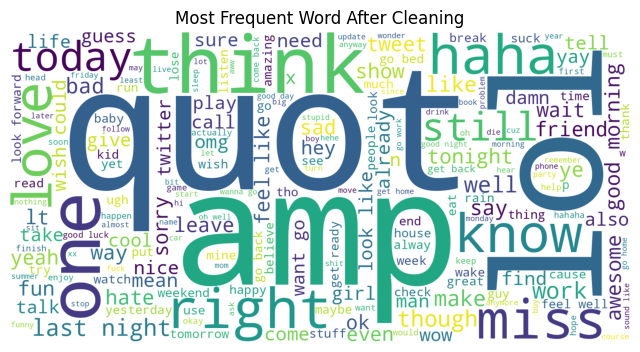

In [19]:
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=1600, height=800, 
                          background_color='white', 
                          stopwords=stop_words, 
                          min_font_size=10).generate(text)
    plt.figure(figsize=(8, 8), facecolor=None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title)
    plt.show()

# Generate word cloud from cleaned text
generate_word_cloud(' '.join(preprocessed_df['text']), 'Most Frequent Word After Cleaning')

In [20]:
preprocessed_df[900000:900010]

target                                               text
900000       1           thank point crucial problem take care cc
900001       1                        please ignore cheesey music
900002       1  get home meeting girl maaaaaan exhausted goodn...
900003       1                            lol that s kind I m eat
900004       1  victory bulldog celebrate 3 white chocolate ch...
900005       1                                lt rocksteady pt ii
900006       1  ok outta 981 follower 10 u I ve talk lol do no...
900007       1  holllaaa do not know ur I m try finish work sc...
900008       1                            love every little thing
900009       1  macbook run linux parallel imac use vmware fus...

### Tokenization and Padding

In [21]:
# Getting maximum word length
def get_max(df):
    maks = 0
    for teks in df['text']:
        if len(teks) > maks:
            maks = len(teks)
    return maks

In [22]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_df['text'])

# Convert Token into Sequence (Number)
X_sequence = tokenizer.texts_to_sequences(preprocessed_df['text'])

# Padding
X_pad = pad_sequences(X_sequence, maxlen=get_max(preprocessed_df))

## Model Training

### Splitting Dataset

In [23]:
y = preprocessed_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

### Model Architecture

In [24]:
with strategy.scope():
    # Architecture
    model = tf.keras.Sequential([
        Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100),
        LSTM(units=64),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ])

### Callback and Training Model

In [25]:
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
NUM_TRAINING_TEXTS = preprocessed_df['text'].count()

# Defining callback
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
lr_reducer = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose = 1, min_lr=0.01)

with strategy.scope():
    # Compiling Model
    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    # Training Model
    history = model.fit(X_train, y_train,
              batch_size=128,
              epochs=6,
              validation_data=(X_test, y_test),
              callbacks=[early_stop, lr_reducer])

    # Model Summary
    model.summary()

I0000 00:00:1711902095.549468      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/6


2024-03-31 16:21:39.305812: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:39.328595: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:39.351754: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:39.375045: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:39.399229: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:39.422867: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:39.446531: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

2024-03-31 16:21:44.750826: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 46:57:20 17s/step - accuracy: 4.3125 - loss: 5.5341

    3/10000 ━━━━━━━━━━━━━━━━━━━━ 4:22 26ms/step - accuracy: 4.0938 - loss: 5.5430   

    6/10000 ━━━━━━━━━━━━━━━━━━━━ 4:02 24ms/step - accuracy: 4.0814 - loss: 5.5466

2024-03-31 16:21:55.846488: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:55.846617: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:55.846723: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:55.849227: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:55.851641: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:55.855185: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-03-31 16:21:55.867201: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

    9/10000 ━━━━━━━━━━━━━━━━━━━━ 3:56 24ms/step - accuracy: 4.0704 - loss: 5.5475

   12/10000 ━━━━━━━━━━━━━━━━━━━━ 3:53 23ms/step - accuracy: 4.0473 - loss: 5.5484

   15/10000 ━━━━━━━━━━━━━━━━━━━━ 3:51 23ms/step - accuracy: 4.0437 - loss: 5.5483

   18/10000 ━━━━━━━━━━━━━━━━━━━━ 3:49 23ms/step - accuracy: 4.0479 - loss: 5.5475

   21/10000 ━━━━━━━━━━━━━━━━━━━━ 3:49 23ms/step - accuracy: 4.0431 - loss: 5.5476

   24/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 4.0414 - loss: 5.5478

   27/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 4.0424 - loss: 5.5476

   30/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 4.0468 - loss: 5.5472

   33/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 4.0503 - loss: 5.5470

   36/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 4.0548 - loss: 5.5468

   39/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 4.0601 - loss: 5.5466

   42/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 4.0653 - loss: 5.5463

   45/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 4.0698 - loss: 5.5461

   48/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 4.0746 - loss: 5.5458

   51/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 4.0789 - loss: 5.5456

   54/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 4.0833 - loss: 5.5453

   57/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 4.0876 - loss: 5.5450

   60/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 4.0924 - loss: 5.5447

   63/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 4.0969 - loss: 5.5444

   66/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 4.1012 - loss: 5.5440

   69/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 4.1056 - loss: 5.5437

   72/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1095 - loss: 5.5434

   75/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1131 - loss: 5.5431

   78/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1166 - loss: 5.5428

   81/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1200 - loss: 5.5426

   84/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1236 - loss: 5.5423

   87/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1272 - loss: 5.5420

   90/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 4.1303 - loss: 5.5417

   93/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 4.1335 - loss: 5.5414

   96/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 4.1365 - loss: 5.5411

   99/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1393 - loss: 5.5409

  102/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1422 - loss: 5.5406

  105/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1452 - loss: 5.5402

  108/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1484 - loss: 5.5399

  111/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1515 - loss: 5.5395

  114/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1547 - loss: 5.5392

  117/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1581 - loss: 5.5388

  120/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1616 - loss: 5.5383

  123/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 4.1651 - loss: 5.5378

  126/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1685 - loss: 5.5374

  129/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1720 - loss: 5.5369

  132/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1756 - loss: 5.5364

  135/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1793 - loss: 5.5358

  138/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1832 - loss: 5.5352

  141/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1871 - loss: 5.5346

  144/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1911 - loss: 5.5339

  147/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1953 - loss: 5.5332

  150/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.1997 - loss: 5.5325

  153/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.2040 - loss: 5.5317

  156/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.2085 - loss: 5.5309

  159/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.2130 - loss: 5.5301

  162/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 4.2176 - loss: 5.5291

  165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2223 - loss: 5.5281

  168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2269 - loss: 5.5271

  171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2313 - loss: 5.5260

  174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2358 - loss: 5.5249

  177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2401 - loss: 5.5238

  180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2444 - loss: 5.5227

  183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2487 - loss: 5.5216

  186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2531 - loss: 5.5204

  189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2575 - loss: 5.5191

  192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2619 - loss: 5.5178

  195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2663 - loss: 5.5165

  198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2707 - loss: 5.5151

  201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2751 - loss: 5.5137

  204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2795 - loss: 5.5122

  207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 4.2839 - loss: 5.5108

  210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 4.2884 - loss: 5.5092

  213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 4.2929 - loss: 5.5076

  216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 4.2975 - loss: 5.5060

  219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 4.3020 - loss: 5.5043

  222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3066 - loss: 5.5026

  225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3111 - loss: 5.5008

  228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3156 - loss: 5.4991

  231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3201 - loss: 5.4973

  234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3246 - loss: 5.4955

  237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3290 - loss: 5.4937

  240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3334 - loss: 5.4918

  243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3378 - loss: 5.4900

  246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3423 - loss: 5.4881

  249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 4.3467 - loss: 5.4862

  252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3512 - loss: 5.4842

  255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3556 - loss: 5.4823

  258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3600 - loss: 5.4803

  261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3643 - loss: 5.4784

  264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3687 - loss: 5.4764

  267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3730 - loss: 5.4744

  270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3774 - loss: 5.4723

  273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3818 - loss: 5.4702

  276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3861 - loss: 5.4682

  279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3904 - loss: 5.4661

  282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 4.3947 - loss: 5.4640

  285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.3990 - loss: 5.4619

  288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4034 - loss: 5.4597

  291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4077 - loss: 5.4576

  294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4120 - loss: 5.4554

  297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4163 - loss: 5.4532

  300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4206 - loss: 5.4509

  303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4248 - loss: 5.4487

  306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4290 - loss: 5.4465

  309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4332 - loss: 5.4443

  312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4374 - loss: 5.4421

  315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4415 - loss: 5.4399

  318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4457 - loss: 5.4377

  321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 4.4498 - loss: 5.4354

  324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4540 - loss: 5.4332

  327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4581 - loss: 5.4309

  330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4622 - loss: 5.4287

  333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4663 - loss: 5.4265

  336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4703 - loss: 5.4242

  339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4744 - loss: 5.4219

  342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4785 - loss: 5.4196

  345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4825 - loss: 5.4173

  348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4865 - loss: 5.4150

  351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4905 - loss: 5.4127

  354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 4.4945 - loss: 5.4104

  357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 4.4985 - loss: 5.4081

  360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 4.5024 - loss: 5.4059

  363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5063 - loss: 5.4036

  366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5101 - loss: 5.4013

  369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5139 - loss: 5.3991

  372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5177 - loss: 5.3968

  375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5215 - loss: 5.3946

  378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5252 - loss: 5.3924

  381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5290 - loss: 5.3902

  384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5326 - loss: 5.3880

  387/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5363 - loss: 5.3858

  390/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5400 - loss: 5.3836

  393/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5436 - loss: 5.3814

  396/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 4.5472 - loss: 5.3792

  399/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5508 - loss: 5.3770

  402/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5543 - loss: 5.3748

  405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5579 - loss: 5.3726

  408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5614 - loss: 5.3704

  411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5649 - loss: 5.3682

  414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5684 - loss: 5.3661

  417/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5718 - loss: 5.3639

  420/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5753 - loss: 5.3617

  423/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5787 - loss: 5.3595

  426/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5821 - loss: 5.3573

  429/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5855 - loss: 5.3552

  432/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5888 - loss: 5.3530

  435/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 4.5922 - loss: 5.3509

  438/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 4.5955 - loss: 5.3487

  441/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 4.5988 - loss: 5.3466

  444/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 4.6021 - loss: 5.3444

  446/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 4.6043 - loss: 5.3430

  449/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 4.6076 - loss: 5.3408

  452/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 4.6109 - loss: 5.3387

  455/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6141 - loss: 5.3366

  458/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6173 - loss: 5.3345

  461/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6205 - loss: 5.3324

  464/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6237 - loss: 5.3303

  467/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6268 - loss: 5.3283

  470/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6300 - loss: 5.3262

  473/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6331 - loss: 5.3241

  476/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6362 - loss: 5.3221

  479/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6393 - loss: 5.3200

  482/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6424 - loss: 5.3179

  485/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6455 - loss: 5.3159

  488/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6485 - loss: 5.3139

  491/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6515 - loss: 5.3118

  494/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6546 - loss: 5.3098

  497/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6576 - loss: 5.3078

  500/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 4.6606 - loss: 5.3058

  503/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6635 - loss: 5.3037

  506/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6665 - loss: 5.3017

  509/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6695 - loss: 5.2997

  512/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6724 - loss: 5.2977

  515/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6753 - loss: 5.2958

  518/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6782 - loss: 5.2938

  521/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6811 - loss: 5.2918

  524/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6840 - loss: 5.2898

  527/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6868 - loss: 5.2879

  530/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6897 - loss: 5.2859

  533/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6925 - loss: 5.2840

  536/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6954 - loss: 5.2820

  539/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.6982 - loss: 5.2801

  542/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 4.7010 - loss: 5.2782

  545/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7037 - loss: 5.2763

  548/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7065 - loss: 5.2744

  551/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7092 - loss: 5.2724

  554/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7119 - loss: 5.2706

  557/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7146 - loss: 5.2687

  560/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7173 - loss: 5.2668

  563/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7200 - loss: 5.2649

  566/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7227 - loss: 5.2630

  569/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7253 - loss: 5.2612

  572/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7279 - loss: 5.2593

  575/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7305 - loss: 5.2575

  578/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7331 - loss: 5.2557

  581/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 4.7357 - loss: 5.2539

  584/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7383 - loss: 5.2521

  587/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7408 - loss: 5.2503

  590/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7433 - loss: 5.2485

  593/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7459 - loss: 5.2467

  596/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7484 - loss: 5.2449

  599/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7508 - loss: 5.2432

  602/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7533 - loss: 5.2414

  605/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7558 - loss: 5.2397

  608/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7582 - loss: 5.2379

  611/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7607 - loss: 5.2362

  614/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7631 - loss: 5.2345

  617/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7655 - loss: 5.2328

  620/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7679 - loss: 5.2311

  623/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 4.7703 - loss: 5.2294

  626/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.7726 - loss: 5.2277

  629/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.7750 - loss: 5.2260

  632/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.7773 - loss: 5.2244

  635/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.7797 - loss: 5.2227

  638/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.7820 - loss: 5.2210

  641/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7843 - loss: 5.2194

  644/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7866 - loss: 5.2177

  647/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7889 - loss: 5.2161

  650/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7911 - loss: 5.2145

  653/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7934 - loss: 5.2129

  656/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7956 - loss: 5.2112

  659/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.7979 - loss: 5.2096

  662/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 4.8001 - loss: 5.2080

  665/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 4.8023 - loss: 5.2064

  668/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.8045 - loss: 5.2048

  671/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.8067 - loss: 5.2033

  674/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 4.8089 - loss: 5.2017

2024-03-31 16:22:10.880383: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


  677/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8111 - loss: 5.2001

  680/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8132 - loss: 5.1986

  683/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8154 - loss: 5.1971

  686/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8175 - loss: 5.1955

  689/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8197 - loss: 5.1940

  692/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8218 - loss: 5.1924

  695/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8239 - loss: 5.1909

  698/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8260 - loss: 5.1894

  701/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8281 - loss: 5.1879

  704/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8302 - loss: 5.1864

  707/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8323 - loss: 5.1849

  710/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8343 - loss: 5.1834

  713/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 4.8364 - loss: 5.1819

  716/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8384 - loss: 5.1804

  719/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8405 - loss: 5.1789

  722/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8425 - loss: 5.1775

  725/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8445 - loss: 5.1760

  728/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8465 - loss: 5.1745

  731/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8485 - loss: 5.1731

  734/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8505 - loss: 5.1717

  737/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8525 - loss: 5.1702

  740/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8544 - loss: 5.1688

  743/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8564 - loss: 5.1674

  746/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8583 - loss: 5.1660

  749/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8602 - loss: 5.1646

  752/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8622 - loss: 5.1632

  755/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8641 - loss: 5.1618

  758/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8660 - loss: 5.1604

  761/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 4.8679 - loss: 5.1590

  764/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8697 - loss: 5.1577

  767/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8716 - loss: 5.1563

  770/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8735 - loss: 5.1549

  773/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8753 - loss: 5.1536

  776/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8772 - loss: 5.1522

  779/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8790 - loss: 5.1509

  782/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8809 - loss: 5.1495

  785/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8827 - loss: 5.1482

  788/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8845 - loss: 5.1469

  791/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8863 - loss: 5.1456

  794/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8881 - loss: 5.1442

  797/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8899 - loss: 5.1429

  800/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8917 - loss: 5.1416

  803/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 4.8935 - loss: 5.1403

  806/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.8952 - loss: 5.1390

  809/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.8970 - loss: 5.1378

  812/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.8987 - loss: 5.1365

  815/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.9005 - loss: 5.1352

  818/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.9022 - loss: 5.1339

  821/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.9039 - loss: 5.1327

  824/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.9056 - loss: 5.1314

  827/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 4.9073 - loss: 5.1301

  830/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 4.9090 - loss: 5.1289

  833/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 4.9107 - loss: 5.1276

  836/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 4.9124 - loss: 5.1264

  839/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 4.9141 - loss: 5.1251

  842/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 4.9158 - loss: 5.1239

  845/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9174 - loss: 5.1226

  848/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9191 - loss: 5.1214

  851/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9207 - loss: 5.1201

  854/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9224 - loss: 5.1189

  857/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9240 - loss: 5.1177

  860/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9256 - loss: 5.1165

  863/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9273 - loss: 5.1152

  866/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9289 - loss: 5.1140

  869/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9305 - loss: 5.1128

  872/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9321 - loss: 5.1116

  875/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9337 - loss: 5.1104

  878/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9352 - loss: 5.1092

  881/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9368 - loss: 5.1080

  884/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 4.9384 - loss: 5.1068

  887/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 4.9400 - loss: 5.1056

  890/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 4.9415 - loss: 5.1044

  893/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 4.9431 - loss: 5.1033

  896/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9446 - loss: 5.1021

  899/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9462 - loss: 5.1009

  902/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9477 - loss: 5.0997

  905/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9493 - loss: 5.0985

  908/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9508 - loss: 5.0974

  911/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9523 - loss: 5.0962

  914/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9538 - loss: 5.0950

  917/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9554 - loss: 5.0939

  920/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9569 - loss: 5.0927

  923/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9584 - loss: 5.0916

  926/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9599 - loss: 5.0904

  929/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9614 - loss: 5.0893

  932/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9629 - loss: 5.0881

  935/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 4.9643 - loss: 5.0870

  938/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 4.9658 - loss: 5.0859

  941/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 4.9673 - loss: 5.0848

  944/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 4.9687 - loss: 5.0836

  947/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 4.9702 - loss: 5.0825

  950/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 4.9716 - loss: 5.0814

  953/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 4.9731 - loss: 5.0803

  956/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9745 - loss: 5.0792

  959/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9759 - loss: 5.0781

  962/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9773 - loss: 5.0770

  965/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9787 - loss: 5.0760

  968/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9802 - loss: 5.0749

  971/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9816 - loss: 5.0738

  974/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 4.9830 - loss: 5.0727

  977/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9843 - loss: 5.0716

  980/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9857 - loss: 5.0706

  983/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9871 - loss: 5.0695

  986/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9885 - loss: 5.0685

  989/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9899 - loss: 5.0674

  992/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9912 - loss: 5.0663

  995/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9926 - loss: 5.0653

  998/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9940 - loss: 5.0642

 1001/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9953 - loss: 5.0632

 1004/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9967 - loss: 5.0622

 1007/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9980 - loss: 5.0611

 1010/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 4.9993 - loss: 5.0601

 1013/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 5.0007 - loss: 5.0590

 1016/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 5.0020 - loss: 5.0580

 1019/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 5.0033 - loss: 5.0570

 1022/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0047 - loss: 5.0560

 1025/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0060 - loss: 5.0549

 1028/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0073 - loss: 5.0539

 1031/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0086 - loss: 5.0529

 1034/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0099 - loss: 5.0519

 1037/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0112 - loss: 5.0509

 1040/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0125 - loss: 5.0499

 1043/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0138 - loss: 5.0489

 1046/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0150 - loss: 5.0479

 1049/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0163 - loss: 5.0469

 1052/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0176 - loss: 5.0459

 1055/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0189 - loss: 5.0449

 1058/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0201 - loss: 5.0439

 1061/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0214 - loss: 5.0429

 1064/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 5.0226 - loss: 5.0419

 1067/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0239 - loss: 5.0410

 1070/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0251 - loss: 5.0400

 1073/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0263 - loss: 5.0390

 1076/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0276 - loss: 5.0381

 1079/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0288 - loss: 5.0371

 1082/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0300 - loss: 5.0361

 1085/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0313 - loss: 5.0352

 1088/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0325 - loss: 5.0342

 1091/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0337 - loss: 5.0333

 1094/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0349 - loss: 5.0323

 1097/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0361 - loss: 5.0314

 1100/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0373 - loss: 5.0305

 1103/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0385 - loss: 5.0295

 1106/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 5.0397 - loss: 5.0286

 1109/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0409 - loss: 5.0277

 1112/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0421 - loss: 5.0267

 1115/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0433 - loss: 5.0258

 1118/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0444 - loss: 5.0249

 1121/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0456 - loss: 5.0240

 1124/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0468 - loss: 5.0231

 1127/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0480 - loss: 5.0222

 1130/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0491 - loss: 5.0213

 1133/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0503 - loss: 5.0204

 1136/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0514 - loss: 5.0195

 1139/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0526 - loss: 5.0186

 1142/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0537 - loss: 5.0177

 1145/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0549 - loss: 5.0168

 1148/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 5.0560 - loss: 5.0159

 1151/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0572 - loss: 5.0151

 1154/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0583 - loss: 5.0142

 1157/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0594 - loss: 5.0133

 1160/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0605 - loss: 5.0124

 1163/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0617 - loss: 5.0116

 1166/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0628 - loss: 5.0107

 1169/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0639 - loss: 5.0098

 1172/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0650 - loss: 5.0090

 1175/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0661 - loss: 5.0081

 1178/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0672 - loss: 5.0073

 1181/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0683 - loss: 5.0064

 1184/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0694 - loss: 5.0056

 1187/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0705 - loss: 5.0047

 1190/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 5.0715 - loss: 5.0039

 1193/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0726 - loss: 5.0031

 1196/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0737 - loss: 5.0022

 1199/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0748 - loss: 5.0014

 1202/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0758 - loss: 5.0006

 1205/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0769 - loss: 4.9997

 1208/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0780 - loss: 4.9989

 1211/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0790 - loss: 4.9981

 1214/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0801 - loss: 4.9973

 1217/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0811 - loss: 4.9964

 1220/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0822 - loss: 4.9956

 1223/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0832 - loss: 4.9948

 1226/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0843 - loss: 4.9940

 1229/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0853 - loss: 4.9932

 1232/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 5.0864 - loss: 4.9924

 1235/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0874 - loss: 4.9916

 1238/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0884 - loss: 4.9907

 1241/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0894 - loss: 4.9899

 1244/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0905 - loss: 4.9891

 1247/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0915 - loss: 4.9884

 1250/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0925 - loss: 4.9876

 1253/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0935 - loss: 4.9868

 1256/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0945 - loss: 4.9860

 1259/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0955 - loss: 4.9852

 1262/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0965 - loss: 4.9844

 1265/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0975 - loss: 4.9836

 1268/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0985 - loss: 4.9828

 1271/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.0995 - loss: 4.9821

 1274/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 5.1005 - loss: 4.9813

 1277/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1015 - loss: 4.9805

 1280/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1025 - loss: 4.9797

 1283/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1035 - loss: 4.9790

 1286/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1044 - loss: 4.9782

 1289/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1054 - loss: 4.9774

 1292/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1064 - loss: 4.9767

 1295/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1074 - loss: 4.9759

 1298/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1083 - loss: 4.9752

 1301/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1093 - loss: 4.9744

 1304/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1103 - loss: 4.9736

 1307/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1112 - loss: 4.9729

 1310/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1122 - loss: 4.9721

 1313/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1131 - loss: 4.9714

 1316/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1141 - loss: 4.9706

 1319/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 5.1150 - loss: 4.9699

 1322/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1160 - loss: 4.9691

 1325/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1169 - loss: 4.9684

 1328/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1178 - loss: 4.9677

 1331/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1188 - loss: 4.9669

 1334/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1197 - loss: 4.9662

 1337/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1206 - loss: 4.9655

 1340/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1216 - loss: 4.9647

 1343/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1225 - loss: 4.9640

 1346/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1234 - loss: 4.9633

 1349/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1243 - loss: 4.9626

 1352/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1252 - loss: 4.9619

 1355/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1261 - loss: 4.9611

 1358/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1270 - loss: 4.9604

 1361/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1279 - loss: 4.9597

 1364/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1288 - loss: 4.9590

 1367/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 5.1297 - loss: 4.9583

 1370/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1306 - loss: 4.9576

 1373/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1315 - loss: 4.9569

 1376/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1324 - loss: 4.9562

 1379/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1333 - loss: 4.9554

 1382/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1342 - loss: 4.9547

 1385/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1351 - loss: 4.9540

 1388/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1360 - loss: 4.9533

 1391/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1369 - loss: 4.9526

 1394/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1377 - loss: 4.9519

 1397/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1386 - loss: 4.9512

 1400/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1395 - loss: 4.9506

 1403/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1403 - loss: 4.9499

 1406/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1412 - loss: 4.9492

 1409/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 5.1421 - loss: 4.9485

 1412/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1429 - loss: 4.9478

 1415/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1438 - loss: 4.9471

 1418/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1447 - loss: 4.9464

 1421/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1455 - loss: 4.9457

 1424/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1464 - loss: 4.9451

 1427/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1472 - loss: 4.9444

 1430/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1481 - loss: 4.9437

 1433/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1489 - loss: 4.9430

 1436/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1497 - loss: 4.9424

 1439/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1506 - loss: 4.9417

 1442/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1514 - loss: 4.9410

 1445/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1523 - loss: 4.9403

 1448/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 5.1531 - loss: 4.9397

 1451/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1539 - loss: 4.9390

 1454/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1547 - loss: 4.9383

 1457/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1556 - loss: 4.9377

 1460/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1564 - loss: 4.9370

 1463/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1572 - loss: 4.9363

 1466/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1580 - loss: 4.9357

 1469/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1589 - loss: 4.9350

 1472/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1597 - loss: 4.9343

 1475/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1605 - loss: 4.9337

 1478/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1613 - loss: 4.9330

 1481/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1621 - loss: 4.9324

 1484/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1629 - loss: 4.9317

 1487/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1637 - loss: 4.9311

 1490/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1645 - loss: 4.9304

 1493/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 5.1653 - loss: 4.9297

 1496/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1661 - loss: 4.9291

 1499/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1669 - loss: 4.9284

 1502/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1677 - loss: 4.9278

 1505/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1685 - loss: 4.9272

 1508/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1693 - loss: 4.9265

 1511/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1701 - loss: 4.9259

 1514/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1709 - loss: 4.9252

 1517/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1717 - loss: 4.9246

 1520/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1725 - loss: 4.9239

 1523/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1733 - loss: 4.9233

 1526/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1740 - loss: 4.9227

 1529/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1748 - loss: 4.9220

 1532/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1756 - loss: 4.9214

 1535/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 5.1764 - loss: 4.9207

 1538/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1771 - loss: 4.9201

 1541/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1779 - loss: 4.9195

 1544/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1787 - loss: 4.9188

 1547/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1795 - loss: 4.9182

 1550/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1802 - loss: 4.9176

 1553/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1810 - loss: 4.9170

 1556/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1817 - loss: 4.9163

 1559/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1825 - loss: 4.9157

 1562/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1833 - loss: 4.9151

 1565/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1840 - loss: 4.9145

 1568/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1848 - loss: 4.9139

 1571/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1855 - loss: 4.9133

 1574/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1863 - loss: 4.9126

 1577/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1870 - loss: 4.9120

 1580/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 5.1877 - loss: 4.9114

 1583/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1885 - loss: 4.9108

 1586/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1892 - loss: 4.9102

 1589/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1900 - loss: 4.9096

 1592/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1907 - loss: 4.9090

 1595/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1914 - loss: 4.9084

 1598/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1922 - loss: 4.9078

 1601/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1929 - loss: 4.9072

 1604/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1936 - loss: 4.9066

 1607/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1944 - loss: 4.9060

 1610/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1951 - loss: 4.9054

 1613/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1958 - loss: 4.9048

 1616/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1965 - loss: 4.9042

 1619/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1973 - loss: 4.9036

 1622/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 5.1980 - loss: 4.9030

 1625/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.1987 - loss: 4.9024

 1628/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.1994 - loss: 4.9018

 1631/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2001 - loss: 4.9012

 1634/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2008 - loss: 4.9007

 1637/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2015 - loss: 4.9001

 1640/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2022 - loss: 4.8995

 1643/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2030 - loss: 4.8989

 1646/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2037 - loss: 4.8983

 1649/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2044 - loss: 4.8977

 1652/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2051 - loss: 4.8971

 1655/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2058 - loss: 4.8966

 1658/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2064 - loss: 4.8960

 1661/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2071 - loss: 4.8954

 1664/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2078 - loss: 4.8948

 1667/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 5.2085 - loss: 4.8943

 1670/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2092 - loss: 4.8937

 1673/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2099 - loss: 4.8931

 1676/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2106 - loss: 4.8926

 1679/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2113 - loss: 4.8920

 1682/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2120 - loss: 4.8914

 1685/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2126 - loss: 4.8908

 1688/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2133 - loss: 4.8903

 1691/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2140 - loss: 4.8897

 1694/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2147 - loss: 4.8892

 1697/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2153 - loss: 4.8886

 1700/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2160 - loss: 4.8880

 1703/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2167 - loss: 4.8875

 1706/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2174 - loss: 4.8869

 1709/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 5.2180 - loss: 4.8863

 1712/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2187 - loss: 4.8858

 1715/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2194 - loss: 4.8852

 1718/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2200 - loss: 4.8847

 1721/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2207 - loss: 4.8841

 1724/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2214 - loss: 4.8836

 1727/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2220 - loss: 4.8830

 1730/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2227 - loss: 4.8825

 1733/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2233 - loss: 4.8819

 1736/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2240 - loss: 4.8814

 1739/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2247 - loss: 4.8808

 1742/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2253 - loss: 4.8803

 1745/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2260 - loss: 4.8797

 1748/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2266 - loss: 4.8792

 1751/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 5.2273 - loss: 4.8786

 1754/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2279 - loss: 4.8781

 1757/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2286 - loss: 4.8776

 1760/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2292 - loss: 4.8770

 1763/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2299 - loss: 4.8765

 1766/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2305 - loss: 4.8759

 1769/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2311 - loss: 4.8754

 1772/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2318 - loss: 4.8749

 1775/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2324 - loss: 4.8743

 1778/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2331 - loss: 4.8738

 1781/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2337 - loss: 4.8733

 1784/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2343 - loss: 4.8727

 1786/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2348 - loss: 4.8724

 1789/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2354 - loss: 4.8718

 1792/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2360 - loss: 4.8713

 1795/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2367 - loss: 4.8708

 1798/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 5.2373 - loss: 4.8702

 1801/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2379 - loss: 4.8697

 1804/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2386 - loss: 4.8692

 1807/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2392 - loss: 4.8686

 1810/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2398 - loss: 4.8681

 1813/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2404 - loss: 4.8676

 1816/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2411 - loss: 4.8671

 1819/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2417 - loss: 4.8665

 1822/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2423 - loss: 4.8660

 1825/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2429 - loss: 4.8655

 1828/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2435 - loss: 4.8650

 1831/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2442 - loss: 4.8645

 1834/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2448 - loss: 4.8639

 1837/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2454 - loss: 4.8634

 1840/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2460 - loss: 4.8629

 1843/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 5.2466 - loss: 4.8624

 1846/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2472 - loss: 4.8619

 1849/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2478 - loss: 4.8614

 1852/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2484 - loss: 4.8608

 1855/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2490 - loss: 4.8603

 1858/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2496 - loss: 4.8598

 1861/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2503 - loss: 4.8593

 1864/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2509 - loss: 4.8588

 1867/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2515 - loss: 4.8583

 1870/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2521 - loss: 4.8578

 1873/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2527 - loss: 4.8573

 1876/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2532 - loss: 4.8568

 1879/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2538 - loss: 4.8563

 1882/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2544 - loss: 4.8558

 1885/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2550 - loss: 4.8553

 1888/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 5.2556 - loss: 4.8548

 1891/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2562 - loss: 4.8543

 1894/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2568 - loss: 4.8538

 1897/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2574 - loss: 4.8533

 1900/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2580 - loss: 4.8528

 1903/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2586 - loss: 4.8523

 1906/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2591 - loss: 4.8518

 1909/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2597 - loss: 4.8513

 1912/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2603 - loss: 4.8508

 1915/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2609 - loss: 4.8503

 1918/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2615 - loss: 4.8498

 1921/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2620 - loss: 4.8493

 1924/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2626 - loss: 4.8488

 1927/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2632 - loss: 4.8483

 1930/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 5.2638 - loss: 4.8479

 1933/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2643 - loss: 4.8474

 1936/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2649 - loss: 4.8469

 1939/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2655 - loss: 4.8464

 1942/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2660 - loss: 4.8459

 1945/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2666 - loss: 4.8454

 1948/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2672 - loss: 4.8450

 1951/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2677 - loss: 4.8445

 1954/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2683 - loss: 4.8440

 1957/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2688 - loss: 4.8435

 1960/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2694 - loss: 4.8430

 1963/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2700 - loss: 4.8426

 1966/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2705 - loss: 4.8421

 1969/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2711 - loss: 4.8416

 1972/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2716 - loss: 4.8411

 1975/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 5.2722 - loss: 4.8407

 1978/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2727 - loss: 4.8402

 1981/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2733 - loss: 4.8397

 1984/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2738 - loss: 4.8393

 1987/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2744 - loss: 4.8388

 1990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2749 - loss: 4.8383

 1993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2755 - loss: 4.8379

 1996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2760 - loss: 4.8374

 1999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2766 - loss: 4.8369

 2002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2771 - loss: 4.8365

 2005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2777 - loss: 4.8360

 2008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2782 - loss: 4.8355

 2010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2786 - loss: 4.8352

 2013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2791 - loss: 4.8348

 2016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2797 - loss: 4.8343

 2019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2802 - loss: 4.8338

 2022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 5.2807 - loss: 4.8334

 2025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2813 - loss: 4.8329

 2028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2818 - loss: 4.8325

 2031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2823 - loss: 4.8320

 2034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2829 - loss: 4.8316

 2037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2834 - loss: 4.8311

 2040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2839 - loss: 4.8307

 2043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2845 - loss: 4.8302

 2046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2850 - loss: 4.8297

 2049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2855 - loss: 4.8293

 2052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2860 - loss: 4.8288

 2055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2866 - loss: 4.8284

 2058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2871 - loss: 4.8280

 2061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2876 - loss: 4.8275

 2064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2881 - loss: 4.8271

 2067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 5.2887 - loss: 4.8266

 2070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2892 - loss: 4.8262

 2073/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2897 - loss: 4.8257

 2076/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2902 - loss: 4.8253

 2079/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2907 - loss: 4.8248

 2082/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2912 - loss: 4.8244

 2085/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2918 - loss: 4.8239

 2088/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2923 - loss: 4.8235

 2091/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2928 - loss: 4.8231

 2094/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2933 - loss: 4.8226

 2097/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2938 - loss: 4.8222

 2100/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2943 - loss: 4.8218

 2103/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2948 - loss: 4.8213

 2106/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2953 - loss: 4.8209

 2109/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2958 - loss: 4.8204

 2112/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 5.2963 - loss: 4.8200

 2115/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2969 - loss: 4.8196

 2118/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2974 - loss: 4.8191

 2121/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2979 - loss: 4.8187

 2124/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2984 - loss: 4.8183

 2127/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2989 - loss: 4.8178

 2130/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2994 - loss: 4.8174

 2133/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.2999 - loss: 4.8170

 2136/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3004 - loss: 4.8165

 2139/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3009 - loss: 4.8161

 2142/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3014 - loss: 4.8157

 2145/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3019 - loss: 4.8153

 2148/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3023 - loss: 4.8148

 2151/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3028 - loss: 4.8144

 2154/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 5.3033 - loss: 4.8140

 2157/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3038 - loss: 4.8136

 2160/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3043 - loss: 4.8131

 2163/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3048 - loss: 4.8127

 2166/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3053 - loss: 4.8123

 2169/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3058 - loss: 4.8119

 2172/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3063 - loss: 4.8115

 2175/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3067 - loss: 4.8110

 2178/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3072 - loss: 4.8106

 2181/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3077 - loss: 4.8102

 2184/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3082 - loss: 4.8098

 2187/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3087 - loss: 4.8094

 2190/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3092 - loss: 4.8089

 2193/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3096 - loss: 4.8085

 2196/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3101 - loss: 4.8081

 2199/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 5.3106 - loss: 4.8077

 2202/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3111 - loss: 4.8073

 2205/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3115 - loss: 4.8069

 2208/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3120 - loss: 4.8065

 2211/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3125 - loss: 4.8061

 2214/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3130 - loss: 4.8057

 2217/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3134 - loss: 4.8052

 2220/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3139 - loss: 4.8048

 2223/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3144 - loss: 4.8044

 2226/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3148 - loss: 4.8040

 2229/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3153 - loss: 4.8036

 2231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3156 - loss: 4.8033

 2234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3161 - loss: 4.8029

 2237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3165 - loss: 4.8025

 2240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3170 - loss: 4.8021

 2243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3175 - loss: 4.8017

 2246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 5.3179 - loss: 4.8013

 2249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3184 - loss: 4.8009

 2252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3188 - loss: 4.8006

 2255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3193 - loss: 4.8002

 2258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3198 - loss: 4.7998

 2261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3202 - loss: 4.7994

 2264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3207 - loss: 4.7990

 2267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3211 - loss: 4.7986

 2270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3216 - loss: 4.7982

 2273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3220 - loss: 4.7978

 2276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3225 - loss: 4.7974

 2279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3229 - loss: 4.7970

 2282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3234 - loss: 4.7966

 2285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3238 - loss: 4.7962

 2288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3243 - loss: 4.7958

 2291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 5.3247 - loss: 4.7955

 2294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3252 - loss: 4.7951

 2297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3256 - loss: 4.7947

 2300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3260 - loss: 4.7943

 2303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3265 - loss: 4.7939

 2306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3269 - loss: 4.7935

 2309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3274 - loss: 4.7931

 2312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3278 - loss: 4.7928

 2315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3283 - loss: 4.7924

 2318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3287 - loss: 4.7920

 2321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3291 - loss: 4.7916

 2324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3296 - loss: 4.7912

 2327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3300 - loss: 4.7909

 2330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3304 - loss: 4.7905

 2333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 5.3309 - loss: 4.7901

 2336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3313 - loss: 4.7897

 2339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3317 - loss: 4.7893

 2342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3322 - loss: 4.7890

 2345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3326 - loss: 4.7886

 2348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3330 - loss: 4.7882

 2351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3335 - loss: 4.7878

 2354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3339 - loss: 4.7875

 2357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3343 - loss: 4.7871

 2360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3347 - loss: 4.7867

 2363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3352 - loss: 4.7864

 2366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3356 - loss: 4.7860

 2369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3360 - loss: 4.7856

 2372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3365 - loss: 4.7852

 2375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3369 - loss: 4.7849

 2378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 5.3373 - loss: 4.7845

 2381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3377 - loss: 4.7841

 2384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3381 - loss: 4.7838

 2387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3386 - loss: 4.7834

 2390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3390 - loss: 4.7830

 2393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3394 - loss: 4.7827

 2396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3398 - loss: 4.7823

 2399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3402 - loss: 4.7820

 2402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3407 - loss: 4.7816

 2405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3411 - loss: 4.7812

 2408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3415 - loss: 4.7809

 2411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3419 - loss: 4.7805

 2414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3423 - loss: 4.7801

 2417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3427 - loss: 4.7798

 2420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3431 - loss: 4.7794

 2423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 5.3436 - loss: 4.7791

 2426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3440 - loss: 4.7787

 2429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3444 - loss: 4.7783

 2432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3448 - loss: 4.7780

 2435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3452 - loss: 4.7776

 2438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3456 - loss: 4.7773

 2441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3460 - loss: 4.7769

 2444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3464 - loss: 4.7765

 2447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3468 - loss: 4.7762

 2450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3472 - loss: 4.7758

 2453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3476 - loss: 4.7755

 2455/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3479 - loss: 4.7752

 2458/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3483 - loss: 4.7749

 2461/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3487 - loss: 4.7745

 2464/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3491 - loss: 4.7742

 2467/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3495 - loss: 4.7738

 2470/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 5.3499 - loss: 4.7735

 2473/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3503 - loss: 4.7731

 2476/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3507 - loss: 4.7728

 2479/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3511 - loss: 4.7724

 2482/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3515 - loss: 4.7721

 2485/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3519 - loss: 4.7717

 2488/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3523 - loss: 4.7714

 2491/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3527 - loss: 4.7710

 2494/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3531 - loss: 4.7707

 2497/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3535 - loss: 4.7703

 2500/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3539 - loss: 4.7700

 2503/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3543 - loss: 4.7696

 2506/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3547 - loss: 4.7693

 2509/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3551 - loss: 4.7689

 2512/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3555 - loss: 4.7686

 2515/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 5.3559 - loss: 4.7682

 2518/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3563 - loss: 4.7679

 2521/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3567 - loss: 4.7676

 2524/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3571 - loss: 4.7672

 2527/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3574 - loss: 4.7669

 2530/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3578 - loss: 4.7665

 2533/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3582 - loss: 4.7662

 2536/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3586 - loss: 4.7658

 2539/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3590 - loss: 4.7655

 2542/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3594 - loss: 4.7652

 2545/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3598 - loss: 4.7648

 2548/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3601 - loss: 4.7645

 2551/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3605 - loss: 4.7641

 2554/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3609 - loss: 4.7638

 2557/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3613 - loss: 4.7635

 2560/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 5.3617 - loss: 4.7631

 2563/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3621 - loss: 4.7628

 2566/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3624 - loss: 4.7625

 2569/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3628 - loss: 4.7621

 2572/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3632 - loss: 4.7618

 2575/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3636 - loss: 4.7614

 2578/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3640 - loss: 4.7611

 2581/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3643 - loss: 4.7608

 2584/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3647 - loss: 4.7604

 2587/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3651 - loss: 4.7601

 2590/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3655 - loss: 4.7598

 2593/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3658 - loss: 4.7594

 2596/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3662 - loss: 4.7591

 2599/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3666 - loss: 4.7588

 2602/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3670 - loss: 4.7584

 2605/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 5.3673 - loss: 4.7581

 2608/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3677 - loss: 4.7578

 2611/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3681 - loss: 4.7575

 2614/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3685 - loss: 4.7571

 2617/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3688 - loss: 4.7568

 2620/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3692 - loss: 4.7565

 2623/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3696 - loss: 4.7561

 2626/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3699 - loss: 4.7558

 2629/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3703 - loss: 4.7555

 2632/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3707 - loss: 4.7552

 2635/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3710 - loss: 4.7548

 2638/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3714 - loss: 4.7545

 2641/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3718 - loss: 4.7542

 2644/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3721 - loss: 4.7538

 2647/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3725 - loss: 4.7535

 2650/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 5.3729 - loss: 4.7532

 2653/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3732 - loss: 4.7529

 2656/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3736 - loss: 4.7525

 2659/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3740 - loss: 4.7522

 2662/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3743 - loss: 4.7519

 2665/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3747 - loss: 4.7516

 2668/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3751 - loss: 4.7513

 2671/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3754 - loss: 4.7509

 2674/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3758 - loss: 4.7506

 2676/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3760 - loss: 4.7504

 2679/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3764 - loss: 4.7501

 2682/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3768 - loss: 4.7497

 2685/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3771 - loss: 4.7494

 2688/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3775 - loss: 4.7491

 2691/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3778 - loss: 4.7488

 2694/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 5.3782 - loss: 4.7485

 2697/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3786 - loss: 4.7481

 2700/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3789 - loss: 4.7478

 2703/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3793 - loss: 4.7475

 2706/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3796 - loss: 4.7472

 2709/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3800 - loss: 4.7469

 2712/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3803 - loss: 4.7465

 2715/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3807 - loss: 4.7462

 2718/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3811 - loss: 4.7459

 2721/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3814 - loss: 4.7456

 2724/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3818 - loss: 4.7453

 2727/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3821 - loss: 4.7450

 2730/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3825 - loss: 4.7446

 2733/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3828 - loss: 4.7443

 2736/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3832 - loss: 4.7440

 2739/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 5.3835 - loss: 4.7437

 2742/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3839 - loss: 4.7434

 2745/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3842 - loss: 4.7431

 2748/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3846 - loss: 4.7428

 2751/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3849 - loss: 4.7424

 2754/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3853 - loss: 4.7421

 2757/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3856 - loss: 4.7418

 2760/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3860 - loss: 4.7415

 2763/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3863 - loss: 4.7412

 2766/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3867 - loss: 4.7409

 2769/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3870 - loss: 4.7406

 2772/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3874 - loss: 4.7403

 2775/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3877 - loss: 4.7400

 2778/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3881 - loss: 4.7396

 2781/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 5.3884 - loss: 4.7393

 2784/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3887 - loss: 4.7390

 2787/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3891 - loss: 4.7387

 2790/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3894 - loss: 4.7384

 2793/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3898 - loss: 4.7381

 2796/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3901 - loss: 4.7378

 2799/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3905 - loss: 4.7375

 2802/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3908 - loss: 4.7372

 2805/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3911 - loss: 4.7369

 2808/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3915 - loss: 4.7366

 2811/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3918 - loss: 4.7363

 2814/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3921 - loss: 4.7360

 2817/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3925 - loss: 4.7357

 2820/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3928 - loss: 4.7354

 2823/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3932 - loss: 4.7351

 2826/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 5.3935 - loss: 4.7347

 2829/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3938 - loss: 4.7344

 2832/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3942 - loss: 4.7341

 2835/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3945 - loss: 4.7338

 2838/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3948 - loss: 4.7335

 2841/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3952 - loss: 4.7332

 2844/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3955 - loss: 4.7329

 2847/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3958 - loss: 4.7326

 2850/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3962 - loss: 4.7323

 2853/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3965 - loss: 4.7320

 2856/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3968 - loss: 4.7317

 2859/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3972 - loss: 4.7314

 2862/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3975 - loss: 4.7311

 2865/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3978 - loss: 4.7308

 2868/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3982 - loss: 4.7305

 2871/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 5.3985 - loss: 4.7302

 2874/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.3988 - loss: 4.7299

 2877/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.3991 - loss: 4.7296

 2880/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.3995 - loss: 4.7294

 2883/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.3998 - loss: 4.7291

 2886/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4001 - loss: 4.7288

 2889/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4005 - loss: 4.7285

 2892/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4008 - loss: 4.7282

 2895/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4011 - loss: 4.7279

 2898/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4014 - loss: 4.7276

 2900/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4016 - loss: 4.7274

 2903/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4020 - loss: 4.7271

 2906/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4023 - loss: 4.7268

 2909/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4026 - loss: 4.7265

 2912/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4029 - loss: 4.7262

 2915/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4033 - loss: 4.7259

 2918/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 5.4036 - loss: 4.7256

 2921/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4039 - loss: 4.7253

 2924/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4042 - loss: 4.7251

 2927/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4045 - loss: 4.7248

 2930/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4049 - loss: 4.7245

 2933/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4052 - loss: 4.7242

 2936/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4055 - loss: 4.7239

 2939/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4058 - loss: 4.7236

 2942/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4061 - loss: 4.7233

 2945/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4065 - loss: 4.7230

 2948/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4068 - loss: 4.7227

 2951/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4071 - loss: 4.7225

 2954/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4074 - loss: 4.7222

 2957/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4077 - loss: 4.7219

 2960/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4080 - loss: 4.7216

 2963/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 5.4084 - loss: 4.7213

 2966/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4087 - loss: 4.7210

 2969/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4090 - loss: 4.7207

 2972/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4093 - loss: 4.7204

 2975/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4096 - loss: 4.7202

 2978/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4099 - loss: 4.7199

 2981/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4102 - loss: 4.7196

 2984/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4105 - loss: 4.7193

 2987/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4109 - loss: 4.7190

 2990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4112 - loss: 4.7187

 2993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4115 - loss: 4.7185

 2996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4118 - loss: 4.7182

 2999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4121 - loss: 4.7179

 3002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4124 - loss: 4.7176

 3005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4127 - loss: 4.7173

 3008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 5.4130 - loss: 4.7171

 3011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4133 - loss: 4.7168

 3014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4136 - loss: 4.7165

 3017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4139 - loss: 4.7162

 3020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4143 - loss: 4.7159

 3023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4146 - loss: 4.7157

 3026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4149 - loss: 4.7154

 3029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4152 - loss: 4.7151

 3032/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4155 - loss: 4.7148

 3035/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4158 - loss: 4.7145

 3038/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4161 - loss: 4.7143

 3041/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4164 - loss: 4.7140

 3044/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4167 - loss: 4.7137

 3047/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4170 - loss: 4.7134

 3050/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 5.4173 - loss: 4.7132

 3053/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4176 - loss: 4.7129

 3056/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4179 - loss: 4.7126

 3059/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4182 - loss: 4.7123

 3062/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4185 - loss: 4.7121

 3065/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4188 - loss: 4.7118

 3068/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4191 - loss: 4.7115

 3071/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4194 - loss: 4.7112

 3074/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4197 - loss: 4.7110

 3077/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4200 - loss: 4.7107

 3080/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4203 - loss: 4.7104

 3083/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4206 - loss: 4.7102

 3086/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4209 - loss: 4.7099

 3089/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4212 - loss: 4.7096

 3092/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4215 - loss: 4.7093

 3095/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 5.4218 - loss: 4.7091

 3098/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4221 - loss: 4.7088

 3101/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4224 - loss: 4.7085

 3104/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4227 - loss: 4.7083

 3107/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4230 - loss: 4.7080

 3110/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4233 - loss: 4.7077

 3113/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4235 - loss: 4.7075

 3116/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4238 - loss: 4.7072

 3119/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4241 - loss: 4.7069

 3122/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4244 - loss: 4.7067

 3125/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4247 - loss: 4.7064

 3128/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4250 - loss: 4.7061

 3131/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4253 - loss: 4.7059

 3134/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4256 - loss: 4.7056

 3137/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4259 - loss: 4.7053

 3140/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 5.4262 - loss: 4.7051

 3143/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4265 - loss: 4.7048

 3146/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4267 - loss: 4.7045

 3149/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4270 - loss: 4.7043

 3152/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4273 - loss: 4.7040

 3155/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4276 - loss: 4.7038

 3158/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4279 - loss: 4.7035

 3161/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4282 - loss: 4.7032

 3164/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4285 - loss: 4.7030

 3167/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4287 - loss: 4.7027

 3170/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4290 - loss: 4.7025

 3173/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4293 - loss: 4.7022

 3176/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4296 - loss: 4.7019

 3179/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4299 - loss: 4.7017

 3182/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4302 - loss: 4.7014

 3185/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 5.4304 - loss: 4.7012

 3188/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4307 - loss: 4.7009

 3191/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4310 - loss: 4.7007

 3194/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4313 - loss: 4.7004

 3197/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4316 - loss: 4.7001

 3200/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4318 - loss: 4.6999

 3203/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4321 - loss: 4.6996

 3206/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4324 - loss: 4.6994

 3209/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4327 - loss: 4.6991

 3212/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4330 - loss: 4.6989

 3215/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4332 - loss: 4.6986

 3218/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4335 - loss: 4.6984

 3221/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4338 - loss: 4.6981

 3224/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4341 - loss: 4.6979

 3227/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4343 - loss: 4.6976

 3230/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 5.4346 - loss: 4.6973

 3233/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4349 - loss: 4.6971

 3236/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4352 - loss: 4.6968

 3239/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4355 - loss: 4.6966

 3242/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4357 - loss: 4.6963

 3245/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4360 - loss: 4.6961

 3248/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4363 - loss: 4.6958

 3251/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4365 - loss: 4.6956

 3254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4368 - loss: 4.6953

 3257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4371 - loss: 4.6951

 3260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4374 - loss: 4.6948

 3263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4376 - loss: 4.6946

 3266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4379 - loss: 4.6943

 3269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4382 - loss: 4.6941

 3272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4385 - loss: 4.6938

 3275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 5.4387 - loss: 4.6936

 3278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4390 - loss: 4.6933

 3281/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4393 - loss: 4.6931

 3284/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4395 - loss: 4.6929

 3287/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4398 - loss: 4.6926

 3290/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4401 - loss: 4.6924

 3293/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4403 - loss: 4.6921

 3296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4406 - loss: 4.6919

 3299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4409 - loss: 4.6916

 3302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4411 - loss: 4.6914

 3305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4414 - loss: 4.6911

 3308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4417 - loss: 4.6909

 3311/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4419 - loss: 4.6906

 3314/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4422 - loss: 4.6904

 3317/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 5.4425 - loss: 4.6902

 3320/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4427 - loss: 4.6899

 3323/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4430 - loss: 4.6897

 3326/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4433 - loss: 4.6894

 3329/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4435 - loss: 4.6892

 3332/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4438 - loss: 4.6889

 3335/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4441 - loss: 4.6887

 3338/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4443 - loss: 4.6884

 3341/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4446 - loss: 4.6882

 3344/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4449 - loss: 4.6880

 3346/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4450 - loss: 4.6878

 3349/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4453 - loss: 4.6876

 3352/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4456 - loss: 4.6873

2024-03-31 16:23:10.962933: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


 3355/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4458 - loss: 4.6871

 3358/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4461 - loss: 4.6868

 3361/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4463 - loss: 4.6866

 3364/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 5.4466 - loss: 4.6864

 3367/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4469 - loss: 4.6861

 3370/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4471 - loss: 4.6859

 3373/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4474 - loss: 4.6856

 3376/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4476 - loss: 4.6854

 3379/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4479 - loss: 4.6852

 3382/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4482 - loss: 4.6849

 3385/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4484 - loss: 4.6847

 3388/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4487 - loss: 4.6844

 3391/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4489 - loss: 4.6842

 3394/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4492 - loss: 4.6840

 3397/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4494 - loss: 4.6837

 3400/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4497 - loss: 4.6835

 3403/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4500 - loss: 4.6833

 3406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4502 - loss: 4.6830

 3409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 5.4505 - loss: 4.6828

 3412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4507 - loss: 4.6825

 3415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4510 - loss: 4.6823

 3418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4512 - loss: 4.6821

 3421/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4515 - loss: 4.6818

 3424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4517 - loss: 4.6816

 3427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4520 - loss: 4.6814

 3430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4523 - loss: 4.6811

 3433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4525 - loss: 4.6809

 3436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4528 - loss: 4.6807

 3439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4530 - loss: 4.6804

 3442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4533 - loss: 4.6802

 3445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4535 - loss: 4.6800

 3448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4538 - loss: 4.6797

 3451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4540 - loss: 4.6795

 3454/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 5.4543 - loss: 4.6793

 3457/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4545 - loss: 4.6790

 3460/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4548 - loss: 4.6788

 3463/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4550 - loss: 4.6786

 3466/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4553 - loss: 4.6783

 3469/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4555 - loss: 4.6781

 3472/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4558 - loss: 4.6779

 3475/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4560 - loss: 4.6776

 3478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4563 - loss: 4.6774

 3481/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4565 - loss: 4.6772

 3484/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4568 - loss: 4.6769

 3487/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4570 - loss: 4.6767

 3490/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4573 - loss: 4.6765

 3493/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4575 - loss: 4.6762

 3496/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4578 - loss: 4.6760

 3499/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 5.4580 - loss: 4.6758

 3502/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4583 - loss: 4.6756

 3505/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4585 - loss: 4.6753

 3508/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4588 - loss: 4.6751

 3511/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4590 - loss: 4.6749

 3514/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4593 - loss: 4.6746

 3517/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4595 - loss: 4.6744

 3520/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4598 - loss: 4.6742

 3523/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4600 - loss: 4.6740

 3526/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4602 - loss: 4.6737

 3529/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4605 - loss: 4.6735

 3532/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4607 - loss: 4.6733

 3535/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4610 - loss: 4.6731

 3538/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4612 - loss: 4.6728

 3541/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4615 - loss: 4.6726

 3544/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 5.4617 - loss: 4.6724

 3547/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4620 - loss: 4.6722

 3550/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4622 - loss: 4.6719

 3553/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4624 - loss: 4.6717

 3556/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4627 - loss: 4.6715

 3559/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4629 - loss: 4.6713

 3562/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4632 - loss: 4.6710

 3565/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4634 - loss: 4.6708

 3567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4636 - loss: 4.6707

 3570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4638 - loss: 4.6704

 3573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4641 - loss: 4.6702

 3576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4643 - loss: 4.6700

 3579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4645 - loss: 4.6698

 3582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4648 - loss: 4.6695

 3585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4650 - loss: 4.6693

 3588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 5.4653 - loss: 4.6691

 3591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4655 - loss: 4.6689

 3594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4657 - loss: 4.6687

 3597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4660 - loss: 4.6684

 3600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4662 - loss: 4.6682

 3603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4664 - loss: 4.6680

 3606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4667 - loss: 4.6678

 3609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4669 - loss: 4.6676

 3612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4672 - loss: 4.6673

 3615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4674 - loss: 4.6671

 3618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4676 - loss: 4.6669

 3621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4679 - loss: 4.6667

 3624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4681 - loss: 4.6665

 3627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4683 - loss: 4.6662

 3630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4686 - loss: 4.6660

 3633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 5.4688 - loss: 4.6658

 3636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4690 - loss: 4.6656

 3639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4693 - loss: 4.6654

 3642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4695 - loss: 4.6652

 3645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4697 - loss: 4.6649

 3648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4700 - loss: 4.6647

 3651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4702 - loss: 4.6645

 3654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4704 - loss: 4.6643

 3657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4707 - loss: 4.6641

 3660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4709 - loss: 4.6639

 3663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4711 - loss: 4.6636

 3666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4714 - loss: 4.6634

 3669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4716 - loss: 4.6632

 3672/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4718 - loss: 4.6630

 3675/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4721 - loss: 4.6628

 3678/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 5.4723 - loss: 4.6626

 3681/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4725 - loss: 4.6623

 3684/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4728 - loss: 4.6621

 3687/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4730 - loss: 4.6619

 3690/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4732 - loss: 4.6617

 3693/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4734 - loss: 4.6615

 3696/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4737 - loss: 4.6613

 3699/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4739 - loss: 4.6611

 3702/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4741 - loss: 4.6608

 3705/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4744 - loss: 4.6606

 3708/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4746 - loss: 4.6604

 3711/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4748 - loss: 4.6602

 3714/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4750 - loss: 4.6600

 3717/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4753 - loss: 4.6598

 3720/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4755 - loss: 4.6596

 3723/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 5.4757 - loss: 4.6594

 3726/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4759 - loss: 4.6591

 3729/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4762 - loss: 4.6589

 3732/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4764 - loss: 4.6587

 3735/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4766 - loss: 4.6585

 3738/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4769 - loss: 4.6583

 3741/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4771 - loss: 4.6581

 3744/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4773 - loss: 4.6579

 3747/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4775 - loss: 4.6577

 3750/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4778 - loss: 4.6575

 3753/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4780 - loss: 4.6572

 3756/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4782 - loss: 4.6570

 3759/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4784 - loss: 4.6568

 3762/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4786 - loss: 4.6566

 3765/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 5.4789 - loss: 4.6564

 3768/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4791 - loss: 4.6562

 3771/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4793 - loss: 4.6560

 3774/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4795 - loss: 4.6558

 3777/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4798 - loss: 4.6556

 3780/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4800 - loss: 4.6554

 3783/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4802 - loss: 4.6551

 3786/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4804 - loss: 4.6549

 3788/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4806 - loss: 4.6548

 3791/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4808 - loss: 4.6546

 3794/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4810 - loss: 4.6544

 3797/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4812 - loss: 4.6542

 3800/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4815 - loss: 4.6540

 3803/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4817 - loss: 4.6538

 3806/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4819 - loss: 4.6535

 3809/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4821 - loss: 4.6533

 3812/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 5.4823 - loss: 4.6531

 3815/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4826 - loss: 4.6529

 3818/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4828 - loss: 4.6527

 3821/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4830 - loss: 4.6525

 3824/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4832 - loss: 4.6523

 3827/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4834 - loss: 4.6521

 3830/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4837 - loss: 4.6519

 3833/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4839 - loss: 4.6517

 3836/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4841 - loss: 4.6515

 3839/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4843 - loss: 4.6513

 3842/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4845 - loss: 4.6511

 3845/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4848 - loss: 4.6509

 3848/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4850 - loss: 4.6507

 3851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4852 - loss: 4.6505

 3854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4854 - loss: 4.6502

 3857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 5.4856 - loss: 4.6500

 3860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4858 - loss: 4.6498

 3863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4861 - loss: 4.6496

 3866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4863 - loss: 4.6494

 3869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4865 - loss: 4.6492

 3872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4867 - loss: 4.6490

 3875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4869 - loss: 4.6488

 3878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4871 - loss: 4.6486

 3881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4873 - loss: 4.6484

 3884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4876 - loss: 4.6482

 3887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4878 - loss: 4.6480

 3890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4880 - loss: 4.6478

 3893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4882 - loss: 4.6476

 3896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4884 - loss: 4.6474

 3899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 5.4886 - loss: 4.6472

 3902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4888 - loss: 4.6470

 3905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4891 - loss: 4.6468

 3908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4893 - loss: 4.6466

 3911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4895 - loss: 4.6464

 3914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4897 - loss: 4.6462

 3917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4899 - loss: 4.6460

 3920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4901 - loss: 4.6458

 3923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4903 - loss: 4.6456

 3926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4905 - loss: 4.6454

 3929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4908 - loss: 4.6452

 3932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4910 - loss: 4.6450

 3935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4912 - loss: 4.6448

 3938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4914 - loss: 4.6446

 3941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4916 - loss: 4.6444

 3944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 5.4918 - loss: 4.6442

 3947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4920 - loss: 4.6440

 3950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4922 - loss: 4.6438

 3953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4924 - loss: 4.6436

 3956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4926 - loss: 4.6434

 3959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4929 - loss: 4.6432

 3962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4931 - loss: 4.6430

 3965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4933 - loss: 4.6428

 3968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4935 - loss: 4.6426

 3971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4937 - loss: 4.6424

 3974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4939 - loss: 4.6422

 3977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4941 - loss: 4.6420

 3980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4943 - loss: 4.6418

 3983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4945 - loss: 4.6416

 3986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4947 - loss: 4.6414

 3989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 5.4949 - loss: 4.6412

 3992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4952 - loss: 4.6410

 3995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4954 - loss: 4.6409

 3998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4956 - loss: 4.6407

 4001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4958 - loss: 4.6405

 4004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4960 - loss: 4.6403

 4007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4962 - loss: 4.6401

 4010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4964 - loss: 4.6399

 4012/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4965 - loss: 4.6397

 4015/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4967 - loss: 4.6396

 4018/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4969 - loss: 4.6394

2024-03-31 16:23:25.967182: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


 4021/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4971 - loss: 4.6392

 4024/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4973 - loss: 4.6390

 4027/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4976 - loss: 4.6388

 4030/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4978 - loss: 4.6386

 4033/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 5.4980 - loss: 4.6384

 4036/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4982 - loss: 4.6382

 4039/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4984 - loss: 4.6380

 4042/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4986 - loss: 4.6378

 4045/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4988 - loss: 4.6376

 4048/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4990 - loss: 4.6374

 4051/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4992 - loss: 4.6372

 4054/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4994 - loss: 4.6370

 4057/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4996 - loss: 4.6369

 4060/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.4998 - loss: 4.6367

 4063/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.5000 - loss: 4.6365

 4066/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.5002 - loss: 4.6363

 4069/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.5004 - loss: 4.6361

 4072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.5006 - loss: 4.6359

 4075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.5008 - loss: 4.6357

 4078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 5.5010 - loss: 4.6355

 4081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5012 - loss: 4.6353

 4084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5014 - loss: 4.6351

 4087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5016 - loss: 4.6350

 4090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5018 - loss: 4.6348

 4093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5020 - loss: 4.6346

 4096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5022 - loss: 4.6344

 4099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5024 - loss: 4.6342

 4102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5026 - loss: 4.6340

 4105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5028 - loss: 4.6338

 4108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5030 - loss: 4.6336

 4111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5032 - loss: 4.6334

 4114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5034 - loss: 4.6333

 4117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5036 - loss: 4.6331

 4120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5038 - loss: 4.6329

 4123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 5.5040 - loss: 4.6327

 4126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5042 - loss: 4.6325

 4129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5044 - loss: 4.6323

 4132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5046 - loss: 4.6321

 4135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5048 - loss: 4.6319

 4138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5050 - loss: 4.6318

 4141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5052 - loss: 4.6316

 4144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5054 - loss: 4.6314

 4147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5056 - loss: 4.6312

 4150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5058 - loss: 4.6310

 4153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5059 - loss: 4.6308

 4156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5061 - loss: 4.6307

 4159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5063 - loss: 4.6305

 4162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5065 - loss: 4.6303

 4165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 5.5067 - loss: 4.6301

 4168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5069 - loss: 4.6299

 4171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5071 - loss: 4.6297

 4174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5073 - loss: 4.6295

 4177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5075 - loss: 4.6294

 4180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5077 - loss: 4.6292

 4183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5079 - loss: 4.6290

 4186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5081 - loss: 4.6288

 4189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5083 - loss: 4.6286

 4192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5085 - loss: 4.6284

 4195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5087 - loss: 4.6283

 4198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5089 - loss: 4.6281

 4201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5091 - loss: 4.6279

 4204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5092 - loss: 4.6277

 4207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5094 - loss: 4.6275

 4210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 5.5096 - loss: 4.6273

 4213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5098 - loss: 4.6272

 4216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5100 - loss: 4.6270

 4219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5102 - loss: 4.6268

 4222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5104 - loss: 4.6266

 4225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5106 - loss: 4.6264

 4228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5108 - loss: 4.6263

 4231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5110 - loss: 4.6261

 4234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5112 - loss: 4.6259

 4237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5113 - loss: 4.6257

 4240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5115 - loss: 4.6255

 4243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5117 - loss: 4.6254

 4246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5119 - loss: 4.6252

 4249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5121 - loss: 4.6250

 4252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5123 - loss: 4.6248

 4255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 5.5125 - loss: 4.6246

 4258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5127 - loss: 4.6245

 4261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5129 - loss: 4.6243

 4264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5130 - loss: 4.6241

 4267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5132 - loss: 4.6239

 4270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5134 - loss: 4.6237

 4273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5136 - loss: 4.6236

 4276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5138 - loss: 4.6234

 4279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5140 - loss: 4.6232

 4282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5142 - loss: 4.6230

 4285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5144 - loss: 4.6229

 4288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5145 - loss: 4.6227

 4291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5147 - loss: 4.6225

 4294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5149 - loss: 4.6223

 4297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5151 - loss: 4.6222

 4300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 5.5153 - loss: 4.6220

 4303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5155 - loss: 4.6218

 4306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5157 - loss: 4.6216

 4309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5158 - loss: 4.6214

 4312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5160 - loss: 4.6213

 4315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5162 - loss: 4.6211

 4318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5164 - loss: 4.6209

 4321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5166 - loss: 4.6207

 4324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5168 - loss: 4.6206

 4327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5170 - loss: 4.6204

 4330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5171 - loss: 4.6202

 4333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5173 - loss: 4.6200

 4336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5175 - loss: 4.6199

 4339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5177 - loss: 4.6197

 4342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5179 - loss: 4.6195

 4345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 5.5181 - loss: 4.6193

 4348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5182 - loss: 4.6192

 4351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5184 - loss: 4.6190

 4354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5186 - loss: 4.6188

 4357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5188 - loss: 4.6186

 4360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5190 - loss: 4.6185

 4363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5192 - loss: 4.6183

 4366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5193 - loss: 4.6181

 4369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5195 - loss: 4.6179

 4372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5197 - loss: 4.6178

 4375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5199 - loss: 4.6176

 4378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5201 - loss: 4.6174

 4381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5202 - loss: 4.6173

 4384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5204 - loss: 4.6171

 4387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5206 - loss: 4.6169

 4390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 5.5208 - loss: 4.6167

 4393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5210 - loss: 4.6166

 4396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5212 - loss: 4.6164

 4399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5213 - loss: 4.6162

 4402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5215 - loss: 4.6161

 4405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5217 - loss: 4.6159

 4408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5219 - loss: 4.6157

 4411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5221 - loss: 4.6155

 4414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5222 - loss: 4.6154

 4417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5224 - loss: 4.6152

 4420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5226 - loss: 4.6150

 4423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5228 - loss: 4.6149

 4426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5230 - loss: 4.6147

 4429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5231 - loss: 4.6145

 4432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 5.5233 - loss: 4.6143

 4435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5235 - loss: 4.6142

 4438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5237 - loss: 4.6140

 4441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5238 - loss: 4.6138

 4444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5240 - loss: 4.6137

 4447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5242 - loss: 4.6135

 4450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5244 - loss: 4.6133

 4453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5246 - loss: 4.6132

 4456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5247 - loss: 4.6130

 4458/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5249 - loss: 4.6129

 4461/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5250 - loss: 4.6127

 4464/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5252 - loss: 4.6125

2024-03-31 16:23:35.977374: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


 4467/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5254 - loss: 4.6124

 4470/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5256 - loss: 4.6122

 4473/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5257 - loss: 4.6120

 4476/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5259 - loss: 4.6119

 4479/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 5.5261 - loss: 4.6117

 4482/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5263 - loss: 4.6115

 4485/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5264 - loss: 4.6114

 4488/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5266 - loss: 4.6112

 4491/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5268 - loss: 4.6110

 4494/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5270 - loss: 4.6109

 4497/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5271 - loss: 4.6107

 4500/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5273 - loss: 4.6105

 4503/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5275 - loss: 4.6104

 4506/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5277 - loss: 4.6102

 4509/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5278 - loss: 4.6100

 4512/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5280 - loss: 4.6099

 4515/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5282 - loss: 4.6097

 4518/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5284 - loss: 4.6095

 4521/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5285 - loss: 4.6094

 4524/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 5.5287 - loss: 4.6092

 4527/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5289 - loss: 4.6090

 4530/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5291 - loss: 4.6089

 4533/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5292 - loss: 4.6087

 4536/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5294 - loss: 4.6085

 4539/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5296 - loss: 4.6084

 4542/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5298 - loss: 4.6082

 4545/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5299 - loss: 4.6080

 4548/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5301 - loss: 4.6079

 4551/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5303 - loss: 4.6077

 4554/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5305 - loss: 4.6075

 4557/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5306 - loss: 4.6074

 4560/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5308 - loss: 4.6072

 4563/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5310 - loss: 4.6070

 4566/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 5.5311 - loss: 4.6069

 4569/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5313 - loss: 4.6067

 4572/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5315 - loss: 4.6065

 4575/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5317 - loss: 4.6064

 4578/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5318 - loss: 4.6062

 4581/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5320 - loss: 4.6061

 4584/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5322 - loss: 4.6059

 4587/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5323 - loss: 4.6057

 4590/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5325 - loss: 4.6056

 4593/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5327 - loss: 4.6054

 4596/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5329 - loss: 4.6052

 4599/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5330 - loss: 4.6051

 4602/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5332 - loss: 4.6049

 4605/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5334 - loss: 4.6047

 4608/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5335 - loss: 4.6046

 4611/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 5.5337 - loss: 4.6044

 4614/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5339 - loss: 4.6043

 4617/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5340 - loss: 4.6041

 4620/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5342 - loss: 4.6039

 4623/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5344 - loss: 4.6038

 4626/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5346 - loss: 4.6036

 4629/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5347 - loss: 4.6034

 4632/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5349 - loss: 4.6033

 4635/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5351 - loss: 4.6031

 4638/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5352 - loss: 4.6030

 4641/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5354 - loss: 4.6028

 4644/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5356 - loss: 4.6026

 4647/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5357 - loss: 4.6025

 4650/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5359 - loss: 4.6023

 4653/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5361 - loss: 4.6022

 4656/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 5.5362 - loss: 4.6020

 4659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5364 - loss: 4.6018

 4662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5366 - loss: 4.6017

 4665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5367 - loss: 4.6015

 4668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5369 - loss: 4.6013

 4671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5371 - loss: 4.6012

 4674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5372 - loss: 4.6010

 4677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5374 - loss: 4.6009

 4680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5376 - loss: 4.6007

 4683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5377 - loss: 4.6005

 4686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5379 - loss: 4.6004

2024-03-31 16:23:40.978406: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


 4689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5381 - loss: 4.6002

 4692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5382 - loss: 4.6001

 4695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5384 - loss: 4.5999

 4698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5386 - loss: 4.5997

 4701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 5.5387 - loss: 4.5996

 4704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5389 - loss: 4.5994

 4707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5391 - loss: 4.5993

 4710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5392 - loss: 4.5991

 4713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5394 - loss: 4.5989

 4716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5396 - loss: 4.5988

 4719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5397 - loss: 4.5986

 4722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5399 - loss: 4.5985

 4725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5401 - loss: 4.5983

 4728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5402 - loss: 4.5982

 4731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5404 - loss: 4.5980

 4734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5406 - loss: 4.5978

 4737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5407 - loss: 4.5977

 4740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5409 - loss: 4.5975

 4743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5411 - loss: 4.5974

 4746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 5.5412 - loss: 4.5972

 4749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5414 - loss: 4.5970

 4752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5415 - loss: 4.5969

 4755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5417 - loss: 4.5967

 4758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5419 - loss: 4.5966

 4761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5420 - loss: 4.5964

 4764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5422 - loss: 4.5963

 4767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5424 - loss: 4.5961

 4770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5425 - loss: 4.5959

 4773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5427 - loss: 4.5958

 4776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5429 - loss: 4.5956

 4779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5430 - loss: 4.5955

 4782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5432 - loss: 4.5953

 4785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5433 - loss: 4.5952

 4788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5435 - loss: 4.5950

 4791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 5.5437 - loss: 4.5948

 4794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5438 - loss: 4.5947

 4797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5440 - loss: 4.5945

 4800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5441 - loss: 4.5944

 4803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5443 - loss: 4.5942

 4806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5445 - loss: 4.5941

 4809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5446 - loss: 4.5939

 4812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5448 - loss: 4.5938

 4815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5450 - loss: 4.5936

 4818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5451 - loss: 4.5934

 4821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5453 - loss: 4.5933

 4824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5454 - loss: 4.5931

 4827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5456 - loss: 4.5930

 4830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5458 - loss: 4.5928

 4833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5459 - loss: 4.5927

 4836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 5.5461 - loss: 4.5925

 4839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5462 - loss: 4.5924

 4842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5464 - loss: 4.5922

 4845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5466 - loss: 4.5921

 4848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5467 - loss: 4.5919

 4851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5469 - loss: 4.5917

 4854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5470 - loss: 4.5916

 4857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5472 - loss: 4.5914

 4860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5474 - loss: 4.5913

 4863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5475 - loss: 4.5911

 4866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5477 - loss: 4.5910

 4869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5478 - loss: 4.5908

 4872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5480 - loss: 4.5907

 4875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5482 - loss: 4.5905

 4878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 5.5483 - loss: 4.5904

 4881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5485 - loss: 4.5902

 4884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5486 - loss: 4.5901

 4887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5488 - loss: 4.5899

 4890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5489 - loss: 4.5898

 4893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5491 - loss: 4.5896

 4896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5493 - loss: 4.5894

 4899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5494 - loss: 4.5893

 4902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5496 - loss: 4.5891

 4905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5497 - loss: 4.5890

 4908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5499 - loss: 4.5888

 4911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5500 - loss: 4.5887

 4914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5502 - loss: 4.5885

 4917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5504 - loss: 4.5884

 4920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5505 - loss: 4.5882

 4923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 5.5507 - loss: 4.5881

 4926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5508 - loss: 4.5879

 4929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5510 - loss: 4.5878

 4932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5511 - loss: 4.5876

 4935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5513 - loss: 4.5875

 4938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5514 - loss: 4.5873

 4941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5516 - loss: 4.5872

 4944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5518 - loss: 4.5870

 4947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5519 - loss: 4.5869

 4950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5521 - loss: 4.5867

 4953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5522 - loss: 4.5866

 4956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5524 - loss: 4.5864

 4959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5525 - loss: 4.5863

 4962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5527 - loss: 4.5861

 4965/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5528 - loss: 4.5860

 4968/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 5.5530 - loss: 4.5858

 4971/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5532 - loss: 4.5857

 4974/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5533 - loss: 4.5855

 4977/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5535 - loss: 4.5854

 4980/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5536 - loss: 4.5852

 4983/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5538 - loss: 4.5851

 4986/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5539 - loss: 4.5849

 4989/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5541 - loss: 4.5848

 4992/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5542 - loss: 4.5846

 4995/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5544 - loss: 4.5845

 4998/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5545 - loss: 4.5843

 5001/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5547 - loss: 4.5842

 5004/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5548 - loss: 4.5840

 5007/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5550 - loss: 4.5839

 5010/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5552 - loss: 4.5837

 5013/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 5.5553 - loss: 4.5836

 5016/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5555 - loss: 4.5834

 5019/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5556 - loss: 4.5833

 5022/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5558 - loss: 4.5831

 5025/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5559 - loss: 4.5830

 5028/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5561 - loss: 4.5829

 5031/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5562 - loss: 4.5827

 5034/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5564 - loss: 4.5826

 5037/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5565 - loss: 4.5824

 5040/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5567 - loss: 4.5823

 5043/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5568 - loss: 4.5821

 5046/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5570 - loss: 4.5820

 5049/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5571 - loss: 4.5818

 5052/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5573 - loss: 4.5817

 5055/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5574 - loss: 4.5815

 5058/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 5.5576 - loss: 4.5814

 5061/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5577 - loss: 4.5812

 5064/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5579 - loss: 4.5811

 5067/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5580 - loss: 4.5809

 5070/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5582 - loss: 4.5808

 5073/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5583 - loss: 4.5807

 5076/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5585 - loss: 4.5805

 5079/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5586 - loss: 4.5804

 5082/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5588 - loss: 4.5802

 5085/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5589 - loss: 4.5801

 5088/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5591 - loss: 4.5799

 5091/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5592 - loss: 4.5798

 5094/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5594 - loss: 4.5796

 5097/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5595 - loss: 4.5795

 5100/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 5.5597 - loss: 4.5793

 5103/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5598 - loss: 4.5792

 5106/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5600 - loss: 4.5791

 5109/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5601 - loss: 4.5789

 5112/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5603 - loss: 4.5788

 5115/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5604 - loss: 4.5786

 5118/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5606 - loss: 4.5785

 5121/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5607 - loss: 4.5783

 5124/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5609 - loss: 4.5782

 5127/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5610 - loss: 4.5780

 5130/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5612 - loss: 4.5779

 5133/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5613 - loss: 4.5778

2024-03-31 16:23:50.989229: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


 5136/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5615 - loss: 4.5776

 5139/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5616 - loss: 4.5775

 5142/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5617 - loss: 4.5773

 5145/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 5.5619 - loss: 4.5772

 5148/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5620 - loss: 4.5770

 5151/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5622 - loss: 4.5769

 5154/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5623 - loss: 4.5768

 5157/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5625 - loss: 4.5766

 5160/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5626 - loss: 4.5765

 5163/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5628 - loss: 4.5763

 5166/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5629 - loss: 4.5762

 5169/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5631 - loss: 4.5760

 5172/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5632 - loss: 4.5759

 5175/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5634 - loss: 4.5758

 5178/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5635 - loss: 4.5756

 5181/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5637 - loss: 4.5755

 5184/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5638 - loss: 4.5753

 5187/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5640 - loss: 4.5752

 5190/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 5.5641 - loss: 4.5750

 5193/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5642 - loss: 4.5749

 5196/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5644 - loss: 4.5748

 5199/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5645 - loss: 4.5746

 5202/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5647 - loss: 4.5745

 5205/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5648 - loss: 4.5743

 5208/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5650 - loss: 4.5742

 5211/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5651 - loss: 4.5741

 5214/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5653 - loss: 4.5739

 5217/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5654 - loss: 4.5738

 5220/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5655 - loss: 4.5736

 5223/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5657 - loss: 4.5735

 5226/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5658 - loss: 4.5733

 5229/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5660 - loss: 4.5732

 5232/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 5.5661 - loss: 4.5731

 5235/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5663 - loss: 4.5729

 5238/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5664 - loss: 4.5728

 5241/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5666 - loss: 4.5726

 5244/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5667 - loss: 4.5725

 5247/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5668 - loss: 4.5724

 5250/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5670 - loss: 4.5722

 5253/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5671 - loss: 4.5721

 5256/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5673 - loss: 4.5720

 5259/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5674 - loss: 4.5718

 5262/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5676 - loss: 4.5717

 5265/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5677 - loss: 4.5715

 5268/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5678 - loss: 4.5714

 5271/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5680 - loss: 4.5713

 5274/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5681 - loss: 4.5711

 5277/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 5.5683 - loss: 4.5710

 5280/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5684 - loss: 4.5708

 5283/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5686 - loss: 4.5707

 5286/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5687 - loss: 4.5706

 5289/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5688 - loss: 4.5704

 5292/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5690 - loss: 4.5703

 5295/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5691 - loss: 4.5702

 5298/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5693 - loss: 4.5700

 5301/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5694 - loss: 4.5699

 5304/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5695 - loss: 4.5697

 5307/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5697 - loss: 4.5696

 5310/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5698 - loss: 4.5695

 5313/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5700 - loss: 4.5693

 5316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5701 - loss: 4.5692

 5319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5702 - loss: 4.5690

 5322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 5.5704 - loss: 4.5689

 5325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5705 - loss: 4.5688

 5328/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5707 - loss: 4.5686

 5331/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5708 - loss: 4.5685

 5334/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5710 - loss: 4.5684

 5337/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5711 - loss: 4.5682

 5340/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5712 - loss: 4.5681

 5343/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5714 - loss: 4.5680

 5346/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5715 - loss: 4.5678

 5349/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5717 - loss: 4.5677

 5351/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5717 - loss: 4.5676

 5354/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5719 - loss: 4.5675

 5357/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5720 - loss: 4.5673

 5360/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5722 - loss: 4.5672

 5363/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5723 - loss: 4.5670

 5366/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 5.5724 - loss: 4.5669

 5369/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5726 - loss: 4.5668

 5372/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5727 - loss: 4.5666

 5375/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5729 - loss: 4.5665

 5378/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5730 - loss: 4.5664

 5381/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5731 - loss: 4.5662

 5384/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5733 - loss: 4.5661

 5387/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5734 - loss: 4.5660

 5390/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5736 - loss: 4.5658

 5393/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5737 - loss: 4.5657

 5396/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5738 - loss: 4.5655

 5399/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5740 - loss: 4.5654

 5402/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5741 - loss: 4.5653

 5405/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5742 - loss: 4.5651

 5408/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5744 - loss: 4.5650

 5411/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 5.5745 - loss: 4.5649

 5414/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5747 - loss: 4.5647

 5417/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5748 - loss: 4.5646

 5420/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5749 - loss: 4.5645

 5423/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5751 - loss: 4.5643

 5426/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5752 - loss: 4.5642

 5429/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5754 - loss: 4.5641

 5432/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5755 - loss: 4.5639

 5435/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5756 - loss: 4.5638

 5438/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5758 - loss: 4.5637

 5441/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5759 - loss: 4.5635

 5444/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5760 - loss: 4.5634

 5447/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5762 - loss: 4.5633

 5450/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5763 - loss: 4.5631

 5453/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5764 - loss: 4.5630

 5456/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 5.5766 - loss: 4.5629

 5459/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5767 - loss: 4.5627

 5462/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5769 - loss: 4.5626

 5465/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5770 - loss: 4.5625

 5468/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5771 - loss: 4.5623

 5471/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5773 - loss: 4.5622

 5474/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5774 - loss: 4.5621

 5477/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5775 - loss: 4.5619

 5480/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5777 - loss: 4.5618

 5483/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5778 - loss: 4.5617

 5486/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5779 - loss: 4.5615

 5489/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5781 - loss: 4.5614

 5492/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5782 - loss: 4.5613

 5495/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5783 - loss: 4.5611

 5498/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 5.5785 - loss: 4.5610

 5501/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5786 - loss: 4.5609

 5504/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5788 - loss: 4.5607

 5507/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5789 - loss: 4.5606

 5510/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5790 - loss: 4.5605

 5513/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5792 - loss: 4.5603

 5516/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5793 - loss: 4.5602

 5519/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5794 - loss: 4.5601

 5522/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5796 - loss: 4.5599

 5525/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5797 - loss: 4.5598

 5528/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5798 - loss: 4.5597

 5531/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5800 - loss: 4.5596

 5534/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5801 - loss: 4.5594

 5537/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5802 - loss: 4.5593

 5540/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5804 - loss: 4.5592

 5543/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 5.5805 - loss: 4.5590

 5546/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5806 - loss: 4.5589

 5549/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5808 - loss: 4.5588

 5552/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5809 - loss: 4.5586

 5555/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5810 - loss: 4.5585

 5558/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5812 - loss: 4.5584

 5561/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5813 - loss: 4.5582

 5564/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5814 - loss: 4.5581

 5567/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5816 - loss: 4.5580

 5570/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5817 - loss: 4.5579

 5573/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5818 - loss: 4.5577

 5575/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5819 - loss: 4.5576

 5578/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5820 - loss: 4.5575

 5581/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5822 - loss: 4.5574

 5584/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5823 - loss: 4.5573

 5587/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 5.5824 - loss: 4.5571

 5590/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5826 - loss: 4.5570

 5593/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5827 - loss: 4.5569

 5596/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5828 - loss: 4.5567

 5599/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5830 - loss: 4.5566

 5602/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5831 - loss: 4.5565

 5605/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5832 - loss: 4.5563

 5608/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5834 - loss: 4.5562

 5611/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5835 - loss: 4.5561

 5614/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5836 - loss: 4.5560

 5617/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5838 - loss: 4.5558

 5620/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5839 - loss: 4.5557

 5623/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5840 - loss: 4.5556

 5626/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5841 - loss: 4.5554

 5629/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5843 - loss: 4.5553

 5632/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 5.5844 - loss: 4.5552

 5635/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5845 - loss: 4.5551

 5638/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5847 - loss: 4.5549

 5641/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5848 - loss: 4.5548

 5644/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5849 - loss: 4.5547

 5647/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5851 - loss: 4.5545

 5650/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5852 - loss: 4.5544

 5653/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5853 - loss: 4.5543

 5656/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5854 - loss: 4.5542

 5659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5856 - loss: 4.5540

 5662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5857 - loss: 4.5539

 5665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5858 - loss: 4.5538

 5668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5860 - loss: 4.5537

 5671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5861 - loss: 4.5535

 5674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5862 - loss: 4.5534

 5677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 5.5864 - loss: 4.5533

 5680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5865 - loss: 4.5531

 5683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5866 - loss: 4.5530

 5686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5867 - loss: 4.5529

 5689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5869 - loss: 4.5528

 5692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5870 - loss: 4.5526

 5695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5871 - loss: 4.5525

 5698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5873 - loss: 4.5524

 5701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5874 - loss: 4.5523

 5704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5875 - loss: 4.5521

 5707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5876 - loss: 4.5520

 5710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5878 - loss: 4.5519

 5713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5879 - loss: 4.5517

 5716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5880 - loss: 4.5516

 5719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5882 - loss: 4.5515

 5722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 5.5883 - loss: 4.5514

 5725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5884 - loss: 4.5512

 5728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5885 - loss: 4.5511

 5731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5887 - loss: 4.5510

 5734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5888 - loss: 4.5509

 5737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5889 - loss: 4.5507

 5740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5890 - loss: 4.5506

 5743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5892 - loss: 4.5505

 5746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5893 - loss: 4.5504

 5749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5894 - loss: 4.5502

 5752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5896 - loss: 4.5501

 5755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5897 - loss: 4.5500

 5758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5898 - loss: 4.5499

 5761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5899 - loss: 4.5497

 5764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5901 - loss: 4.5496

 5767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 5.5902 - loss: 4.5495

 5770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5903 - loss: 4.5494

 5773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5904 - loss: 4.5492

 5776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5906 - loss: 4.5491

 5779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5907 - loss: 4.5490

 5782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5908 - loss: 4.5489

 5785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5909 - loss: 4.5487

 5788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5911 - loss: 4.5486

 5791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5912 - loss: 4.5485

 5794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5913 - loss: 4.5484

 5797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5915 - loss: 4.5482

 5799/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5915 - loss: 4.5481

 5802/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5917 - loss: 4.5480

 5805/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5918 - loss: 4.5479

 5808/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5919 - loss: 4.5478

 5811/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 5.5920 - loss: 4.5476

 5814/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5922 - loss: 4.5475

 5817/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5923 - loss: 4.5474

 5820/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5924 - loss: 4.5473

 5823/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5925 - loss: 4.5472

 5826/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5927 - loss: 4.5470

 5829/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5928 - loss: 4.5469

 5832/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5929 - loss: 4.5468

 5835/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5930 - loss: 4.5467

 5838/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5932 - loss: 4.5465

 5841/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5933 - loss: 4.5464

 5844/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5934 - loss: 4.5463

 5847/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5935 - loss: 4.5462

 5850/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5937 - loss: 4.5460

 5853/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5938 - loss: 4.5459

 5856/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 5.5939 - loss: 4.5458

 5859/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5940 - loss: 4.5457

 5862/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5942 - loss: 4.5455

 5865/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5943 - loss: 4.5454

 5868/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5944 - loss: 4.5453

 5871/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5945 - loss: 4.5452

 5874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5947 - loss: 4.5451

 5877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5948 - loss: 4.5449

 5880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5949 - loss: 4.5448

 5883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5950 - loss: 4.5447

 5886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5951 - loss: 4.5446

 5889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5953 - loss: 4.5444

 5892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5954 - loss: 4.5443

 5895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5955 - loss: 4.5442

 5898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5956 - loss: 4.5441

 5901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 5.5958 - loss: 4.5440

 5904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5959 - loss: 4.5438

 5907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5960 - loss: 4.5437

 5910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5961 - loss: 4.5436

 5913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5963 - loss: 4.5435

 5916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5964 - loss: 4.5433

 5919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5965 - loss: 4.5432

 5922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5966 - loss: 4.5431

 5925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5967 - loss: 4.5430

 5928/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5969 - loss: 4.5429

 5931/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5970 - loss: 4.5427

 5934/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5971 - loss: 4.5426

 5937/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5972 - loss: 4.5425

 5940/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5973 - loss: 4.5424

 5943/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5975 - loss: 4.5423

 5946/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 5.5976 - loss: 4.5421

 5949/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5977 - loss: 4.5420

 5952/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5978 - loss: 4.5419

 5955/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5980 - loss: 4.5418

 5958/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5981 - loss: 4.5417

 5961/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5982 - loss: 4.5415

 5964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5983 - loss: 4.5414

 5967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5984 - loss: 4.5413

 5970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5986 - loss: 4.5412

 5973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5987 - loss: 4.5411

 5976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5988 - loss: 4.5409

 5979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5989 - loss: 4.5408

 5982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5990 - loss: 4.5407

 5985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5992 - loss: 4.5406

 5988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 5.5993 - loss: 4.5405

 5991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.5994 - loss: 4.5403

 5994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.5995 - loss: 4.5402

 5997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.5996 - loss: 4.5401

 6000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.5998 - loss: 4.5400

 6003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.5999 - loss: 4.5399

 6006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6000 - loss: 4.5397

 6009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6001 - loss: 4.5396

 6012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6002 - loss: 4.5395

 6015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6003 - loss: 4.5394

 6018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6005 - loss: 4.5393

 6021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6006 - loss: 4.5391

 6024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6007 - loss: 4.5390

 6027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6008 - loss: 4.5389

 6030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6009 - loss: 4.5388

 6033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 5.6011 - loss: 4.5387

 6036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6012 - loss: 4.5386

 6039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6013 - loss: 4.5384

 6042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6014 - loss: 4.5383

 6045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6015 - loss: 4.5382

 6048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6017 - loss: 4.5381

 6051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6018 - loss: 4.5380

 6054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6019 - loss: 4.5378

 6057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6020 - loss: 4.5377

 6060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6021 - loss: 4.5376

 6063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6022 - loss: 4.5375

 6066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6024 - loss: 4.5374

 6069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6025 - loss: 4.5373

 6072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6026 - loss: 4.5371

 6075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6027 - loss: 4.5370

 6078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 5.6028 - loss: 4.5369

 6081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6030 - loss: 4.5368

 6084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6031 - loss: 4.5367

 6087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6032 - loss: 4.5365

 6090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6033 - loss: 4.5364

 6093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6034 - loss: 4.5363

 6096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6035 - loss: 4.5362

 6099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6037 - loss: 4.5361

 6102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6038 - loss: 4.5360

 6105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6039 - loss: 4.5358

 6108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6040 - loss: 4.5357

 6111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6041 - loss: 4.5356

 6114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6042 - loss: 4.5355

 6117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6044 - loss: 4.5354

 6120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6045 - loss: 4.5353

 6123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 5.6046 - loss: 4.5351

 6126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6047 - loss: 4.5350

 6129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6048 - loss: 4.5349

 6132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6049 - loss: 4.5348

 6135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6051 - loss: 4.5347

 6138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6052 - loss: 4.5346

 6141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6053 - loss: 4.5344

 6144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6054 - loss: 4.5343

 6147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6055 - loss: 4.5342

 6150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6056 - loss: 4.5341

 6153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6058 - loss: 4.5340

 6156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6059 - loss: 4.5339

 6159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6060 - loss: 4.5338

 6162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6061 - loss: 4.5336

 6165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6062 - loss: 4.5335

 6168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 5.6063 - loss: 4.5334

 6171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6064 - loss: 4.5333

 6174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6066 - loss: 4.5332

 6177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6067 - loss: 4.5331

 6180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6068 - loss: 4.5329

 6183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6069 - loss: 4.5328

 6186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6070 - loss: 4.5327

 6189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6071 - loss: 4.5326

 6192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6073 - loss: 4.5325

 6195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6074 - loss: 4.5324

 6198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6075 - loss: 4.5323

 6201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6076 - loss: 4.5321

 6204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6077 - loss: 4.5320

 6207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6078 - loss: 4.5319

 6210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6079 - loss: 4.5318

 6213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 5.6081 - loss: 4.5317

 6216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6082 - loss: 4.5316

 6219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6083 - loss: 4.5315

 6222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6084 - loss: 4.5313

 6225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6085 - loss: 4.5312

 6228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6086 - loss: 4.5311

 6231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6087 - loss: 4.5310

 6234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6089 - loss: 4.5309

 6237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6090 - loss: 4.5308

 6240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6091 - loss: 4.5307

 6243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6092 - loss: 4.5305

 6245/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6093 - loss: 4.5305

 6248/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6094 - loss: 4.5304

 6251/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6095 - loss: 4.5302

 6254/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6096 - loss: 4.5301

 6257/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 5.6097 - loss: 4.5300

 6260/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6098 - loss: 4.5299

 6263/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6099 - loss: 4.5298

 6266/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6101 - loss: 4.5297

 6269/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6102 - loss: 4.5296

 6272/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6103 - loss: 4.5295

 6275/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6104 - loss: 4.5293

 6278/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6105 - loss: 4.5292

 6281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6106 - loss: 4.5291

 6284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6107 - loss: 4.5290

 6287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6108 - loss: 4.5289

 6290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6110 - loss: 4.5288

 6293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6111 - loss: 4.5287

 6296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6112 - loss: 4.5286

 6299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6113 - loss: 4.5284

 6302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 5.6114 - loss: 4.5283

 6305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6115 - loss: 4.5282

 6308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6116 - loss: 4.5281

 6311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6117 - loss: 4.5280

 6314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6119 - loss: 4.5279

 6317/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6120 - loss: 4.5278

 6320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6121 - loss: 4.5277

 6323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6122 - loss: 4.5275

 6326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6123 - loss: 4.5274

 6329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6124 - loss: 4.5273

 6332/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6125 - loss: 4.5272

 6335/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6126 - loss: 4.5271

 6338/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6127 - loss: 4.5270

 6341/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6129 - loss: 4.5269

 6344/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6130 - loss: 4.5268

 6347/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 5.6131 - loss: 4.5267

 6350/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6132 - loss: 4.5265

 6353/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6133 - loss: 4.5264

 6356/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6134 - loss: 4.5263

 6359/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6135 - loss: 4.5262

 6362/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6136 - loss: 4.5261

 6365/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6137 - loss: 4.5260

 6368/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6139 - loss: 4.5259

 6371/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6140 - loss: 4.5258

 6374/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6141 - loss: 4.5257

 6377/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6142 - loss: 4.5255

 6380/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6143 - loss: 4.5254

 6383/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6144 - loss: 4.5253

 6386/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6145 - loss: 4.5252

 6389/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6146 - loss: 4.5251

 6392/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 5.6147 - loss: 4.5250

 6395/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6148 - loss: 4.5249

 6398/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6150 - loss: 4.5248

 6401/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6151 - loss: 4.5247

 6404/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6152 - loss: 4.5246

 6407/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6153 - loss: 4.5244

 6410/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6154 - loss: 4.5243

 6413/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6155 - loss: 4.5242

 6416/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6156 - loss: 4.5241

 6419/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6157 - loss: 4.5240

 6422/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6158 - loss: 4.5239

 6425/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6159 - loss: 4.5238

 6428/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6161 - loss: 4.5237

 6431/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6162 - loss: 4.5236

 6434/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 5.6163 - loss: 4.5235

 6437/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6164 - loss: 4.5233

 6440/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6165 - loss: 4.5232

 6443/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6166 - loss: 4.5231

 6446/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6167 - loss: 4.5230

 6449/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6168 - loss: 4.5229

 6452/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6169 - loss: 4.5228

 6455/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6170 - loss: 4.5227

 6458/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6171 - loss: 4.5226

 6461/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6172 - loss: 4.5225

 6464/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6174 - loss: 4.5224

 6466/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6174 - loss: 4.5223

 6469/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6175 - loss: 4.5222

 6472/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6176 - loss: 4.5221

 6475/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6178 - loss: 4.5220

 6478/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6179 - loss: 4.5219

 6481/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 5.6180 - loss: 4.5217

 6484/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6181 - loss: 4.5216

 6487/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6182 - loss: 4.5215

 6490/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6183 - loss: 4.5214

 6493/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6184 - loss: 4.5213

 6496/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6185 - loss: 4.5212

 6499/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6186 - loss: 4.5211

 6502/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6187 - loss: 4.5210

 6505/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6188 - loss: 4.5209

 6508/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6189 - loss: 4.5208

 6511/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6190 - loss: 4.5207

 6514/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6192 - loss: 4.5206

 6517/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6193 - loss: 4.5205

 6520/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6194 - loss: 4.5203

 6523/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6195 - loss: 4.5202

 6526/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 5.6196 - loss: 4.5201

 6529/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6197 - loss: 4.5200

 6532/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6198 - loss: 4.5199

 6535/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6199 - loss: 4.5198

 6538/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6200 - loss: 4.5197

 6541/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6201 - loss: 4.5196

 6544/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6202 - loss: 4.5195

 6547/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6203 - loss: 4.5194

 6550/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6204 - loss: 4.5193

 6553/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6205 - loss: 4.5192

 6556/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6207 - loss: 4.5191

 6559/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6208 - loss: 4.5189

 6562/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6209 - loss: 4.5188

 6565/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6210 - loss: 4.5187

 6568/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 5.6211 - loss: 4.5186

 6571/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6212 - loss: 4.5185

 6574/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6213 - loss: 4.5184

 6577/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6214 - loss: 4.5183

 6580/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6215 - loss: 4.5182

 6583/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6216 - loss: 4.5181

 6586/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6217 - loss: 4.5180

 6589/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6218 - loss: 4.5179

 6592/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6219 - loss: 4.5178

 6595/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6220 - loss: 4.5177

 6598/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6221 - loss: 4.5176

 6601/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6222 - loss: 4.5175

 6604/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6224 - loss: 4.5173

 6607/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6225 - loss: 4.5172

 6610/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6226 - loss: 4.5171

 6613/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 5.6227 - loss: 4.5170

 6616/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6228 - loss: 4.5169

 6619/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6229 - loss: 4.5168

 6622/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6230 - loss: 4.5167

 6625/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6231 - loss: 4.5166

 6628/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6232 - loss: 4.5165

 6631/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6233 - loss: 4.5164

 6634/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6234 - loss: 4.5163

 6637/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6235 - loss: 4.5162

 6640/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6236 - loss: 4.5161

 6643/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6237 - loss: 4.5160

 6646/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6238 - loss: 4.5159

 6649/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6239 - loss: 4.5158

 6652/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6240 - loss: 4.5156

 6655/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6241 - loss: 4.5155

 6658/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 5.6242 - loss: 4.5154

 6661/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6243 - loss: 4.5153

 6664/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6245 - loss: 4.5152

 6667/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6246 - loss: 4.5151

 6670/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6247 - loss: 4.5150

 6673/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6248 - loss: 4.5149

 6676/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6249 - loss: 4.5148

 6679/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6250 - loss: 4.5147

 6682/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6251 - loss: 4.5146

 6685/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6252 - loss: 4.5145

 6688/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6253 - loss: 4.5144

 6690/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6254 - loss: 4.5143

 6693/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6255 - loss: 4.5142

 6696/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6256 - loss: 4.5141

 6699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6257 - loss: 4.5140

 6702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 5.6258 - loss: 4.5139

 6705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6259 - loss: 4.5138

 6708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6260 - loss: 4.5137

 6711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6261 - loss: 4.5136

 6714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6262 - loss: 4.5135

 6717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6263 - loss: 4.5134

 6720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6264 - loss: 4.5133

 6723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6265 - loss: 4.5132

 6726/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6266 - loss: 4.5131

 6729/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6267 - loss: 4.5130

 6732/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6268 - loss: 4.5129

 6735/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6269 - loss: 4.5128

 6738/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6270 - loss: 4.5126

 6741/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6271 - loss: 4.5125

 6744/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6272 - loss: 4.5124

 6747/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 5.6273 - loss: 4.5123

 6750/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6274 - loss: 4.5122

 6753/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6275 - loss: 4.5121

 6756/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6276 - loss: 4.5120

 6759/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6277 - loss: 4.5119

 6762/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6278 - loss: 4.5118

 6765/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6279 - loss: 4.5117

 6768/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6280 - loss: 4.5116

 6771/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6281 - loss: 4.5115

 6774/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6282 - loss: 4.5114

 6777/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6283 - loss: 4.5113

 6780/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6284 - loss: 4.5112

 6783/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6286 - loss: 4.5111

 6786/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6287 - loss: 4.5110

 6789/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6288 - loss: 4.5109

 6792/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 5.6289 - loss: 4.5108

 6795/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6290 - loss: 4.5107

 6798/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6291 - loss: 4.5106

 6801/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6292 - loss: 4.5105

 6804/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6293 - loss: 4.5104

 6807/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6294 - loss: 4.5103

 6810/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6295 - loss: 4.5102

 6813/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6296 - loss: 4.5101

 6816/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6297 - loss: 4.5100

 6819/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6298 - loss: 4.5099

 6822/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6299 - loss: 4.5098

 6825/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6300 - loss: 4.5097

 6828/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6301 - loss: 4.5096

 6831/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6302 - loss: 4.5095

 6834/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6303 - loss: 4.5094

 6837/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 5.6304 - loss: 4.5093

 6840/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6305 - loss: 4.5092

 6843/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6306 - loss: 4.5091

 6846/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6307 - loss: 4.5090

 6849/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6308 - loss: 4.5089

 6852/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6309 - loss: 4.5087

 6855/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6310 - loss: 4.5086

 6858/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6311 - loss: 4.5085

 6861/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6312 - loss: 4.5084

 6864/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6313 - loss: 4.5083

 6867/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6314 - loss: 4.5082

 6870/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6315 - loss: 4.5081

 6873/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6316 - loss: 4.5080

 6876/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6317 - loss: 4.5079

 6879/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6318 - loss: 4.5078

 6882/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 5.6319 - loss: 4.5077

 6885/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6320 - loss: 4.5076

 6888/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6321 - loss: 4.5075

 6891/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6322 - loss: 4.5074

 6894/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6323 - loss: 4.5073

 6897/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6324 - loss: 4.5072

 6900/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6325 - loss: 4.5071

 6903/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6326 - loss: 4.5070

 6906/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6327 - loss: 4.5069

 6909/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6328 - loss: 4.5068

 6912/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6329 - loss: 4.5067

 6915/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6330 - loss: 4.5066

 6918/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6331 - loss: 4.5065

 6921/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6332 - loss: 4.5064

 6924/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6333 - loss: 4.5063

 6927/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 5.6334 - loss: 4.5062

 6930/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6335 - loss: 4.5061

 6933/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6336 - loss: 4.5060

 6936/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6337 - loss: 4.5059

 6939/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6338 - loss: 4.5058

 6942/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6339 - loss: 4.5057

 6945/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6340 - loss: 4.5056

 6948/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6341 - loss: 4.5055

 6951/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6342 - loss: 4.5054

 6954/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6343 - loss: 4.5053

 6957/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6344 - loss: 4.5052

 6960/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6345 - loss: 4.5051

 6963/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6346 - loss: 4.5050

 6966/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6347 - loss: 4.5049

 6969/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 5.6348 - loss: 4.5048

 6972/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6349 - loss: 4.5047

 6975/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6350 - loss: 4.5046

 6978/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6351 - loss: 4.5045

 6981/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6352 - loss: 4.5044

 6984/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6353 - loss: 4.5043

 6987/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6354 - loss: 4.5042

 6990/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6355 - loss: 4.5041

 6993/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6356 - loss: 4.5040

 6996/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6357 - loss: 4.5039

 6999/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6358 - loss: 4.5038

 7002/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6358 - loss: 4.5037

 7005/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6359 - loss: 4.5036

 7008/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6360 - loss: 4.5035

 7011/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6361 - loss: 4.5034

 7014/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 5.6362 - loss: 4.5033

 7017/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6363 - loss: 4.5032

 7020/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6364 - loss: 4.5031

 7023/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6365 - loss: 4.5030

 7026/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6366 - loss: 4.5029

 7029/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6367 - loss: 4.5028

 7032/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6368 - loss: 4.5027

 7035/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6369 - loss: 4.5027

 7038/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6370 - loss: 4.5026

 7041/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6371 - loss: 4.5025

 7044/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6372 - loss: 4.5024

 7047/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6373 - loss: 4.5023

 7050/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6374 - loss: 4.5022

 7053/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6375 - loss: 4.5021

 7056/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6376 - loss: 4.5020

 7059/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 5.6377 - loss: 4.5019

 7062/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6378 - loss: 4.5018

 7065/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6379 - loss: 4.5017

 7068/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6380 - loss: 4.5016

 7071/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6381 - loss: 4.5015

 7074/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6382 - loss: 4.5014

 7077/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6383 - loss: 4.5013

 7080/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6384 - loss: 4.5012

 7083/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6385 - loss: 4.5011

 7086/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6386 - loss: 4.5010

 7089/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6387 - loss: 4.5009

 7092/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6388 - loss: 4.5008

 7095/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6389 - loss: 4.5007

 7098/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6390 - loss: 4.5006

 7101/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6391 - loss: 4.5005

 7104/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 5.6391 - loss: 4.5004

 7107/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6392 - loss: 4.5003

 7110/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6393 - loss: 4.5002

 7113/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6394 - loss: 4.5001

 7116/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6395 - loss: 4.5000

 7119/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6396 - loss: 4.4999

 7122/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6397 - loss: 4.4998

 7125/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6398 - loss: 4.4997

 7128/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6399 - loss: 4.4996

 7131/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6400 - loss: 4.4995

 7134/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6401 - loss: 4.4994

 7136/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6402 - loss: 4.4994

 7139/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6403 - loss: 4.4993

 7142/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6404 - loss: 4.4992

 7145/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6405 - loss: 4.4991

 7148/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 5.6406 - loss: 4.4990

 7151/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6406 - loss: 4.4989

 7154/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6407 - loss: 4.4988

 7157/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6408 - loss: 4.4987

 7160/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6409 - loss: 4.4986

 7163/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6410 - loss: 4.4985

 7166/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6411 - loss: 4.4984

 7169/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6412 - loss: 4.4983

 7172/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6413 - loss: 4.4982

 7175/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6414 - loss: 4.4981

 7178/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6415 - loss: 4.4980

 7181/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6416 - loss: 4.4979

 7184/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6417 - loss: 4.4978

 7187/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6418 - loss: 4.4977

 7190/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6419 - loss: 4.4976

 7193/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 5.6420 - loss: 4.4975

 7196/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6421 - loss: 4.4974

 7199/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6422 - loss: 4.4973

 7202/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6423 - loss: 4.4972

 7205/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6424 - loss: 4.4971

 7208/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6425 - loss: 4.4971

 7211/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6425 - loss: 4.4970

 7214/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6426 - loss: 4.4969

 7217/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6427 - loss: 4.4968

 7220/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6428 - loss: 4.4967

 7223/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6429 - loss: 4.4966

 7226/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6430 - loss: 4.4965

 7229/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6431 - loss: 4.4964

 7232/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6432 - loss: 4.4963

 7235/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6433 - loss: 4.4962

 7238/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 5.6434 - loss: 4.4961

 7241/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6435 - loss: 4.4960

 7244/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6436 - loss: 4.4959

 7247/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6437 - loss: 4.4958

 7250/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6438 - loss: 4.4957

 7253/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6439 - loss: 4.4956

 7256/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6439 - loss: 4.4955

 7259/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6440 - loss: 4.4954

 7262/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6441 - loss: 4.4953

 7265/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6442 - loss: 4.4953

 7268/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6443 - loss: 4.4952

 7271/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6444 - loss: 4.4951

 7274/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6445 - loss: 4.4950

 7277/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6446 - loss: 4.4949

 7280/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6447 - loss: 4.4948

 7283/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 5.6448 - loss: 4.4947

 7286/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6449 - loss: 4.4946

 7289/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6450 - loss: 4.4945

 7292/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6451 - loss: 4.4944

 7295/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6452 - loss: 4.4943

 7298/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6453 - loss: 4.4942

 7301/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6453 - loss: 4.4941

 7304/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6454 - loss: 4.4940

 7307/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6455 - loss: 4.4939

 7310/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6456 - loss: 4.4938

 7313/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6457 - loss: 4.4937

 7316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6458 - loss: 4.4936

 7319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6459 - loss: 4.4936

 7322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6460 - loss: 4.4935

 7325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 5.6461 - loss: 4.4934

 7328/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6462 - loss: 4.4933 

 7331/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6463 - loss: 4.4932

 7334/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6464 - loss: 4.4931

 7337/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6465 - loss: 4.4930

 7340/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6465 - loss: 4.4929

 7343/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6466 - loss: 4.4928

 7346/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6467 - loss: 4.4927

 7349/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6468 - loss: 4.4926

 7352/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6469 - loss: 4.4925

 7355/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6470 - loss: 4.4924

 7358/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6471 - loss: 4.4923

 7361/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6472 - loss: 4.4922

 7364/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6473 - loss: 4.4921

 7367/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6474 - loss: 4.4921

 7370/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 5.6475 - loss: 4.4920

 7373/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6476 - loss: 4.4919

 7376/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6476 - loss: 4.4918

 7379/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6477 - loss: 4.4917

 7382/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6478 - loss: 4.4916

 7385/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6479 - loss: 4.4915

 7388/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6480 - loss: 4.4914

 7391/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6481 - loss: 4.4913

 7394/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6482 - loss: 4.4912

 7397/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6483 - loss: 4.4911

 7400/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6484 - loss: 4.4910

 7403/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6485 - loss: 4.4909

 7406/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6486 - loss: 4.4908

 7409/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6486 - loss: 4.4908

 7412/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6487 - loss: 4.4907

 7415/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 5.6488 - loss: 4.4906

 7418/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6489 - loss: 4.4905

 7421/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6490 - loss: 4.4904

 7424/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6491 - loss: 4.4903

 7427/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6492 - loss: 4.4902

 7430/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6493 - loss: 4.4901

 7433/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6494 - loss: 4.4900

 7436/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6495 - loss: 4.4899

 7439/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6495 - loss: 4.4898

 7442/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6496 - loss: 4.4897

 7445/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6497 - loss: 4.4897

 7448/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6498 - loss: 4.4896

 7451/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6499 - loss: 4.4895

 7454/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6500 - loss: 4.4894

 7457/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6501 - loss: 4.4893

 7460/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 5.6502 - loss: 4.4892

 7463/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6503 - loss: 4.4891

 7466/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6504 - loss: 4.4890

 7469/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6504 - loss: 4.4889

 7472/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6505 - loss: 4.4888

 7475/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6506 - loss: 4.4887

 7478/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6507 - loss: 4.4886

 7481/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6508 - loss: 4.4886

 7484/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6509 - loss: 4.4885

 7487/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6510 - loss: 4.4884

 7490/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6511 - loss: 4.4883

 7493/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6512 - loss: 4.4882

 7496/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6513 - loss: 4.4881

 7499/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6513 - loss: 4.4880

 7502/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6514 - loss: 4.4879

 7505/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 5.6515 - loss: 4.4878

 7508/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6516 - loss: 4.4877

 7511/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6517 - loss: 4.4876

 7514/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6518 - loss: 4.4876

 7517/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6519 - loss: 4.4875

 7520/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6520 - loss: 4.4874

 7523/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6521 - loss: 4.4873

 7526/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6521 - loss: 4.4872

 7529/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6522 - loss: 4.4871

 7532/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6523 - loss: 4.4870

 7535/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6524 - loss: 4.4869

 7538/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6525 - loss: 4.4868

 7541/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6526 - loss: 4.4867

 7544/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6527 - loss: 4.4866

 7547/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6528 - loss: 4.4866

 7550/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 5.6528 - loss: 4.4865

 7553/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6529 - loss: 4.4864

 7556/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6530 - loss: 4.4863

 7559/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6531 - loss: 4.4862

 7562/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6532 - loss: 4.4861

 7565/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6533 - loss: 4.4860

 7568/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6534 - loss: 4.4859

 7571/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6535 - loss: 4.4858

 7574/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6536 - loss: 4.4857

 7577/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6536 - loss: 4.4857

 7580/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6537 - loss: 4.4856

 7582/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6538 - loss: 4.4855

 7585/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6539 - loss: 4.4854

 7588/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6540 - loss: 4.4853

 7591/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6541 - loss: 4.4852

 7594/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 5.6541 - loss: 4.4851

 7597/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6542 - loss: 4.4851

 7600/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6543 - loss: 4.4850

 7603/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6544 - loss: 4.4849

 7606/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6545 - loss: 4.4848

 7609/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6546 - loss: 4.4847

 7612/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6547 - loss: 4.4846

 7615/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6548 - loss: 4.4845

 7618/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6548 - loss: 4.4844

 7621/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6549 - loss: 4.4843

 7624/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6550 - loss: 4.4843

 7627/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6551 - loss: 4.4842

 7630/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6552 - loss: 4.4841

 7633/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6553 - loss: 4.4840

 7636/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6554 - loss: 4.4839

 7639/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 5.6555 - loss: 4.4838

 7642/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6555 - loss: 4.4837

 7645/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6556 - loss: 4.4836

 7648/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6557 - loss: 4.4835

 7651/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6558 - loss: 4.4834

 7654/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6559 - loss: 4.4834

 7657/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6560 - loss: 4.4833

 7660/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6561 - loss: 4.4832

 7663/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6561 - loss: 4.4831

 7666/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6562 - loss: 4.4830

 7669/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6563 - loss: 4.4829

 7672/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6564 - loss: 4.4828

 7675/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6565 - loss: 4.4827

 7678/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6566 - loss: 4.4826

 7681/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6567 - loss: 4.4826

 7684/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 5.6568 - loss: 4.4825

 7687/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6568 - loss: 4.4824

 7690/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6569 - loss: 4.4823

 7693/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6570 - loss: 4.4822

 7696/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6571 - loss: 4.4821

 7699/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6572 - loss: 4.4820

 7702/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6573 - loss: 4.4819

 7705/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6574 - loss: 4.4819

 7708/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6574 - loss: 4.4818

 7711/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6575 - loss: 4.4817

 7714/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6576 - loss: 4.4816

 7717/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6577 - loss: 4.4815

 7720/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6578 - loss: 4.4814

 7723/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6579 - loss: 4.4813

 7726/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6580 - loss: 4.4812

 7729/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 5.6580 - loss: 4.4811

 7732/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6581 - loss: 4.4811

 7735/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6582 - loss: 4.4810

 7738/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6583 - loss: 4.4809

 7741/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6584 - loss: 4.4808

 7744/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6585 - loss: 4.4807

 7747/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6586 - loss: 4.4806

 7750/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6587 - loss: 4.4805

 7753/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6587 - loss: 4.4804

 7756/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6588 - loss: 4.4804

 7759/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6589 - loss: 4.4803

 7762/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6590 - loss: 4.4802

 7765/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6591 - loss: 4.4801

 7768/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6592 - loss: 4.4800

 7771/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 5.6592 - loss: 4.4799

 7774/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6593 - loss: 4.4798

 7777/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6594 - loss: 4.4797

 7780/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6595 - loss: 4.4796

 7783/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6596 - loss: 4.4796

 7786/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6597 - loss: 4.4795

 7789/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6598 - loss: 4.4794

 7792/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6598 - loss: 4.4793

 7795/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6599 - loss: 4.4792

 7798/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6600 - loss: 4.4791

 7801/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6601 - loss: 4.4790

 7804/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6602 - loss: 4.4789

 7807/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6603 - loss: 4.4789

 7810/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6604 - loss: 4.4788

 7813/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6604 - loss: 4.4787

 7816/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 5.6605 - loss: 4.4786

 7819/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6606 - loss: 4.4785

 7822/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6607 - loss: 4.4784

 7825/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6608 - loss: 4.4783

 7828/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6609 - loss: 4.4782

 7831/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6610 - loss: 4.4782

 7834/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6610 - loss: 4.4781

 7837/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6611 - loss: 4.4780

 7840/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6612 - loss: 4.4779

 7843/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6613 - loss: 4.4778

 7846/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6614 - loss: 4.4777

 7849/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6615 - loss: 4.4776

 7852/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6615 - loss: 4.4776

 7855/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6616 - loss: 4.4775

 7858/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6617 - loss: 4.4774

 7861/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 5.6618 - loss: 4.4773

 7864/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6619 - loss: 4.4772

 7867/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6620 - loss: 4.4771

 7870/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6621 - loss: 4.4770

 7873/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6621 - loss: 4.4769

 7876/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6622 - loss: 4.4769

 7879/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6623 - loss: 4.4768

 7882/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6624 - loss: 4.4767

 7885/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6625 - loss: 4.4766

 7888/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6626 - loss: 4.4765

 7891/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6626 - loss: 4.4764

 7894/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6627 - loss: 4.4763

 7897/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6628 - loss: 4.4763

 7900/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6629 - loss: 4.4762

 7903/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6630 - loss: 4.4761

 7906/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 5.6631 - loss: 4.4760

 7909/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6631 - loss: 4.4759

 7912/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6632 - loss: 4.4758

 7915/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6633 - loss: 4.4757

 7918/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6634 - loss: 4.4757

 7921/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6635 - loss: 4.4756

 7924/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6636 - loss: 4.4755

 7927/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6636 - loss: 4.4754

 7930/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6637 - loss: 4.4753

 7933/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6638 - loss: 4.4752

 7936/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6639 - loss: 4.4751

 7939/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6640 - loss: 4.4751

 7942/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6641 - loss: 4.4750

 7945/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6641 - loss: 4.4749

 7948/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6642 - loss: 4.4748

 7951/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 5.6643 - loss: 4.4747

 7954/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6644 - loss: 4.4746

 7957/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6645 - loss: 4.4745

 7960/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6646 - loss: 4.4745

 7963/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6646 - loss: 4.4744

 7966/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6647 - loss: 4.4743

 7969/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6648 - loss: 4.4742

 7972/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6649 - loss: 4.4741

 7975/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6650 - loss: 4.4740

 7978/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6651 - loss: 4.4739

 7981/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6651 - loss: 4.4739

 7984/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6652 - loss: 4.4738

 7987/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6653 - loss: 4.4737

 7990/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6654 - loss: 4.4736

 7993/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6655 - loss: 4.4735

 7996/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 5.6655 - loss: 4.4734

 7999/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6656 - loss: 4.4734

 8002/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6657 - loss: 4.4733

 8005/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6658 - loss: 4.4732

 8008/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6659 - loss: 4.4731

 8011/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6660 - loss: 4.4730

 8014/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6660 - loss: 4.4729

 8017/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6661 - loss: 4.4728

 8020/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6662 - loss: 4.4728

 8023/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6663 - loss: 4.4727

 8026/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6664 - loss: 4.4726

 8029/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6664 - loss: 4.4725

 8032/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6665 - loss: 4.4724

 8035/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6666 - loss: 4.4723

 8038/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6667 - loss: 4.4723

 8041/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 5.6668 - loss: 4.4722

 8044/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6669 - loss: 4.4721

 8047/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6669 - loss: 4.4720

 8050/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6670 - loss: 4.4719

 8053/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6671 - loss: 4.4718

 8056/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6672 - loss: 4.4717

 8059/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6673 - loss: 4.4717

 8062/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6673 - loss: 4.4716

 8065/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6674 - loss: 4.4715

 8068/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6675 - loss: 4.4714

 8071/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6676 - loss: 4.4713

 8074/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6677 - loss: 4.4712

 8077/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6677 - loss: 4.4712

 8080/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6678 - loss: 4.4711

 8083/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6679 - loss: 4.4710

 8086/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 5.6680 - loss: 4.4709

 8089/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6681 - loss: 4.4708

 8092/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6681 - loss: 4.4707

 8095/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6682 - loss: 4.4707

 8098/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6683 - loss: 4.4706

 8101/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6684 - loss: 4.4705

 8104/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6685 - loss: 4.4704

 8107/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6686 - loss: 4.4703

 8110/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6686 - loss: 4.4702

 8113/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6687 - loss: 4.4702

 8116/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6688 - loss: 4.4701

 8119/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6689 - loss: 4.4700

 8122/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6690 - loss: 4.4699

 8125/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6690 - loss: 4.4698

 8128/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 5.6691 - loss: 4.4697

 8131/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6692 - loss: 4.4697

 8134/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6693 - loss: 4.4696

 8137/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6694 - loss: 4.4695

 8140/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6694 - loss: 4.4694

 8143/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6695 - loss: 4.4693

 8146/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6696 - loss: 4.4692

 8149/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6697 - loss: 4.4692

 8152/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6698 - loss: 4.4691

 8155/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6698 - loss: 4.4690

 8158/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6699 - loss: 4.4689

 8161/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6700 - loss: 4.4688

 8164/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6701 - loss: 4.4688

 8167/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6702 - loss: 4.4687

 8170/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6702 - loss: 4.4686

 8173/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 5.6703 - loss: 4.4685

 8176/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6704 - loss: 4.4684

 8179/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6705 - loss: 4.4683

 8182/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6706 - loss: 4.4683

 8185/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6706 - loss: 4.4682

 8188/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6707 - loss: 4.4681

 8191/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6708 - loss: 4.4680

 8194/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6709 - loss: 4.4679

 8197/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6710 - loss: 4.4678

 8200/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6710 - loss: 4.4678

 8203/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6711 - loss: 4.4677

 8206/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6712 - loss: 4.4676

 8209/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6713 - loss: 4.4675

 8212/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6713 - loss: 4.4674

 8215/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6714 - loss: 4.4674

 8218/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 5.6715 - loss: 4.4673

 8221/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6716 - loss: 4.4672

 8224/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6717 - loss: 4.4671

 8227/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6717 - loss: 4.4670

 8230/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6718 - loss: 4.4669

 8233/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6719 - loss: 4.4669

 8236/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6720 - loss: 4.4668

 8239/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6721 - loss: 4.4667

 8242/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6721 - loss: 4.4666

 8244/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6722 - loss: 4.4666

 8247/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6723 - loss: 4.4665

 8250/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6723 - loss: 4.4664

 8253/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6724 - loss: 4.4663

 8256/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6725 - loss: 4.4662

 8259/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6726 - loss: 4.4662

 8262/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 5.6727 - loss: 4.4661

 8265/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6727 - loss: 4.4660

 8268/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6728 - loss: 4.4659

 8271/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6729 - loss: 4.4658

 8274/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6730 - loss: 4.4657

 8277/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6731 - loss: 4.4657

 8280/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6731 - loss: 4.4656

 8283/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6732 - loss: 4.4655

 8286/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6733 - loss: 4.4654

 8289/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6734 - loss: 4.4653

 8292/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6734 - loss: 4.4653

 8295/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6735 - loss: 4.4652

 8298/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6736 - loss: 4.4651

 8301/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6737 - loss: 4.4650

 8304/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6738 - loss: 4.4649

 8307/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 5.6738 - loss: 4.4649

 8310/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6739 - loss: 4.4648

 8313/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6740 - loss: 4.4647

 8316/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6741 - loss: 4.4646

 8319/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6742 - loss: 4.4645

 8322/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6742 - loss: 4.4644

 8325/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6743 - loss: 4.4644

 8328/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6744 - loss: 4.4643

 8331/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6745 - loss: 4.4642

 8334/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6745 - loss: 4.4641

 8337/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6746 - loss: 4.4640

 8340/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6747 - loss: 4.4640

 8343/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6748 - loss: 4.4639

 8346/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6749 - loss: 4.4638

 8349/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6749 - loss: 4.4637

 8352/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 5.6750 - loss: 4.4636

 8355/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6751 - loss: 4.4636

 8358/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6752 - loss: 4.4635

 8361/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6752 - loss: 4.4634

 8364/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6753 - loss: 4.4633

 8367/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6754 - loss: 4.4632

 8370/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6755 - loss: 4.4632

 8373/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6755 - loss: 4.4631

 8376/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6756 - loss: 4.4630

 8379/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6757 - loss: 4.4629

 8382/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6758 - loss: 4.4628

 8385/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6759 - loss: 4.4628

 8388/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6759 - loss: 4.4627

 8391/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6760 - loss: 4.4626

 8394/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6761 - loss: 4.4625

 8397/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 5.6762 - loss: 4.4624

 8400/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6762 - loss: 4.4624

 8403/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6763 - loss: 4.4623

 8406/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6764 - loss: 4.4622

 8409/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6765 - loss: 4.4621

 8412/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6766 - loss: 4.4620

 8415/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6766 - loss: 4.4620

 8418/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6767 - loss: 4.4619

 8421/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6768 - loss: 4.4618

 8424/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6769 - loss: 4.4617

 8427/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6769 - loss: 4.4616

 8430/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6770 - loss: 4.4616

 8433/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6771 - loss: 4.4615

 8436/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6772 - loss: 4.4614

 8439/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6772 - loss: 4.4613

 8442/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 5.6773 - loss: 4.4612

 8445/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6774 - loss: 4.4612

 8448/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6775 - loss: 4.4611

 8451/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6775 - loss: 4.4610

 8454/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6776 - loss: 4.4609

 8457/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6777 - loss: 4.4608

 8460/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6778 - loss: 4.4608

 8463/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6779 - loss: 4.4607

 8466/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6779 - loss: 4.4606

 8469/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6780 - loss: 4.4605

 8472/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6781 - loss: 4.4604

 8475/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6782 - loss: 4.4604

 8478/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6782 - loss: 4.4603

 8481/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6783 - loss: 4.4602

 8484/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 5.6784 - loss: 4.4601

 8487/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6785 - loss: 4.4601

 8490/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6785 - loss: 4.4600

 8493/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6786 - loss: 4.4599

 8496/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6787 - loss: 4.4598

 8499/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6788 - loss: 4.4597

 8502/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6788 - loss: 4.4597

 8505/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6789 - loss: 4.4596

 8508/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6790 - loss: 4.4595

 8511/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6791 - loss: 4.4594

 8514/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6791 - loss: 4.4593

 8517/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6792 - loss: 4.4593

 8520/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6793 - loss: 4.4592

 8523/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6794 - loss: 4.4591

 8526/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6794 - loss: 4.4590

 8529/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 5.6795 - loss: 4.4590

 8532/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6796 - loss: 4.4589

 8535/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6797 - loss: 4.4588

 8538/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6797 - loss: 4.4587

 8541/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6798 - loss: 4.4586

 8544/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6799 - loss: 4.4586

 8547/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6800 - loss: 4.4585

 8550/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6800 - loss: 4.4584

 8553/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6801 - loss: 4.4583

 8556/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6802 - loss: 4.4582

 8559/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6803 - loss: 4.4582

 8562/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6803 - loss: 4.4581

 8565/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6804 - loss: 4.4580

 8568/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6805 - loss: 4.4579

 8571/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6806 - loss: 4.4579

 8574/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 5.6806 - loss: 4.4578

 8577/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6807 - loss: 4.4577

 8580/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6808 - loss: 4.4576

 8583/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6809 - loss: 4.4575

 8586/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6809 - loss: 4.4575

 8589/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6810 - loss: 4.4574

 8592/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6811 - loss: 4.4573

 8595/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6812 - loss: 4.4572

 8598/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6812 - loss: 4.4572

 8601/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6813 - loss: 4.4571

 8604/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6814 - loss: 4.4570

 8607/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6815 - loss: 4.4569

 8610/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6815 - loss: 4.4568

 8613/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6816 - loss: 4.4568

 8616/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6817 - loss: 4.4567

 8619/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 5.6818 - loss: 4.4566

 8622/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6818 - loss: 4.4565

 8625/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6819 - loss: 4.4565

 8628/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6820 - loss: 4.4564

 8631/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6821 - loss: 4.4563

 8634/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6821 - loss: 4.4562

 8637/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6822 - loss: 4.4561

 8640/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6823 - loss: 4.4561

 8643/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6824 - loss: 4.4560

 8646/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6824 - loss: 4.4559

 8649/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6825 - loss: 4.4558

 8652/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6826 - loss: 4.4558

 8655/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6826 - loss: 4.4557

 8658/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6827 - loss: 4.4556

 8661/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6828 - loss: 4.4555

 8664/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 5.6829 - loss: 4.4555

 8667/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6829 - loss: 4.4554

 8670/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6830 - loss: 4.4553

 8673/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6831 - loss: 4.4552

 8676/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6832 - loss: 4.4551

 8679/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6832 - loss: 4.4551

 8682/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6833 - loss: 4.4550

 8685/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6834 - loss: 4.4549

 8688/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6835 - loss: 4.4548

 8690/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6835 - loss: 4.4548

 8693/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6836 - loss: 4.4547

 8696/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6837 - loss: 4.4546

 8699/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6837 - loss: 4.4546

 8702/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6838 - loss: 4.4545

 8705/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6839 - loss: 4.4544

 8708/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 5.6839 - loss: 4.4543

 8711/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6840 - loss: 4.4543

 8714/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6841 - loss: 4.4542

 8717/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6842 - loss: 4.4541

 8720/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6842 - loss: 4.4540

 8723/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6843 - loss: 4.4539

 8726/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6844 - loss: 4.4539

 8729/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6845 - loss: 4.4538

 8732/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6845 - loss: 4.4537

 8735/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6846 - loss: 4.4536

 8738/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6847 - loss: 4.4536

 8741/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6847 - loss: 4.4535

 8744/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6848 - loss: 4.4534

 8747/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6849 - loss: 4.4533

 8750/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6850 - loss: 4.4533

 8753/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 5.6850 - loss: 4.4532

 8756/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6851 - loss: 4.4531

 8759/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6852 - loss: 4.4530

 8762/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6853 - loss: 4.4530

 8765/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6853 - loss: 4.4529

 8768/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6854 - loss: 4.4528

 8771/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6855 - loss: 4.4527

 8774/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6855 - loss: 4.4526

 8777/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6856 - loss: 4.4526

 8780/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6857 - loss: 4.4525

 8783/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6858 - loss: 4.4524

 8786/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6858 - loss: 4.4523

 8789/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6859 - loss: 4.4523

 8792/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6860 - loss: 4.4522

 8795/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6861 - loss: 4.4521

 8798/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 5.6861 - loss: 4.4520

 8801/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6862 - loss: 4.4520

 8804/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6863 - loss: 4.4519

 8807/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6863 - loss: 4.4518

 8810/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6864 - loss: 4.4517

 8813/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6865 - loss: 4.4517

 8816/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6866 - loss: 4.4516

 8819/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6866 - loss: 4.4515

 8822/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6867 - loss: 4.4514

 8825/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6868 - loss: 4.4514

 8828/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6869 - loss: 4.4513

 8831/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6869 - loss: 4.4512

 8834/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6870 - loss: 4.4511

 8837/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6871 - loss: 4.4511

 8840/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 5.6871 - loss: 4.4510

 8843/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6872 - loss: 4.4509

 8846/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6873 - loss: 4.4508

 8849/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6874 - loss: 4.4508

 8852/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6874 - loss: 4.4507

 8855/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6875 - loss: 4.4506

 8858/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6876 - loss: 4.4505

 8861/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6876 - loss: 4.4505

 8864/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6877 - loss: 4.4504

 8867/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6878 - loss: 4.4503

 8870/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6879 - loss: 4.4502

 8873/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6879 - loss: 4.4502

 8876/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6880 - loss: 4.4501

 8879/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6881 - loss: 4.4500

 8882/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6881 - loss: 4.4499

 8885/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 5.6882 - loss: 4.4499

 8888/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6883 - loss: 4.4498

 8891/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6884 - loss: 4.4497

 8894/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6884 - loss: 4.4496

 8897/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6885 - loss: 4.4496

 8900/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6886 - loss: 4.4495

 8903/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6886 - loss: 4.4494

 8906/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6887 - loss: 4.4493

 8909/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6888 - loss: 4.4493

 8912/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6889 - loss: 4.4492

 8914/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6889 - loss: 4.4491

 8917/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6890 - loss: 4.4491

 8920/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6890 - loss: 4.4490

 8923/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6891 - loss: 4.4489

 8926/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6892 - loss: 4.4488

 8929/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 5.6893 - loss: 4.4488

 8932/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6893 - loss: 4.4487

 8935/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6894 - loss: 4.4486

 8938/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6895 - loss: 4.4485

 8941/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6895 - loss: 4.4485

 8944/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6896 - loss: 4.4484

 8947/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6897 - loss: 4.4483

 8950/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6898 - loss: 4.4482

 8953/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6898 - loss: 4.4482

 8956/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6899 - loss: 4.4481

 8959/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6900 - loss: 4.4480

 8962/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6900 - loss: 4.4479

 8965/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6901 - loss: 4.4479

 8968/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6902 - loss: 4.4478

 8971/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6903 - loss: 4.4477

 8974/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 5.6903 - loss: 4.4476

 8977/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6904 - loss: 4.4476

 8980/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6905 - loss: 4.4475

 8983/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6905 - loss: 4.4474

 8986/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6906 - loss: 4.4473

 8989/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6907 - loss: 4.4473

 8992/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6908 - loss: 4.4472

 8995/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6908 - loss: 4.4471

 8998/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6909 - loss: 4.4470

 9001/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6910 - loss: 4.4470

 9004/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6910 - loss: 4.4469

 9007/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6911 - loss: 4.4468

 9010/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6912 - loss: 4.4467

 9013/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6912 - loss: 4.4467

 9016/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6913 - loss: 4.4466

 9019/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 5.6914 - loss: 4.4465

 9022/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6915 - loss: 4.4464

 9025/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6915 - loss: 4.4464

 9028/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6916 - loss: 4.4463

 9031/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6917 - loss: 4.4462

 9034/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6917 - loss: 4.4461

 9037/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6918 - loss: 4.4461

 9040/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6919 - loss: 4.4460

 9043/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6919 - loss: 4.4459

 9046/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6920 - loss: 4.4459

 9049/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6921 - loss: 4.4458

 9052/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6922 - loss: 4.4457

 9055/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6922 - loss: 4.4456

 9058/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6923 - loss: 4.4456

 9061/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6924 - loss: 4.4455

 9064/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 5.6924 - loss: 4.4454

 9067/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6925 - loss: 4.4453

 9070/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6926 - loss: 4.4453

 9073/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6926 - loss: 4.4452

 9076/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6927 - loss: 4.4451

 9079/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6928 - loss: 4.4450

 9082/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6929 - loss: 4.4450

 9085/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6929 - loss: 4.4449

 9088/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6930 - loss: 4.4448

 9091/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6931 - loss: 4.4448

 9094/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6931 - loss: 4.4447

 9097/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6932 - loss: 4.4446

 9100/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6933 - loss: 4.4445

 9103/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6933 - loss: 4.4445

 9106/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6934 - loss: 4.4444

 9109/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 5.6935 - loss: 4.4443

 9112/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6935 - loss: 4.4442

 9115/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6936 - loss: 4.4442

 9118/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6937 - loss: 4.4441

 9121/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6938 - loss: 4.4440

 9124/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6938 - loss: 4.4440

 9127/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6939 - loss: 4.4439

 9130/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6940 - loss: 4.4438

 9133/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6940 - loss: 4.4437

 9136/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6941 - loss: 4.4437

 9138/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6941 - loss: 4.4436

 9141/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6942 - loss: 4.4435

 9144/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6943 - loss: 4.4435

 9147/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6944 - loss: 4.4434

 9150/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6944 - loss: 4.4433

 9153/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 5.6945 - loss: 4.4433

 9156/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6946 - loss: 4.4432

 9159/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6946 - loss: 4.4431

 9162/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6947 - loss: 4.4430

 9165/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6948 - loss: 4.4430

 9168/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6948 - loss: 4.4429

 9171/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6949 - loss: 4.4428

 9174/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6950 - loss: 4.4427

 9177/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6950 - loss: 4.4427

 9180/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6951 - loss: 4.4426

 9183/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6952 - loss: 4.4425

 9186/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6952 - loss: 4.4425

 9189/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6953 - loss: 4.4424

 9192/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6954 - loss: 4.4423

 9195/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6955 - loss: 4.4422

 9198/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 5.6955 - loss: 4.4422

 9201/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6956 - loss: 4.4421

 9204/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6957 - loss: 4.4420

 9207/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6957 - loss: 4.4420

 9210/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6958 - loss: 4.4419

 9213/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6959 - loss: 4.4418

 9216/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6959 - loss: 4.4417

 9219/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6960 - loss: 4.4417

 9222/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6961 - loss: 4.4416

 9225/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6961 - loss: 4.4415

 9228/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6962 - loss: 4.4414

 9231/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6963 - loss: 4.4414

 9234/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6963 - loss: 4.4413

 9237/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6964 - loss: 4.4412

 9240/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6965 - loss: 4.4412

 9243/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 5.6965 - loss: 4.4411

 9246/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6966 - loss: 4.4410

 9249/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6967 - loss: 4.4409

 9252/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6967 - loss: 4.4409

 9255/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6968 - loss: 4.4408

 9258/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6969 - loss: 4.4407

 9261/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6969 - loss: 4.4407

 9264/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6970 - loss: 4.4406

 9267/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6971 - loss: 4.4405

 9270/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6971 - loss: 4.4404

 9273/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6972 - loss: 4.4404

 9276/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6973 - loss: 4.4403

 9279/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6974 - loss: 4.4402

 9282/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6974 - loss: 4.4402

 9285/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 5.6975 - loss: 4.4401

 9288/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6976 - loss: 4.4400

 9291/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6976 - loss: 4.4400

 9294/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6977 - loss: 4.4399

 9297/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6978 - loss: 4.4398

 9300/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6978 - loss: 4.4397

 9303/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6979 - loss: 4.4397

 9306/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6980 - loss: 4.4396

 9309/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6980 - loss: 4.4395

 9312/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6981 - loss: 4.4395

 9315/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6982 - loss: 4.4394

 9318/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6982 - loss: 4.4393

 9321/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6983 - loss: 4.4392

 9324/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6984 - loss: 4.4392

 9327/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6984 - loss: 4.4391

 9330/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 5.6985 - loss: 4.4390

 9333/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6986 - loss: 4.4390

 9336/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6986 - loss: 4.4389

 9339/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6987 - loss: 4.4388

 9342/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6988 - loss: 4.4387

 9345/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6988 - loss: 4.4387

 9348/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6989 - loss: 4.4386

 9351/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6990 - loss: 4.4385

 9354/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6990 - loss: 4.4385

 9357/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6991 - loss: 4.4384

 9360/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6992 - loss: 4.4383

 9363/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6992 - loss: 4.4383

 9366/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6993 - loss: 4.4382

 9369/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6994 - loss: 4.4381

 9372/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6994 - loss: 4.4380

 9375/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 5.6995 - loss: 4.4380

 9378/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.6996 - loss: 4.4379

 9381/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.6996 - loss: 4.4378

 9384/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.6997 - loss: 4.4378

 9387/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.6998 - loss: 4.4377

 9390/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.6998 - loss: 4.4376

 9393/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.6999 - loss: 4.4376

 9396/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7000 - loss: 4.4375

 9399/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7000 - loss: 4.4374

 9402/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7001 - loss: 4.4373

 9405/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7002 - loss: 4.4373

 9408/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7002 - loss: 4.4372

 9411/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7003 - loss: 4.4371

 9414/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7004 - loss: 4.4371

 9417/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7004 - loss: 4.4370

 9420/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 5.7005 - loss: 4.4369

 9423/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7006 - loss: 4.4369

 9426/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7006 - loss: 4.4368

 9429/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7007 - loss: 4.4367

 9432/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7008 - loss: 4.4366

 9435/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7008 - loss: 4.4366

 9438/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7009 - loss: 4.4365

 9441/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7010 - loss: 4.4364

 9444/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7010 - loss: 4.4364

 9447/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7011 - loss: 4.4363

 9450/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7011 - loss: 4.4362

 9453/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7012 - loss: 4.4362

 9456/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7013 - loss: 4.4361

 9459/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7013 - loss: 4.4360

 9462/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7014 - loss: 4.4359

 9465/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 5.7015 - loss: 4.4359

 9468/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7015 - loss: 4.4358

 9471/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7016 - loss: 4.4357

 9474/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7017 - loss: 4.4357

 9477/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7017 - loss: 4.4356

 9480/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7018 - loss: 4.4355

 9483/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7019 - loss: 4.4355

 9486/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7019 - loss: 4.4354

 9489/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7020 - loss: 4.4353

 9492/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7021 - loss: 4.4352

 9495/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7021 - loss: 4.4352

 9498/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7022 - loss: 4.4351

 9501/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7023 - loss: 4.4350

 9504/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7023 - loss: 4.4350

 9507/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7024 - loss: 4.4349

 9510/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 5.7025 - loss: 4.4348

 9513/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7025 - loss: 4.4348

 9516/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7026 - loss: 4.4347

 9519/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7027 - loss: 4.4346

 9522/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7027 - loss: 4.4346

 9525/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7028 - loss: 4.4345

 9528/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7029 - loss: 4.4344

 9531/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7029 - loss: 4.4344

 9534/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7030 - loss: 4.4343

 9537/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7030 - loss: 4.4342

 9540/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7031 - loss: 4.4341

 9543/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7032 - loss: 4.4341

 9546/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7032 - loss: 4.4340

 9549/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7033 - loss: 4.4339

 9552/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 5.7034 - loss: 4.4339

 9555/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7034 - loss: 4.4338 

 9558/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7035 - loss: 4.4337

 9561/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7036 - loss: 4.4337

 9564/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7036 - loss: 4.4336

 9567/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7037 - loss: 4.4335

 9570/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7038 - loss: 4.4335

 9573/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7038 - loss: 4.4334

 9576/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7039 - loss: 4.4333

 9579/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7040 - loss: 4.4333

 9582/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7040 - loss: 4.4332

 9584/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7041 - loss: 4.4331

 9587/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7041 - loss: 4.4331

 9590/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7042 - loss: 4.4330

 9593/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7043 - loss: 4.4329

 9596/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7043 - loss: 4.4329

 9599/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 5.7044 - loss: 4.4328

 9602/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7044 - loss: 4.4327

 9605/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7045 - loss: 4.4327

 9608/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7046 - loss: 4.4326

 9611/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7046 - loss: 4.4325

 9614/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7047 - loss: 4.4325

 9617/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7048 - loss: 4.4324

 9620/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7048 - loss: 4.4323

 9623/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7049 - loss: 4.4323

 9626/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7050 - loss: 4.4322

 9629/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7050 - loss: 4.4321

 9632/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7051 - loss: 4.4320

 9635/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7052 - loss: 4.4320

 9638/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7052 - loss: 4.4319

 9641/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 5.7053 - loss: 4.4318

 9644/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7053 - loss: 4.4318

 9647/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7054 - loss: 4.4317

 9650/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7055 - loss: 4.4316

 9653/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7055 - loss: 4.4316

 9656/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7056 - loss: 4.4315

 9659/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7057 - loss: 4.4314

 9662/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7057 - loss: 4.4314

 9665/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7058 - loss: 4.4313

 9668/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7059 - loss: 4.4312

 9671/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7059 - loss: 4.4312

 9674/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7060 - loss: 4.4311

 9677/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7060 - loss: 4.4310

 9680/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7061 - loss: 4.4310

 9683/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7062 - loss: 4.4309

 9686/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 5.7062 - loss: 4.4308

 9689/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7063 - loss: 4.4308

 9692/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7064 - loss: 4.4307

 9695/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7064 - loss: 4.4306

 9698/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7065 - loss: 4.4306

 9701/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7066 - loss: 4.4305

 9704/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7066 - loss: 4.4304

 9707/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7067 - loss: 4.4304

 9710/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7067 - loss: 4.4303

 9713/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7068 - loss: 4.4302

 9716/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7069 - loss: 4.4302

 9719/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7069 - loss: 4.4301

 9722/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7070 - loss: 4.4300

 9725/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7071 - loss: 4.4300

 9728/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7071 - loss: 4.4299

 9731/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 5.7072 - loss: 4.4298

 9734/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7073 - loss: 4.4297

 9737/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7073 - loss: 4.4297

 9740/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7074 - loss: 4.4296

 9743/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7074 - loss: 4.4295

 9746/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7075 - loss: 4.4295

 9749/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7076 - loss: 4.4294

 9752/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7076 - loss: 4.4293

 9755/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7077 - loss: 4.4293

 9758/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7078 - loss: 4.4292

 9761/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7078 - loss: 4.4291

 9764/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7079 - loss: 4.4291

 9767/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7079 - loss: 4.4290

 9770/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7080 - loss: 4.4289

 9773/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7081 - loss: 4.4289

 9776/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 5.7081 - loss: 4.4288

 9779/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7082 - loss: 4.4287

 9782/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7083 - loss: 4.4287

 9785/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7083 - loss: 4.4286

 9788/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7084 - loss: 4.4285

 9791/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7084 - loss: 4.4285

 9794/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7085 - loss: 4.4284

 9797/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7086 - loss: 4.4283

 9800/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7086 - loss: 4.4283

 9803/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7087 - loss: 4.4282

 9805/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7087 - loss: 4.4282

 9808/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7088 - loss: 4.4281

 9811/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7089 - loss: 4.4280

 9814/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7089 - loss: 4.4280

 9817/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7090 - loss: 4.4279

 9820/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 5.7091 - loss: 4.4278

 9823/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7091 - loss: 4.4278

 9826/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7092 - loss: 4.4277

 9829/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7092 - loss: 4.4276

 9832/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7093 - loss: 4.4276

 9835/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7094 - loss: 4.4275

 9838/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7094 - loss: 4.4274

 9841/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7095 - loss: 4.4274

 9844/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7096 - loss: 4.4273

 9847/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7096 - loss: 4.4272

 9850/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7097 - loss: 4.4272

 9853/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7097 - loss: 4.4271

 9856/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7098 - loss: 4.4270

 9859/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7099 - loss: 4.4270

 9862/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7099 - loss: 4.4269

 9865/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.7100 - loss: 4.4268

 9868/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7101 - loss: 4.4268

 9871/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7101 - loss: 4.4267

 9874/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7102 - loss: 4.4266

 9877/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7102 - loss: 4.4266

 9880/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7103 - loss: 4.4265

 9883/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7104 - loss: 4.4264

 9886/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7104 - loss: 4.4264

 9889/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7105 - loss: 4.4263

 9892/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7106 - loss: 4.4262

 9895/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7106 - loss: 4.4262

 9898/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7107 - loss: 4.4261

 9901/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7107 - loss: 4.4260

 9904/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7108 - loss: 4.4260

 9907/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7109 - loss: 4.4259

 9910/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 5.7109 - loss: 4.4258

 9913/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7110 - loss: 4.4258

 9916/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7110 - loss: 4.4257

 9919/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7111 - loss: 4.4256

 9922/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7112 - loss: 4.4256

 9925/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7112 - loss: 4.4255

 9928/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7113 - loss: 4.4255

 9931/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7114 - loss: 4.4254

 9934/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7114 - loss: 4.4253

 9937/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7115 - loss: 4.4253

 9940/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7115 - loss: 4.4252

 9943/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7116 - loss: 4.4251

 9946/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7117 - loss: 4.4251

 9949/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7117 - loss: 4.4250

 9952/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7118 - loss: 4.4249

 9955/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 5.7118 - loss: 4.4249

 9958/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7119 - loss: 4.4248

 9961/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7120 - loss: 4.4247

 9964/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7120 - loss: 4.4247

 9967/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7121 - loss: 4.4246

 9970/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7122 - loss: 4.4245

 9973/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7122 - loss: 4.4245

 9976/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7123 - loss: 4.4244

 9979/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7123 - loss: 4.4243

 9982/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7124 - loss: 4.4243

 9985/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7125 - loss: 4.4242

 9988/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7125 - loss: 4.4241

 9991/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7126 - loss: 4.4241

 9994/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7126 - loss: 4.4240

 9997/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7127 - loss: 4.4239

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 5.7128 - loss: 4.4239

2024-03-31 16:25:42.048237: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


2024-03-31 16:25:51.445073: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 258s 24ms/step - accuracy: 5.7123 - loss: 4.4235 - val_accuracy: 0.7602 - val_loss: 0.4989 - learning_rate: 0.0010


Epoch 2/6


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29:33 537ms/step - accuracy: 5.8750 - loss: 3.9404

    4/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 5.8255 - loss: 4.1651    

    7/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 5.8649 - loss: 4.1599

   10/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 5.8688 - loss: 4.1732

   13/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 5.8705 - loss: 4.1845

   16/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 5.8771 - loss: 4.1901

   19/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 5.8791 - loss: 4.1913

   22/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 5.8811 - loss: 4.1896

   25/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 5.8839 - loss: 4.1856

   28/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 5.8885 - loss: 4.1799

   31/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 5.8926 - loss: 4.1753

   34/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 5.8958 - loss: 4.1711

   37/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9002 - loss: 4.1644

   40/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9041 - loss: 4.1577

   43/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9083 - loss: 4.1506

   46/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9126 - loss: 4.1443

   49/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9161 - loss: 4.1390

   52/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9181 - loss: 4.1361

   55/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9195 - loss: 4.1343

   58/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9209 - loss: 4.1315

   61/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9231 - loss: 4.1277

   64/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9255 - loss: 4.1243

   67/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9280 - loss: 4.1204

   70/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9304 - loss: 4.1167

   73/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 5.9328 - loss: 4.1132

   76/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9353 - loss: 4.1097

   79/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9376 - loss: 4.1065

   82/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9394 - loss: 4.1043

   85/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9408 - loss: 4.1023

   88/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9425 - loss: 4.1000

   91/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9443 - loss: 4.0978

   94/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9460 - loss: 4.0959

   97/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9477 - loss: 4.0936

  100/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9493 - loss: 4.0917

  103/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9508 - loss: 4.0900

  106/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9523 - loss: 4.0883

  109/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9539 - loss: 4.0864

  112/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9554 - loss: 4.0847

  115/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9569 - loss: 4.0831

  118/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9583 - loss: 4.0816

  121/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9597 - loss: 4.0802

  124/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 22ms/step - accuracy: 5.9612 - loss: 4.0789

  127/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9625 - loss: 4.0776

  130/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9638 - loss: 4.0764

  133/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9651 - loss: 4.0752

  136/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9664 - loss: 4.0739

  139/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9677 - loss: 4.0726

  142/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9690 - loss: 4.0714

  145/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9703 - loss: 4.0703

  148/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9714 - loss: 4.0692

  151/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9725 - loss: 4.0683

  154/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9737 - loss: 4.0673

  157/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9749 - loss: 4.0664

  160/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9760 - loss: 4.0655

  163/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9771 - loss: 4.0647

  166/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9781 - loss: 4.0639

  169/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9792 - loss: 4.0631

  172/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9803 - loss: 4.0624

  175/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9812 - loss: 4.0617

  178/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9822 - loss: 4.0610

  181/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9832 - loss: 4.0604

  184/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9841 - loss: 4.0598

  187/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9849 - loss: 4.0592

  190/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9858 - loss: 4.0586

  192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9864 - loss: 4.0582

  195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9872 - loss: 4.0578

  198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9880 - loss: 4.0574

  201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9887 - loss: 4.0570

  204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9895 - loss: 4.0566

  207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9903 - loss: 4.0563

  210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9910 - loss: 4.0559

  213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9917 - loss: 4.0555

  216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 5.9924 - loss: 4.0551

  219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 22ms/step - accuracy: 5.9931 - loss: 4.0546

  222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9938 - loss: 4.0542

  225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9945 - loss: 4.0537

  228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9952 - loss: 4.0533

  231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9958 - loss: 4.0529

  234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9965 - loss: 4.0525

  237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9971 - loss: 4.0521

  240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9977 - loss: 4.0518

  243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9983 - loss: 4.0514

  246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9988 - loss: 4.0510

  249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9993 - loss: 4.0506

  252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 5.9998 - loss: 4.0503

  255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0003 - loss: 4.0499

  258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0007 - loss: 4.0496

  261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0011 - loss: 4.0493

  264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0015 - loss: 4.0491

  267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0019 - loss: 4.0489

  270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0024 - loss: 4.0486

  273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0028 - loss: 4.0484

  276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0032 - loss: 4.0481

  279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0036 - loss: 4.0479

  282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0039 - loss: 4.0478

  285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0042 - loss: 4.0476

  288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.0045 - loss: 4.0474

  291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0048 - loss: 4.0472

  294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0050 - loss: 4.0470

  297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0053 - loss: 4.0468

  300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0056 - loss: 4.0466

  303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0058 - loss: 4.0464

  306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0060 - loss: 4.0463

  309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0063 - loss: 4.0461

  312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0065 - loss: 4.0459

  315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0068 - loss: 4.0458

  318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0070 - loss: 4.0457

  321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0073 - loss: 4.0455

  324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 22ms/step - accuracy: 6.0075 - loss: 4.0454

  327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0077 - loss: 4.0453

  330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0080 - loss: 4.0451

  333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0082 - loss: 4.0450

  336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0085 - loss: 4.0449

  339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0087 - loss: 4.0448

  342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0090 - loss: 4.0446

  345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0092 - loss: 4.0445

  348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0095 - loss: 4.0445

  351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0097 - loss: 4.0444

  354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0099 - loss: 4.0443

  357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0101 - loss: 4.0443

  360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0103 - loss: 4.0442

  363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0105 - loss: 4.0442

  366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 22ms/step - accuracy: 6.0107 - loss: 4.0441

  369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0109 - loss: 4.0440

  372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0111 - loss: 4.0440

  375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0113 - loss: 4.0439

  378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0115 - loss: 4.0439

  381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0117 - loss: 4.0438

  384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0119 - loss: 4.0438

  387/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0121 - loss: 4.0437

  390/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0123 - loss: 4.0436

  393/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0125 - loss: 4.0436

  396/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0127 - loss: 4.0435

  399/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0129 - loss: 4.0434

  402/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0131 - loss: 4.0433

  405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0133 - loss: 4.0432

  408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0135 - loss: 4.0431

  411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0137 - loss: 4.0431

  414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0139 - loss: 4.0430

  416/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0140 - loss: 4.0429

  419/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0142 - loss: 4.0428

  422/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0144 - loss: 4.0428

  425/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0146 - loss: 4.0427

  428/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0147 - loss: 4.0427

  431/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 22ms/step - accuracy: 6.0149 - loss: 4.0426

  434/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.0151 - loss: 4.0426

  437/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.0152 - loss: 4.0425

  440/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.0154 - loss: 4.0425

  443/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.0156 - loss: 4.0425

  446/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.0157 - loss: 4.0424

  449/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.0159 - loss: 4.0423

  452/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.0161 - loss: 4.0423

  455/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.0162 - loss: 4.0423

  458/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.0164 - loss: 4.0422

  461/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0165 - loss: 4.0422

  464/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0167 - loss: 4.0422

  467/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0168 - loss: 4.0422

  470/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0169 - loss: 4.0421

  473/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0171 - loss: 4.0421

  476/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0172 - loss: 4.0421

  479/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0173 - loss: 4.0420

  482/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0175 - loss: 4.0420

  485/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 22ms/step - accuracy: 6.0176 - loss: 4.0419

  488/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0178 - loss: 4.0419

  491/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0179 - loss: 4.0418

  494/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0180 - loss: 4.0417

  497/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0182 - loss: 4.0416

  500/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0183 - loss: 4.0416

  503/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0185 - loss: 4.0415

  506/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0186 - loss: 4.0414

  509/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0188 - loss: 4.0413

  512/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0190 - loss: 4.0413

  515/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0191 - loss: 4.0412

  518/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0192 - loss: 4.0411

  521/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 22ms/step - accuracy: 6.0194 - loss: 4.0410

  524/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0195 - loss: 4.0410

  527/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0196 - loss: 4.0409

  530/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0198 - loss: 4.0408

  533/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0199 - loss: 4.0408

  536/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0201 - loss: 4.0407

  539/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0202 - loss: 4.0406

  542/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0203 - loss: 4.0405

  545/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0205 - loss: 4.0405

  548/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0206 - loss: 4.0404

  551/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0207 - loss: 4.0403

  554/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0209 - loss: 4.0403

  557/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0210 - loss: 4.0402

  560/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0211 - loss: 4.0401

  563/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 22ms/step - accuracy: 6.0213 - loss: 4.0400

  566/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0214 - loss: 4.0399

  569/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0215 - loss: 4.0399

  572/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0217 - loss: 4.0398

  575/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0218 - loss: 4.0397

  578/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0220 - loss: 4.0396

  581/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0221 - loss: 4.0396

  584/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0222 - loss: 4.0395

  587/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0224 - loss: 4.0394

  590/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0226 - loss: 4.0393

  593/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0227 - loss: 4.0392

  596/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0229 - loss: 4.0391

  599/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0230 - loss: 4.0390

  602/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0232 - loss: 4.0389

  605/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 22ms/step - accuracy: 6.0233 - loss: 4.0388

  608/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0235 - loss: 4.0387

  611/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0236 - loss: 4.0386

  614/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0238 - loss: 4.0385

  617/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0239 - loss: 4.0384

  620/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0241 - loss: 4.0383

  623/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0242 - loss: 4.0382

  626/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0244 - loss: 4.0381

  629/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0246 - loss: 4.0380

  632/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0247 - loss: 4.0379

  635/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0248 - loss: 4.0378

  637/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0249 - loss: 4.0377

  640/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0251 - loss: 4.0376

  643/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0252 - loss: 4.0375

  646/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0254 - loss: 4.0374

  649/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0255 - loss: 4.0373

  652/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0257 - loss: 4.0372

  655/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0258 - loss: 4.0371

  658/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.0259 - loss: 4.0370

  661/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0261 - loss: 4.0370

  664/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0262 - loss: 4.0369

  667/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0264 - loss: 4.0368

  670/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0265 - loss: 4.0367

  673/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0266 - loss: 4.0366

  676/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0268 - loss: 4.0365

  679/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0269 - loss: 4.0364

  682/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0270 - loss: 4.0364

  685/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0272 - loss: 4.0363

  688/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0273 - loss: 4.0362

  691/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0274 - loss: 4.0362

  694/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0275 - loss: 4.0361

  697/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0277 - loss: 4.0360

  700/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0278 - loss: 4.0359

  703/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0279 - loss: 4.0359

  706/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 22ms/step - accuracy: 6.0280 - loss: 4.0358

  709/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.0281 - loss: 4.0357

  712/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0283 - loss: 4.0356

  715/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0284 - loss: 4.0356

  718/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0285 - loss: 4.0355

  721/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0286 - loss: 4.0354

  724/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0288 - loss: 4.0354

  727/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0289 - loss: 4.0353

  730/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0290 - loss: 4.0352

  733/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0291 - loss: 4.0351

  736/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0293 - loss: 4.0350

  739/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 22ms/step - accuracy: 6.0294 - loss: 4.0350

  742/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0295 - loss: 4.0349

  745/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0296 - loss: 4.0348

  748/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0297 - loss: 4.0348

  751/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0298 - loss: 4.0347

  754/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.0299 - loss: 4.0346

  757/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.0300 - loss: 4.0346

  760/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.0301 - loss: 4.0345

  763/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.0302 - loss: 4.0344

  766/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0304 - loss: 4.0344

  769/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0305 - loss: 4.0343

  772/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0306 - loss: 4.0342

  775/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0307 - loss: 4.0342

  778/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0308 - loss: 4.0341

  781/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0309 - loss: 4.0341

  784/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0310 - loss: 4.0340

  787/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0311 - loss: 4.0340

  790/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0311 - loss: 4.0339

  793/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0312 - loss: 4.0339

  796/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 22ms/step - accuracy: 6.0313 - loss: 4.0339

  799/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0314 - loss: 4.0338

  802/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0315 - loss: 4.0338

  805/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0316 - loss: 4.0338

  808/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0317 - loss: 4.0337

  811/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0318 - loss: 4.0337

  814/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0319 - loss: 4.0337

  817/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0319 - loss: 4.0336

  820/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0320 - loss: 4.0336

  823/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0321 - loss: 4.0335

  826/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0322 - loss: 4.0335

  829/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0323 - loss: 4.0335

  832/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0324 - loss: 4.0334

  835/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0325 - loss: 4.0334

  838/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 22ms/step - accuracy: 6.0325 - loss: 4.0333

  841/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 6.0326 - loss: 4.0333

  844/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 6.0327 - loss: 4.0333

  847/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 6.0328 - loss: 4.0332

  850/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 6.0329 - loss: 4.0332

  853/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 6.0330 - loss: 4.0331

  856/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 22ms/step - accuracy: 6.0331 - loss: 4.0331

  859/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0332 - loss: 4.0331

  862/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0333 - loss: 4.0330

  865/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0333 - loss: 4.0330

  868/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0334 - loss: 4.0329

  871/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0335 - loss: 4.0329

  874/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0336 - loss: 4.0329

  877/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0337 - loss: 4.0328

  880/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0338 - loss: 4.0328

  883/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0338 - loss: 4.0328

  886/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.0339 - loss: 4.0327

  889/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0340 - loss: 4.0327

  892/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0341 - loss: 4.0326

  895/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0342 - loss: 4.0326

  898/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0343 - loss: 4.0326

  901/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0343 - loss: 4.0325

  904/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0344 - loss: 4.0325

  907/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0345 - loss: 4.0325

  910/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0346 - loss: 4.0324

  913/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0347 - loss: 4.0324

  916/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0347 - loss: 4.0324

  919/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0348 - loss: 4.0324

  922/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0349 - loss: 4.0323

  925/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0350 - loss: 4.0323

  928/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 22ms/step - accuracy: 6.0351 - loss: 4.0323

  931/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0351 - loss: 4.0323

  934/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0352 - loss: 4.0322

  937/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0353 - loss: 4.0322

  940/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0354 - loss: 4.0322

  943/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0354 - loss: 4.0322

  946/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0355 - loss: 4.0322

  949/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0356 - loss: 4.0322

  952/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0356 - loss: 4.0321

  955/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0357 - loss: 4.0321

  958/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0358 - loss: 4.0321

  961/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0358 - loss: 4.0321

  964/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0359 - loss: 4.0321

  967/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0360 - loss: 4.0321

  970/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0360 - loss: 4.0321

  973/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0361 - loss: 4.0321

  976/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 22ms/step - accuracy: 6.0361 - loss: 4.0321

  979/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0362 - loss: 4.0321

  982/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0363 - loss: 4.0321

  985/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0363 - loss: 4.0320

  988/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0364 - loss: 4.0320

  991/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0365 - loss: 4.0320

  994/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0365 - loss: 4.0320

  997/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0366 - loss: 4.0320

 1000/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0366 - loss: 4.0320

 1003/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0367 - loss: 4.0319

 1006/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0368 - loss: 4.0319

 1009/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0368 - loss: 4.0319

 1012/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0369 - loss: 4.0319

 1015/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0370 - loss: 4.0319

 1018/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 22ms/step - accuracy: 6.0370 - loss: 4.0318

 1021/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0371 - loss: 4.0318

 1024/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0371 - loss: 4.0318

 1027/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0372 - loss: 4.0318

 1030/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0373 - loss: 4.0318

 1033/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0373 - loss: 4.0317

 1036/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0374 - loss: 4.0317

 1039/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0375 - loss: 4.0317

 1042/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0375 - loss: 4.0317

 1045/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0376 - loss: 4.0316

 1048/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0376 - loss: 4.0316

 1051/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0377 - loss: 4.0316

 1054/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0378 - loss: 4.0316

 1057/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0378 - loss: 4.0316

 1060/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0379 - loss: 4.0316

 1063/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 22ms/step - accuracy: 6.0379 - loss: 4.0315

 1066/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 6.0380 - loss: 4.0315

 1069/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 6.0380 - loss: 4.0315

 1072/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 6.0381 - loss: 4.0315

 1075/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 6.0381 - loss: 4.0315

 1078/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 6.0382 - loss: 4.0314

 1081/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 22ms/step - accuracy: 6.0382 - loss: 4.0314

 1083/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0383 - loss: 4.0314

 1086/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0383 - loss: 4.0314

 1089/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0384 - loss: 4.0314

 1092/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0385 - loss: 4.0313

 1095/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0385 - loss: 4.0313

 1098/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0386 - loss: 4.0313

 1101/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0386 - loss: 4.0313

 1104/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0387 - loss: 4.0312

 1107/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0387 - loss: 4.0312

 1110/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.0388 - loss: 4.0312

 1113/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0388 - loss: 4.0312

 1116/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0389 - loss: 4.0312

 1119/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0389 - loss: 4.0311

 1122/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0390 - loss: 4.0311

 1125/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0390 - loss: 4.0311

 1128/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0391 - loss: 4.0311

 1131/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0392 - loss: 4.0310

 1134/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0392 - loss: 4.0310

 1137/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0393 - loss: 4.0310

 1140/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0393 - loss: 4.0310

 1143/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0394 - loss: 4.0309

 1146/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.0394 - loss: 4.0309

 1149/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 6.0395 - loss: 4.0309

 1152/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 6.0395 - loss: 4.0309

 1155/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 22ms/step - accuracy: 6.0396 - loss: 4.0308

 1158/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0396 - loss: 4.0308

 1161/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0397 - loss: 4.0308

 1164/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0397 - loss: 4.0308

 1167/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0398 - loss: 4.0307

 1170/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0398 - loss: 4.0307

 1173/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0399 - loss: 4.0307

 1176/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0399 - loss: 4.0307

 1179/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0400 - loss: 4.0306

 1182/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0401 - loss: 4.0306

 1185/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0401 - loss: 4.0306

 1188/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0402 - loss: 4.0306

 1191/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0402 - loss: 4.0305

 1194/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0403 - loss: 4.0305

 1197/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 22ms/step - accuracy: 6.0403 - loss: 4.0305

 1200/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0404 - loss: 4.0305

 1203/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0404 - loss: 4.0304

 1206/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0405 - loss: 4.0304

 1209/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0405 - loss: 4.0304

 1212/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0406 - loss: 4.0304

 1215/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0406 - loss: 4.0303

 1218/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0407 - loss: 4.0303

 1221/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0407 - loss: 4.0303

 1224/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0408 - loss: 4.0303

 1227/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0408 - loss: 4.0303

 1230/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0409 - loss: 4.0302

 1233/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0409 - loss: 4.0302

 1236/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0410 - loss: 4.0302

 1239/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0410 - loss: 4.0302

 1242/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 22ms/step - accuracy: 6.0411 - loss: 4.0302

 1245/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0411 - loss: 4.0301

 1248/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0412 - loss: 4.0301

 1251/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0412 - loss: 4.0301

 1254/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0413 - loss: 4.0301

 1257/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0413 - loss: 4.0301

 1260/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0414 - loss: 4.0300

 1263/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0414 - loss: 4.0300

 1266/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0414 - loss: 4.0300

 1269/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0415 - loss: 4.0300

 1272/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0415 - loss: 4.0299

 1275/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0416 - loss: 4.0299

 1278/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0416 - loss: 4.0299

 1281/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0417 - loss: 4.0299

 1284/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0417 - loss: 4.0299

 1287/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 22ms/step - accuracy: 6.0418 - loss: 4.0298

 1290/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 6.0418 - loss: 4.0298

 1293/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 6.0419 - loss: 4.0298

 1296/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 6.0419 - loss: 4.0298

 1299/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 6.0420 - loss: 4.0297

 1302/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 22ms/step - accuracy: 6.0420 - loss: 4.0297

 1304/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0420 - loss: 4.0297

 1307/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0421 - loss: 4.0297

 1310/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0421 - loss: 4.0297

 1313/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0422 - loss: 4.0296

 1316/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0422 - loss: 4.0296

 1319/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0423 - loss: 4.0296

 1322/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0423 - loss: 4.0296

 1325/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0424 - loss: 4.0295

 1328/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0424 - loss: 4.0295

 1331/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0425 - loss: 4.0295

 1334/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.0425 - loss: 4.0295

 1337/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0426 - loss: 4.0294

 1340/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0426 - loss: 4.0294

 1343/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0426 - loss: 4.0294

 1346/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0427 - loss: 4.0294

 1349/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0427 - loss: 4.0294

 1352/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0428 - loss: 4.0293

 1355/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0428 - loss: 4.0293

 1358/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0429 - loss: 4.0293

 1361/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 6.0429 - loss: 4.0293

 1364/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 6.0430 - loss: 4.0292

 1367/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 6.0430 - loss: 4.0292

 1370/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 6.0431 - loss: 4.0292

 1373/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.0431 - loss: 4.0292

 1376/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 22ms/step - accuracy: 6.0432 - loss: 4.0292

 1379/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0432 - loss: 4.0291

 1382/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0432 - loss: 4.0291

 1385/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0433 - loss: 4.0291

 1388/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0433 - loss: 4.0291

 1391/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0434 - loss: 4.0290

 1394/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0434 - loss: 4.0290

 1397/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0435 - loss: 4.0290

 1400/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0435 - loss: 4.0290

 1403/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0436 - loss: 4.0290

 1406/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0436 - loss: 4.0289

 1409/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0436 - loss: 4.0289

 1412/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0437 - loss: 4.0289

 1415/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0437 - loss: 4.0289

 1418/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 22ms/step - accuracy: 6.0438 - loss: 4.0289

 1421/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0438 - loss: 4.0288

 1424/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0439 - loss: 4.0288

 1427/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0439 - loss: 4.0288

 1430/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0440 - loss: 4.0288

 1433/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0440 - loss: 4.0287

 1436/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0440 - loss: 4.0287

 1439/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0441 - loss: 4.0287

 1442/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0441 - loss: 4.0286

 1445/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0442 - loss: 4.0286

 1448/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0442 - loss: 4.0286

 1451/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0443 - loss: 4.0286

 1454/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0443 - loss: 4.0285

 1457/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0444 - loss: 4.0285

 1460/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 22ms/step - accuracy: 6.0444 - loss: 4.0285

 1463/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0444 - loss: 4.0285

 1466/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0445 - loss: 4.0284

 1469/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0445 - loss: 4.0284

 1472/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0446 - loss: 4.0284

 1475/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0446 - loss: 4.0284

 1478/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0446 - loss: 4.0283

 1481/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0447 - loss: 4.0283

 1484/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0447 - loss: 4.0283

 1487/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0448 - loss: 4.0283

 1490/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0448 - loss: 4.0282

 1493/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0448 - loss: 4.0282

 1496/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0449 - loss: 4.0282

 1499/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0449 - loss: 4.0282

 1502/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0450 - loss: 4.0281

 1505/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 22ms/step - accuracy: 6.0450 - loss: 4.0281

 1508/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0451 - loss: 4.0281

 1511/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0451 - loss: 4.0281

 1514/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0451 - loss: 4.0280

 1517/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0452 - loss: 4.0280

 1520/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0452 - loss: 4.0280

 1523/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0452 - loss: 4.0280

 1526/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0453 - loss: 4.0279

 1528/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0453 - loss: 4.0279

 1531/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0454 - loss: 4.0279

 1534/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0454 - loss: 4.0279

 1537/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0454 - loss: 4.0278

 1540/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0455 - loss: 4.0278

 1543/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0455 - loss: 4.0278

 1546/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0455 - loss: 4.0278

 1549/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0456 - loss: 4.0277

 1552/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 22ms/step - accuracy: 6.0456 - loss: 4.0277

 1555/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0457 - loss: 4.0277

 1558/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0457 - loss: 4.0277

 1561/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0457 - loss: 4.0277

 1564/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0458 - loss: 4.0276

 1567/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0458 - loss: 4.0276

 1570/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0458 - loss: 4.0276

 1573/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0459 - loss: 4.0276

 1576/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0459 - loss: 4.0275

 1579/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0460 - loss: 4.0275

 1582/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0460 - loss: 4.0275

 1585/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0460 - loss: 4.0275

 1588/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0461 - loss: 4.0275

 1591/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0461 - loss: 4.0274

 1594/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 22ms/step - accuracy: 6.0461 - loss: 4.0274

 1597/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0462 - loss: 4.0274

 1600/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0462 - loss: 4.0274

 1603/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0462 - loss: 4.0274

 1606/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0463 - loss: 4.0273

 1609/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0463 - loss: 4.0273

 1612/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0463 - loss: 4.0273

 1615/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0464 - loss: 4.0273

 1618/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0464 - loss: 4.0272

 1621/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0464 - loss: 4.0272

 1624/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0465 - loss: 4.0272

 1627/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0465 - loss: 4.0272

 1630/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0465 - loss: 4.0272

 1633/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0466 - loss: 4.0271

 1636/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 22ms/step - accuracy: 6.0466 - loss: 4.0271

 1639/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0466 - loss: 4.0271

 1642/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0467 - loss: 4.0271

 1645/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0467 - loss: 4.0271

 1648/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0467 - loss: 4.0270

 1651/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0468 - loss: 4.0270

 1654/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0468 - loss: 4.0270

 1657/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0468 - loss: 4.0270

 1660/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0469 - loss: 4.0270

 1663/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0469 - loss: 4.0269

 1666/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0469 - loss: 4.0269

 1669/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0470 - loss: 4.0269

 1672/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0470 - loss: 4.0269

 1675/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0470 - loss: 4.0269

 1678/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 22ms/step - accuracy: 6.0471 - loss: 4.0268

 1681/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0471 - loss: 4.0268

 1684/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0471 - loss: 4.0268

 1687/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0472 - loss: 4.0268

 1690/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0472 - loss: 4.0268

 1693/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0472 - loss: 4.0267

 1696/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0473 - loss: 4.0267

 1699/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0473 - loss: 4.0267

 1702/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0473 - loss: 4.0267

 1705/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0474 - loss: 4.0267

 1708/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0474 - loss: 4.0266

 1711/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0474 - loss: 4.0266

 1714/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0474 - loss: 4.0266

 1717/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0475 - loss: 4.0266

 1720/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.0475 - loss: 4.0266

 1723/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0476 - loss: 4.0265

 1726/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0476 - loss: 4.0265

 1729/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0476 - loss: 4.0265

 1732/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0476 - loss: 4.0265

 1735/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0477 - loss: 4.0265

 1738/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0477 - loss: 4.0264

 1741/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0478 - loss: 4.0264

 1744/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0478 - loss: 4.0264

 1747/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0478 - loss: 4.0264

 1750/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0479 - loss: 4.0264

 1753/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0479 - loss: 4.0263

 1756/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0479 - loss: 4.0263

 1759/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0480 - loss: 4.0263

 1762/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0480 - loss: 4.0263

 1765/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.0480 - loss: 4.0262

 1768/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0481 - loss: 4.0262

 1771/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0481 - loss: 4.0262

 1774/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0481 - loss: 4.0262

 1777/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0482 - loss: 4.0261

 1780/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0482 - loss: 4.0261

 1783/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0482 - loss: 4.0261

 1786/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0483 - loss: 4.0261

 1789/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0483 - loss: 4.0260

 1792/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0483 - loss: 4.0260

 1795/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0484 - loss: 4.0260

 1798/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0484 - loss: 4.0260

 1801/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0485 - loss: 4.0259

 1804/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0485 - loss: 4.0259

 1807/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0485 - loss: 4.0259

 1810/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.0486 - loss: 4.0259

 1813/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0486 - loss: 4.0259

 1816/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0486 - loss: 4.0258

 1819/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0487 - loss: 4.0258

 1822/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0487 - loss: 4.0258

 1825/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0487 - loss: 4.0258

 1828/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0488 - loss: 4.0257

 1831/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0488 - loss: 4.0257

 1834/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0488 - loss: 4.0257

 1837/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0489 - loss: 4.0256

 1840/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0489 - loss: 4.0256

 1843/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0489 - loss: 4.0256

 1846/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0490 - loss: 4.0256

 1849/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0490 - loss: 4.0256

 1852/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.0490 - loss: 4.0255

 1855/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0491 - loss: 4.0255

 1858/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0491 - loss: 4.0255

 1861/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0491 - loss: 4.0254

 1864/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0492 - loss: 4.0254

 1867/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0492 - loss: 4.0254

 1870/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0492 - loss: 4.0254

 1873/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0493 - loss: 4.0253

 1876/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0493 - loss: 4.0253

 1879/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0493 - loss: 4.0253

 1882/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0494 - loss: 4.0253

 1885/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0494 - loss: 4.0252

 1888/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0494 - loss: 4.0252

 1891/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0495 - loss: 4.0252

 1894/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0495 - loss: 4.0252

 1897/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.0495 - loss: 4.0251

 1900/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0496 - loss: 4.0251

 1903/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0496 - loss: 4.0251

 1906/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0496 - loss: 4.0251

 1909/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0496 - loss: 4.0250

 1912/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0497 - loss: 4.0250

 1915/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0497 - loss: 4.0250

 1918/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0497 - loss: 4.0250

 1921/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0498 - loss: 4.0249

 1924/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0498 - loss: 4.0249

 1927/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0498 - loss: 4.0249

 1930/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0499 - loss: 4.0249

 1933/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0499 - loss: 4.0249

 1936/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0499 - loss: 4.0248

 1939/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.0499 - loss: 4.0248

 1942/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0500 - loss: 4.0248

 1945/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0500 - loss: 4.0248

 1948/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0500 - loss: 4.0247

 1951/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0501 - loss: 4.0247

 1954/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0501 - loss: 4.0247

 1957/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0501 - loss: 4.0247

 1960/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0502 - loss: 4.0247

 1963/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0502 - loss: 4.0246

 1966/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0502 - loss: 4.0246

 1969/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0502 - loss: 4.0246

 1972/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0503 - loss: 4.0246

 1975/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0503 - loss: 4.0245

 1978/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0503 - loss: 4.0245

 1981/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0504 - loss: 4.0245

 1984/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0504 - loss: 4.0245

 1987/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.0504 - loss: 4.0245

 1990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0504 - loss: 4.0244

 1993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0505 - loss: 4.0244

 1996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0505 - loss: 4.0244

 1999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0505 - loss: 4.0244

 2002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0506 - loss: 4.0243

 2005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0506 - loss: 4.0243

 2008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0506 - loss: 4.0243

 2011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0506 - loss: 4.0243

 2014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0507 - loss: 4.0243

 2017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0507 - loss: 4.0242

 2020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0507 - loss: 4.0242

 2023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0508 - loss: 4.0242

 2026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0508 - loss: 4.0242

 2029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0508 - loss: 4.0241

 2031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0508 - loss: 4.0241

 2034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.0509 - loss: 4.0241

 2037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0509 - loss: 4.0241

 2040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0509 - loss: 4.0241

 2043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0510 - loss: 4.0240

 2046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0510 - loss: 4.0240

 2049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0510 - loss: 4.0240

 2052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0510 - loss: 4.0240

 2055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0511 - loss: 4.0239

 2058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0511 - loss: 4.0239

 2061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0511 - loss: 4.0239

 2064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0512 - loss: 4.0239

 2067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0512 - loss: 4.0239

 2070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0512 - loss: 4.0238

 2073/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0512 - loss: 4.0238

 2076/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0513 - loss: 4.0238

 2079/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.0513 - loss: 4.0238

 2082/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0513 - loss: 4.0238

 2085/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0514 - loss: 4.0237

 2088/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0514 - loss: 4.0237

 2091/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0514 - loss: 4.0237

 2094/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0514 - loss: 4.0237

 2097/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0515 - loss: 4.0237

 2100/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0515 - loss: 4.0236

 2103/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0515 - loss: 4.0236

 2106/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0516 - loss: 4.0236

 2109/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0516 - loss: 4.0236

 2112/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0516 - loss: 4.0235

 2115/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0516 - loss: 4.0235

 2118/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0517 - loss: 4.0235

 2121/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0517 - loss: 4.0235

 2124/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.0517 - loss: 4.0235

 2127/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0517 - loss: 4.0234

 2130/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0518 - loss: 4.0234

 2133/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0518 - loss: 4.0234

 2136/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0518 - loss: 4.0234

 2139/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0519 - loss: 4.0234

 2142/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0519 - loss: 4.0233

 2145/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0519 - loss: 4.0233

 2148/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0519 - loss: 4.0233

 2151/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0520 - loss: 4.0233

 2154/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0520 - loss: 4.0233

 2157/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0520 - loss: 4.0232

 2160/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0521 - loss: 4.0232

 2163/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0521 - loss: 4.0232

 2166/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0521 - loss: 4.0232

 2169/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.0521 - loss: 4.0232

 2172/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0522 - loss: 4.0231

 2175/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0522 - loss: 4.0231

 2178/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0522 - loss: 4.0231

 2181/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0522 - loss: 4.0231

 2184/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0523 - loss: 4.0231

 2187/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0523 - loss: 4.0230

 2190/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0523 - loss: 4.0230

 2193/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0524 - loss: 4.0230

 2196/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0524 - loss: 4.0230

 2199/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0524 - loss: 4.0230

 2202/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0524 - loss: 4.0229

 2205/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0525 - loss: 4.0229

 2208/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0525 - loss: 4.0229

 2211/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0525 - loss: 4.0229

 2214/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.0525 - loss: 4.0229

 2217/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0526 - loss: 4.0228

 2220/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0526 - loss: 4.0228

 2223/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0526 - loss: 4.0228

 2226/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0526 - loss: 4.0228

 2229/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0527 - loss: 4.0228

 2232/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0527 - loss: 4.0227

 2235/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0527 - loss: 4.0227

 2238/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0527 - loss: 4.0227

 2241/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0528 - loss: 4.0227

 2244/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0528 - loss: 4.0227

 2247/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0528 - loss: 4.0226

 2250/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0528 - loss: 4.0226

 2253/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0529 - loss: 4.0226

 2256/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0529 - loss: 4.0226

 2259/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.0529 - loss: 4.0226

 2262/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0529 - loss: 4.0225

 2265/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0530 - loss: 4.0225

 2268/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0530 - loss: 4.0225

 2271/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0530 - loss: 4.0225

 2274/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0530 - loss: 4.0225

 2277/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0531 - loss: 4.0225

 2280/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0531 - loss: 4.0224

 2283/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0531 - loss: 4.0224

 2286/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0531 - loss: 4.0224

 2289/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0532 - loss: 4.0224

 2292/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0532 - loss: 4.0224

 2295/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0532 - loss: 4.0223

 2298/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0532 - loss: 4.0223

 2301/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0532 - loss: 4.0223

 2304/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.0533 - loss: 4.0223

 2307/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0533 - loss: 4.0223

 2310/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0533 - loss: 4.0223

 2313/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0533 - loss: 4.0222

 2316/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0534 - loss: 4.0222

 2319/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0534 - loss: 4.0222

 2322/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0534 - loss: 4.0222

 2325/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0534 - loss: 4.0222

 2328/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0535 - loss: 4.0222

 2331/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0535 - loss: 4.0221

 2334/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0535 - loss: 4.0221

 2337/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0535 - loss: 4.0221

 2340/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0535 - loss: 4.0221

 2343/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0536 - loss: 4.0221

 2346/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0536 - loss: 4.0221

 2349/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.0536 - loss: 4.0220

 2352/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0536 - loss: 4.0220

 2355/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0537 - loss: 4.0220

 2358/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0537 - loss: 4.0220

 2361/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0537 - loss: 4.0220

 2364/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0537 - loss: 4.0219

 2367/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0538 - loss: 4.0219

 2370/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0538 - loss: 4.0219

 2373/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0538 - loss: 4.0219

 2376/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0538 - loss: 4.0219

 2379/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0539 - loss: 4.0218

 2382/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0539 - loss: 4.0218

 2385/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0539 - loss: 4.0218

 2388/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0539 - loss: 4.0218

 2391/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.0540 - loss: 4.0218

 2394/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0540 - loss: 4.0218

 2397/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0540 - loss: 4.0217

 2400/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0540 - loss: 4.0217

 2403/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0540 - loss: 4.0217

 2406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0541 - loss: 4.0217

 2409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0541 - loss: 4.0217

 2412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0541 - loss: 4.0216

 2415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0541 - loss: 4.0216

 2418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0542 - loss: 4.0216

 2420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0542 - loss: 4.0216

 2423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0542 - loss: 4.0216

 2426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0542 - loss: 4.0216

 2429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0542 - loss: 4.0215

 2432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0543 - loss: 4.0215

 2435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0543 - loss: 4.0215

 2438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.0543 - loss: 4.0215

 2441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0543 - loss: 4.0215

 2444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0544 - loss: 4.0215

 2447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0544 - loss: 4.0214

 2450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0544 - loss: 4.0214

 2453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0544 - loss: 4.0214

 2456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0544 - loss: 4.0214

 2459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0545 - loss: 4.0214

 2462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0545 - loss: 4.0214

 2465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0545 - loss: 4.0213

 2468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0545 - loss: 4.0213

 2471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0546 - loss: 4.0213

 2474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0546 - loss: 4.0213

 2477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0546 - loss: 4.0213

 2480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0546 - loss: 4.0212

 2483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.0546 - loss: 4.0212

 2486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0547 - loss: 4.0212

 2489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0547 - loss: 4.0212

 2492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0547 - loss: 4.0212

 2495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0547 - loss: 4.0212

 2498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0548 - loss: 4.0211

 2501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0548 - loss: 4.0211

 2504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0548 - loss: 4.0211

 2507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0548 - loss: 4.0211

 2510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0549 - loss: 4.0211

 2513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0549 - loss: 4.0211

 2516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0549 - loss: 4.0210

 2519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0549 - loss: 4.0210

 2522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0549 - loss: 4.0210

 2525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.0550 - loss: 4.0210

 2528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0550 - loss: 4.0210

 2531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0550 - loss: 4.0210

 2534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0550 - loss: 4.0209

 2537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0551 - loss: 4.0209

 2540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0551 - loss: 4.0209

 2543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0551 - loss: 4.0209

 2546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0551 - loss: 4.0209

 2549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0551 - loss: 4.0209

 2552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0552 - loss: 4.0208

 2555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0552 - loss: 4.0208

 2558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0552 - loss: 4.0208

 2561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0552 - loss: 4.0208

 2564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0553 - loss: 4.0208

 2567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0553 - loss: 4.0207

 2570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.0553 - loss: 4.0207

 2573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0553 - loss: 4.0207

 2576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0553 - loss: 4.0207

 2579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0554 - loss: 4.0207

 2582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0554 - loss: 4.0207

 2585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0554 - loss: 4.0206

 2588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0554 - loss: 4.0206

 2591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0555 - loss: 4.0206

 2594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0555 - loss: 4.0206

 2597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0555 - loss: 4.0206

 2600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0555 - loss: 4.0206

 2603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0556 - loss: 4.0205

 2606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0556 - loss: 4.0205

 2609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0556 - loss: 4.0205

 2612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0556 - loss: 4.0205

 2615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.0557 - loss: 4.0205

 2618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0557 - loss: 4.0205

 2621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0557 - loss: 4.0204

 2624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0557 - loss: 4.0204

 2627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0557 - loss: 4.0204

 2630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0558 - loss: 4.0204

 2633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0558 - loss: 4.0204

 2636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0558 - loss: 4.0204

 2639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0558 - loss: 4.0203

 2642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0559 - loss: 4.0203

 2645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0559 - loss: 4.0203

 2648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0559 - loss: 4.0203

 2651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0559 - loss: 4.0203

 2654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0560 - loss: 4.0203

 2657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0560 - loss: 4.0202

 2660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.0560 - loss: 4.0202

 2663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0560 - loss: 4.0202

 2666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0560 - loss: 4.0202

 2669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0561 - loss: 4.0202

 2672/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0561 - loss: 4.0202

 2675/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0561 - loss: 4.0201

 2678/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0561 - loss: 4.0201

 2681/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0562 - loss: 4.0201

 2684/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0562 - loss: 4.0201

 2687/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0562 - loss: 4.0201

 2690/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0562 - loss: 4.0201

 2693/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0562 - loss: 4.0200

 2696/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0563 - loss: 4.0200

 2699/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0563 - loss: 4.0200

 2702/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0563 - loss: 4.0200

 2705/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.0563 - loss: 4.0200

 2708/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0564 - loss: 4.0200

 2711/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0564 - loss: 4.0199

 2714/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0564 - loss: 4.0199

 2717/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0564 - loss: 4.0199

 2720/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0564 - loss: 4.0199

 2723/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0565 - loss: 4.0199

 2726/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0565 - loss: 4.0199

 2729/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0565 - loss: 4.0199

 2732/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0565 - loss: 4.0198

 2735/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0566 - loss: 4.0198

 2738/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0566 - loss: 4.0198

 2741/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0566 - loss: 4.0198

 2744/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0566 - loss: 4.0198

 2747/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0566 - loss: 4.0198

 2750/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.0567 - loss: 4.0197

 2753/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0567 - loss: 4.0197

 2756/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0567 - loss: 4.0197

 2759/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0567 - loss: 4.0197

 2762/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0567 - loss: 4.0197

 2765/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0568 - loss: 4.0197

 2768/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0568 - loss: 4.0197

 2771/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0568 - loss: 4.0196

 2774/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0568 - loss: 4.0196

 2777/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0569 - loss: 4.0196

 2780/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0569 - loss: 4.0196

 2783/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0569 - loss: 4.0196

 2786/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0569 - loss: 4.0196

 2789/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0569 - loss: 4.0196

 2792/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.0570 - loss: 4.0195

 2795/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0570 - loss: 4.0195

 2798/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0570 - loss: 4.0195

 2801/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0570 - loss: 4.0195

 2804/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0570 - loss: 4.0195

 2807/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0571 - loss: 4.0195

 2810/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0571 - loss: 4.0195

 2813/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0571 - loss: 4.0194

 2816/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0571 - loss: 4.0194

 2819/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0571 - loss: 4.0194

 2822/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0572 - loss: 4.0194

 2825/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0572 - loss: 4.0194

 2828/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0572 - loss: 4.0194

 2831/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0572 - loss: 4.0194

 2834/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0572 - loss: 4.0193

 2837/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.0572 - loss: 4.0193

 2840/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0573 - loss: 4.0193

 2843/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0573 - loss: 4.0193

 2846/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0573 - loss: 4.0193

 2849/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0573 - loss: 4.0193

 2852/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0573 - loss: 4.0193

 2855/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0574 - loss: 4.0193

 2858/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0574 - loss: 4.0192

 2861/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0574 - loss: 4.0192

 2864/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0574 - loss: 4.0192

 2867/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0574 - loss: 4.0192

 2870/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0575 - loss: 4.0192

 2873/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0575 - loss: 4.0192

 2876/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0575 - loss: 4.0192

 2879/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0575 - loss: 4.0191

 2882/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0575 - loss: 4.0191

 2885/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.0576 - loss: 4.0191

 2888/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0576 - loss: 4.0191

 2891/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0576 - loss: 4.0191

 2894/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0576 - loss: 4.0191

 2897/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0576 - loss: 4.0191

 2900/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0576 - loss: 4.0191

 2903/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0577 - loss: 4.0191

 2906/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0577 - loss: 4.0190

 2909/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0577 - loss: 4.0190

 2912/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0577 - loss: 4.0190

 2915/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0577 - loss: 4.0190

 2918/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0578 - loss: 4.0190

 2921/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0578 - loss: 4.0190

 2924/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0578 - loss: 4.0190

 2927/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.0578 - loss: 4.0190

 2930/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0578 - loss: 4.0190

 2933/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0578 - loss: 4.0189

 2936/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0579 - loss: 4.0189

 2939/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0579 - loss: 4.0189

 2942/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0579 - loss: 4.0189

 2945/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0579 - loss: 4.0189

 2948/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0579 - loss: 4.0189

 2951/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0579 - loss: 4.0189

 2954/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0580 - loss: 4.0189

 2957/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0580 - loss: 4.0188

 2960/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0580 - loss: 4.0188

 2963/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0580 - loss: 4.0188

 2966/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0580 - loss: 4.0188

 2969/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0580 - loss: 4.0188

 2972/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.0581 - loss: 4.0188

 2975/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0581 - loss: 4.0188

 2978/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0581 - loss: 4.0188

 2981/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0581 - loss: 4.0187

 2984/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0581 - loss: 4.0187

 2987/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0582 - loss: 4.0187

 2990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0582 - loss: 4.0187

 2993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0582 - loss: 4.0187

 2996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0582 - loss: 4.0187

 2999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0582 - loss: 4.0187

 3002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0582 - loss: 4.0187

 3005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0583 - loss: 4.0187

 3008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0583 - loss: 4.0186

 3011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0583 - loss: 4.0186

 3014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.0583 - loss: 4.0186

 3017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0583 - loss: 4.0186

 3020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0583 - loss: 4.0186

 3023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0584 - loss: 4.0186

 3026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0584 - loss: 4.0186

 3029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0584 - loss: 4.0186

 3032/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0584 - loss: 4.0185

 3035/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0584 - loss: 4.0185

 3038/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0584 - loss: 4.0185

 3041/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0585 - loss: 4.0185

 3044/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0585 - loss: 4.0185

 3047/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0585 - loss: 4.0185

 3050/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0585 - loss: 4.0185

 3053/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0585 - loss: 4.0185

 3056/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0586 - loss: 4.0185

 3059/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.0586 - loss: 4.0185

 3062/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0586 - loss: 4.0184

 3065/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0586 - loss: 4.0184

 3068/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0586 - loss: 4.0184

 3071/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0586 - loss: 4.0184

 3074/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0587 - loss: 4.0184

 3077/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0587 - loss: 4.0184

 3080/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0587 - loss: 4.0184

 3083/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0587 - loss: 4.0184

 3086/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0587 - loss: 4.0184

 3089/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0587 - loss: 4.0183

 3092/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0588 - loss: 4.0183

 3095/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0588 - loss: 4.0183

 3098/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0588 - loss: 4.0183

 3101/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0588 - loss: 4.0183

 3104/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0588 - loss: 4.0183

 3107/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.0588 - loss: 4.0183

 3110/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0183

 3113/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0183

 3116/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0183

 3119/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0182

 3122/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0182

 3125/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0182

 3128/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0589 - loss: 4.0182

 3131/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0590 - loss: 4.0182

 3134/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0590 - loss: 4.0182

 3137/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0590 - loss: 4.0182

 3140/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0590 - loss: 4.0182

 3143/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0590 - loss: 4.0182

 3146/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0590 - loss: 4.0182

 3149/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0591 - loss: 4.0182

 3152/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.0591 - loss: 4.0181

 3155/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0591 - loss: 4.0181

 3158/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0591 - loss: 4.0181

 3161/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0591 - loss: 4.0181

 3164/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0591 - loss: 4.0181

 3167/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0181

 3170/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0181

 3173/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0181

 3176/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0181

 3179/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0181

 3182/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0180

 3185/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0592 - loss: 4.0180

 3188/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0593 - loss: 4.0180

 3191/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0593 - loss: 4.0180

 3194/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.0593 - loss: 4.0180

 3197/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0593 - loss: 4.0180

 3200/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0593 - loss: 4.0180

 3203/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0593 - loss: 4.0180

 3206/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0594 - loss: 4.0180

 3209/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0594 - loss: 4.0180

 3212/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0594 - loss: 4.0179

 3215/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0594 - loss: 4.0179

 3218/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0594 - loss: 4.0179

 3221/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0594 - loss: 4.0179

 3224/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0595 - loss: 4.0179

 3227/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0595 - loss: 4.0179

 3230/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0595 - loss: 4.0179

 3233/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0595 - loss: 4.0179

 3236/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0595 - loss: 4.0179

 3239/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.0595 - loss: 4.0178

 3242/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0596 - loss: 4.0178

 3245/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0596 - loss: 4.0178

 3248/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0596 - loss: 4.0178

 3251/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0596 - loss: 4.0178

 3254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0596 - loss: 4.0178

 3257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0596 - loss: 4.0178

 3260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0178

 3263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0177

 3266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0177

 3269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0177

 3272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0177

 3275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0177

 3278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0597 - loss: 4.0177

 3281/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.0598 - loss: 4.0177

 3284/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0598 - loss: 4.0177

 3287/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0598 - loss: 4.0177

 3290/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0598 - loss: 4.0176

 3293/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0598 - loss: 4.0176

 3296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0598 - loss: 4.0176

 3299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0176

 3302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0176

 3305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0176

 3308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0176

 3310/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0176

 3313/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0176

 3316/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0599 - loss: 4.0175

 3319/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0600 - loss: 4.0175

 3322/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0600 - loss: 4.0175

 3325/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0600 - loss: 4.0175

 3328/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.0600 - loss: 4.0175

 3331/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0600 - loss: 4.0175

 3334/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0600 - loss: 4.0175

 3337/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0175

 3340/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0174

 3343/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0174

 3346/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0174

 3349/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0174

 3352/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0174

 3355/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0601 - loss: 4.0174

 3358/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0602 - loss: 4.0174

 3361/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0602 - loss: 4.0174

 3364/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0602 - loss: 4.0174

 3367/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0602 - loss: 4.0173

 3370/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0602 - loss: 4.0173

 3373/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.0602 - loss: 4.0173

 3376/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0602 - loss: 4.0173

 3379/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0173

 3382/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0173

 3385/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0173

 3388/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0173

 3391/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0173

 3394/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0172

 3397/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0603 - loss: 4.0172

 3400/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0604 - loss: 4.0172

 3403/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0604 - loss: 4.0172

 3406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0604 - loss: 4.0172

 3409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0604 - loss: 4.0172

 3412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0604 - loss: 4.0172

 3415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.0604 - loss: 4.0172

 3418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0604 - loss: 4.0171

 3421/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0605 - loss: 4.0171

 3442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3454/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3457/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3460/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 22ms/step - accuracy: 6.0606 - loss: 4.0170

 3463/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0170

 3466/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0170

 3469/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0170

 3472/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0169

 3475/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0169

 3478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0169

 3481/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0607 - loss: 4.0169

 3484/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0169

 3487/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0169

 3490/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0169

 3493/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0169

 3496/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0169

 3499/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0169

 3502/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0168

 3505/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 22ms/step - accuracy: 6.0608 - loss: 4.0168

 3508/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3511/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3514/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3517/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3520/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3523/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3526/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3529/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0609 - loss: 4.0168

 3532/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0168

 3535/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3538/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3541/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3544/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3547/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3550/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3553/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0610 - loss: 4.0167

 3556/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0167

 3559/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0167

 3562/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0167

 3565/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0166

 3568/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0166

 3571/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0166

 3574/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0166

 3577/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0611 - loss: 4.0166

 3580/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0612 - loss: 4.0166

 3583/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0612 - loss: 4.0166

 3586/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0612 - loss: 4.0166

 3589/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0612 - loss: 4.0166

 3592/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0612 - loss: 4.0166

 3595/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 22ms/step - accuracy: 6.0612 - loss: 4.0166

 3598/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0612 - loss: 4.0165

 3601/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0612 - loss: 4.0165

 3604/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3607/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3610/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3613/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3616/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3619/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3622/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3625/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0613 - loss: 4.0165

 3628/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0614 - loss: 4.0165

 3631/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3634/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3637/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3640/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3643/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3646/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3649/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0614 - loss: 4.0164

 3652/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0164

 3655/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0164

 3658/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0164

 3661/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0164

 3664/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0163

 3667/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0163

 3670/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0163

 3673/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0615 - loss: 4.0163

 3676/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0616 - loss: 4.0163

 3679/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0616 - loss: 4.0163

 3682/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 22ms/step - accuracy: 6.0616 - loss: 4.0163

 3685/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0616 - loss: 4.0163

 3688/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0616 - loss: 4.0163

 3691/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0616 - loss: 4.0163

 3694/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0616 - loss: 4.0162

 3697/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0616 - loss: 4.0162

 3700/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3703/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3706/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3709/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3712/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3715/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3718/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3721/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0617 - loss: 4.0162

 3724/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3727/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3730/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3733/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3736/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3739/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3742/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3745/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0618 - loss: 4.0161

 3748/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0161

 3751/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0161

 3754/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3757/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3760/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3763/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3766/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3769/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3772/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 22ms/step - accuracy: 6.0619 - loss: 4.0160

 3775/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0160

 3778/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0160

 3781/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0160

 3784/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0160

 3787/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0159

 3790/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0159

 3793/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0159

 3796/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0159

 3799/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0620 - loss: 4.0159

 3802/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0621 - loss: 4.0159

 3805/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0621 - loss: 4.0159

 3808/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0621 - loss: 4.0159

 3811/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0621 - loss: 4.0159

 3814/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 22ms/step - accuracy: 6.0621 - loss: 4.0159

 3817/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0621 - loss: 4.0158

 3820/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0621 - loss: 4.0158

 3823/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0621 - loss: 4.0158

 3826/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3829/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3832/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3835/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3838/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3841/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3844/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0158

 3847/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0157

 3850/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0622 - loss: 4.0157

 3853/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3856/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3859/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3862/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3865/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3868/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3871/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3874/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0623 - loss: 4.0157

 3877/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0623 - loss: 4.0156

 3880/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3883/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3886/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3889/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3892/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3895/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3898/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3901/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3904/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 22ms/step - accuracy: 6.0624 - loss: 4.0156

 3907/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3910/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3913/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3916/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3919/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3922/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3925/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3928/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3931/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0625 - loss: 4.0155

 3934/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0626 - loss: 4.0155

 3937/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0626 - loss: 4.0155

 3940/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3943/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3946/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3949/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3952/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3955/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3958/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0626 - loss: 4.0154

 3961/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0154

 3964/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0154

 3967/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0154

 3970/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0153

 3973/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0153

 3976/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0153

 3978/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0153

 3981/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0153

 3984/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0627 - loss: 4.0153

 3987/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0628 - loss: 4.0153

 3990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0628 - loss: 4.0153

 3993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 22ms/step - accuracy: 6.0628 - loss: 4.0153

 3996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0628 - loss: 4.0153

 3999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0628 - loss: 4.0153

 4002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0628 - loss: 4.0153

 4005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0628 - loss: 4.0152

 4008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0628 - loss: 4.0152

 4011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0628 - loss: 4.0152

 4014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4032/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4035/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0152

 4038/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 22ms/step - accuracy: 6.0629 - loss: 4.0151

 4041/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4044/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4047/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4050/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4053/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4056/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4059/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4062/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4065/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0630 - loss: 4.0151

 4068/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4071/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4074/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4077/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4080/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4083/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4086/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4089/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4092/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0631 - loss: 4.0150

 4095/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0150

 4098/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0150

 4101/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0150

 4104/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0149

 4107/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0149

 4110/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0149

 4113/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0149

 4116/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0149

 4119/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0632 - loss: 4.0149

 4122/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0633 - loss: 4.0149

 4125/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 22ms/step - accuracy: 6.0633 - loss: 4.0149

 4128/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0149

 4131/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0149

 4134/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0149

 4137/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0148

 4140/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0148

 4143/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0148

 4146/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0148

 4149/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0633 - loss: 4.0148

 4152/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0148

 4155/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0148

 4158/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0148

 4161/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0148

 4164/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0148

 4167/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0148

 4170/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 22ms/step - accuracy: 6.0634 - loss: 4.0147

 4173/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0634 - loss: 4.0147

 4176/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0634 - loss: 4.0147

 4179/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4182/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4185/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4188/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4191/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4194/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4197/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4200/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0147

 4203/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0146

 4206/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0635 - loss: 4.0146

 4209/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4212/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4215/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4218/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4221/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4224/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4227/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4230/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4233/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0636 - loss: 4.0146

 4236/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4239/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4242/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4245/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4248/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4251/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0637 - loss: 4.0145

 4266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0145

 4269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4281/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4284/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4287/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4290/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4293/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0638 - loss: 4.0144

 4296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0639 - loss: 4.0144

 4299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0639 - loss: 4.0144

 4302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0639 - loss: 4.0144

 4305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4311/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4314/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4317/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4320/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4323/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0639 - loss: 4.0143

 4326/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0143

 4329/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0143

 4332/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0143

 4335/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0143

 4338/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0142

 4341/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0142

 4344/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0142

 4347/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 22ms/step - accuracy: 6.0640 - loss: 4.0142

 4350/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0640 - loss: 4.0142

 4353/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4356/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4359/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4362/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4365/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4368/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4371/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0142

 4374/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0141

 4377/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0141

 4380/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0641 - loss: 4.0141

 4383/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4386/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4389/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4392/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4395/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4398/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4401/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4404/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0642 - loss: 4.0141

 4407/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0642 - loss: 4.0140

 4410/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0642 - loss: 4.0140

 4413/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4416/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4419/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4422/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 22ms/step - accuracy: 6.0643 - loss: 4.0140

 4442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4454/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4457/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4460/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4463/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4466/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4469/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0644 - loss: 4.0139

 4472/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0645 - loss: 4.0139

 4475/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0645 - loss: 4.0139

 4478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4481/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4484/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4487/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4490/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4493/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4496/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4499/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0645 - loss: 4.0138

 4502/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0138

 4505/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0138

 4508/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0138

 4511/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0138

 4514/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0137

 4517/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0137

 4520/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0137

 4523/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0137

 4526/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 22ms/step - accuracy: 6.0646 - loss: 4.0137

 4529/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0646 - loss: 4.0137

 4532/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0137

 4535/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0137

 4538/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0137

 4541/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0137

 4544/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0137

 4547/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0137

 4550/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0136

 4553/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0136

 4556/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0136

 4559/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0647 - loss: 4.0136

 4562/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4565/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4568/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4571/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4574/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4577/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4580/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4583/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4586/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0648 - loss: 4.0136

 4589/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0648 - loss: 4.0135

 4592/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4595/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4598/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4601/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4604/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4607/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4610/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4613/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4616/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4619/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4622/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0649 - loss: 4.0135

 4625/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0135

 4628/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4631/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4634/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4637/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4640/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4643/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4646/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4649/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4652/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4655/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0650 - loss: 4.0134

 4658/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0651 - loss: 4.0134

 4661/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 22ms/step - accuracy: 6.0651 - loss: 4.0134

 4664/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0134

 4667/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0134

 4670/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4673/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4676/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4679/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4682/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4685/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4688/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0651 - loss: 4.0133

 4691/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4694/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4697/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4700/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4703/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4706/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4709/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4712/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0652 - loss: 4.0133

 4715/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0652 - loss: 4.0132

 4718/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0652 - loss: 4.0132

 4721/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0652 - loss: 4.0132

 4724/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4727/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4730/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4733/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4736/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4739/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4742/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4745/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4748/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4751/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4754/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4757/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0653 - loss: 4.0132

 4760/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4763/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4766/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4769/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4772/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4775/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4778/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4781/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4784/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4787/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4790/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0654 - loss: 4.0131

 4793/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 22ms/step - accuracy: 6.0655 - loss: 4.0131

 4796/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0131

 4799/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0131

 4802/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4805/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4808/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4811/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4814/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4817/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4820/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4823/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0655 - loss: 4.0130

 4826/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0656 - loss: 4.0130

 4829/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0656 - loss: 4.0130

 4832/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0656 - loss: 4.0130

 4835/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0656 - loss: 4.0130

 4838/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 22ms/step - accuracy: 6.0656 - loss: 4.0130

 4841/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0656 - loss: 4.0129

 4844/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0656 - loss: 4.0129

 4847/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0656 - loss: 4.0129

 4850/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0656 - loss: 4.0129

 4853/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0656 - loss: 4.0129

 4856/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4859/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4862/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4865/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4868/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4871/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0129

 4880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0128

 4883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 22ms/step - accuracy: 6.0657 - loss: 4.0128

 4886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0657 - loss: 4.0128

 4889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0128

 4919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0658 - loss: 4.0127

 4922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4928/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4931/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4934/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4937/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4940/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4943/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4946/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4949/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4952/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0659 - loss: 4.0127

 4955/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0127

 4958/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4961/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0660 - loss: 4.0126

 4988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0126

 4991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0126

 4994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0126

 4997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 22ms/step - accuracy: 6.0661 - loss: 4.0125

 5021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0125

 5024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0125

 5027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0125

 5030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0125

 5033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0125

 5036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0124

 5039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0124

 5042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0124

 5045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0124

 5048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0124

 5051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0662 - loss: 4.0124

 5054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0124

 5075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0123

 5078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0123

 5081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0123

 5084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0663 - loss: 4.0123

 5087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5092/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5095/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5098/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5101/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5104/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5107/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 22ms/step - accuracy: 6.0664 - loss: 4.0123

 5110/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0664 - loss: 4.0122

 5113/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0664 - loss: 4.0122

 5116/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0664 - loss: 4.0122

 5119/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0664 - loss: 4.0122

 5122/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5125/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5128/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5131/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5134/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5137/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5140/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5143/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5146/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0122

 5149/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 22ms/step - accuracy: 6.0665 - loss: 4.0121

 5152/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0665 - loss: 4.0121

 5155/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5158/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5161/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5164/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5167/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5170/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5173/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5176/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5179/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5182/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0121

 5185/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0666 - loss: 4.0120

 5188/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5191/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5194/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5197/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5200/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5203/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5206/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5209/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5212/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5215/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0120

 5218/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0667 - loss: 4.0119

 5221/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5224/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5227/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5230/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5233/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5236/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5239/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5242/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5245/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5248/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5251/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0668 - loss: 4.0119

 5254/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5257/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5260/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5263/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5266/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5269/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5272/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5275/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5278/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0669 - loss: 4.0118

 5284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 22ms/step - accuracy: 6.0670 - loss: 4.0118

 5287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0118

 5290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0118

 5293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0670 - loss: 4.0117

 5319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0671 - loss: 4.0117

 5322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0671 - loss: 4.0117

 5325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0671 - loss: 4.0117

 5328/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5331/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5334/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5337/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5340/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5343/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5346/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0671 - loss: 4.0116

 5349/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0116

 5352/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0116

 5355/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0116

 5358/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0116

 5361/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0116

 5364/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0116

 5367/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0115

 5370/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 22ms/step - accuracy: 6.0672 - loss: 4.0115

 5373/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0672 - loss: 4.0115

 5376/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0672 - loss: 4.0115

 5379/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0672 - loss: 4.0115

 5382/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5385/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5388/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5391/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5394/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5397/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5400/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5403/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0115

 5406/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0114

 5409/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0114

 5412/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0673 - loss: 4.0114

 5415/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5418/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5421/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5424/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5427/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5430/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5433/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5436/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5439/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5442/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0114

 5445/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0674 - loss: 4.0113

 5448/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5451/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5454/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5457/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5460/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5463/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5466/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5469/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5472/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5475/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0675 - loss: 4.0113

 5478/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0113

 5481/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5484/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5487/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5490/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5493/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5496/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5499/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5502/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5505/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5508/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0676 - loss: 4.0112

 5511/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0112

 5514/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0112

 5517/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5520/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5523/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5526/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5529/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5532/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5535/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5538/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5540/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0677 - loss: 4.0111

 5543/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0678 - loss: 4.0111

 5546/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0678 - loss: 4.0111

 5549/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.0678 - loss: 4.0111

 5552/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5555/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5558/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5561/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5564/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5567/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5570/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0678 - loss: 4.0110

 5573/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0110

 5576/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0110

 5579/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0110

 5582/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0110

 5585/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0110

 5588/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0109

 5591/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0109

 5594/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.0679 - loss: 4.0109

 5597/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0679 - loss: 4.0109

 5600/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0679 - loss: 4.0109

 5603/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0679 - loss: 4.0109

 5606/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0109

 5609/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0109

 5612/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0109

 5615/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0109

 5618/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0109

 5621/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0109

 5624/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0108

 5627/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0108

 5630/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0108

 5633/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0680 - loss: 4.0108

 5636/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5639/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5642/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5645/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5648/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5651/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5654/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0108

 5657/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0107

 5660/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0107

 5663/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0107

 5666/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0681 - loss: 4.0107

 5669/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5672/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5675/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5678/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5681/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5684/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5687/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5690/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0682 - loss: 4.0107

 5693/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0682 - loss: 4.0106

 5696/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0682 - loss: 4.0106

 5699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5726/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.0683 - loss: 4.0106

 5729/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0683 - loss: 4.0105

 5732/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5735/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5738/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5741/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5744/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5747/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5750/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5753/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5756/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5759/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0105

 5761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0684 - loss: 4.0104

 5764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0685 - loss: 4.0104

 5794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0686 - loss: 4.0103

 5827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0103

 5830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0687 - loss: 4.0102

 5857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0688 - loss: 4.0102

 5860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.0688 - loss: 4.0102

 5863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0688 - loss: 4.0101

 5887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0101

 5890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0101

 5893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0689 - loss: 4.0100

 5920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0100

 5923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0100

 5926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0690 - loss: 4.0099

 5950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.0691 - loss: 4.0099

 5953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0099

 5956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0099

 5959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5965/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5968/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5971/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5974/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5977/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5980/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0691 - loss: 4.0098

 5983/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0692 - loss: 4.0098

 5986/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0692 - loss: 4.0098

 5989/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0692 - loss: 4.0098

 5992/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0692 - loss: 4.0097

 5995/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.0692 - loss: 4.0097

 5998/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0692 - loss: 4.0097

 6001/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0692 - loss: 4.0097

 6004/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0692 - loss: 4.0097

 6007/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0692 - loss: 4.0097

 6010/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0692 - loss: 4.0097

 6013/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0097

 6016/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0097

 6019/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0097

 6022/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0097

 6025/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6028/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6031/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6034/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6037/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6040/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6043/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0693 - loss: 4.0096

 6046/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0096

 6049/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0096

 6052/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0096

 6055/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0096

 6058/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0095

 6061/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0095

 6064/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0095

 6067/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0095

 6070/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0095

 6073/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0694 - loss: 4.0095

 6076/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0695 - loss: 4.0095

 6079/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0695 - loss: 4.0095

 6082/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0695 - loss: 4.0095

 6085/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.0695 - loss: 4.0095

 6088/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0095

 6091/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0094

 6094/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0094

 6097/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0094

 6100/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0094

 6103/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0094

 6106/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0695 - loss: 4.0094

 6109/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0094

 6112/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0094

 6115/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0094

 6118/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0094

 6121/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0094

 6124/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0093

 6127/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.0696 - loss: 4.0093

 6130/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0696 - loss: 4.0093

 6133/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0696 - loss: 4.0093

 6136/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0696 - loss: 4.0093

 6139/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0093

 6142/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0093

 6145/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0093

 6148/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0093

 6151/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0093

 6154/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0093

 6157/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0092

 6160/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0092

 6163/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0092

 6166/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0092

 6169/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0697 - loss: 4.0092

 6172/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.0698 - loss: 4.0092

 6175/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0092

 6178/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0092

 6181/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0092

 6184/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0092

 6187/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0092

 6190/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0091

 6193/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0091

 6196/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0091

 6199/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0091

 6202/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0698 - loss: 4.0091

 6205/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0699 - loss: 4.0091

 6208/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0699 - loss: 4.0091

 6211/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0699 - loss: 4.0091

 6214/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0699 - loss: 4.0091

 6217/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.0699 - loss: 4.0091

 6220/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0699 - loss: 4.0091

 6223/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0699 - loss: 4.0090

 6226/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0699 - loss: 4.0090

 6229/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0699 - loss: 4.0090

 6232/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0699 - loss: 4.0090

 6235/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0699 - loss: 4.0090

 6238/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6241/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6244/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6247/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6250/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6253/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6256/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0090

 6259/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0089

 6262/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.0700 - loss: 4.0089

 6265/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0700 - loss: 4.0089

 6268/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0700 - loss: 4.0089

 6271/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0700 - loss: 4.0089

 6274/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6277/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6280/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6283/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6286/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6289/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6292/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0089

 6295/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0088

 6298/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0088

 6301/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0088

 6304/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0701 - loss: 4.0088

 6307/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6310/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6313/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6328/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0088

 6331/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0087

 6334/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0087

 6337/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0087

 6340/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0702 - loss: 4.0087

 6343/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6346/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6349/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6352/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6355/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6358/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6361/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6364/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0087

 6367/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0086

 6370/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0086

 6373/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0703 - loss: 4.0086

 6376/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6379/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6382/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6385/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6388/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6391/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6394/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6397/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6400/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6403/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0704 - loss: 4.0086

 6406/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0704 - loss: 4.0085

 6409/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6412/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6415/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6418/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6421/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6424/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6427/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6429/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6432/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6435/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6438/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6441/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.0705 - loss: 4.0085

 6444/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6447/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6450/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6453/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6456/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6459/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6462/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6465/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6468/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6471/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6474/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6477/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0706 - loss: 4.0084

 6480/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6483/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6486/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6489/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6492/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6495/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6498/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6501/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6504/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6507/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6510/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6513/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0707 - loss: 4.0083

 6516/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0708 - loss: 4.0083

 6519/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6522/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6525/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6528/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6531/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6534/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6537/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6540/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6543/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6546/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6549/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0708 - loss: 4.0082

 6552/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0082

 6555/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0082

 6558/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6561/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6564/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6567/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6570/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6573/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6576/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6579/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6582/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6585/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0709 - loss: 4.0081

 6588/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0081

 6591/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0081

 6594/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0081

 6597/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6600/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6603/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6606/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6609/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6612/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6615/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6618/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6621/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0710 - loss: 4.0080

 6624/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0080

 6627/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0080

 6630/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0080

 6633/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0080

 6636/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6639/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6642/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6645/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6648/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6650/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6653/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6656/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0711 - loss: 4.0079

 6662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.0712 - loss: 4.0079

 6665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0079

 6668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0079

 6671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0079

 6674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0079

 6677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0712 - loss: 4.0078

 6701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0713 - loss: 4.0078

 6704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0713 - loss: 4.0078

 6707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.0713 - loss: 4.0078

 6710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0078

 6713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0078

 6716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0713 - loss: 4.0077

 6740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0714 - loss: 4.0077

 6743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0714 - loss: 4.0077

 6746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0714 - loss: 4.0077

 6749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0714 - loss: 4.0077

 6752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.0714 - loss: 4.0077

 6755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0077

 6758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0714 - loss: 4.0076

 6779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0076

 6782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0076

 6785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0076

 6788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0076

 6791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0076

 6794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0076

 6797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0715 - loss: 4.0075

 6818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0075

 6821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0075

 6824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0075

 6827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0075

 6830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0075

 6833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0075

 6836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0716 - loss: 4.0074

 6857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0074

 6860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0074

 6863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0074

 6866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0074

 6869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0074

 6872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0074

 6874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0717 - loss: 4.0073

 6898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0073

 6901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0073

 6904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0073

 6907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0073

 6910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0073

 6913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6928/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6931/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6934/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6937/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0718 - loss: 4.0072

 6940/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0072

 6943/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0072

 6946/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0072

 6949/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0072

 6952/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0072

 6955/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6958/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6961/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0719 - loss: 4.0071

 6979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0071

 6982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0071

 6985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0071

 6988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0071

 6991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0071

 6994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 6997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0720 - loss: 4.0070

 7018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.0721 - loss: 4.0070

 7021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0070

 7024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0070

 7027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0070

 7030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0070

 7033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0070

 7036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0721 - loss: 4.0069

 7060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0722 - loss: 4.0069

 7063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.0722 - loss: 4.0069

 7066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0069

 7069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0069

 7072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0069

 7075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0722 - loss: 4.0068

 7099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0723 - loss: 4.0068

 7102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0723 - loss: 4.0068

 7105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0723 - loss: 4.0068

 7108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.0723 - loss: 4.0068

 7111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0068

 7114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0723 - loss: 4.0067

 7138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0724 - loss: 4.0067

 7141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0724 - loss: 4.0067

 7144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0724 - loss: 4.0067

 7147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0724 - loss: 4.0067

 7150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0724 - loss: 4.0067

 7153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0724 - loss: 4.0066

 7180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0725 - loss: 4.0066

 7183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0725 - loss: 4.0066

 7186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0725 - loss: 4.0066

 7189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0725 - loss: 4.0066

 7192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0725 - loss: 4.0065

 7219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0065

 7222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0065

 7225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0065

 7228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0065

 7231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0726 - loss: 4.0064

 7258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0064

 7261/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0064

 7264/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0064

 7267/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0064

 7270/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7273/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7276/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7279/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7282/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7285/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7288/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7291/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7294/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7297/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0727 - loss: 4.0063

 7300/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0063

 7303/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0063

 7306/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0063

 7309/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7312/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7315/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7318/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7332/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0728 - loss: 4.0062 

 7335/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0728 - loss: 4.0062

 7338/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0062

 7341/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0062

 7344/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0062

 7347/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7350/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7353/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7356/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7359/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7362/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7365/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7368/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7371/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7374/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7377/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0729 - loss: 4.0061

 7380/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0061

 7383/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0061

 7386/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7389/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7392/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7395/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7398/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7401/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7404/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7407/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7410/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7413/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7416/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0730 - loss: 4.0060

 7419/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.0731 - loss: 4.0060

 7422/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0060

 7425/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7428/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7431/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7434/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7437/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7440/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7443/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7446/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7449/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7452/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7455/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0731 - loss: 4.0059

 7458/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0732 - loss: 4.0059

 7461/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0732 - loss: 4.0059

 7464/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7467/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7470/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7473/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7476/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7479/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7482/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7485/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7488/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7491/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7494/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7497/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0732 - loss: 4.0058

 7500/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0733 - loss: 4.0058

 7503/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7506/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7509/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7512/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7515/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7518/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7521/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7524/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7527/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7530/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7533/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7536/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0733 - loss: 4.0057

 7539/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7541/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7544/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7547/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7550/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7553/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7556/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7559/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7562/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7565/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7568/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7571/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7574/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0056

 7577/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0734 - loss: 4.0055

 7580/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7583/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7586/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7589/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7592/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7595/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7598/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7601/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7604/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7607/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7610/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7613/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0055

 7616/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0735 - loss: 4.0054

 7619/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7622/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7625/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7628/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7631/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7634/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7637/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7640/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7643/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7646/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7649/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7652/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0736 - loss: 4.0054

 7655/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0736 - loss: 4.0053

 7658/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7661/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7664/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7667/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7670/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7673/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7676/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7679/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7682/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7685/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7688/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7691/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0737 - loss: 4.0053

 7694/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0737 - loss: 4.0052

 7697/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0737 - loss: 4.0052

 7700/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7703/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7706/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7709/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7712/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7715/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7718/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7721/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7724/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7727/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7730/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.0738 - loss: 4.0052

 7733/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0738 - loss: 4.0051

 7736/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0738 - loss: 4.0051

 7739/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7742/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7745/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7748/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7751/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7754/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7757/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7760/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7763/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7765/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7768/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7771/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0051

 7774/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.0739 - loss: 4.0050

 7777/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0739 - loss: 4.0050

 7780/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7783/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7786/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7789/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7792/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7795/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7798/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7801/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7804/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7807/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7810/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7813/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0050

 7816/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0049

 7819/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.0740 - loss: 4.0049

 7822/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7825/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7828/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7831/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7834/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7837/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7840/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7843/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7846/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7849/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7852/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0049

 7855/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0048

 7858/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0741 - loss: 4.0048

 7861/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7864/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7867/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7870/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7873/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7876/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7879/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7882/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7885/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7888/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7891/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0048

 7894/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0047

 7897/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0047

 7900/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0742 - loss: 4.0047

 7903/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7906/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7909/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7912/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7915/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7918/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7921/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7924/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7927/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7930/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0047

 7933/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0046

 7936/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0046

 7939/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0743 - loss: 4.0046

 7942/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7945/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7948/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7951/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7954/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7957/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7960/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7963/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7966/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7969/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0046

 7972/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0045

 7975/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0045

 7978/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0045

 7981/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0744 - loss: 4.0045

 7984/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 7986/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 7989/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 7992/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 7995/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 7998/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 8001/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 8004/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 8007/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 8010/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0045

 8013/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0044

 8016/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0044

 8019/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0044

 8022/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0745 - loss: 4.0044

 8025/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8028/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8031/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8034/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8037/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8040/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8043/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8046/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8049/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0044

 8052/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0043

 8055/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0043

 8058/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0043

 8061/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0043

 8064/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0746 - loss: 4.0043

 8067/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8070/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8073/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8076/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8079/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8082/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8085/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8088/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0747 - loss: 4.0043

 8091/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0747 - loss: 4.0042

 8094/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0747 - loss: 4.0042

 8097/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0747 - loss: 4.0042

 8100/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0747 - loss: 4.0042

 8103/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0747 - loss: 4.0042

 8106/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8109/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8112/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8115/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8118/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8121/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8124/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8127/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0042

 8130/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.0748 - loss: 4.0041

 8133/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0748 - loss: 4.0041

 8136/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0748 - loss: 4.0041

 8139/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0748 - loss: 4.0041

 8142/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0748 - loss: 4.0041

 8145/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0748 - loss: 4.0041

 8148/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8151/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8154/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8157/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8160/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8163/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8166/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0041

 8169/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8172/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8175/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8178/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8181/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8184/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8187/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0749 - loss: 4.0040

 8190/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8193/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8196/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8199/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8202/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8205/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8208/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0040

 8211/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8214/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8217/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8220/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8223/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8226/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8229/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0750 - loss: 4.0039

 8232/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0039

 8235/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0039

 8238/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0039

 8241/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0039

 8244/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0039

 8247/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0039

 8250/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8253/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8256/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8259/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8262/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8265/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8268/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8271/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0751 - loss: 4.0038

 8274/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0038

 8277/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0038

 8280/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0038

 8283/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0038

 8286/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0038

 8289/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8292/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8295/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8298/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8301/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8304/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8307/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8310/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8313/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0752 - loss: 4.0037

 8316/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0037

 8319/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0037

 8322/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0037

 8325/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0037

 8328/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0037

 8331/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8334/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8337/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8340/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8343/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8346/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8349/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8352/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8355/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0753 - loss: 4.0036

 8358/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0036

 8361/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0036

 8364/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0036

 8367/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0036

 8370/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8373/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8376/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8379/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8382/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8385/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8388/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8391/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8394/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8397/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8400/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0754 - loss: 4.0035

 8403/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0035

 8406/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0035

 8409/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0035

 8412/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8415/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8418/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8421/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8424/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8427/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8430/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8432/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8435/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8438/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8441/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8444/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0755 - loss: 4.0034

 8447/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0034

 8450/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0034

 8453/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8456/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8459/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8462/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8465/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8468/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8471/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8474/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8477/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8480/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8483/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8486/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 6.0756 - loss: 4.0033

 8489/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0033

 8492/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0033

 8495/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8498/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8501/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8504/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8507/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8510/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8513/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8516/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8519/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8522/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8525/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8528/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8531/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 6.0757 - loss: 4.0032

 8534/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8537/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8540/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8543/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8546/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8549/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8552/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8555/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8558/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8561/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8564/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8567/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8570/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8573/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0031

 8576/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 6.0758 - loss: 4.0030

 8579/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8582/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8585/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8588/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8591/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8594/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8597/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8600/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8603/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8606/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8609/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8612/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8615/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0030

 8618/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0029

 8621/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 6.0759 - loss: 4.0029

 8624/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8627/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8630/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8633/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8636/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8639/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8642/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8645/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8648/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8651/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8654/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8657/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8660/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0029

 8663/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 22ms/step - accuracy: 6.0760 - loss: 4.0028

 8666/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0760 - loss: 4.0028

 8669/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8672/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8675/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8678/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8681/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8684/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8687/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8690/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8693/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8696/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8699/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8702/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0028

 8705/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0027

 8708/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 22ms/step - accuracy: 6.0761 - loss: 4.0027

 8711/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0761 - loss: 4.0027

 8714/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8717/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8720/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8723/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8726/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8729/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8732/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8735/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8738/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8741/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8744/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0027

 8747/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0026

 8750/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0026

 8753/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 6.0762 - loss: 4.0026

 8756/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8759/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8762/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8765/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8768/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8771/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8774/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8777/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8780/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8783/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8786/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0026

 8789/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0025

 8792/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0025

 8795/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0025

 8798/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 6.0763 - loss: 4.0025

 8801/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8804/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8807/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8810/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8813/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8816/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8819/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8822/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8825/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8828/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0025

 8831/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0024

 8834/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0024

 8837/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0024

 8840/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0024

 8843/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 6.0764 - loss: 4.0024

 8846/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8849/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8852/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8855/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8858/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8861/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8864/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8867/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8870/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0024

 8873/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0023

 8876/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0023

 8879/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0023

 8882/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0023

 8885/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.0765 - loss: 4.0023

 8888/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0765 - loss: 4.0023

 8891/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8894/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8897/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8900/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8903/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8906/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8909/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8912/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0023

 8915/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8918/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8921/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8924/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8927/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8930/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8933/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8936/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0766 - loss: 4.0022

 8939/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8942/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8945/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8948/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8951/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8954/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8957/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0022

 8960/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8963/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8966/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8969/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8972/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8975/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8978/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8981/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0767 - loss: 4.0021

 8984/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0021

 8987/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0021

 8990/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0021

 8993/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0021

 8996/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0021

 8999/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0021

 9002/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9005/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9008/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9011/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9014/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9017/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9020/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9023/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9026/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0768 - loss: 4.0020

 9029/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0020

 9032/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0020

 9035/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0020

 9038/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0020

 9041/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0020

 9044/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0020

 9047/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9050/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9053/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9056/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9059/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9062/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9065/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9068/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9071/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9074/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0769 - loss: 4.0019

 9077/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0019

 9080/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0019

 9083/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0019

 9086/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0019

 9089/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0019

 9092/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9095/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9098/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9101/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9103/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9106/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9109/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.0770 - loss: 4.0018

2024-03-31 16:29:21.723974: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


 9112/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9115/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9118/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9121/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0770 - loss: 4.0018

 9124/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0018

 9127/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0018

 9130/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0018

 9133/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9136/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9139/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9142/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9145/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9148/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9151/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9154/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9157/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9160/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9163/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9166/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0771 - loss: 4.0017

 9169/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0017

 9172/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0017

 9175/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0017

 9178/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9181/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9184/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9187/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9190/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9193/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9196/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9199/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9202/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9205/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9208/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9211/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9214/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0772 - loss: 4.0016

 9217/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0016

 9220/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0016

 9223/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9226/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9229/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9232/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9235/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9238/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9241/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9244/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9247/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9250/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9253/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9256/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9259/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9262/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0773 - loss: 4.0015

 9265/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0015

 9268/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9271/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9274/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9277/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9280/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9283/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9286/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9289/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9292/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9295/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9298/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9301/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9304/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9307/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0014

 9310/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0774 - loss: 4.0013

 9313/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9316/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9319/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9322/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9325/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9328/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9331/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9334/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9337/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9340/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9343/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9346/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9349/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9352/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0013

 9355/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0012

 9358/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0775 - loss: 4.0012

 9361/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9364/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9367/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9370/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9373/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9376/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9379/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9382/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9385/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9388/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9391/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9394/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9397/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0012

 9400/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0011

 9403/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0011

 9406/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0776 - loss: 4.0011

 9409/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9412/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9415/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9418/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9421/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9424/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9427/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9430/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9433/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9436/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9439/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9442/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0011

 9445/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0010

 9448/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0010

 9451/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0010

 9454/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0010

 9457/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0777 - loss: 4.0010

 9460/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9463/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9466/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9469/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9472/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9475/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9478/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9481/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9484/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9487/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9490/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0010

 9493/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0009

 9496/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0009

 9499/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0009

 9502/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0009

 9505/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0778 - loss: 4.0009

 9508/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9511/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9514/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9517/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9520/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9523/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9526/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9529/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9532/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9535/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9538/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0009

 9541/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0008

 9544/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0008

 9547/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0008

 9550/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0008

 9553/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.0779 - loss: 4.0008

 9556/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0779 - loss: 4.0008 

 9559/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9562/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9565/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9568/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9571/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9574/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9577/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9580/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9583/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9586/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0008

 9589/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9592/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9595/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9598/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9601/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9604/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9607/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0780 - loss: 4.0007

 9610/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9613/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9616/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9619/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9622/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9625/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9628/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9631/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9634/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0007

 9637/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9640/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9643/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9646/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9649/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9652/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9655/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9658/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0781 - loss: 4.0006

 9661/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9664/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9667/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9670/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9673/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9676/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9679/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9682/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9685/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0006

 9688/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9691/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9694/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9697/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9700/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9703/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9706/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9709/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0782 - loss: 4.0005

 9712/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9715/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9718/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9721/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9724/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9727/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9730/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9733/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.0783 - loss: 4.0005

 9736/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9739/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9742/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9745/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9748/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9751/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9754/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9757/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9760/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0783 - loss: 4.0004

 9763/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9766/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9769/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9771/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9774/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9777/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9780/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0004

 9783/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9786/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9789/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9792/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9795/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9798/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9801/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9804/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9807/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9810/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0784 - loss: 4.0003

 9813/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9816/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9819/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9822/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9825/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9828/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9831/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0003

 9834/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9837/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9840/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9843/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9846/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9849/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9852/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9855/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9858/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9861/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0785 - loss: 4.0002

 9864/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9867/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9870/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9873/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9876/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9879/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9882/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0002

 9885/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9888/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9891/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9894/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9897/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9900/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9903/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9906/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9909/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9912/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0786 - loss: 4.0001

 9915/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9918/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9921/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9924/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9927/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9930/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9933/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0001

 9936/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9939/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9942/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9945/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9948/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9951/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9954/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9957/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9960/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9963/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0787 - loss: 4.0000

 9966/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 4.0000

 9969/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 4.0000

 9972/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 4.0000

 9975/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 4.0000

 9978/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 4.0000

 9981/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 4.0000

 9984/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 3.9999

 9987/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 3.9999

 9990/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 3.9999

 9993/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 3.9999

 9996/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 3.9999

 9999/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.0788 - loss: 3.9999

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 240s 24ms/step - accuracy: 6.0783 - loss: 3.9996 - val_accuracy: 0.7697 - val_loss: 0.4885 - learning_rate: 0.0010


Epoch 3/6


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27:31 525ms/step - accuracy: 5.7500 - loss: 4.8038

    3/10000 ━━━━━━━━━━━━━━━━━━━━ 4:49 29ms/step - accuracy: 5.9167 - loss: 4.4639    

    6/10000 ━━━━━━━━━━━━━━━━━━━━ 4:11 25ms/step - accuracy: 6.0354 - loss: 4.2528

    9/10000 ━━━━━━━━━━━━━━━━━━━━ 4:02 24ms/step - accuracy: 6.0909 - loss: 4.1735

   12/10000 ━━━━━━━━━━━━━━━━━━━━ 3:57 24ms/step - accuracy: 6.1111 - loss: 4.1242

   15/10000 ━━━━━━━━━━━━━━━━━━━━ 3:54 24ms/step - accuracy: 6.1267 - loss: 4.0845

   18/10000 ━━━━━━━━━━━━━━━━━━━━ 3:52 23ms/step - accuracy: 6.1415 - loss: 4.0530

   21/10000 ━━━━━━━━━━━━━━━━━━━━ 3:51 23ms/step - accuracy: 6.1465 - loss: 4.0345

   24/10000 ━━━━━━━━━━━━━━━━━━━━ 3:50 23ms/step - accuracy: 6.1496 - loss: 4.0239

   27/10000 ━━━━━━━━━━━━━━━━━━━━ 3:49 23ms/step - accuracy: 6.1516 - loss: 4.0159

   30/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 6.1532 - loss: 4.0091

   33/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 6.1538 - loss: 4.0037

   36/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1530 - loss: 3.9990

   39/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1520 - loss: 3.9960

   42/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1532 - loss: 3.9907

   45/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1542 - loss: 3.9852

   48/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1547 - loss: 3.9804

   51/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1542 - loss: 3.9766

   54/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1538 - loss: 3.9736

   57/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1535 - loss: 3.9703

   60/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1530 - loss: 3.9671

   63/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1526 - loss: 3.9641

   66/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1527 - loss: 3.9609

   69/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1530 - loss: 3.9576

   72/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1530 - loss: 3.9547

   75/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1525 - loss: 3.9530

   78/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1521 - loss: 3.9516

   81/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1517 - loss: 3.9503

   84/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1515 - loss: 3.9492

   87/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1513 - loss: 3.9483

   90/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1512 - loss: 3.9475

   93/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1511 - loss: 3.9465

   96/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1508 - loss: 3.9459

   99/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1504 - loss: 3.9456

  102/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1500 - loss: 3.9452

  105/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1497 - loss: 3.9447

  108/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1494 - loss: 3.9442

  111/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1492 - loss: 3.9438

  114/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1491 - loss: 3.9432

  117/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1490 - loss: 3.9426

  120/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1489 - loss: 3.9419

  123/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1490 - loss: 3.9409

  126/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1490 - loss: 3.9400

  129/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1489 - loss: 3.9394

  132/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1488 - loss: 3.9388

  135/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1485 - loss: 3.9384

  138/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1485 - loss: 3.9379

  141/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1485 - loss: 3.9374

  144/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1485 - loss: 3.9368

  147/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1485 - loss: 3.9364

  150/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1484 - loss: 3.9360

  153/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1484 - loss: 3.9357

  156/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1482 - loss: 3.9356

  159/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1481 - loss: 3.9355

  162/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1479 - loss: 3.9355

  165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1477 - loss: 3.9355

  168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1476 - loss: 3.9354

  171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1475 - loss: 3.9352

  174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1473 - loss: 3.9351

  177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1471 - loss: 3.9351

  180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1469 - loss: 3.9352

  183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1467 - loss: 3.9352

  186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1464 - loss: 3.9353

  189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1461 - loss: 3.9353

  192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1459 - loss: 3.9354

  195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1456 - loss: 3.9354

  198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1453 - loss: 3.9354

  201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1450 - loss: 3.9353

  204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1447 - loss: 3.9352

  207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1443 - loss: 3.9351

  210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1440 - loss: 3.9351

  213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1436 - loss: 3.9350

  216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1434 - loss: 3.9349

  219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1431 - loss: 3.9349

  222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1428 - loss: 3.9350

  224/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1425 - loss: 3.9350

  227/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1422 - loss: 3.9351

  230/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1419 - loss: 3.9352

  233/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1416 - loss: 3.9352

  236/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1414 - loss: 3.9353

  239/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1411 - loss: 3.9353

  242/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1408 - loss: 3.9354

  245/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1406 - loss: 3.9355

  248/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1404 - loss: 3.9355

  251/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1402 - loss: 3.9355

  254/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1400 - loss: 3.9356

  257/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1398 - loss: 3.9356

  260/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1395 - loss: 3.9357

  263/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1393 - loss: 3.9358

  266/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1390 - loss: 3.9358

  269/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1388 - loss: 3.9359

  272/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1385 - loss: 3.9360

  275/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1383 - loss: 3.9362

  278/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1380 - loss: 3.9363

  281/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1377 - loss: 3.9365

  284/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1375 - loss: 3.9367

  287/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1372 - loss: 3.9369

  290/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1369 - loss: 3.9370

  293/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1367 - loss: 3.9372

  296/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1364 - loss: 3.9373

  299/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1362 - loss: 3.9374

  302/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1359 - loss: 3.9375

  305/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1357 - loss: 3.9375

  308/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1355 - loss: 3.9376

  311/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1353 - loss: 3.9376

  314/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1351 - loss: 3.9377

  317/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1349 - loss: 3.9377

  320/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1348 - loss: 3.9378

  323/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1346 - loss: 3.9378

  326/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1344 - loss: 3.9379

  329/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1342 - loss: 3.9380

  332/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1340 - loss: 3.9381

  335/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1338 - loss: 3.9382

  338/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1336 - loss: 3.9383

  341/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1334 - loss: 3.9385

  344/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1332 - loss: 3.9386

  347/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1330 - loss: 3.9387

  350/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1328 - loss: 3.9388

  353/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1326 - loss: 3.9389

  356/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1325 - loss: 3.9390

  359/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1323 - loss: 3.9391

  362/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1321 - loss: 3.9392

  365/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1319 - loss: 3.9393

  368/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1317 - loss: 3.9393

  371/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1315 - loss: 3.9394

  374/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1314 - loss: 3.9395

  377/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1312 - loss: 3.9396

  380/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1310 - loss: 3.9397

  383/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1309 - loss: 3.9397

  386/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1307 - loss: 3.9398

  389/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1306 - loss: 3.9398

  392/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1305 - loss: 3.9399

  395/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1304 - loss: 3.9399

  398/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1303 - loss: 3.9399

  401/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1302 - loss: 3.9399

  404/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1301 - loss: 3.9399

  407/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1301 - loss: 3.9398

  410/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1300 - loss: 3.9398

  413/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1299 - loss: 3.9398

  416/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1299 - loss: 3.9398

  419/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1298 - loss: 3.9398

  422/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1297 - loss: 3.9398

  425/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1297 - loss: 3.9398

  428/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1297 - loss: 3.9397

  431/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1296 - loss: 3.9397

  434/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1296 - loss: 3.9397

  437/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1295 - loss: 3.9397

  440/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1295 - loss: 3.9397

  443/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1294 - loss: 3.9397

  446/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1294 - loss: 3.9397

  449/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1293 - loss: 3.9397

  452/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1293 - loss: 3.9397

  455/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1293 - loss: 3.9397

  458/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1292 - loss: 3.9397

  461/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1291 - loss: 3.9397

  464/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1291 - loss: 3.9398

  467/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1290 - loss: 3.9398

  470/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1290 - loss: 3.9399

  473/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1289 - loss: 3.9399

  476/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1289 - loss: 3.9399

  479/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1288 - loss: 3.9399

  482/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1287 - loss: 3.9400

  485/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1287 - loss: 3.9400

  488/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1286 - loss: 3.9400

  491/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1286 - loss: 3.9400

  494/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1285 - loss: 3.9400

  497/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1285 - loss: 3.9401

  500/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1284 - loss: 3.9401

  503/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1283 - loss: 3.9401

  506/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1283 - loss: 3.9401

  509/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1282 - loss: 3.9401

  512/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1282 - loss: 3.9401

  515/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1281 - loss: 3.9401

  518/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1281 - loss: 3.9400

  521/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1281 - loss: 3.9400

  524/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1280 - loss: 3.9400

  527/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1280 - loss: 3.9399

  530/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1280 - loss: 3.9399

  533/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1280 - loss: 3.9399

  536/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1280 - loss: 3.9398

  539/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1280 - loss: 3.9398

  542/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1279 - loss: 3.9397

  545/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1279 - loss: 3.9397

  548/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1279 - loss: 3.9396

  551/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1279 - loss: 3.9396

  554/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1279 - loss: 3.9396

  557/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1279 - loss: 3.9395

  560/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1278 - loss: 3.9395

  563/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1278 - loss: 3.9395

  566/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1278 - loss: 3.9395

  569/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1277 - loss: 3.9395

  572/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1277 - loss: 3.9395

  575/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1276 - loss: 3.9395

  578/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1276 - loss: 3.9395

  581/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1275 - loss: 3.9394

  584/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1275 - loss: 3.9394

  587/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1274 - loss: 3.9394

  590/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1274 - loss: 3.9394

  593/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1273 - loss: 3.9394

  596/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1273 - loss: 3.9394

  599/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1273 - loss: 3.9394

  602/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1272 - loss: 3.9394

  605/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1272 - loss: 3.9394

  608/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1271 - loss: 3.9394

  611/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1270 - loss: 3.9395

  614/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1270 - loss: 3.9395

  617/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1269 - loss: 3.9395

  620/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1269 - loss: 3.9395

  623/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1268 - loss: 3.9395

  626/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1268 - loss: 3.9395

  629/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1268 - loss: 3.9395

  632/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1267 - loss: 3.9395

  635/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1267 - loss: 3.9395

  638/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1266 - loss: 3.9395

  641/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1266 - loss: 3.9396

  644/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1266 - loss: 3.9396

  647/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1265 - loss: 3.9396

  650/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1265 - loss: 3.9396

  653/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1264 - loss: 3.9396

  656/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1264 - loss: 3.9396

  659/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1263 - loss: 3.9397

  662/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1263 - loss: 3.9397

  665/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1262 - loss: 3.9397

  668/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1262 - loss: 3.9397

  671/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1261 - loss: 3.9398

  674/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1261 - loss: 3.9398

  677/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1260 - loss: 3.9398

  680/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1260 - loss: 3.9398

  683/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1260 - loss: 3.9398

  686/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1259 - loss: 3.9398

  689/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1259 - loss: 3.9398

  692/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1259 - loss: 3.9398

  695/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1258 - loss: 3.9398

  698/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1258 - loss: 3.9398

  701/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1258 - loss: 3.9398

  704/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1258 - loss: 3.9398

  707/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1257 - loss: 3.9398

  710/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1257 - loss: 3.9397

  713/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1257 - loss: 3.9397

  716/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1257 - loss: 3.9397

  719/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1256 - loss: 3.9397

  722/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1256 - loss: 3.9397

  725/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1256 - loss: 3.9397

  728/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1255 - loss: 3.9397

  731/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1255 - loss: 3.9397

  734/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1255 - loss: 3.9397

  737/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1254 - loss: 3.9397

  740/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1254 - loss: 3.9397

  743/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1254 - loss: 3.9397

  746/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1253 - loss: 3.9397

  749/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1253 - loss: 3.9397

  752/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1253 - loss: 3.9397

  755/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1253 - loss: 3.9397

  758/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1253 - loss: 3.9397

  761/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1252 - loss: 3.9397

  764/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1252 - loss: 3.9397

  767/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1252 - loss: 3.9396

  770/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1252 - loss: 3.9396

  773/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1251 - loss: 3.9396

  776/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1251 - loss: 3.9396

  779/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1251 - loss: 3.9396

  782/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1251 - loss: 3.9396

  785/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1251 - loss: 3.9396

  788/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1251 - loss: 3.9396

  791/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1250 - loss: 3.9396

  794/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1250 - loss: 3.9396

  797/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1250 - loss: 3.9396

  800/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1250 - loss: 3.9396

  803/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1250 - loss: 3.9396

  806/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1250 - loss: 3.9395

  809/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1249 - loss: 3.9395

  812/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1249 - loss: 3.9395

  815/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1249 - loss: 3.9395

  818/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1249 - loss: 3.9395

  821/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1249 - loss: 3.9394

  824/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1249 - loss: 3.9394

  827/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1249 - loss: 3.9394

  830/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1249 - loss: 3.9394

  833/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1249 - loss: 3.9394

  836/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1248 - loss: 3.9394

  839/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1248 - loss: 3.9394

  842/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1248 - loss: 3.9394

  845/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1248 - loss: 3.9393

  848/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1248 - loss: 3.9393

  851/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1248 - loss: 3.9393

  854/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9393

  857/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9393

  860/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9393

  863/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9393

  866/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9393

  869/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  872/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  875/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  878/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  881/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  884/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  887/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  889/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9392

  892/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9391

  895/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1248 - loss: 3.9391

  898/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  901/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  904/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  907/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  910/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  913/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  916/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9391

  919/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9390

  922/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9390

  925/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9390

  928/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9390

  931/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9390

  934/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1247 - loss: 3.9390

  937/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9390

  940/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9390

  943/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9389

  946/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9389

  949/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9389

  952/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9389

  955/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9389

  958/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  961/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  964/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  967/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  970/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  973/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  976/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1247 - loss: 3.9388

  979/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1246 - loss: 3.9388

  982/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

  985/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

  988/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

  991/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

  994/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

  997/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1000/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1003/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1006/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1009/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1012/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1015/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1018/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1021/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1024/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1027/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1030/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1246 - loss: 3.9388

 1033/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9388

 1036/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9388

 1039/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1042/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1045/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1048/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1051/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1054/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1057/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1060/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1063/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1066/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1069/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1072/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1245 - loss: 3.9387

 1075/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1078/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1081/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1084/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1087/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1090/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1093/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1096/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1099/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1102/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1105/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1108/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1244 - loss: 3.9387

 1111/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1114/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1117/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1120/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1123/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1126/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1129/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1132/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1135/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1243 - loss: 3.9387

 1138/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1141/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1144/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1147/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1150/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1153/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9388

 1156/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9388

 1159/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1162/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1242 - loss: 3.9387

 1207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9387

 1249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9386

 1306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1335/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1338/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1341/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1344/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1347/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1350/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1353/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1356/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9385

 1359/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1362/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1365/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1368/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1371/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1374/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1377/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1380/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1383/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1386/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1389/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1392/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1395/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1398/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1401/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1404/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1407/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1410/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1413/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1416/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1419/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1422/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1425/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1428/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1240 - loss: 3.9384

 1431/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1434/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1437/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1440/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1443/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1446/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1241 - loss: 3.9384

 1449/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1452/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1455/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1458/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1461/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1464/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1467/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1470/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1473/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1476/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1479/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1482/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1485/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1488/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1241 - loss: 3.9383

 1491/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1241 - loss: 3.9382

 1494/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1497/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1500/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1503/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1506/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1509/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1512/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1515/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9382

 1518/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9381

 1521/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9381

 1524/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9381

 1527/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1242 - loss: 3.9381

 1530/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1243 - loss: 3.9381

 1533/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1243 - loss: 3.9381

 1536/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9381

 1539/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9380

 1542/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9380

 1545/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9380

 1548/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9380

 1551/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9380

 1554/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1243 - loss: 3.9380

 1557/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9380

 1560/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9379

 1563/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9379

 1566/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9379

 1569/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9379

 1572/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9379

 1575/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1244 - loss: 3.9379

 1578/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1245 - loss: 3.9378

 1581/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1245 - loss: 3.9378

 1584/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1245 - loss: 3.9378

 1587/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1245 - loss: 3.9378

 1590/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1245 - loss: 3.9378

 1593/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1245 - loss: 3.9378

 1596/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1246 - loss: 3.9377

 1599/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1246 - loss: 3.9377

 1602/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1246 - loss: 3.9377

 1605/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1246 - loss: 3.9377

 1608/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1246 - loss: 3.9377

 1611/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1246 - loss: 3.9377

 1614/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1617/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1620/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1623/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1626/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1629/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1632/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1247 - loss: 3.9376

 1635/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1247 - loss: 3.9375

 1638/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1641/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1644/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1647/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1650/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1653/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1656/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1248 - loss: 3.9375

 1659/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1662/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1665/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1668/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1671/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1674/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1677/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1680/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1249 - loss: 3.9374

 1683/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1686/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1689/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1692/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1695/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1698/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1701/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9373

 1704/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1250 - loss: 3.9372

 1707/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1710/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1713/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1716/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1719/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1722/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1725/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1728/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1251 - loss: 3.9372

 1731/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1734/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1737/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1740/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1743/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1746/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1749/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1752/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1252 - loss: 3.9371

 1755/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1758/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1761/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1764/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1767/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1770/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1773/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1776/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1253 - loss: 3.9370

 1779/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1781/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1784/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1787/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1790/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1793/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1796/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1799/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1802/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1805/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1254 - loss: 3.9369

 1808/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9369

 1811/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9369

 1814/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9369

 1817/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1820/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1823/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1826/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1829/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1832/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1835/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1838/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1841/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1255 - loss: 3.9368

 1844/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9368

 1847/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9368

 1850/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9368

 1853/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9368

 1856/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1859/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1862/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1865/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1868/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1871/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1874/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1256 - loss: 3.9367

 1877/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1880/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1883/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1886/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1889/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1892/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1895/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1898/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9367

 1901/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9366

 1904/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9366

 1907/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9366

 1910/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1257 - loss: 3.9366

 1913/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1916/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1919/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1922/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1925/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1928/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1931/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1934/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1937/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1940/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1943/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9366

 1946/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1949/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1952/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1955/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1958/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1961/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1964/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1967/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1258 - loss: 3.9365

 1970/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1973/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1976/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1979/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1982/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1985/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1988/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1991/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1994/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 1997/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2000/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2003/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2006/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2009/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2012/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2015/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2018/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2021/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2024/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2027/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2030/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2033/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1259 - loss: 3.9365

 2036/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2039/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2042/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2045/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2048/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2051/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2054/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2057/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2060/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2063/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2066/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2069/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1260 - loss: 3.9364

 2096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1261 - loss: 3.9364

 2141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9364

 2144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1262 - loss: 3.9363

 2174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1263 - loss: 3.9363

 2207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9363

 2210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2227/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2230/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2233/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2236/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2239/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2242/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1264 - loss: 3.9362

 2245/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2248/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2251/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9362

 2266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9361

 2269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9361

 2272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 23ms/step - accuracy: 6.1265 - loss: 3.9361

 2275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1265 - loss: 3.9361

 2278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1265 - loss: 3.9361

 2281/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2284/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2287/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2290/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2293/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2311/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2314/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2317/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2320/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2323/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1266 - loss: 3.9361

 2326/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2329/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2332/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2335/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2338/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2341/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2344/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2347/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2350/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2353/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2356/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2359/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2362/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2365/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2368/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2371/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2374/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2377/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1267 - loss: 3.9361

 2380/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9361

 2383/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9361

 2386/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9361

 2389/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9361

 2392/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2395/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2398/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2401/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2404/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2407/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2410/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2413/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2416/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2419/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2422/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2425/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1268 - loss: 3.9360

 2428/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2431/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2434/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2437/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2440/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2443/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2446/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2449/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2452/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1269 - loss: 3.9360

 2455/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1269 - loss: 3.9359

 2458/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1269 - loss: 3.9359

 2461/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1269 - loss: 3.9359

 2464/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1269 - loss: 3.9359

 2467/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2470/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2473/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2476/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2479/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2482/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2485/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2488/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2491/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2494/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2497/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1270 - loss: 3.9359

 2500/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1270 - loss: 3.9358

 2503/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2506/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2509/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2512/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2515/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2518/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2521/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2524/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2527/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2530/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2533/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2536/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1271 - loss: 3.9358

 2539/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1272 - loss: 3.9358

 2542/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9358

 2545/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2548/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2551/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2554/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2557/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2560/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2563/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2566/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2569/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1272 - loss: 3.9357

 2572/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2575/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2578/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2581/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2584/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2587/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2590/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2593/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1273 - loss: 3.9357

 2596/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1273 - loss: 3.9356

 2599/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1273 - loss: 3.9356

 2602/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1273 - loss: 3.9356

 2605/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2608/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2611/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2614/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2617/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2620/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2623/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2626/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2629/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2632/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2635/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2638/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1274 - loss: 3.9356

 2641/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9356

 2644/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2647/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2650/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2653/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2656/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2659/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2662/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2665/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2668/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2671/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2674/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1275 - loss: 3.9355

 2677/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9355

 2680/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9355

 2683/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9355

 2686/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9355

 2689/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2692/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2695/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2698/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2701/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2704/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2707/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2710/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2713/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1276 - loss: 3.9354

 2716/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1277 - loss: 3.9354

 2719/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9354

 2722/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9354

 2725/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9354

 2728/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9354

 2731/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9354

 2734/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9353

 2737/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9353

 2740/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9353

 2743/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9353

 2746/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9353

 2749/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1277 - loss: 3.9353

 2752/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2755/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2758/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2761/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2764/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2767/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2770/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2773/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9353

 2776/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9352

 2779/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9352

 2782/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9352

 2785/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1278 - loss: 3.9352

 2788/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2791/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2794/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2797/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2800/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2803/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2806/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2809/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2812/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1279 - loss: 3.9352

 2815/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1279 - loss: 3.9351

 2818/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1279 - loss: 3.9351

 2821/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2824/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2827/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2830/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2833/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2836/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2839/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2842/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2845/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2848/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1280 - loss: 3.9351

 2857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1281 - loss: 3.9350

 2893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1282 - loss: 3.9350

 2896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9350

 2899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9350

 2902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1282 - loss: 3.9349

 2932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1283 - loss: 3.9349

 2935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1283 - loss: 3.9349

 2938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1283 - loss: 3.9349

 2941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9349

 2944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9349

 2947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1283 - loss: 3.9348

 2968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9348

 2992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9347

 2995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9347

 2998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9347

 3001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1284 - loss: 3.9347

 3004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1285 - loss: 3.9347

 3040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1285 - loss: 3.9346

 3043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3073/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3076/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3079/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1286 - loss: 3.9346

 3082/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9346

 3085/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9346

 3088/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3091/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3094/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3097/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3100/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3103/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3106/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3109/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3112/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3115/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1287 - loss: 3.9345

 3120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9345

 3123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9345

 3126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9345

 3129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9345

 3132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1288 - loss: 3.9344

 3156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1289 - loss: 3.9344

 3159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1289 - loss: 3.9344

 3162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9344

 3165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9344

 3168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9344

 3171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9344

 3174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9343

 3177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9343

 3180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9343

 3183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9343

 3186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9343

 3189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1289 - loss: 3.9343

 3192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9343

 3216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9342

 3219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9342

 3222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9342

 3225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9342

 3228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9342

 3231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1290 - loss: 3.9342

 3234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9342

 3261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9341

 3264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9341

 3267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9341

 3270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1291 - loss: 3.9341

 3273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1292 - loss: 3.9341

 3303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1292 - loss: 3.9340

 3306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1292 - loss: 3.9340

 3309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1293 - loss: 3.9340

 3342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9340

 3345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1294 - loss: 3.9339

 3378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1295 - loss: 3.9339

 3381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1295 - loss: 3.9339

 3384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9339

 3387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9339

 3390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1295 - loss: 3.9338

 3411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9338

 3432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9337

 3435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9337

 3438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9337

 3441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9337

 3444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1296 - loss: 3.9337

 3447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1297 - loss: 3.9337

 3477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1297 - loss: 3.9336

 3480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1297 - loss: 3.9336

 3483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1297 - loss: 3.9336

 3486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1298 - loss: 3.9336

 3525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9336

 3528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3563/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1299 - loss: 3.9335

 3566/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3569/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3572/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3575/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3578/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3581/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3584/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9335

 3587/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9334

 3590/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9334

 3593/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9334

 3596/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9334

 3599/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9334

 3602/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1300 - loss: 3.9334

 3605/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3608/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3611/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3614/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3617/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3620/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3623/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3626/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3629/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3632/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3635/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3638/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3641/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3644/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1301 - loss: 3.9334

 3647/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3650/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3653/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3656/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3659/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3662/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3665/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3668/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3671/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3674/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3677/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3680/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3683/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3686/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1302 - loss: 3.9333

 3689/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3692/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3695/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3698/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3701/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3704/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3707/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9333

 3710/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3713/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3716/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3719/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3722/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3725/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3728/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1303 - loss: 3.9332

 3731/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3734/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3737/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3740/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3743/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3746/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3749/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3752/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3755/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3758/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3761/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3764/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3767/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3770/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1304 - loss: 3.9332

 3773/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1305 - loss: 3.9332

 3776/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3779/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3782/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3785/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3788/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3791/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3794/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3797/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3800/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3803/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3806/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3809/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3812/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1305 - loss: 3.9331

 3815/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1306 - loss: 3.9331

 3818/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1306 - loss: 3.9331

 3821/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1306 - loss: 3.9331

 3824/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1306 - loss: 3.9331

 3827/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3830/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3833/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3836/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3839/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3842/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3845/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3848/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1306 - loss: 3.9330

 3854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9330

 3884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9329

 3887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9329

 3890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9329

 3893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9329

 3896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1307 - loss: 3.9329

 3899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1308 - loss: 3.9329

 3941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1309 - loss: 3.9329

 3944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1309 - loss: 3.9329

 3947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1309 - loss: 3.9329

 3950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1309 - loss: 3.9328

 3986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1310 - loss: 3.9328

 3989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1310 - loss: 3.9328

 3992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1310 - loss: 3.9328

 3995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1310 - loss: 3.9328

 3998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1310 - loss: 3.9328

 4001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1310 - loss: 3.9328

 4004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9328

 4007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9328

 4010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9328

 4013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9327

 4016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9327

 4019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9327

 4022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9327

 4025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9327

 4028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1310 - loss: 3.9327

 4031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4073/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4076/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1311 - loss: 3.9327

 4079/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1312 - loss: 3.9327

 4082/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1312 - loss: 3.9327

 4085/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1312 - loss: 3.9327

 4088/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4091/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4094/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4097/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4100/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4103/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4106/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4109/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4112/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4115/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4118/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4121/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4124/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1312 - loss: 3.9326

 4127/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4130/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4133/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4136/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4139/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4142/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4145/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4148/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4151/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4154/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4157/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4160/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4163/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4166/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9326

 4169/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9325

 4172/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9325

 4175/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9325

 4178/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1313 - loss: 3.9325

 4181/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4184/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4187/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4190/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4193/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4196/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4199/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4202/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4205/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4208/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4211/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4214/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4217/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4220/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4223/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4226/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4229/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4232/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1314 - loss: 3.9325

 4235/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4238/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4241/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4244/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4247/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4250/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4253/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4256/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4259/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4262/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9325

 4265/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4268/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4271/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4274/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4277/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4280/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4283/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4286/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1315 - loss: 3.9324

 4289/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4292/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4295/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4298/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4301/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4304/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4307/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4310/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4313/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4316/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4319/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4322/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4325/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4328/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4331/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4334/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4337/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4340/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4343/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4346/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1316 - loss: 3.9324

 4349/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1317 - loss: 3.9324

 4352/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1317 - loss: 3.9324

 4355/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1317 - loss: 3.9324

 4358/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1317 - loss: 3.9324

 4361/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4364/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4367/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4370/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4373/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4376/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4379/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4382/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4385/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4388/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4391/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4394/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4397/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4400/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4403/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1317 - loss: 3.9323

 4415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4421/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1318 - loss: 3.9323

 4483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1319 - loss: 3.9322

 4555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1320 - loss: 3.9322

 4633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4672/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1321 - loss: 3.9322

 4716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9322

 4719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9322

 4722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1322 - loss: 3.9321

 4797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1323 - loss: 3.9321

 4881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4928/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4931/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4934/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4937/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4940/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4943/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4946/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4949/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4952/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4955/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4958/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4961/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1324 - loss: 3.9321

 4967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 4997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 5000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 5003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9321

 5006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1325 - loss: 3.9320

 5045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1326 - loss: 3.9320

 5132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1327 - loss: 3.9320

 5222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5261/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5264/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5267/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5270/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5273/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5276/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5279/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5282/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5285/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5288/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5291/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5294/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5297/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5300/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5303/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5306/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5309/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5312/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1328 - loss: 3.9320

 5315/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5318/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5321/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5324/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5327/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5330/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5333/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5336/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5339/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5341/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5344/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5347/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5350/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5353/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5356/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5359/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5362/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5365/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5368/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5371/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5374/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5377/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5380/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5383/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5386/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5389/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5392/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5395/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5398/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5401/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5404/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5407/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5410/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5413/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5416/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5419/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5422/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5425/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5428/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5431/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5434/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5437/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5440/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1329 - loss: 3.9320

 5443/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5446/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5449/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5452/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5455/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5458/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5461/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5464/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5467/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5470/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5473/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5476/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5479/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5482/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5485/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5488/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5491/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5494/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5497/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5500/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5503/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5506/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5509/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5512/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5515/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5518/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5521/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5524/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5527/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5530/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5533/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5536/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5539/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5542/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5545/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5548/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5551/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5554/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5557/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5560/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5563/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5566/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5569/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5572/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5575/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1330 - loss: 3.9320

 5578/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5581/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5584/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5587/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5590/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5593/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5596/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5599/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5602/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5605/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5608/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5611/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5614/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5617/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5620/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5623/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5626/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5629/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5632/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5635/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5638/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5641/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5644/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5647/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5650/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5653/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5656/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1331 - loss: 3.9320

 5713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1332 - loss: 3.9320

 5869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9320

 5935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5965/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5968/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5971/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5974/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5977/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5980/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5983/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5986/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5989/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5992/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5995/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 5998/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 6001/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1333 - loss: 3.9321

 6004/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1333 - loss: 3.9321

 6007/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1333 - loss: 3.9321

 6009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1334 - loss: 3.9321

 6168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1335 - loss: 3.9321

 6171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1335 - loss: 3.9321

 6174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1335 - loss: 3.9321

 6177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6261/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6264/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6267/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6270/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6273/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6276/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6279/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6282/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6285/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6288/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6291/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6294/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6297/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6300/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6303/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6306/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6309/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6312/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6315/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6318/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6321/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6324/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6327/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9322

 6330/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9323

 6333/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9323

 6336/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9323

 6339/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1335 - loss: 3.9323

 6342/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6345/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6348/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6351/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6354/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6357/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6360/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6363/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6366/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6369/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6372/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6375/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6378/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6381/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6384/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6387/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6390/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6393/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6396/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6399/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6402/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6405/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6408/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6411/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6414/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6417/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6420/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6423/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6426/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6429/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6432/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6435/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6438/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6441/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6444/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6447/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6450/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6453/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6455/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6458/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6461/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6464/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6467/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6470/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6473/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6476/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9323

 6479/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6482/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6485/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6488/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6491/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6494/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6497/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6500/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6503/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6506/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6509/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6512/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6515/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6518/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6521/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1336 - loss: 3.9324

 6524/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6527/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6530/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6533/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6536/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6539/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6542/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6545/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6548/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6551/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6554/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6557/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6560/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6563/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6566/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6569/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6572/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6575/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6578/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6581/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6584/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6587/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6590/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6593/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6596/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6599/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6602/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6605/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6608/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6611/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6614/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6617/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6620/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6623/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6626/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6629/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6632/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6635/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9324

 6638/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6641/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6644/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6647/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6650/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6653/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6656/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6676/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6679/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6682/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6685/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6688/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6691/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6694/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6697/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6700/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6703/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6706/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6709/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6712/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6715/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6718/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1337 - loss: 3.9325

 6721/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6724/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6727/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6730/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6733/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6736/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6739/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6742/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6745/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6748/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6751/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6754/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6757/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6760/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6763/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6766/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6769/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6772/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9325

 6775/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6778/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6781/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6784/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6787/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6790/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6793/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6796/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6799/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6802/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6805/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6808/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6811/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6814/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6817/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6820/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6823/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6826/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6829/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6832/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6835/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6838/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6841/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6844/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6847/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6850/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6853/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6856/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6859/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6862/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6865/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6868/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6871/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6900/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6903/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6906/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6909/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6912/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6915/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6918/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1338 - loss: 3.9326

 6921/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6924/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6927/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6930/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6933/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6936/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6939/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6942/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9326

 6945/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6948/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6951/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6954/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6957/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6960/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6963/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6966/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6969/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6972/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6975/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6978/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6981/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6984/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6987/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6990/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6993/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6996/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 6999/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7002/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7005/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7008/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7011/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7014/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7017/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7020/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7023/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7026/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7029/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7032/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7035/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7038/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7041/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7044/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7047/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7050/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7053/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7056/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7059/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7062/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7065/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7068/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7071/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7074/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7077/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7080/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7083/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7086/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7089/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7092/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7095/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7098/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1339 - loss: 3.9327

 7101/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7104/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7107/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7110/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7113/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7116/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7119/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7121/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7124/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7127/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7130/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7133/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7136/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7139/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9327

 7142/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7145/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7148/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7151/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7154/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7157/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7160/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7163/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7166/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7169/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7172/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7175/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7178/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7181/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7184/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7187/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7190/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7193/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7196/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7199/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7202/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7205/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7208/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7211/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7214/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7217/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7220/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7223/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7226/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7229/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7232/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7235/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7238/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7241/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7244/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7247/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7250/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7253/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7256/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7259/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7262/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7265/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7268/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7271/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7274/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7277/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7280/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7283/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7286/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7289/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7292/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7295/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1340 - loss: 3.9328

 7298/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7301/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7304/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7307/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7310/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7313/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7328/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9328

 7331/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7334/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7337/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329 

 7340/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7342/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7345/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7348/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7351/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7354/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7357/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7360/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7363/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7366/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7369/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7372/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7375/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7378/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7381/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7384/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7387/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7390/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7393/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7396/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7399/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7402/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7405/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7408/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7411/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7414/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7417/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7420/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7423/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7426/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7429/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7432/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7435/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7438/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7441/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7444/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7447/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7450/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7453/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7456/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1341 - loss: 3.9329

 7459/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7462/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7465/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7468/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7471/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7474/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7477/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7480/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7483/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7486/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7489/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7492/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7495/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7498/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7501/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7504/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7507/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7510/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7513/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7516/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7519/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7522/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7525/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7528/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7531/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7534/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7537/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7540/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7543/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7546/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7549/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7552/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7555/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1342 - loss: 3.9329

 7558/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7561/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7564/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7567/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7570/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7573/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7576/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7579/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7582/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7585/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7588/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7591/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7594/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7597/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7600/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7603/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7606/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7609/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7612/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7615/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7618/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7621/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7624/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7627/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7630/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1342 - loss: 3.9330

 7633/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7636/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7639/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7642/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7645/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7648/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7651/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7654/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7657/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7660/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7663/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7666/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7669/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7672/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7675/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7678/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7681/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7684/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7687/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7690/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7693/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7696/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7699/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7702/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7705/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7708/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7711/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7714/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7717/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7720/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7723/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7726/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7729/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7732/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7735/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7738/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7741/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7744/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7747/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7750/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7753/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7756/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7759/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7762/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7765/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7768/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7771/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7774/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7777/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7780/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7783/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7786/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1343 - loss: 3.9330

 7789/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7792/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7795/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7798/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7801/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7804/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7807/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7810/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7813/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7816/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7819/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7822/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7825/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7828/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9330

 7831/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7834/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7837/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7840/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7843/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7846/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7849/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7852/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7855/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7858/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7861/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7864/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7867/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7870/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7873/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7876/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7879/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7882/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7885/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7888/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7891/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7894/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7897/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7900/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7903/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7906/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7909/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7912/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7915/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7918/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7921/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7924/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7927/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7930/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7933/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1344 - loss: 3.9331

 7936/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7939/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7942/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7945/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7948/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7951/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7954/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7957/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7960/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7963/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7966/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7969/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7972/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7975/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7978/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7981/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7984/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7987/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7990/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7993/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7996/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 7999/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8002/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8005/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8008/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8010/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8013/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8016/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8019/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8022/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8025/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8028/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8031/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8034/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8037/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8040/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8043/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8046/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8049/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8052/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8055/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9331

 8058/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8061/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8064/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8067/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8070/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8073/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8076/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8079/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8082/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8085/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8088/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8091/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8094/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8097/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1345 - loss: 3.9332

 8100/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8103/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8106/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8109/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8112/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8115/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8118/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8121/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8124/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8127/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8130/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8133/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8136/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8139/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8142/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8145/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8148/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8151/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8154/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8157/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8160/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8163/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8166/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8169/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8172/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8175/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8178/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8181/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8184/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8187/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8190/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8193/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8196/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8199/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8202/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8205/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8208/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8211/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8214/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8217/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8220/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8223/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8226/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8229/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8231/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8234/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8237/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8240/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8243/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8246/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8249/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1346 - loss: 3.9332

 8252/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8255/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8258/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8261/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8264/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8267/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8270/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8273/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8276/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8279/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8282/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8285/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8288/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8291/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8294/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8297/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8300/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8303/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8306/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8309/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8312/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8315/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8318/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9332

 8321/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8324/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8327/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8330/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8333/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8336/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8339/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8342/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8345/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8348/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8351/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8354/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8357/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8360/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8363/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8366/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8369/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8372/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8375/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8378/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8381/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8384/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8387/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8390/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8393/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8396/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8399/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1347 - loss: 3.9333

 8402/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8405/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8408/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8411/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8414/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8417/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8420/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8423/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8426/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8429/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8432/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8435/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8438/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8441/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8444/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8447/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8450/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8453/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8456/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8459/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8462/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8465/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8468/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8471/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8474/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8477/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8480/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8483/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8486/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8489/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8492/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8495/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8498/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8501/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8504/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8507/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8510/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8513/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8516/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8519/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8522/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8525/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8528/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8531/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8534/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8537/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8540/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8543/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8546/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8549/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8552/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8555/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8558/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1348 - loss: 3.9333

 8561/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8564/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8567/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8570/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8573/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8576/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8579/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8582/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8585/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8588/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8591/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8594/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9333

 8597/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8600/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8603/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8606/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8609/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8612/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8615/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8618/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8621/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8624/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8627/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8630/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8633/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8636/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8639/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8642/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8645/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8648/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8651/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8654/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8657/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8660/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8663/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8666/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8669/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8672/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8675/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8677/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8680/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8683/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8686/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8689/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8692/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8695/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8698/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8701/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8704/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8707/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1349 - loss: 3.9334

 8710/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8713/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8716/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8719/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8722/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8725/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8728/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8731/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8734/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8737/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8740/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8743/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8746/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8749/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8752/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8755/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8758/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8761/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8764/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8767/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8770/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8773/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8776/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8779/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8782/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8785/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8788/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8791/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8794/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8797/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8800/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8803/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8806/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8809/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8812/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8815/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8818/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8821/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8824/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8827/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8830/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8833/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8836/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8839/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8842/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8845/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8848/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8851/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8854/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8857/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1350 - loss: 3.9334

 8860/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9334

 8863/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9334

 8866/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9334

 8869/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9334

 8872/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9334

 8875/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9334

 8878/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8881/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8884/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8887/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8890/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8893/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8896/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8899/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8902/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8905/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8908/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8911/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8914/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8917/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8920/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8923/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8926/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8929/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8932/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8935/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8938/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8941/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8944/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8947/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8950/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8953/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8956/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8959/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8962/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8965/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8968/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8971/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8974/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8977/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8980/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8983/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8986/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8989/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8992/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8995/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 8998/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 9001/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 9004/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 9007/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 9010/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1351 - loss: 3.9335

 9013/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9016/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9019/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9022/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9025/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9028/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9031/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9034/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9037/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9040/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9043/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9046/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9049/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9052/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9055/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9058/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9061/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9064/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9067/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9070/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9073/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9076/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9079/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9082/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9085/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9088/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9091/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9094/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9097/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9100/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9103/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9106/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9109/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9112/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9115/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9118/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9121/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9123/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9126/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9129/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9132/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9135/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9138/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9141/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9144/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9147/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9150/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9153/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9156/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9159/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1352 - loss: 3.9335

 9162/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1352 - loss: 3.9336

 9165/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9168/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9171/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9174/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9177/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9180/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9183/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9186/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9189/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9192/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9195/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9198/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9201/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9204/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9207/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9210/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9213/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9216/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9219/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9222/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9225/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9228/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9231/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9234/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9237/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9240/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9243/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9246/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9249/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9252/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9255/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9258/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9261/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9264/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9267/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9270/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9273/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9276/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9279/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9282/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9285/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9288/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9291/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9294/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9297/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9300/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9303/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9306/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9309/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1353 - loss: 3.9336

 9312/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9315/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9318/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9321/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9324/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9327/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9330/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9333/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9336/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9339/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9342/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9345/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9348/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9351/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9354/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9357/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9360/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9363/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9366/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9369/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9372/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9375/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9378/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9381/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9384/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9387/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9390/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9393/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9396/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9399/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9402/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9405/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9408/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9411/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9414/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9417/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9420/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9423/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9426/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9429/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9432/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9435/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9438/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9441/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9444/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9447/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9450/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9453/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9336

 9456/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1354 - loss: 3.9337

 9459/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9462/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9465/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9468/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9471/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9474/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9477/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9480/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9483/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9486/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9489/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9492/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9495/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9498/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9501/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9504/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9507/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9510/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9513/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9516/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9519/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9522/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9525/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9528/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9531/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9534/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9537/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9540/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9543/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9546/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9549/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9552/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9555/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9558/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337 

 9561/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9564/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9567/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9570/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9573/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9576/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9579/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9582/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9585/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9588/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9591/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9594/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9597/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9600/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9603/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9606/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9609/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9612/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1355 - loss: 3.9337

 9615/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9618/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9621/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9624/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9627/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9630/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9633/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9636/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9639/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9642/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9645/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9648/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9651/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9654/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9657/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9660/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9663/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9666/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9669/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9672/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9675/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9678/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9681/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9684/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9687/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9690/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9337

 9693/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9696/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9699/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9702/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9705/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9708/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9711/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9714/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9717/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9720/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9723/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9726/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9729/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9732/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9735/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9738/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9741/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9744/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9747/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9750/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9753/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9756/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9759/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9762/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9765/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9768/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9771/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9774/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9777/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9780/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9783/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1356 - loss: 3.9338

 9786/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9789/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9792/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9795/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9798/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9801/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9804/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9807/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9810/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9813/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9816/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9819/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9822/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9825/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9828/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9831/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9834/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9837/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9840/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9843/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9846/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9849/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9852/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9855/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9858/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9861/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9864/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9867/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9870/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9873/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9876/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9879/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9882/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9885/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9888/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9338

 9891/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9894/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9897/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9900/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9903/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9906/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9909/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9912/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9915/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9918/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9921/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9924/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9927/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9930/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9933/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9936/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9939/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9942/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9945/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9948/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9951/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9954/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9957/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9960/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9963/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9966/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9969/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1357 - loss: 3.9339

 9972/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9975/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9978/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9981/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9984/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9987/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9990/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9993/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9996/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

 9999/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1358 - loss: 3.9339

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 240s 24ms/step - accuracy: 6.1352 - loss: 3.9336 - val_accuracy: 0.7727 - val_loss: 0.4893 - learning_rate: 0.0010


Epoch 4/6


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27:05 523ms/step - accuracy: 6.1250 - loss: 3.8120

    4/10000 ━━━━━━━━━━━━━━━━━━━━ 3:50 23ms/step - accuracy: 6.1719 - loss: 3.7501    

    7/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1918 - loss: 3.7656

   10/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1837 - loss: 3.7931

   13/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1690 - loss: 3.8151

   16/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1675 - loss: 3.8229

   19/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1723 - loss: 3.8167

   22/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1753 - loss: 3.8103

   25/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 6.1768 - loss: 3.8091

   27/10000 ━━━━━━━━━━━━━━━━━━━━ 3:52 23ms/step - accuracy: 6.1775 - loss: 3.8084

   30/10000 ━━━━━━━━━━━━━━━━━━━━ 3:51 23ms/step - accuracy: 6.1791 - loss: 3.8068

   33/10000 ━━━━━━━━━━━━━━━━━━━━ 3:50 23ms/step - accuracy: 6.1783 - loss: 3.8111

   36/10000 ━━━━━━━━━━━━━━━━━━━━ 3:49 23ms/step - accuracy: 6.1761 - loss: 3.8175

   39/10000 ━━━━━━━━━━━━━━━━━━━━ 3:49 23ms/step - accuracy: 6.1735 - loss: 3.8233

   42/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 6.1709 - loss: 3.8289

   45/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 6.1690 - loss: 3.8340

   48/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1671 - loss: 3.8388

   51/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1648 - loss: 3.8441

   54/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.1624 - loss: 3.8488

   57/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1597 - loss: 3.8532

   60/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1573 - loss: 3.8572

   63/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1551 - loss: 3.8608

   66/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1531 - loss: 3.8644

   69/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.1516 - loss: 3.8673

   72/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1501 - loss: 3.8705

   75/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1485 - loss: 3.8736

   78/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1470 - loss: 3.8766

   81/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1460 - loss: 3.8790

   84/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1453 - loss: 3.8810

   87/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1445 - loss: 3.8830

   90/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1435 - loss: 3.8855

   93/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.1426 - loss: 3.8880

   96/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1417 - loss: 3.8901

   99/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1408 - loss: 3.8923

  102/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1400 - loss: 3.8942

  105/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1392 - loss: 3.8965

  108/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1385 - loss: 3.8987

  111/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1378 - loss: 3.9009

  114/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1373 - loss: 3.9027

  117/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1369 - loss: 3.9045

  120/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1365 - loss: 3.9062

  123/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1361 - loss: 3.9078

  126/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1359 - loss: 3.9091

  129/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1357 - loss: 3.9103

  132/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1356 - loss: 3.9114

  135/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1354 - loss: 3.9125

  138/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1351 - loss: 3.9137

  141/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1348 - loss: 3.9150

  144/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1346 - loss: 3.9162

  147/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1343 - loss: 3.9174

  150/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1341 - loss: 3.9186

  153/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1340 - loss: 3.9197

  156/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1338 - loss: 3.9208

  159/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1335 - loss: 3.9219

  162/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1332 - loss: 3.9229

  165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1329 - loss: 3.9240

  168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1326 - loss: 3.9249

  171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1324 - loss: 3.9257

  174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1323 - loss: 3.9265

  177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1322 - loss: 3.9271

  180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1322 - loss: 3.9278

  183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1322 - loss: 3.9284

  186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1321 - loss: 3.9290

  189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1321 - loss: 3.9295

  192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1322 - loss: 3.9299

  195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1323 - loss: 3.9303

  198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1325 - loss: 3.9306

  201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1326 - loss: 3.9309

  204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1328 - loss: 3.9313

  207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1330 - loss: 3.9316

  210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1331 - loss: 3.9319

  213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1333 - loss: 3.9322

  216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1334 - loss: 3.9324

  219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1337 - loss: 3.9326

  222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1339 - loss: 3.9327

  225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1342 - loss: 3.9328

  228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1345 - loss: 3.9329

  231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1348 - loss: 3.9329

  234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1350 - loss: 3.9329

  237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1353 - loss: 3.9330

  240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1355 - loss: 3.9330

  243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1358 - loss: 3.9330

  246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1360 - loss: 3.9330

  249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1362 - loss: 3.9330

  252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1365 - loss: 3.9331

  255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1367 - loss: 3.9331

  258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1369 - loss: 3.9330

  261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1371 - loss: 3.9330

  264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1374 - loss: 3.9329

  267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1376 - loss: 3.9329

  270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1378 - loss: 3.9329

  273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1380 - loss: 3.9329

  276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1382 - loss: 3.9329

  279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1384 - loss: 3.9330

  282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1385 - loss: 3.9330

  285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1386 - loss: 3.9331

  288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1387 - loss: 3.9332

  291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1389 - loss: 3.9333

  294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1390 - loss: 3.9333

  297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1391 - loss: 3.9334

  300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1392 - loss: 3.9335

  303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1393 - loss: 3.9336

  306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1394 - loss: 3.9336

  309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1396 - loss: 3.9337

  312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1397 - loss: 3.9337

  315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1399 - loss: 3.9337

  318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1400 - loss: 3.9337

  321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1401 - loss: 3.9337

  324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1402 - loss: 3.9338

  327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1403 - loss: 3.9338

  330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1403 - loss: 3.9339

  333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1405 - loss: 3.9339

  336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1406 - loss: 3.9339

  339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1407 - loss: 3.9339

  342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1408 - loss: 3.9339

  345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1409 - loss: 3.9339

  348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1411 - loss: 3.9339

  351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1412 - loss: 3.9338

  354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1414 - loss: 3.9338

  357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1415 - loss: 3.9338

  360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1417 - loss: 3.9337

  363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1418 - loss: 3.9337

  366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1419 - loss: 3.9337

  369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1421 - loss: 3.9337

  372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1422 - loss: 3.9337

  375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1423 - loss: 3.9337

  378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1425 - loss: 3.9336

  381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1426 - loss: 3.9336

  384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1428 - loss: 3.9336

  387/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1429 - loss: 3.9336

  390/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1430 - loss: 3.9336

  393/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1431 - loss: 3.9336

  396/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1432 - loss: 3.9336

  399/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1433 - loss: 3.9336

  402/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1433 - loss: 3.9336

  405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1434 - loss: 3.9337

  408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1435 - loss: 3.9337

  411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1435 - loss: 3.9338

  414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1436 - loss: 3.9338

  417/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1436 - loss: 3.9338

  420/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1436 - loss: 3.9339

  423/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1437 - loss: 3.9339

  426/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1437 - loss: 3.9340

  429/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1437 - loss: 3.9341

  432/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1437 - loss: 3.9341

  435/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1438 - loss: 3.9341

  438/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1438 - loss: 3.9342

  441/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1439 - loss: 3.9342

  444/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1439 - loss: 3.9342

  447/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1439 - loss: 3.9343

  450/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1440 - loss: 3.9343

  453/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1440 - loss: 3.9343

  456/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1441 - loss: 3.9343

  459/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1441 - loss: 3.9343

  462/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1442 - loss: 3.9343

  465/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1442 - loss: 3.9343

  468/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1442 - loss: 3.9343

  471/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1443 - loss: 3.9343

  474/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1443 - loss: 3.9343

  477/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1444 - loss: 3.9343

  480/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1445 - loss: 3.9343

  483/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1445 - loss: 3.9343

  486/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1446 - loss: 3.9343

  489/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1447 - loss: 3.9343

  492/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1448 - loss: 3.9343

  495/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1448 - loss: 3.9343

  498/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1449 - loss: 3.9342

  501/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1450 - loss: 3.9342

  504/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1450 - loss: 3.9342

  507/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1451 - loss: 3.9342

  510/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1451 - loss: 3.9343

  513/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1452 - loss: 3.9343

  516/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1452 - loss: 3.9343

  519/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1452 - loss: 3.9343

  522/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1453 - loss: 3.9343

  525/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1453 - loss: 3.9343

  528/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1453 - loss: 3.9343

  531/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1454 - loss: 3.9343

  534/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1454 - loss: 3.9344

  537/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1454 - loss: 3.9344

  540/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1455 - loss: 3.9344

  543/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1455 - loss: 3.9344

  546/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1455 - loss: 3.9344

  549/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1455 - loss: 3.9344

  552/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1455 - loss: 3.9345

  555/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1455 - loss: 3.9345

  558/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1455 - loss: 3.9345

  561/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1456 - loss: 3.9345

  564/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1456 - loss: 3.9345

  567/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1456 - loss: 3.9345

  570/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1456 - loss: 3.9345

  573/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1456 - loss: 3.9345

  576/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1457 - loss: 3.9345

  579/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1457 - loss: 3.9345

  582/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1457 - loss: 3.9345

  585/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1457 - loss: 3.9344

  588/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1458 - loss: 3.9344

  591/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1458 - loss: 3.9344

  594/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1458 - loss: 3.9344

  597/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1459 - loss: 3.9344

  600/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1459 - loss: 3.9344

  603/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1459 - loss: 3.9344

  606/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1460 - loss: 3.9344

  609/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1460 - loss: 3.9344

  612/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1460 - loss: 3.9344

  615/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1460 - loss: 3.9344

  618/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1461 - loss: 3.9344

  621/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1461 - loss: 3.9344

  624/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1461 - loss: 3.9344

  627/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1462 - loss: 3.9344

  630/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1462 - loss: 3.9344

  633/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1462 - loss: 3.9344

  636/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1462 - loss: 3.9343

  639/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1463 - loss: 3.9343

  642/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 22ms/step - accuracy: 6.1463 - loss: 3.9343

  645/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1463 - loss: 3.9343

  648/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1463 - loss: 3.9343

  651/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1463 - loss: 3.9344

  654/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1464 - loss: 3.9344

  657/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1464 - loss: 3.9344

  660/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1464 - loss: 3.9344

  663/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1464 - loss: 3.9344

  666/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1465 - loss: 3.9344

  669/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1465 - loss: 3.9344

  672/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1465 - loss: 3.9344

  675/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1465 - loss: 3.9344

  678/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1465 - loss: 3.9344

  681/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9344

  684/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  687/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  690/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  693/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  695/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  698/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  701/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9345

  704/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9346

  707/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9346

  710/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9346

  713/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9346

  716/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9346

  719/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9347

  722/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9347

  725/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1466 - loss: 3.9347

  728/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1466 - loss: 3.9347

  731/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9347

  734/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9347

  737/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9347

  740/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  743/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  746/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  749/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  752/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  755/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  758/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  761/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9348

  764/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9349

  767/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1465 - loss: 3.9349

  770/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  773/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  776/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  779/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  782/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  785/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  788/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  791/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  794/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  797/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9349

  800/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9348

  803/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9348

  806/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9348

  809/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1465 - loss: 3.9348

  812/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1465 - loss: 3.9348

  815/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1465 - loss: 3.9348

  818/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1465 - loss: 3.9348

  821/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1465 - loss: 3.9348

  824/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1465 - loss: 3.9348

  827/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  830/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  833/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  836/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  839/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  842/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  845/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  848/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  851/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1466 - loss: 3.9348

  854/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1466 - loss: 3.9348

  857/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1466 - loss: 3.9348

  860/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1466 - loss: 3.9348

  863/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  866/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  869/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  872/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  875/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  878/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  881/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  884/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1467 - loss: 3.9348

  887/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1468 - loss: 3.9348

  890/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1468 - loss: 3.9348

  893/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1468 - loss: 3.9348

  896/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1468 - loss: 3.9348

  899/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1468 - loss: 3.9348

  902/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1469 - loss: 3.9348

  905/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1469 - loss: 3.9348

  908/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1469 - loss: 3.9347

  911/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1469 - loss: 3.9347

  914/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1470 - loss: 3.9347

  917/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1470 - loss: 3.9347

  920/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1470 - loss: 3.9347

  923/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1471 - loss: 3.9347

  926/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1471 - loss: 3.9347

  929/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1471 - loss: 3.9346

  932/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1471 - loss: 3.9346

  935/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1472 - loss: 3.9346

  938/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1472 - loss: 3.9346

  941/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1472 - loss: 3.9346

  944/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1473 - loss: 3.9346

  947/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1473 - loss: 3.9345

  950/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1473 - loss: 3.9345

  953/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1473 - loss: 3.9345

  956/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1474 - loss: 3.9345

  959/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1474 - loss: 3.9345

  962/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1474 - loss: 3.9345

  965/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1474 - loss: 3.9345

  968/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1475 - loss: 3.9345

  971/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1475 - loss: 3.9345

  974/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1475 - loss: 3.9345

  977/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1475 - loss: 3.9345

  980/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1476 - loss: 3.9344

  983/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1476 - loss: 3.9344

  986/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1476 - loss: 3.9344

  989/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1476 - loss: 3.9344

  992/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1477 - loss: 3.9344

  995/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1477 - loss: 3.9344

  998/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1477 - loss: 3.9343

 1001/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1478 - loss: 3.9343

 1004/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1478 - loss: 3.9343

 1007/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1478 - loss: 3.9343

 1010/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1478 - loss: 3.9343

 1013/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1479 - loss: 3.9343

 1016/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1479 - loss: 3.9343

 1019/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1479 - loss: 3.9342

 1022/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1480 - loss: 3.9342

 1025/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1480 - loss: 3.9342

 1028/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1480 - loss: 3.9342

 1031/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1480 - loss: 3.9342

 1034/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1481 - loss: 3.9342

 1037/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1481 - loss: 3.9342

 1040/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1481 - loss: 3.9342

 1043/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1481 - loss: 3.9341

 1046/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1482 - loss: 3.9341

 1049/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1482 - loss: 3.9341

 1052/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1482 - loss: 3.9341

 1055/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1483 - loss: 3.9341

 1058/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1483 - loss: 3.9341

 1061/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1483 - loss: 3.9341

 1064/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1483 - loss: 3.9341

 1067/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1484 - loss: 3.9340

 1070/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1484 - loss: 3.9340

 1073/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1484 - loss: 3.9340

 1076/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1484 - loss: 3.9340

 1079/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1485 - loss: 3.9340

 1082/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1485 - loss: 3.9340

 1085/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1485 - loss: 3.9340

 1088/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1485 - loss: 3.9340

 1091/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1486 - loss: 3.9340

 1094/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1486 - loss: 3.9340

 1097/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1486 - loss: 3.9340

 1100/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1486 - loss: 3.9339

 1103/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1487 - loss: 3.9339

 1106/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1487 - loss: 3.9339

 1109/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1487 - loss: 3.9339

 1112/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1487 - loss: 3.9339

 1115/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1488 - loss: 3.9339

 1118/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1488 - loss: 3.9339

 1121/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1488 - loss: 3.9339

 1124/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1489 - loss: 3.9338

 1127/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1489 - loss: 3.9338

 1130/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1489 - loss: 3.9338

 1133/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1489 - loss: 3.9338

 1136/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1490 - loss: 3.9338

 1139/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1490 - loss: 3.9338

 1141/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1490 - loss: 3.9338

 1144/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1490 - loss: 3.9338

 1147/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1491 - loss: 3.9338

 1150/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1491 - loss: 3.9337

 1153/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1491 - loss: 3.9337

 1156/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1492 - loss: 3.9337

 1159/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1492 - loss: 3.9337

 1162/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1492 - loss: 3.9337

 1165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1492 - loss: 3.9337

 1168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1493 - loss: 3.9337

 1171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1493 - loss: 3.9337

 1174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1493 - loss: 3.9336

 1177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1493 - loss: 3.9336

 1180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1494 - loss: 3.9336

 1183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1494 - loss: 3.9336

 1186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1494 - loss: 3.9336

 1189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1495 - loss: 3.9336

 1192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1495 - loss: 3.9336

 1195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1495 - loss: 3.9336

 1198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1495 - loss: 3.9336

 1201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1496 - loss: 3.9336

 1204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1496 - loss: 3.9335

 1207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1496 - loss: 3.9335

 1210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1496 - loss: 3.9335

 1213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1497 - loss: 3.9335

 1216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1497 - loss: 3.9335

 1219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1497 - loss: 3.9335

 1222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1498 - loss: 3.9335

 1225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1498 - loss: 3.9335

 1228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1498 - loss: 3.9335

 1231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1498 - loss: 3.9335

 1234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1499 - loss: 3.9335

 1237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1499 - loss: 3.9335

 1240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1499 - loss: 3.9335

 1243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1499 - loss: 3.9335

 1246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1500 - loss: 3.9335

 1249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1500 - loss: 3.9334

 1252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1500 - loss: 3.9334

 1255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1500 - loss: 3.9334

 1258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1501 - loss: 3.9334

 1261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1501 - loss: 3.9334

 1264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1501 - loss: 3.9334

 1267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1501 - loss: 3.9334

 1270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1502 - loss: 3.9334

 1273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1502 - loss: 3.9334

 1276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1502 - loss: 3.9334

 1279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1502 - loss: 3.9334

 1282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1503 - loss: 3.9333

 1285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1503 - loss: 3.9333

 1288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1503 - loss: 3.9333

 1291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1503 - loss: 3.9333

 1294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1503 - loss: 3.9333

 1297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1504 - loss: 3.9333

 1300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1504 - loss: 3.9333

 1303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1504 - loss: 3.9333

 1306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1504 - loss: 3.9333

 1309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1505 - loss: 3.9332

 1312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1505 - loss: 3.9332

 1315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1505 - loss: 3.9332

 1318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1505 - loss: 3.9332

 1321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1505 - loss: 3.9332

 1324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1506 - loss: 3.9332

 1327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1506 - loss: 3.9332

 1330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1506 - loss: 3.9332

 1333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1506 - loss: 3.9332

 1336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1506 - loss: 3.9332

 1339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1507 - loss: 3.9332

 1342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1507 - loss: 3.9331

 1345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1507 - loss: 3.9331

 1348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1507 - loss: 3.9331

 1351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1507 - loss: 3.9331

 1354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1508 - loss: 3.9331

 1357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1508 - loss: 3.9331

 1360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1508 - loss: 3.9331

 1363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1508 - loss: 3.9331

 1366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1509 - loss: 3.9330

 1369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1509 - loss: 3.9330

 1372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1509 - loss: 3.9330

 1375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1509 - loss: 3.9330

 1378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1509 - loss: 3.9330

 1381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1510 - loss: 3.9330

 1384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1510 - loss: 3.9329

 1387/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1510 - loss: 3.9329

 1390/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1510 - loss: 3.9329

 1393/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1510 - loss: 3.9329

 1396/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1511 - loss: 3.9329

 1399/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1511 - loss: 3.9329

 1402/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1511 - loss: 3.9328

 1405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1511 - loss: 3.9328

 1408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1512 - loss: 3.9328

 1411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1512 - loss: 3.9328

 1414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1512 - loss: 3.9328

 1417/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1512 - loss: 3.9328

 1420/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1512 - loss: 3.9328

 1423/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1513 - loss: 3.9327

 1426/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1513 - loss: 3.9327

 1429/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1513 - loss: 3.9327

 1432/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1513 - loss: 3.9327

 1435/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1513 - loss: 3.9327

 1438/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1514 - loss: 3.9327

 1441/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1514 - loss: 3.9326

 1444/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1514 - loss: 3.9326

 1447/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1514 - loss: 3.9326

 1450/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1514 - loss: 3.9326

 1453/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1515 - loss: 3.9326

 1456/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1515 - loss: 3.9326

 1459/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1515 - loss: 3.9325

 1462/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1515 - loss: 3.9325

 1465/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1515 - loss: 3.9325

 1468/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1516 - loss: 3.9325

 1471/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1516 - loss: 3.9325

 1474/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1516 - loss: 3.9325

 1477/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1516 - loss: 3.9325

 1480/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1516 - loss: 3.9325

 1483/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1517 - loss: 3.9324

 1486/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1517 - loss: 3.9324

 1489/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1517 - loss: 3.9324

 1492/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1517 - loss: 3.9324

 1495/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1517 - loss: 3.9324

 1498/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1518 - loss: 3.9324

 1501/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1518 - loss: 3.9324

 1504/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1518 - loss: 3.9323

 1507/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1518 - loss: 3.9323

 1510/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1518 - loss: 3.9323

 1513/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1519 - loss: 3.9323

 1516/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1519 - loss: 3.9323

 1519/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1519 - loss: 3.9323

 1522/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1519 - loss: 3.9322

 1525/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1519 - loss: 3.9322

 1528/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1519 - loss: 3.9322

 1531/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9322

 1534/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9322

 1537/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9322

 1540/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9322

 1543/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9321

 1546/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9321

 1549/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9321

 1552/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1520 - loss: 3.9321

 1555/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1521 - loss: 3.9321

 1558/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1521 - loss: 3.9321

 1561/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1521 - loss: 3.9321

 1564/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1521 - loss: 3.9321

 1567/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1521 - loss: 3.9320

 1570/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1521 - loss: 3.9320

 1573/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1521 - loss: 3.9320

 1576/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1521 - loss: 3.9320

 1579/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9320

 1582/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9320

 1585/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9320

 1588/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9319

 1591/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9319

 1594/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9319

 1597/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9319

 1600/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9319

 1603/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1522 - loss: 3.9319

 1606/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9318

 1609/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9318

 1612/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9318

 1615/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9318

 1618/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9318

 1621/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9318

 1624/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9317

 1627/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1523 - loss: 3.9317

 1630/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1524 - loss: 3.9317

 1633/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1524 - loss: 3.9317

 1636/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1524 - loss: 3.9317

 1639/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1524 - loss: 3.9317

 1642/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1524 - loss: 3.9316

 1645/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1524 - loss: 3.9316

 1648/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1524 - loss: 3.9316

 1651/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1524 - loss: 3.9316

 1654/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9316

 1657/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9316

 1660/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9315

 1663/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9315

 1666/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9315

 1669/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9315

 1672/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9315

 1675/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1525 - loss: 3.9315

 1678/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1526 - loss: 3.9315

 1681/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1684/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1687/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1690/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1693/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1696/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1699/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1526 - loss: 3.9314

 1702/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1526 - loss: 3.9313

 1705/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1526 - loss: 3.9313

 1708/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1711/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1714/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1717/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1720/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1723/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1726/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9313

 1729/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 22ms/step - accuracy: 6.1527 - loss: 3.9312

 1732/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1527 - loss: 3.9312

 1735/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1527 - loss: 3.9312

 1738/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9312

 1741/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9312

 1744/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9312

 1747/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9312

 1750/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9312

 1753/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1756/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1759/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1762/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1765/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1768/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1771/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1774/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 22ms/step - accuracy: 6.1528 - loss: 3.9311

 1777/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1780/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1783/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1786/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1789/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1792/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1795/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1798/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1801/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1804/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1807/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1810/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9310

 1813/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9309

 1816/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 22ms/step - accuracy: 6.1529 - loss: 3.9309

 1819/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1529 - loss: 3.9309

 1822/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1825/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1828/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1831/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1834/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1837/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1840/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1843/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1846/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9309

 1849/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1852/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1855/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1858/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1861/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1864/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1867/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1870/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1873/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1876/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1879/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1882/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1885/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1888/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1891/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1894/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1897/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1530 - loss: 3.9308

 1900/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1531 - loss: 3.9308

 1903/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1906/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1909/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1912/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1915/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1918/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1921/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1924/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1927/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1930/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1933/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1936/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1939/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1942/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9307

 1945/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1948/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1951/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1954/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1957/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1960/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1963/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1966/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1969/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1972/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1975/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1531 - loss: 3.9306

 1978/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1532 - loss: 3.9306

 1981/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1532 - loss: 3.9306

 1984/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1532 - loss: 3.9306

 1987/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1532 - loss: 3.9306

 1990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9306

 1993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 1996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 1999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2032/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9305

 2034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1532 - loss: 3.9304

 2037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9304

 2067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9303

 2070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9303

 2073/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9303

 2076/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9303

 2079/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1533 - loss: 3.9303

 2082/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2085/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2088/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2091/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2094/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2097/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2100/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2103/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9303

 2106/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2109/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2112/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2115/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2118/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2121/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2124/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2127/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2130/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2133/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2136/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2139/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2142/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1534 - loss: 3.9302

 2145/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9302

 2148/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9302

 2151/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9302

 2154/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2157/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2160/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2163/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2166/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2169/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2172/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2175/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2178/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2181/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2184/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2187/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2190/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2193/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2196/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2199/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2202/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1535 - loss: 3.9301

 2205/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1536 - loss: 3.9301

 2208/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1536 - loss: 3.9301

 2211/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2214/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2217/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2220/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2223/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2226/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2229/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2232/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2235/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2238/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2241/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2244/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2247/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2250/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2253/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2256/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2259/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2262/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2265/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2268/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2271/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2274/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2277/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2280/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1536 - loss: 3.9300

 2283/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9300

 2286/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9300

 2289/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9300

 2292/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2295/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2298/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2301/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2304/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2307/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2310/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2313/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2316/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2319/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2322/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2325/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2328/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2331/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2334/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2337/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2340/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2343/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2346/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2349/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2352/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2355/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2358/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2361/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2364/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2367/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2370/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2373/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2376/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2379/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2382/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2385/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2388/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2391/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2394/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2397/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2400/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2403/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2421/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2454/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2457/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2460/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2463/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2466/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2469/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2472/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1537 - loss: 3.9299

 2475/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2672/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2675/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2678/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2681/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2684/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2687/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2690/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2693/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2696/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2699/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2702/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2705/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1538 - loss: 3.9299

 2708/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2711/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2714/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2717/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2720/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2723/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2726/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2729/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2732/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2735/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2738/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2741/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9299

 2744/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2747/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2750/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2753/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2756/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2759/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2762/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2765/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2768/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2771/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2774/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2777/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2780/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2783/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2786/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2789/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2792/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2795/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2798/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2801/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2804/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2807/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1539 - loss: 3.9298

 2810/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2813/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2816/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2819/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2822/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2825/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2828/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2831/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2834/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2837/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2840/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2843/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2846/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2849/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2852/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2855/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2858/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2861/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2864/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2867/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2870/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2873/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2876/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2879/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2882/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2885/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2888/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2891/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2894/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2897/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2900/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2903/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2906/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2909/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2912/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1540 - loss: 3.9298

 2915/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2918/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2921/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9298

 2935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 2998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 3001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 3004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 3007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1541 - loss: 3.9297

 3010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3073/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3076/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3079/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3082/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9297

 3085/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9296

 3088/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9296

 3091/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1542 - loss: 3.9296

 3094/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3097/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3100/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3103/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3106/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3109/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3112/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3115/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3118/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3121/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3124/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3127/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3130/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3133/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3136/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3139/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3142/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3145/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1543 - loss: 3.9296

 3192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1544 - loss: 3.9296

 3195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1544 - loss: 3.9296

 3198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9296

 3201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9296

 3204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9296

 3207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9296

 3210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1544 - loss: 3.9295

 3348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1545 - loss: 3.9295

 3351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1545 - loss: 3.9295

 3354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1545 - loss: 3.9295

 3357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1545 - loss: 3.9295

 3360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1545 - loss: 3.9295

 3363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1545 - loss: 3.9295

 3366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1545 - loss: 3.9295

 3498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9295

 3582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3587/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3590/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3593/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3596/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3599/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3602/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3605/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3608/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3611/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3614/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3617/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3620/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3623/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3626/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3629/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3632/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3635/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3638/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3641/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3644/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3647/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3650/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3653/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3656/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3659/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3662/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3665/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3668/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3671/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3674/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3677/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3680/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3683/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3686/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3689/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3692/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3695/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3698/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3701/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3704/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9296

 3707/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3710/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3713/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3716/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3719/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3722/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3725/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3728/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3731/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3734/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3737/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3740/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3743/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3746/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3749/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3752/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3755/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3758/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3761/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3764/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3767/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3770/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3773/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3776/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3779/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3782/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3785/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3788/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3791/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3794/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3797/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3800/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3803/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3806/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3809/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3812/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3815/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3818/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3821/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3824/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3827/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3830/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3833/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3836/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3839/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3842/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3845/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1546 - loss: 3.9297

 3848/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9297

 3869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 3998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4033/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4036/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4039/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4042/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4045/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4048/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4051/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4054/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4057/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4060/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4063/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4066/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1547 - loss: 3.9298

 4069/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9298

 4275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4281/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4284/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4287/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4290/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4293/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4311/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4314/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4317/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4320/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4323/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4326/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4329/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4332/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4335/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4338/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4341/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4344/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4347/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4350/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4353/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4356/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4359/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4362/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4365/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4368/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4371/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4374/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4377/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4380/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4383/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4386/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4389/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4392/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4395/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4398/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4401/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4404/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4407/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4410/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4413/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4416/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4419/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4422/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4425/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4428/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4431/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4434/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4437/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4440/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4443/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4446/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4449/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4452/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4455/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4458/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4461/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4464/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4467/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4470/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4473/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4476/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4481/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4484/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4487/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4490/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1548 - loss: 3.9299

 4493/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4496/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4499/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4502/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4505/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4508/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4511/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4514/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4517/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4520/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4523/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4526/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4529/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4532/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4535/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4538/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4541/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4544/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4547/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4550/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4553/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4556/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4559/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4562/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4565/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4568/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4571/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4574/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4577/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4580/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4583/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4586/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4589/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4592/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4595/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4598/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4601/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4604/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4607/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4610/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4613/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4616/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4619/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4622/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4625/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4628/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9300

 4631/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4634/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4637/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4640/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4643/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4646/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4649/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4652/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4655/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4658/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4661/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4664/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4667/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4670/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4673/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4676/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4679/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4682/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4685/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4688/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4691/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4694/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4697/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4726/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4729/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4732/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4735/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4738/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4741/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4744/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4747/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4750/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4753/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4756/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4759/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4762/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4765/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4768/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4771/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4774/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4777/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4780/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4783/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4786/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4789/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9301

 4792/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4795/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4798/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4801/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4804/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4807/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4810/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4813/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4816/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4819/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4822/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4825/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4828/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4831/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4834/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4837/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4840/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4843/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4846/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4849/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4852/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4855/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4858/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4861/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4864/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4867/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4870/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4873/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4876/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4879/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4882/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4885/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4888/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4891/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4894/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4897/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4900/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4903/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4906/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4909/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4912/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4915/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4918/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4921/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9302

 4950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9303

 4953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9303

 4956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9303

 4959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1548 - loss: 3.9303

 4962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4965/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4968/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4971/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4974/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4977/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4980/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4983/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4986/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4989/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4992/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4995/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 4998/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5001/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5004/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5007/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5010/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5013/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5016/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5019/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5022/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5025/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5028/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5031/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5034/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5037/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5040/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5043/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5046/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5049/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5052/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5055/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5058/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5061/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5064/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5067/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5070/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5073/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5076/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5079/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5082/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5085/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5088/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5091/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5094/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5097/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5100/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5103/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5106/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5109/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5112/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5115/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5118/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5121/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5124/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5127/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5130/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5133/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5136/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5139/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5142/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5145/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5148/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9303

 5151/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5154/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5157/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5160/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5163/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5166/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5169/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5172/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5175/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5178/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5181/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5184/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5187/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5190/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5193/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5196/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5199/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5202/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5205/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5208/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5211/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5214/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5217/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5220/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5223/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5226/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5229/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5232/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5235/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5238/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5241/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5244/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5247/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5250/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5253/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5256/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5259/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5262/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5265/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1547 - loss: 3.9304

 5268/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9304

 5271/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9304

 5274/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9304

 5277/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5280/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5283/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5286/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5289/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5292/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5295/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5298/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5301/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5304/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5307/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5310/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5313/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5328/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5331/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5334/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5337/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5340/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5343/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5346/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5349/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5352/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5355/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5358/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5361/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5364/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5367/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5369/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5372/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5375/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5378/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5381/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5384/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5387/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9305

 5390/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5393/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5396/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5399/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5402/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5405/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5408/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5411/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5414/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5417/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5420/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5423/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5426/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5429/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5432/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5435/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5438/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5441/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5444/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5447/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5450/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5453/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5456/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5459/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5462/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5465/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1546 - loss: 3.9306

 5468/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5471/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5474/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5477/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5480/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5483/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5486/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5489/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5492/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5495/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5498/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5501/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5504/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5507/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5510/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5513/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5516/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5519/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5522/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5525/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1545 - loss: 3.9306

 5528/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5531/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5534/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5537/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5540/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5543/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5546/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5549/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5552/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5555/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5558/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5561/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5564/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9306

 5567/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5570/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5573/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5576/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5579/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5582/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5585/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5588/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5591/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5593/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5596/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5599/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5602/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5605/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5608/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5611/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5614/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5617/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5620/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5623/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5626/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5629/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5632/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5635/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5638/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5641/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5644/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5647/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5650/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5653/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5656/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9307

 5788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1545 - loss: 3.9308

 5962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5965/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5968/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5971/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5974/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5977/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5980/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5983/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5986/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5989/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5992/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5995/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 5998/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6001/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6004/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6007/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6010/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6013/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6016/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6019/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9308

 6022/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6025/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6028/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6031/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6034/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6037/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9309

 6249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6260/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6263/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6266/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6269/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6272/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6275/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6278/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6317/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6332/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6335/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6338/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6341/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6344/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6347/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6350/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6353/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6356/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1544 - loss: 3.9310

 6359/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6362/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6365/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6368/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6371/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6374/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6377/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6380/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6383/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6386/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6389/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6392/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6395/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6398/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6401/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6404/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6407/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6410/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6413/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6416/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6419/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6422/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6425/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6428/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6431/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6434/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6437/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6440/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6443/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6446/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6449/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6452/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6455/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6458/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6461/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6464/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6467/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6470/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6473/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6476/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6479/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6482/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6484/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6487/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6490/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6493/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6496/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6499/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6502/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6505/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6508/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6511/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6514/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6517/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6520/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6523/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6526/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6529/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6532/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6535/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6538/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6541/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6544/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6547/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6550/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6553/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6556/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6559/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6562/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6565/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6568/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6571/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6574/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6577/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6580/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6583/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6586/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6589/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6592/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6595/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6598/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6601/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6604/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6607/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6610/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6613/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6616/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6619/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6622/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6625/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6628/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6631/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6634/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6637/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6640/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6643/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6646/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6649/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6652/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6655/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6658/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6661/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6664/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6667/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6670/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6673/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6676/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6679/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6682/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6685/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6688/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6691/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6694/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6697/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6700/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6703/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6706/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6709/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6712/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6715/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6718/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6721/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6724/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6727/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6730/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6733/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6736/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6739/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6742/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1545 - loss: 3.9310

 6745/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6748/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6751/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6754/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6757/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6760/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6763/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6766/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6769/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6772/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6775/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6778/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6781/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6784/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6787/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6790/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6793/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6796/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6799/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6802/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6805/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6808/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6811/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6814/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6817/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6820/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6823/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6826/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6829/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6832/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6835/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6838/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6841/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6844/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6847/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6850/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6853/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6856/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6859/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6862/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6865/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6868/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6871/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6927/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6930/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6933/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6936/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6939/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6942/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6945/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6948/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6951/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6954/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6957/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6960/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6963/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6966/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6969/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6972/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6975/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6978/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6981/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1546 - loss: 3.9310

 6984/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 6987/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 6990/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 6993/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 6996/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 6999/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7002/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7005/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7008/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7011/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7014/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7017/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7020/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7023/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7026/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7029/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7032/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7035/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7038/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7041/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7044/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7047/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7050/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7053/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7056/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7059/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7062/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7065/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7068/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7071/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7074/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7077/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7080/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7083/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7086/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7089/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7092/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7095/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7098/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7101/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7104/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7107/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7110/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7113/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7116/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7119/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7122/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7125/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7128/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7131/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7134/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7137/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7140/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7143/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7146/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7149/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7152/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7155/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7158/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7161/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7164/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7167/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7170/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7173/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7176/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7179/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7182/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7185/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7188/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7191/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7194/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7197/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7200/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7203/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7206/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1547 - loss: 3.9310

 7209/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7212/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7215/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7218/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7221/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7224/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7227/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7230/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7233/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7236/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7239/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7242/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7245/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7248/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7251/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7254/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7257/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7260/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7263/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7266/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7269/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7272/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7275/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7278/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7317/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7332/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7335/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310 

 7338/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7341/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7344/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7347/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7350/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7353/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7356/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7359/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7362/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7365/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7368/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7371/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1548 - loss: 3.9310

 7374/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1548 - loss: 3.9310

 7377/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1548 - loss: 3.9310

 7380/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7383/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7386/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7389/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7392/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7395/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7398/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7401/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7404/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7407/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7410/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7413/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7416/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7419/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7422/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 22ms/step - accuracy: 6.1548 - loss: 3.9310

 7425/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7428/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7431/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7434/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7437/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7440/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7443/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7446/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7449/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7452/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7455/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7458/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7461/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7464/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7467/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7470/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7473/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7476/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7479/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7482/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7485/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7488/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7491/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7494/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7497/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7500/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7503/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7506/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7509/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7512/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7515/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7518/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7521/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7524/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7527/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7530/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7533/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7536/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7539/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7542/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7545/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7548/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7551/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7554/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7557/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7560/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7563/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7566/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7569/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7572/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7575/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7578/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7581/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7584/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7587/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7590/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7593/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7595/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7598/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7601/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7604/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7607/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7610/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7613/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7616/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7619/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7622/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7625/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7628/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7631/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1549 - loss: 3.9310

 7634/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7637/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.1549 - loss: 3.9310

 7640/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7643/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7646/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7649/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7652/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7655/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7658/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7661/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7664/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7667/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7670/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7673/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7676/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7679/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7682/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7685/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7688/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7691/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7694/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7697/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7700/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7703/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7706/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7709/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7712/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7715/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7718/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7721/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7724/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7727/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7730/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7733/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7736/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7739/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7742/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7745/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7748/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7751/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7754/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7757/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7760/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7763/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7766/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7769/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7772/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7775/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7778/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7781/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7784/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7787/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7790/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7793/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7796/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7799/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7802/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7805/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7808/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7811/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7814/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7816/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1550 - loss: 3.9310

 7819/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1550 - loss: 3.9310

 7822/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1550 - loss: 3.9310

 7825/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7828/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7831/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7834/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7837/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7840/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1550 - loss: 3.9310

 7843/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7846/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7849/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7852/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7855/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7858/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7861/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7864/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7867/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7870/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7873/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7876/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7879/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7882/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7885/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7888/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7891/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7894/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7897/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7900/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7903/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7906/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7909/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7912/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7915/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7918/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7921/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7924/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7927/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7930/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7933/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7936/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7939/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7942/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7945/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7948/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7951/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7954/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7957/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7960/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7963/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7966/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7969/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7972/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7975/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7978/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7981/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7984/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7987/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7990/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7993/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7996/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 7999/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8002/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8005/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8008/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8011/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8014/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8017/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8020/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1551 - loss: 3.9310

 8023/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8026/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8029/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8032/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8035/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8038/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8040/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8043/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8046/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8049/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8052/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8055/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8058/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8061/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8064/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8067/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8070/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8073/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8076/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8079/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8082/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8085/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8088/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8091/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8094/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8097/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8100/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8103/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8106/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8109/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8112/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8115/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8118/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8121/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8124/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8127/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8130/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8133/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8136/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8139/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8142/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8145/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8148/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8151/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8154/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8157/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8160/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8163/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8166/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8169/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8172/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8175/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8178/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8181/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8184/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8187/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8190/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8193/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8196/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8199/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1552 - loss: 3.9310

 8202/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8205/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8208/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8211/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8214/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8217/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8220/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8223/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8226/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8229/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8232/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8235/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8238/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8241/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8244/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8247/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8250/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8253/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8256/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8259/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8261/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8264/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8267/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8270/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8273/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8276/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8279/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8282/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8285/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8288/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8291/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8294/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8297/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8300/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8303/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8306/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8309/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8312/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8315/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8318/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 6.1553 - loss: 3.9310

 8321/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8324/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8327/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8330/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8333/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8336/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8339/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8342/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8345/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8348/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8351/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8354/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8357/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8360/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8363/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8366/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8369/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8372/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8375/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8378/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8381/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8384/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8387/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1553 - loss: 3.9310

 8390/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8393/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8396/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8399/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8402/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8405/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8408/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8411/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8414/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8417/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8420/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8423/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8426/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8429/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8432/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8435/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8438/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8441/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8444/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8447/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8450/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8453/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8456/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8459/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8462/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8465/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8468/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8471/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8474/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8477/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8480/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8483/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8486/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8489/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8492/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8495/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8498/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8501/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8504/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8507/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8510/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8513/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8516/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8519/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8522/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8525/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8528/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8531/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8534/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8537/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8540/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8543/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9310

 8546/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8549/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8552/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8555/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8558/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8561/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8564/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8567/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8570/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8573/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8576/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8579/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8582/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1554 - loss: 3.9311

 8585/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8588/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8591/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8594/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8597/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8600/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8603/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8606/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8609/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8612/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8615/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8618/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8621/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8624/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8627/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8630/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8633/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8636/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8639/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8642/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8645/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8648/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8651/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8654/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8657/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8660/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8663/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8666/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8669/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8672/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8675/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8678/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8681/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8684/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8687/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8690/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8693/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8696/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8699/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8702/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8705/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8708/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8711/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8714/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8717/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8720/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8723/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8726/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8729/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8732/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8735/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8738/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8741/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8744/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8747/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8750/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8753/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8756/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8759/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8762/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8765/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8768/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8771/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8774/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8777/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8780/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8783/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8786/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1555 - loss: 3.9311

 8789/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8792/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8795/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8798/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8801/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8804/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8807/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8810/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8813/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8816/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8819/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8822/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8825/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8828/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8831/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8834/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8837/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8840/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8843/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8846/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8849/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8852/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8855/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8858/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8861/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8864/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8867/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8870/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8873/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8876/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8879/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8882/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8885/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8888/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8891/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8894/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8897/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8900/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8903/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8906/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8909/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8912/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8915/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8918/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8921/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8924/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8927/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8929/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8932/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8935/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8938/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8941/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8944/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8947/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8950/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8953/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8956/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8959/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8962/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8965/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8968/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8971/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1556 - loss: 3.9311

 8974/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8977/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8980/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8983/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8986/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8989/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8992/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8995/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 8998/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9001/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9004/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9007/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9010/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9013/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9016/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1556 - loss: 3.9311

 9019/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9022/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9025/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9028/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9031/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9034/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9037/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9040/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9043/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9046/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9049/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9052/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9055/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9058/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9061/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9064/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9067/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9070/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9073/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9076/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9079/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9082/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9085/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9088/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9091/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9094/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9097/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9100/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9103/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9106/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9109/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9112/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9115/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9118/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9121/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9124/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9127/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9130/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9133/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9136/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9139/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9142/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9145/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9148/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9151/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9153/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9156/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9159/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9162/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9165/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9168/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9171/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9174/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9177/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9180/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9183/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9186/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9189/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9311

 9192/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9195/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9198/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9201/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9204/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9207/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9210/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9213/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9216/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9219/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9222/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9225/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9228/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9231/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9234/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9237/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9240/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9243/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9246/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9249/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9252/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9255/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9258/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9261/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9264/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9267/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9270/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9273/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9276/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9279/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9282/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9285/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1557 - loss: 3.9312

 9288/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9291/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9294/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9297/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9300/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9303/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9306/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9309/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9312/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9315/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9318/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9321/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9324/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9327/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9330/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9333/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9336/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9339/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9342/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9345/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9348/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9351/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9354/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9357/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9360/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9363/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9366/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9369/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9372/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9375/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9377/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9380/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9383/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9386/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9389/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9392/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9395/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9398/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9401/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9404/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9407/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9410/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9413/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9416/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9419/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9422/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9425/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9428/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9431/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9434/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9437/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9440/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9443/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9446/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9449/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9452/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9455/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9458/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9461/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9464/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9467/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9470/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9473/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9476/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9479/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9482/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9485/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9488/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9491/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9494/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9497/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9500/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9503/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9506/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9509/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9512/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9515/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9518/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9521/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9524/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9527/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9530/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9533/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9536/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9539/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9542/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9545/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9548/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9312

 9551/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9554/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9557/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313 

 9560/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9563/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9566/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9569/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9572/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9575/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9578/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9581/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9584/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9587/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9590/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9593/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9596/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9598/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9601/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9604/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1558 - loss: 3.9313

 9607/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9610/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9613/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9616/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9619/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9622/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9625/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9628/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9631/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9634/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9637/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9640/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9643/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9646/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9649/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9652/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9655/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9658/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9661/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9664/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9667/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9670/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9673/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9676/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9679/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9682/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9685/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9688/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9691/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9694/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9697/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9700/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9703/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9706/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9709/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9712/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9715/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9718/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9721/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9724/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9727/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9730/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9733/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9736/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9739/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9742/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9745/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9748/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9751/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9754/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9757/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9760/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9763/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9766/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9769/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9772/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9775/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9778/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9781/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9784/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9787/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9790/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9793/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9796/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9799/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9802/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9805/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9313

 9808/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9811/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9814/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9817/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9820/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9822/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9825/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9828/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9831/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9834/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9837/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9840/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9843/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9846/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9849/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9852/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9855/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9858/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9861/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9864/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9867/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9870/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9873/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9876/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9879/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9882/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9885/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9888/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9891/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9894/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9897/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9900/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9903/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9906/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9909/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9912/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9915/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9918/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9921/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9924/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9927/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9930/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9933/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9936/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9939/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9942/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9945/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9948/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9951/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9954/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9957/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9960/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9963/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9966/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9969/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9972/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9975/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9978/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9981/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9984/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9987/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9990/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9993/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9996/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

 9999/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 6.1559 - loss: 3.9314

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 240s 24ms/step - accuracy: 6.1554 - loss: 3.9311 - val_accuracy: 0.7732 - val_loss: 0.4839 - learning_rate: 0.0010


Epoch 5/6


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28:30 531ms/step - accuracy: 6.3125 - loss: 4.0220

    4/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.3620 - loss: 3.8974    

    7/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.3369 - loss: 3.9138

   10/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.3364 - loss: 3.8843

   13/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 6.3450 - loss: 3.8503

   16/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 6.3270 - loss: 3.8590

   19/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 6.3062 - loss: 3.8733

   22/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2908 - loss: 3.8783

   25/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2772 - loss: 3.8826

   28/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2675 - loss: 3.8843

   31/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2608 - loss: 3.8844

   34/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2558 - loss: 3.8853

   37/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2507 - loss: 3.8867

   40/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2454 - loss: 3.8882

   43/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2402 - loss: 3.8898

   46/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2356 - loss: 3.8920

   49/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2324 - loss: 3.8933

   52/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.2302 - loss: 3.8933

   55/10000 ━━━━━━━━━━━━━━━━━━━━ 3:47 23ms/step - accuracy: 6.2280 - loss: 3.8933

   58/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.2257 - loss: 3.8940

   61/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.2236 - loss: 3.8943

   64/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.2218 - loss: 3.8944

   67/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.2199 - loss: 3.8955

   70/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.2183 - loss: 3.8962

   73/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.2168 - loss: 3.8972

   76/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.2156 - loss: 3.8982

   79/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.2144 - loss: 3.8992

   82/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.2134 - loss: 3.9003

   85/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.2125 - loss: 3.9010

   88/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2118 - loss: 3.9014

   91/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2112 - loss: 3.9017

   94/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2104 - loss: 3.9019

   97/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2098 - loss: 3.9020

  100/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2092 - loss: 3.9025

  103/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.2086 - loss: 3.9030

  106/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2078 - loss: 3.9035

  109/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2069 - loss: 3.9041

  112/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2061 - loss: 3.9047

  115/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2052 - loss: 3.9053

  118/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2045 - loss: 3.9056

  121/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2040 - loss: 3.9055

  124/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2037 - loss: 3.9052

  127/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2034 - loss: 3.9051

  130/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2030 - loss: 3.9052

  133/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2026 - loss: 3.9056

  136/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.2021 - loss: 3.9059

  139/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2017 - loss: 3.9061

  142/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2013 - loss: 3.9063

  145/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2009 - loss: 3.9066

  148/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2006 - loss: 3.9068

  151/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2005 - loss: 3.9068

  154/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2003 - loss: 3.9066

  157/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2002 - loss: 3.9064

  160/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.2001 - loss: 3.9064

  163/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1999 - loss: 3.9063

  166/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1997 - loss: 3.9063

  169/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1995 - loss: 3.9063

  172/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1993 - loss: 3.9064

  175/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1991 - loss: 3.9064

  178/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1990 - loss: 3.9065

  181/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1989 - loss: 3.9064

  184/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1988 - loss: 3.9063

  187/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1987 - loss: 3.9063

  190/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1985 - loss: 3.9062

  193/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1984 - loss: 3.9061

  196/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1983 - loss: 3.9061

  199/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1981 - loss: 3.9061

  202/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1979 - loss: 3.9061

  205/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1976 - loss: 3.9062

  208/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1973 - loss: 3.9063

  211/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1971 - loss: 3.9063

  214/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1969 - loss: 3.9063

  217/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1966 - loss: 3.9064

  220/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1963 - loss: 3.9064

  223/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1960 - loss: 3.9065

  226/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1957 - loss: 3.9065

  229/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1955 - loss: 3.9066

  232/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1952 - loss: 3.9066

  235/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1950 - loss: 3.9066

  238/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1947 - loss: 3.9066

  241/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1945 - loss: 3.9067

  244/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1942 - loss: 3.9067

  247/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1940 - loss: 3.9067

  250/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1937 - loss: 3.9067

  253/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1934 - loss: 3.9067

  256/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1931 - loss: 3.9068

  259/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1928 - loss: 3.9069

  262/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1926 - loss: 3.9070

  265/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1923 - loss: 3.9070

  268/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1922 - loss: 3.9070

  271/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1920 - loss: 3.9071

  274/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1918 - loss: 3.9071

  276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1917 - loss: 3.9072

  279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1916 - loss: 3.9072

  282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1915 - loss: 3.9071

  285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1914 - loss: 3.9071

  288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1913 - loss: 3.9071

  291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1912 - loss: 3.9071

  294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1911 - loss: 3.9071

  297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1910 - loss: 3.9071

  300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1909 - loss: 3.9071

  303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1907 - loss: 3.9071

  306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1906 - loss: 3.9071

  309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1905 - loss: 3.9072

  312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1904 - loss: 3.9072

  315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1902 - loss: 3.9073

  318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1901 - loss: 3.9073

  321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1899 - loss: 3.9073

  324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1898 - loss: 3.9074

  327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1897 - loss: 3.9074

  330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1895 - loss: 3.9074

  333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1894 - loss: 3.9075

  336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1893 - loss: 3.9075

  339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1892 - loss: 3.9076

  342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1891 - loss: 3.9077

  345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1889 - loss: 3.9077

  348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1888 - loss: 3.9078

  351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1887 - loss: 3.9078

  354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1886 - loss: 3.9079

  357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1885 - loss: 3.9079

  360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1884 - loss: 3.9080

  363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1883 - loss: 3.9081

  366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1882 - loss: 3.9081

  369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1881 - loss: 3.9082

  372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1879 - loss: 3.9082

  375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1878 - loss: 3.9082

  378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1877 - loss: 3.9083

  381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1876 - loss: 3.9084

  384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1875 - loss: 3.9084

  387/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1874 - loss: 3.9085

  390/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1873 - loss: 3.9086

  393/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1872 - loss: 3.9086

  396/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1870 - loss: 3.9087

  399/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1869 - loss: 3.9087

  402/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1868 - loss: 3.9088

  405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1867 - loss: 3.9088

  408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1866 - loss: 3.9089

  411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1865 - loss: 3.9089

  414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1864 - loss: 3.9089

  417/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1863 - loss: 3.9090

  420/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1862 - loss: 3.9090

  423/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1861 - loss: 3.9091

  426/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1860 - loss: 3.9091

  429/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1859 - loss: 3.9092

  432/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1858 - loss: 3.9093

  435/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1857 - loss: 3.9094

  438/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1856 - loss: 3.9095

  441/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1855 - loss: 3.9096

  444/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1853 - loss: 3.9097

  447/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1852 - loss: 3.9098

  450/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1851 - loss: 3.9099

  453/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1850 - loss: 3.9100

  456/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1849 - loss: 3.9101

  459/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1848 - loss: 3.9102

  462/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1847 - loss: 3.9103

  465/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1846 - loss: 3.9104

  468/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1845 - loss: 3.9105

  471/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1845 - loss: 3.9106

  474/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1844 - loss: 3.9106

  477/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1843 - loss: 3.9107

  480/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1842 - loss: 3.9108

  483/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1841 - loss: 3.9109

  486/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1840 - loss: 3.9109

  489/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1839 - loss: 3.9110

  492/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1839 - loss: 3.9111

  495/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1838 - loss: 3.9111

  497/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1838 - loss: 3.9112

  500/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1837 - loss: 3.9113

  503/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1836 - loss: 3.9113

  506/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1835 - loss: 3.9114

  509/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1834 - loss: 3.9115

  512/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1833 - loss: 3.9116

  515/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1833 - loss: 3.9117

  518/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1832 - loss: 3.9118

  521/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1831 - loss: 3.9118

  524/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1830 - loss: 3.9119

  527/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1829 - loss: 3.9120

  530/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1828 - loss: 3.9121

  533/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1827 - loss: 3.9122

  536/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1827 - loss: 3.9123

  539/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1826 - loss: 3.9123

  542/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1825 - loss: 3.9124

  545/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1825 - loss: 3.9125

  548/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1824 - loss: 3.9125

  551/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1824 - loss: 3.9126

  554/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1823 - loss: 3.9127

  557/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1822 - loss: 3.9127

  560/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1822 - loss: 3.9128

  563/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1821 - loss: 3.9129

  566/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1821 - loss: 3.9130

  569/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1820 - loss: 3.9131

  572/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1819 - loss: 3.9132

  575/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1818 - loss: 3.9133

  578/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1817 - loss: 3.9134

  581/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1817 - loss: 3.9135

  584/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1816 - loss: 3.9136

  587/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1815 - loss: 3.9137

  590/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1814 - loss: 3.9138

  593/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1813 - loss: 3.9139

  596/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1813 - loss: 3.9140

  599/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1812 - loss: 3.9140

  602/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1811 - loss: 3.9141

  605/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1811 - loss: 3.9142

  608/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1810 - loss: 3.9143

  611/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1809 - loss: 3.9144

  614/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1808 - loss: 3.9145

  617/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1807 - loss: 3.9146

  620/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1807 - loss: 3.9147

  623/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1806 - loss: 3.9148

  626/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1805 - loss: 3.9149

  629/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1804 - loss: 3.9150

  632/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1804 - loss: 3.9151

  635/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1803 - loss: 3.9152

  638/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1802 - loss: 3.9153

  641/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1801 - loss: 3.9154

  644/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1801 - loss: 3.9155

  647/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1800 - loss: 3.9156

  650/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1799 - loss: 3.9157

  653/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1798 - loss: 3.9158

  656/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1798 - loss: 3.9159

  659/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1797 - loss: 3.9160

  662/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1796 - loss: 3.9161

  665/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1795 - loss: 3.9161

  668/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1795 - loss: 3.9162

  671/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1794 - loss: 3.9163

  674/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1793 - loss: 3.9164

  677/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1793 - loss: 3.9164

  680/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1792 - loss: 3.9165

  683/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1791 - loss: 3.9166

  686/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1791 - loss: 3.9166

  689/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1790 - loss: 3.9167

  692/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1789 - loss: 3.9168

  695/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1789 - loss: 3.9168

  698/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1788 - loss: 3.9169

  701/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1788 - loss: 3.9169

  704/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1787 - loss: 3.9170

  707/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1787 - loss: 3.9171

  710/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1786 - loss: 3.9171

  713/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1786 - loss: 3.9172

  716/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1785 - loss: 3.9173

  719/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1785 - loss: 3.9173

  722/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1785 - loss: 3.9174

  725/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1784 - loss: 3.9174

  728/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1784 - loss: 3.9175

  731/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1783 - loss: 3.9175

  734/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1783 - loss: 3.9176

  737/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1782 - loss: 3.9176

  740/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1782 - loss: 3.9177

  743/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1782 - loss: 3.9177

  746/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1781 - loss: 3.9178

  749/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1781 - loss: 3.9178

  752/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1781 - loss: 3.9179

  755/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1781 - loss: 3.9179

  758/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1780 - loss: 3.9180

  761/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1780 - loss: 3.9180

  764/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1780 - loss: 3.9180

  767/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1780 - loss: 3.9181

  770/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1779 - loss: 3.9181

  773/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1779 - loss: 3.9181

  776/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1779 - loss: 3.9182

  779/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1779 - loss: 3.9182

  782/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1778 - loss: 3.9182

  785/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1778 - loss: 3.9183

  788/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1778 - loss: 3.9183

  791/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1778 - loss: 3.9183

  794/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1777 - loss: 3.9184

  797/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1777 - loss: 3.9184

  800/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1777 - loss: 3.9184

  803/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1777 - loss: 3.9184

  806/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1776 - loss: 3.9185

  809/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1776 - loss: 3.9185

  812/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1776 - loss: 3.9185

  815/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1776 - loss: 3.9185

  818/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1775 - loss: 3.9186

  821/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1775 - loss: 3.9186

  824/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1775 - loss: 3.9186

  827/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1775 - loss: 3.9186

  830/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1775 - loss: 3.9186

  833/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1775 - loss: 3.9187

  836/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1774 - loss: 3.9187

  839/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1774 - loss: 3.9187

  842/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1774 - loss: 3.9187

  845/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1774 - loss: 3.9187

  848/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1774 - loss: 3.9187

  851/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1773 - loss: 3.9188

  854/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1773 - loss: 3.9188

  857/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1773 - loss: 3.9188

  860/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1773 - loss: 3.9188

  863/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1773 - loss: 3.9188

  866/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1772 - loss: 3.9188

  869/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1772 - loss: 3.9188

  872/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1772 - loss: 3.9189

  875/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1772 - loss: 3.9189

  878/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1772 - loss: 3.9189

  881/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1771 - loss: 3.9189

  884/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1771 - loss: 3.9189

  887/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1771 - loss: 3.9189

  890/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1771 - loss: 3.9189

  893/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1771 - loss: 3.9189

  896/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1770 - loss: 3.9190

  899/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1770 - loss: 3.9190

  902/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1770 - loss: 3.9190

  905/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1770 - loss: 3.9190

  908/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1769 - loss: 3.9190

  911/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1769 - loss: 3.9190

  914/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1769 - loss: 3.9190

  917/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1769 - loss: 3.9191

  920/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1768 - loss: 3.9191

  923/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1768 - loss: 3.9191

  926/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1768 - loss: 3.9191

  929/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1767 - loss: 3.9191

  932/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1767 - loss: 3.9191

  935/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1767 - loss: 3.9192

  938/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1767 - loss: 3.9192

  941/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1766 - loss: 3.9192

  944/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1766 - loss: 3.9192

  947/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1766 - loss: 3.9192

  950/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1766 - loss: 3.9192

  953/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1765 - loss: 3.9192

  956/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1765 - loss: 3.9193

  959/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1765 - loss: 3.9193

  962/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1765 - loss: 3.9193

  965/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1765 - loss: 3.9193

  968/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1764 - loss: 3.9193

  971/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1764 - loss: 3.9193

  974/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1764 - loss: 3.9194

  977/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1764 - loss: 3.9194

  980/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1764 - loss: 3.9194

  983/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1763 - loss: 3.9194

  986/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1763 - loss: 3.9194

  989/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1763 - loss: 3.9195

  992/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1763 - loss: 3.9195

  995/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1762 - loss: 3.9195

  998/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1762 - loss: 3.9195

 1001/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1762 - loss: 3.9195

 1004/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1762 - loss: 3.9195

 1007/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1762 - loss: 3.9196

 1010/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1761 - loss: 3.9196

 1013/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1761 - loss: 3.9196

 1016/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1761 - loss: 3.9196

 1019/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1761 - loss: 3.9196

 1022/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1761 - loss: 3.9196

 1025/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1761 - loss: 3.9196

 1028/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1031/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1034/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1037/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1040/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1043/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1046/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1049/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1052/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1055/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1058/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1760 - loss: 3.9197

 1061/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1064/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1067/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1070/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1073/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1076/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1079/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1082/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1085/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9198

 1088/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9198

 1091/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9198

 1094/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9198

 1097/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9198

 1100/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1103/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1106/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1109/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1112/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1115/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1118/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1121/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1124/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1127/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1130/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1133/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1136/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1139/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1142/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1145/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1148/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1151/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1154/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1157/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1160/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1163/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1759 - loss: 3.9197

 1189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9197

 1201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9196

 1240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9195

 1315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1758 - loss: 3.9194

 1342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1386/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1389/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1392/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1395/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1398/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1401/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1757 - loss: 3.9194

 1404/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1407/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1410/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1413/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1416/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1419/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1422/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1425/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1428/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1431/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1434/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1437/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1440/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1443/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1446/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1449/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1452/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1455/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1458/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1461/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1756 - loss: 3.9194

 1464/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1467/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1470/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1473/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1476/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1479/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1482/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1485/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9194

 1488/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1491/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1494/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1497/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1500/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1503/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1506/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1509/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1755 - loss: 3.9195

 1512/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1515/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1518/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1521/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1524/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1527/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1530/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1533/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1536/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1539/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1542/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1545/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1548/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9195

 1551/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1754 - loss: 3.9196

 1554/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1557/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1560/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1563/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1566/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1569/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1572/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1575/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1578/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1581/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1584/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1753 - loss: 3.9196

 1587/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1590/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1593/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1596/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1599/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1602/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1605/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1608/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1610/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1613/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1616/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1619/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1622/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1625/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1628/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1631/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1634/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1637/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1640/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1643/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1646/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1649/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1652/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1655/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1658/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1661/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1664/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1667/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1670/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1673/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1676/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1679/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1752 - loss: 3.9196

 1682/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1685/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1688/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1691/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1694/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1697/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1700/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1703/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1706/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1709/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1712/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1715/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1718/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1721/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1724/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1727/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1730/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1733/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1736/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1739/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1751 - loss: 3.9196

 1742/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1745/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1748/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1751/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1754/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1757/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1760/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1763/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1766/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1769/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1772/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1775/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1778/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1781/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1784/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1787/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1750 - loss: 3.9197

 1790/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9197

 1793/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1796/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1799/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1802/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1805/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1808/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1811/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1814/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1817/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1820/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1823/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1826/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1749 - loss: 3.9198

 1829/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1749 - loss: 3.9199

 1831/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1834/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1837/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1840/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1843/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1846/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1849/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1852/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9199

 1855/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9200

 1858/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9200

 1861/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9200

 1864/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9200

 1867/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1748 - loss: 3.9200

 1870/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1748 - loss: 3.9200

 1873/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9200

 1876/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9200

 1879/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9200

 1882/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1885/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1888/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1891/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1894/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1897/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1900/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1903/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1747 - loss: 3.9201

 1906/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1746 - loss: 3.9201

 1909/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1746 - loss: 3.9202

 1912/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1746 - loss: 3.9202

 1915/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1746 - loss: 3.9202

 1918/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1746 - loss: 3.9202

 1921/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1746 - loss: 3.9202

 1924/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1746 - loss: 3.9202

 1927/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1746 - loss: 3.9202

 1930/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1746 - loss: 3.9203

 1933/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9203

 1936/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9203

 1939/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9203

 1942/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9203

 1945/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9203

 1948/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9203

 1951/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 22ms/step - accuracy: 6.1745 - loss: 3.9204

 1954/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9204

 1957/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9204

 1960/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9204

 1963/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9204

 1966/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9204

 1969/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9204

 1972/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9205

 1975/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1744 - loss: 3.9205

 1978/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9205

 1981/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9205

 1984/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9205

 1987/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9205

 1990/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9205

 1993/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9205

 1996/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 22ms/step - accuracy: 6.1743 - loss: 3.9206

 1999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9206

 2020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1742 - loss: 3.9207

 2023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1741 - loss: 3.9207

 2026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1741 - loss: 3.9207

 2029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1741 - loss: 3.9207

 2032/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1741 - loss: 3.9207

 2035/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1741 - loss: 3.9207

 2038/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 22ms/step - accuracy: 6.1741 - loss: 3.9207

 2041/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1741 - loss: 3.9208

 2044/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2047/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2050/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2053/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2056/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2059/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2062/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2065/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1740 - loss: 3.9208

 2068/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2071/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2074/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2077/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2080/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2083/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2086/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1739 - loss: 3.9209

 2089/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1739 - loss: 3.9210

 2092/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2095/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2098/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2101/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2104/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2107/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2110/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9210

 2113/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1738 - loss: 3.9211

 2116/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2119/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2122/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2125/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2128/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2131/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2134/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2137/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1737 - loss: 3.9211

 2140/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1737 - loss: 3.9212

 2143/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2146/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2149/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2152/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2155/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2158/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2161/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2164/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1736 - loss: 3.9212

 2167/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2170/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2173/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2176/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2179/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2182/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2185/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2188/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1735 - loss: 3.9213

 2191/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2194/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2197/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2200/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2203/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2206/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2209/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1734 - loss: 3.9214

 2212/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1733 - loss: 3.9214

 2215/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1733 - loss: 3.9215

 2218/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1733 - loss: 3.9215

 2221/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1733 - loss: 3.9215

 2224/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1733 - loss: 3.9215

 2227/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1733 - loss: 3.9215

 2230/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1733 - loss: 3.9215

 2233/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9215

 2236/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9215

 2239/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9215

 2242/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9216

 2245/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9216

 2248/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9216

 2251/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1732 - loss: 3.9216

 2254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1731 - loss: 3.9216

 2257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1731 - loss: 3.9216

 2260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1731 - loss: 3.9216

 2263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1731 - loss: 3.9216

 2266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1731 - loss: 3.9217

 2269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1731 - loss: 3.9217

 2272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9217

 2275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9217

 2278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9217

 2280/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9217

 2283/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9217

 2286/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9217

 2289/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1730 - loss: 3.9218

 2292/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1729 - loss: 3.9218

 2295/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1729 - loss: 3.9218

 2298/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1729 - loss: 3.9218

 2301/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1729 - loss: 3.9218

 2304/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1729 - loss: 3.9218

 2307/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1729 - loss: 3.9218

 2310/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1728 - loss: 3.9218

 2313/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1728 - loss: 3.9219

 2316/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1728 - loss: 3.9219

 2319/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1728 - loss: 3.9219

 2322/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1728 - loss: 3.9219

 2325/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1728 - loss: 3.9219

 2328/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1727 - loss: 3.9219

 2331/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1727 - loss: 3.9219

 2334/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1727 - loss: 3.9220

 2337/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1727 - loss: 3.9220

 2340/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1727 - loss: 3.9220

 2343/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1727 - loss: 3.9220

 2346/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1726 - loss: 3.9220

 2349/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 22ms/step - accuracy: 6.1726 - loss: 3.9220

 2352/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1726 - loss: 3.9220

 2355/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1726 - loss: 3.9221

 2358/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1726 - loss: 3.9221

 2361/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1726 - loss: 3.9221

 2364/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1725 - loss: 3.9221

 2367/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1725 - loss: 3.9221

 2370/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1725 - loss: 3.9221

 2373/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1725 - loss: 3.9221

 2376/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1725 - loss: 3.9221

 2379/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1725 - loss: 3.9222

 2382/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1724 - loss: 3.9222

 2385/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1724 - loss: 3.9222

 2388/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1724 - loss: 3.9222

 2391/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1724 - loss: 3.9222

 2394/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 22ms/step - accuracy: 6.1724 - loss: 3.9222

 2397/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1724 - loss: 3.9222

 2400/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1724 - loss: 3.9223

 2403/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2421/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1723 - loss: 3.9223

 2424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1722 - loss: 3.9223

 2427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1722 - loss: 3.9224

 2430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1722 - loss: 3.9224

 2433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1722 - loss: 3.9224

 2436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1722 - loss: 3.9224

 2439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1722 - loss: 3.9224

 2442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1722 - loss: 3.9224

 2445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9224

 2448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9224

 2451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9224

 2454/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9224

 2457/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9225

 2460/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9225

 2463/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9225

 2466/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1721 - loss: 3.9225

 2469/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1720 - loss: 3.9225

 2472/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1720 - loss: 3.9225

 2475/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1720 - loss: 3.9225

 2478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1720 - loss: 3.9225

 2481/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 22ms/step - accuracy: 6.1720 - loss: 3.9225

 2484/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1720 - loss: 3.9225

 2487/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1720 - loss: 3.9226

 2490/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1720 - loss: 3.9226

 2493/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2496/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2499/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2502/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1719 - loss: 3.9226

 2516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1718 - loss: 3.9227

 2543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9227

 2546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9227

 2549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1717 - loss: 3.9228

 2573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9228

 2597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9229

 2600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1716 - loss: 3.9229

 2603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1715 - loss: 3.9229

 2633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9229

 2654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9230

 2657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9230

 2660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 22ms/step - accuracy: 6.1714 - loss: 3.9230

 2663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1714 - loss: 3.9230

 2666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1714 - loss: 3.9230

 2669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2672/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2675/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2678/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2681/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2684/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2687/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2690/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2693/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2696/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2699/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1713 - loss: 3.9230

 2702/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2705/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2708/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2711/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2714/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2717/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2720/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2723/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2725/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9230

 2728/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9231

 2731/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9231

 2734/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1712 - loss: 3.9231

 2737/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2740/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2743/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2746/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2749/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2752/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2755/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2758/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2761/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2764/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2767/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2770/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1711 - loss: 3.9231

 2773/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2776/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2779/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2782/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2785/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2788/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2791/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2794/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2797/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2800/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2803/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1710 - loss: 3.9231

 2806/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1710 - loss: 3.9232

 2809/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1710 - loss: 3.9232

 2812/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2815/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2818/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2821/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2824/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2827/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2830/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2833/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2836/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2839/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2842/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2845/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2848/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1709 - loss: 3.9232

 2854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1708 - loss: 3.9232

 2902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2946/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2949/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2952/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2955/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2958/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2961/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2964/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1707 - loss: 3.9232

 2967/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2970/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2973/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2976/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2979/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2982/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2985/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2988/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2991/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2994/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 2997/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3000/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3003/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3006/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3009/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3012/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3015/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3018/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3021/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3024/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3027/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3030/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3033/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1706 - loss: 3.9232

 3036/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3039/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3042/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3045/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3048/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3051/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3054/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3057/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3060/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3063/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3066/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3069/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9232

 3093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1705 - loss: 3.9231

 3117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1704 - loss: 3.9231

 3171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9231

 3174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1704 - loss: 3.9230

 3222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9230

 3249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9229

 3354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9228

 3357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9228

 3360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9228

 3363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1703 - loss: 3.9228

 3366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 22ms/step - accuracy: 6.1702 - loss: 3.9228

 3390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1702 - loss: 3.9228

 3468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1702 - loss: 3.9227

 3513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9227

 3582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3672/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3675/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3678/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3681/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3684/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3687/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3690/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3693/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3696/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9226

 3699/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3702/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3705/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3708/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3711/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3714/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3717/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3720/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3723/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3726/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3729/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1701 - loss: 3.9225

 3732/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3735/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3738/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3741/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3744/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3747/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3750/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3753/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3756/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3759/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3762/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3765/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3768/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3771/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3774/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3777/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3780/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3783/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3786/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9225

 3789/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3792/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3795/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3798/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3801/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3804/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3807/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3810/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3813/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3816/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3819/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3822/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3825/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3828/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3831/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3834/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3836/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3839/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3842/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3845/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3848/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9224

 3884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9223

 3986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9222

 3989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9222

 3992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1700 - loss: 3.9222

 3995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1699 - loss: 3.9222

 3998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4057/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4060/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4063/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4066/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4069/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9222

 4096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1699 - loss: 3.9221

 4210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1698 - loss: 3.9221

 4213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1698 - loss: 3.9221

 4216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1698 - loss: 3.9221

 4219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1698 - loss: 3.9221

 4222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1698 - loss: 3.9221

 4225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1698 - loss: 3.9220

 4393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9220

 4465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1697 - loss: 3.9219

 4576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4672/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4675/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4678/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4681/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4684/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4687/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4690/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9219

 4693/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4696/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4725/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4728/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4731/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4734/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4737/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4740/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1696 - loss: 3.9218

 4812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4946/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4949/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4952/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4955/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4958/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9218

 4961/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 4997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5167/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5170/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5173/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5176/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5179/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5182/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5185/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5188/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5191/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5194/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5197/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5200/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5203/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5206/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5209/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5212/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5215/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5218/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5221/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5224/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5227/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5230/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5233/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5236/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5239/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5242/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5245/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5248/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5251/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5254/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5257/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5260/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5263/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5266/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5269/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5272/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5275/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5278/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5317/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5332/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5335/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5338/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5341/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5344/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5347/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5350/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5353/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5356/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5359/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5362/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5365/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5368/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5371/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5374/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1695 - loss: 3.9217

 5377/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5380/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5383/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5386/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5389/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5391/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5394/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5397/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5400/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5403/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5406/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5409/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5412/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5415/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5418/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5421/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5424/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5427/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5430/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5433/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5436/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5439/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5442/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5445/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5448/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5451/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5454/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5457/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5460/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5463/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5466/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5469/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5472/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5475/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5478/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5481/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5484/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5487/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5490/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5493/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5496/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5499/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5502/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5505/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5508/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5511/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5514/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5517/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5520/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5523/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5526/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5529/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5532/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5535/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5538/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5541/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5544/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5547/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5550/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5553/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5556/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5559/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5562/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5565/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5568/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5571/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5574/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5577/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5580/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5583/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5586/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5589/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5592/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5595/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5598/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5601/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5604/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5607/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5610/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5613/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5615/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5618/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5621/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5624/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5627/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5630/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5633/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5636/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5639/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5642/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5645/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5648/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5651/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5654/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5657/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5660/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5663/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5666/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5669/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5672/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5675/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9217

 5678/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5681/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5684/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5687/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5690/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5693/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5696/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5726/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5729/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5732/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5735/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5738/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5741/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5744/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5747/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5750/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5753/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5756/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5759/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5762/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5765/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5768/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5771/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5774/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5777/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5780/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5783/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5786/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5789/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5792/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5795/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5798/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5801/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5804/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5807/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5810/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5813/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5816/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5819/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5822/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5825/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5828/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5831/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5834/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5837/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5965/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5968/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5971/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5974/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5977/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5980/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5983/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5986/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5989/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5992/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5995/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 5998/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6001/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6004/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6007/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6010/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6013/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6016/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6019/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6022/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6025/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6028/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6031/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6034/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6037/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6040/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6043/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6046/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6049/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6052/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6055/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6058/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9218

 6153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6261/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6264/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6267/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6270/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6273/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6276/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6279/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6317/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6332/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6335/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6338/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6341/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6344/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6347/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6350/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6353/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6356/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6359/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6362/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6365/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6368/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6371/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6374/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6377/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6380/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6383/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6386/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6389/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6392/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6395/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6398/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6401/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6404/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6407/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6410/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6413/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6416/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6419/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6422/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6425/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6428/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6431/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6434/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6437/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6440/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6443/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6446/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6449/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6452/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6455/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6458/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6461/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6464/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6467/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6470/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6473/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6476/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6479/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6482/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6485/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6488/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6491/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6494/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6497/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6500/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6503/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6506/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6509/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6512/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6515/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6518/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6521/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6524/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6527/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6530/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6533/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6536/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6539/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6542/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6545/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6548/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6551/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6554/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6557/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6560/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6563/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6566/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6569/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6572/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6575/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6578/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6581/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6584/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6587/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6590/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6593/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6596/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6599/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6602/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6605/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6608/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6611/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6614/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6617/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6620/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6623/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6626/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6629/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6632/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6635/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6638/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6641/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6644/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6647/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6650/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6653/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6656/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6659/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6662/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6665/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6668/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6671/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6674/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6677/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6680/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6683/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6686/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6689/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6692/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6695/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6698/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6701/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6704/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6707/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6710/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6713/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6716/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6719/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6722/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6724/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6727/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6730/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6733/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6736/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6739/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6742/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6745/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6748/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6751/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6754/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6757/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6760/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6763/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6766/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6769/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6772/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6775/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6778/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9219

 6781/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6784/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6787/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6790/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6793/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6796/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6799/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6802/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6805/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6808/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6811/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6814/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6817/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6820/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6823/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6826/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6829/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6832/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6835/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6838/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6841/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6844/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6847/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6850/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6853/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6856/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6859/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6862/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6865/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6868/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6871/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6928/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6931/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6934/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6937/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6940/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6943/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6945/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6948/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6951/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6954/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6957/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6960/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6963/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6966/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6969/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6972/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6975/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6978/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6981/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6984/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6987/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6990/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6993/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6996/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 6999/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7002/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7005/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7008/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7011/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7014/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7017/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7020/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7023/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7026/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7029/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7032/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7035/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7038/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7041/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7044/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7047/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7050/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7053/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7056/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7059/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7062/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7065/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7068/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7071/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7074/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7077/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7080/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7083/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7086/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7089/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7092/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7095/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7098/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7101/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7104/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7107/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7110/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7113/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7116/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7119/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7122/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7125/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7128/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7131/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7134/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7137/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7140/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7143/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7146/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7149/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7152/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7155/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7158/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7161/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7164/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7167/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7169/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7172/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7175/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7178/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7181/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7184/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7187/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7190/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7193/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7196/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7199/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7202/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7205/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7208/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7211/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7214/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7217/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7220/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7223/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7226/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7229/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7232/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7235/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7238/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7241/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7244/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7247/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7250/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7253/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7256/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7259/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7262/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9220

 7265/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7268/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7271/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7274/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7277/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7280/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7283/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7286/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7289/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7292/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7295/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7298/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7301/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7304/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7307/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7310/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7313/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7316/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7319/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7322/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7325/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7328/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7331/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7334/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7337/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221 

 7340/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7343/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7346/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7349/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7352/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7355/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7358/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7361/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7364/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7367/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7370/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7373/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7376/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7379/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7382/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7385/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7388/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7391/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7394/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7397/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7400/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7403/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7406/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7409/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7412/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7415/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7418/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7421/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7424/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7427/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7430/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7433/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7436/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7439/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7442/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7445/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7448/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7451/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7454/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7457/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7460/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7463/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7466/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7469/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7472/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7475/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7478/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7481/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7484/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7487/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7490/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7493/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7496/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7499/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7502/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7505/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7508/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7511/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7514/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7517/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7520/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7523/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7526/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7529/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7532/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7535/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7538/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7541/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7544/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7547/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7550/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7553/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7556/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7559/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7562/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7565/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7568/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7571/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7574/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7577/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7580/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7583/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7586/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7589/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7592/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7595/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7598/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7601/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7604/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7607/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7610/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7613/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7615/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7618/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7621/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7624/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7627/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7630/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7633/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7636/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7639/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7642/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7645/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7648/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7651/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7654/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7657/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7660/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7663/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7666/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7669/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7672/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7675/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7678/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7681/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7684/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7687/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7690/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7693/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7696/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7699/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7702/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7705/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7708/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7711/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7714/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7717/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7720/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7723/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7726/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7729/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7732/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7735/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7738/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7741/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7744/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7747/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7750/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7753/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7756/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7759/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7762/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7765/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7768/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7771/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7774/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7777/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7780/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1694 - loss: 3.9221

 7783/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9221

 7786/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7789/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7792/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7795/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7798/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7801/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7804/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7807/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7810/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7813/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7816/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7819/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7822/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7825/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7828/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7831/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7834/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7837/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7840/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7843/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7846/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7849/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7852/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7855/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7858/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7861/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7864/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7867/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7870/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7873/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7876/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7879/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7882/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7885/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7888/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7891/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7894/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7897/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7900/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7903/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7906/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7909/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7912/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7915/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7918/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7921/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7924/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7927/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7930/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7933/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7936/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7939/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7942/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7945/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7948/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7951/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7954/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7957/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7960/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7963/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7966/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7969/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7972/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7975/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7978/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7981/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7984/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7987/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7990/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7993/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7996/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 7999/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8002/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8005/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8008/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8011/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8014/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8017/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8020/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8023/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8026/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8029/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8032/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8035/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8038/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8041/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8044/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8047/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8050/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8053/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8056/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8059/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8062/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8065/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8068/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8071/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8074/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8077/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8080/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8083/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8086/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8089/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8092/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8095/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8098/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8101/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8104/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8107/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8110/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8113/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8116/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8119/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8122/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8125/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8128/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8131/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8134/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8137/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8140/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8143/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8146/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8149/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8152/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8155/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8158/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8161/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8164/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8167/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8170/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8173/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8176/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8179/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8182/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8185/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8188/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8191/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8194/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8197/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8200/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8203/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8206/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8209/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8212/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8215/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8218/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8221/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8224/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8227/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8230/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8233/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8236/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8239/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9222

 8242/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8245/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8248/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8251/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8254/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8257/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8260/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8263/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8266/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8269/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8272/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8275/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8278/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8281/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8284/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8287/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8290/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8293/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8296/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8299/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8302/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8305/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8308/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8311/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8314/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8317/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8320/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8323/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8326/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8329/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8332/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8335/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8338/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8341/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8344/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8347/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8350/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8353/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8356/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8359/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8362/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8365/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8368/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8371/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8374/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8377/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8380/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8383/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8386/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8389/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8392/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8395/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8398/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8401/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8404/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8407/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8410/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8413/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8416/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8419/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8422/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8425/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8428/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8431/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8434/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8437/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8440/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8443/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8446/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8449/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8452/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8455/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8458/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8461/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8464/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8467/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8470/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8473/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8476/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8479/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8482/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8485/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8488/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8491/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8494/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8497/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8500/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8503/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8505/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8508/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8511/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8514/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8517/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8520/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8523/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8526/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8529/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8532/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8535/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8538/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8541/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8544/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8547/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8550/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8553/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8556/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8559/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8562/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8565/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8568/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8571/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8574/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8577/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8580/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8583/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8586/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8589/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8592/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8595/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8598/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8601/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8604/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8607/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8610/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8613/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8616/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8619/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8622/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8625/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8628/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8631/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8634/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8637/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8640/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8643/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8646/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8649/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8652/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8655/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8658/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8661/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8664/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8667/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8670/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8673/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8676/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8679/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8682/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8685/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8688/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8691/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8694/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8697/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8700/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8703/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8706/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8709/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8712/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8715/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8718/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8721/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8724/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8726/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8729/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8732/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8735/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8738/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8741/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8744/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8747/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8750/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8753/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8756/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8759/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8762/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8765/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8768/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8771/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8774/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8777/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8780/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8783/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8786/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8789/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8792/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8795/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8798/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8801/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8804/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8807/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8810/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8813/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8816/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8819/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8822/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8825/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8828/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8831/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8834/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8837/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8840/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8843/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8846/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8849/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8852/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8855/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8858/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8861/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8864/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8867/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8870/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8873/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8876/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8879/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8882/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8885/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9223

 8888/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8891/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8894/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8897/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8900/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8903/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8906/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8909/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8912/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8915/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8918/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8921/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8924/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8927/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8930/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8933/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8936/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8939/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8942/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8945/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8948/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8951/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8954/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8957/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8960/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8963/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8966/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8969/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8972/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8975/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8978/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8981/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8984/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8987/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8990/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8993/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8996/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 8999/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9002/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9005/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9008/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9011/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9014/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9017/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9020/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9023/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9026/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9029/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9032/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9035/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9038/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9041/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9044/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9047/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9050/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9053/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9056/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9059/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9062/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9065/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9068/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9071/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9074/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9077/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9080/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9083/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9086/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9089/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9092/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9095/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9098/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9101/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9104/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9107/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9110/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9113/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9116/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9119/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9122/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9125/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9128/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9131/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9134/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9137/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9140/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9143/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9146/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9149/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9152/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9155/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9158/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9161/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9164/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9167/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9170/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9172/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9175/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9178/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9181/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9184/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9187/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9190/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9193/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9196/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9199/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9202/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9205/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9208/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9211/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9214/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9217/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9220/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9223/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9226/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9229/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9232/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9235/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9238/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9241/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9244/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9247/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9250/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9253/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9256/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9259/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9262/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9265/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9268/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9271/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9274/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9277/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9280/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9283/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9286/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9289/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9292/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9295/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9298/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9301/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9304/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9307/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9310/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9313/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9316/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9319/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9322/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9325/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9328/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9331/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9334/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9337/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9340/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9343/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9346/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9349/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9352/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9355/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9358/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9361/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9364/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9367/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9370/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9373/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9376/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9379/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9382/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9385/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9388/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9391/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9394/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9396/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9399/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9402/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9405/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9408/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9411/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9224

 9414/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9417/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9420/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9423/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9426/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9429/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9432/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9435/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9438/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9441/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9444/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9447/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9450/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9453/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9456/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9459/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9462/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9465/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9468/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9471/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9474/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9477/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9480/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9483/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9486/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9489/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9492/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9495/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9498/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9501/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9504/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9507/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9510/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9513/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9516/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9519/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9522/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9525/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9528/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9531/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9534/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9537/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9540/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9543/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9546/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9549/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9552/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9555/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9558/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225 

 9561/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9564/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9567/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9570/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9573/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9576/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9579/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9582/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9585/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9588/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9591/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9594/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9597/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9600/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9603/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9606/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9609/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9612/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9615/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9617/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9620/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9623/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9626/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9629/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9632/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9635/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9638/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9641/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9644/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9647/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9650/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9653/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9656/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9659/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9662/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9665/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9668/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9671/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9674/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9677/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9680/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9683/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9686/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9689/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9692/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9695/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9698/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9701/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9704/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9707/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9710/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9713/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9716/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9719/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9722/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9725/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9728/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9731/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9734/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9737/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9740/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9743/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9746/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9749/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9752/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9755/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9758/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9761/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9764/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9225

 9767/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9770/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9773/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9776/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9779/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9782/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9785/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9788/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9791/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9794/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9797/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9800/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9803/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9806/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9809/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9812/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9815/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9818/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9821/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9824/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9827/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9830/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9833/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9836/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9839/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9842/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9845/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9848/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9851/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9854/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9857/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9860/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9863/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9866/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9869/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9872/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9875/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9878/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9881/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9884/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9887/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9890/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9893/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9896/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9899/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9902/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9905/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9908/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9911/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9914/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9917/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9920/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9923/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9926/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9929/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9932/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9935/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9938/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9941/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9944/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9947/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9950/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9953/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9956/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9959/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9962/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9965/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9968/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9971/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9974/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9977/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9980/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9983/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9986/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9989/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9992/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9995/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

 9998/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1695 - loss: 3.9226

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 240s 24ms/step - accuracy: 6.1690 - loss: 3.9223 - val_accuracy: 0.7727 - val_loss: 0.4837 - learning_rate: 0.0010


Epoch 6/6


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28:01 528ms/step - accuracy: 6.1875 - loss: 3.8767

    4/10000 ━━━━━━━━━━━━━━━━━━━━ 3:53 23ms/step - accuracy: 5.9505 - loss: 4.1154    

    7/10000 ━━━━━━━━━━━━━━━━━━━━ 3:48 23ms/step - accuracy: 6.0000 - loss: 4.0895

   10/10000 ━━━━━━━━━━━━━━━━━━━━ 3:46 23ms/step - accuracy: 6.0440 - loss: 4.0524

   13/10000 ━━━━━━━━━━━━━━━━━━━━ 3:45 23ms/step - accuracy: 6.0778 - loss: 4.0250

   16/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 6.0994 - loss: 4.0097

   19/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 22ms/step - accuracy: 6.1110 - loss: 4.0076

   22/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1231 - loss: 4.0008

   25/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1302 - loss: 3.9991

   28/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1328 - loss: 4.0002

   31/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1352 - loss: 4.0015

   34/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1377 - loss: 4.0037

   37/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1406 - loss: 4.0044

   40/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1429 - loss: 4.0045

   43/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1439 - loss: 4.0048

   46/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1461 - loss: 4.0035

   49/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 22ms/step - accuracy: 6.1477 - loss: 4.0027

   52/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1491 - loss: 4.0029

   55/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1508 - loss: 4.0022

   58/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1524 - loss: 4.0010

   61/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1541 - loss: 3.9995

   64/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1558 - loss: 3.9976

   67/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1575 - loss: 3.9955

   70/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 22ms/step - accuracy: 6.1587 - loss: 3.9945

   72/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1595 - loss: 3.9938

   75/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1602 - loss: 3.9930

   78/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1610 - loss: 3.9921

   81/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1619 - loss: 3.9913

   84/10000 ━━━━━━━━━━━━━━━━━━━━ 3:44 23ms/step - accuracy: 6.1627 - loss: 3.9904

   87/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1631 - loss: 3.9899

   90/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1633 - loss: 3.9899

   93/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1635 - loss: 3.9898

   96/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1632 - loss: 3.9903

   99/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1629 - loss: 3.9905

  102/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1626 - loss: 3.9906

  105/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1625 - loss: 3.9903

  108/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1627 - loss: 3.9896

  111/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1629 - loss: 3.9887

  114/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1631 - loss: 3.9878

  117/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1632 - loss: 3.9868

  120/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1632 - loss: 3.9860

  123/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1633 - loss: 3.9852

  126/10000 ━━━━━━━━━━━━━━━━━━━━ 3:43 23ms/step - accuracy: 6.1634 - loss: 3.9845

  129/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1635 - loss: 3.9838

  132/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1635 - loss: 3.9831

  135/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1635 - loss: 3.9825

  138/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1634 - loss: 3.9820

  141/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1633 - loss: 3.9815

  144/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1632 - loss: 3.9810

  147/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1632 - loss: 3.9804

  150/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1631 - loss: 3.9800

  153/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1630 - loss: 3.9795

  156/10000 ━━━━━━━━━━━━━━━━━━━━ 3:42 23ms/step - accuracy: 6.1629 - loss: 3.9791

  159/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1627 - loss: 3.9787

  162/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1625 - loss: 3.9786

  165/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1623 - loss: 3.9785

  168/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1622 - loss: 3.9783

  171/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1621 - loss: 3.9780

  174/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1621 - loss: 3.9776

  177/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1622 - loss: 3.9772

  180/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1621 - loss: 3.9769

  183/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1621 - loss: 3.9766

  186/10000 ━━━━━━━━━━━━━━━━━━━━ 3:41 23ms/step - accuracy: 6.1621 - loss: 3.9763

  189/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1620 - loss: 3.9760

  192/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1620 - loss: 3.9757

  195/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1619 - loss: 3.9755

  198/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1619 - loss: 3.9753

  201/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1617 - loss: 3.9753

  204/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1616 - loss: 3.9752

  207/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1614 - loss: 3.9751

  210/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1613 - loss: 3.9749

  213/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1612 - loss: 3.9747

  216/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1611 - loss: 3.9745

  219/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1611 - loss: 3.9742

  222/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1611 - loss: 3.9740

  225/10000 ━━━━━━━━━━━━━━━━━━━━ 3:40 23ms/step - accuracy: 6.1610 - loss: 3.9738

  228/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1609 - loss: 3.9736

  231/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1609 - loss: 3.9735

  234/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1608 - loss: 3.9733

  237/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1607 - loss: 3.9732

  240/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1606 - loss: 3.9731

  243/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1605 - loss: 3.9730

  246/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1604 - loss: 3.9730

  249/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1602 - loss: 3.9730

  252/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1601 - loss: 3.9730

  255/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1599 - loss: 3.9729

  258/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1597 - loss: 3.9729

  261/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 23ms/step - accuracy: 6.1596 - loss: 3.9729

  264/10000 ━━━━━━━━━━━━━━━━━━━━ 3:39 22ms/step - accuracy: 6.1594 - loss: 3.9728

  267/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1593 - loss: 3.9727

  270/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1593 - loss: 3.9725

  273/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9723

  276/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9720

  279/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9718

  282/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9716

  285/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9713

  288/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9710

  291/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 22ms/step - accuracy: 6.1592 - loss: 3.9708

  294/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1592 - loss: 3.9706

  297/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1592 - loss: 3.9704

  300/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1591 - loss: 3.9702

  303/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1590 - loss: 3.9700

  306/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1590 - loss: 3.9699

  309/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1589 - loss: 3.9697

  312/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1589 - loss: 3.9695

  315/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1588 - loss: 3.9694

  318/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1587 - loss: 3.9692

  321/10000 ━━━━━━━━━━━━━━━━━━━━ 3:38 23ms/step - accuracy: 6.1586 - loss: 3.9691

  324/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1586 - loss: 3.9689

  327/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9688

  330/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9686

  333/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9685

  336/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9683

  339/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9681

  342/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9680

  345/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9678

  348/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1585 - loss: 3.9677

  351/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1584 - loss: 3.9675

  354/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1584 - loss: 3.9673

  357/10000 ━━━━━━━━━━━━━━━━━━━━ 3:37 23ms/step - accuracy: 6.1584 - loss: 3.9672

  360/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9670

  363/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9668

  366/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9666

  369/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9664

  372/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9662

  375/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9661

  378/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9659

  381/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9657

  384/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9655

  387/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9653

  390/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9652

  393/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9651

  396/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1584 - loss: 3.9649

  399/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1583 - loss: 3.9648

  402/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1583 - loss: 3.9647

  405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:36 23ms/step - accuracy: 6.1583 - loss: 3.9645

  408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9644

  411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9643

  414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1582 - loss: 3.9641

  417/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1582 - loss: 3.9640

  420/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1582 - loss: 3.9639

  423/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1582 - loss: 3.9637

  426/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1582 - loss: 3.9636

  429/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1582 - loss: 3.9635

  432/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9633

  435/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9632

  438/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9630

  441/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9629

  444/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9628

  447/10000 ━━━━━━━━━━━━━━━━━━━━ 3:35 23ms/step - accuracy: 6.1583 - loss: 3.9627

  450/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1584 - loss: 3.9626

  453/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1584 - loss: 3.9625

  456/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1584 - loss: 3.9623

  459/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1584 - loss: 3.9622

  462/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1584 - loss: 3.9621

  465/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1585 - loss: 3.9620

  468/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1585 - loss: 3.9618

  471/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1585 - loss: 3.9617

  474/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1586 - loss: 3.9615

  477/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1586 - loss: 3.9614

  480/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1586 - loss: 3.9613

  483/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1586 - loss: 3.9612

  486/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1587 - loss: 3.9611

  489/10000 ━━━━━━━━━━━━━━━━━━━━ 3:34 23ms/step - accuracy: 6.1587 - loss: 3.9610

  492/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1587 - loss: 3.9609

  495/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1588 - loss: 3.9607

  498/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1588 - loss: 3.9606

  501/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1588 - loss: 3.9605

  504/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1588 - loss: 3.9604

  507/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1588 - loss: 3.9603

  510/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1588 - loss: 3.9602

  513/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1589 - loss: 3.9601

  516/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1589 - loss: 3.9600

  519/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1590 - loss: 3.9598

  522/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1590 - loss: 3.9597

  525/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1591 - loss: 3.9595

  528/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1591 - loss: 3.9594

  531/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1591 - loss: 3.9592

  534/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1592 - loss: 3.9591

  537/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1592 - loss: 3.9590

  540/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1592 - loss: 3.9589

  543/10000 ━━━━━━━━━━━━━━━━━━━━ 3:33 23ms/step - accuracy: 6.1592 - loss: 3.9588

  546/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1593 - loss: 3.9586

  549/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1593 - loss: 3.9585

  552/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1593 - loss: 3.9584

  555/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1594 - loss: 3.9583

  558/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1594 - loss: 3.9582

  561/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1594 - loss: 3.9581

  564/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1595 - loss: 3.9580

  567/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1595 - loss: 3.9579

  570/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1595 - loss: 3.9578

  573/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1595 - loss: 3.9577

  576/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1595 - loss: 3.9576

  579/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1596 - loss: 3.9575

  582/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1596 - loss: 3.9573

  585/10000 ━━━━━━━━━━━━━━━━━━━━ 3:32 23ms/step - accuracy: 6.1596 - loss: 3.9572

  588/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1597 - loss: 3.9571

  591/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1597 - loss: 3.9570

  594/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1597 - loss: 3.9569

  597/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1597 - loss: 3.9568

  600/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1597 - loss: 3.9567

  603/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1598 - loss: 3.9566

  606/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1598 - loss: 3.9564

  609/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1598 - loss: 3.9563

  612/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1599 - loss: 3.9562

  615/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1599 - loss: 3.9561

  618/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1599 - loss: 3.9559

  621/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1600 - loss: 3.9558

  624/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1600 - loss: 3.9557

  627/10000 ━━━━━━━━━━━━━━━━━━━━ 3:31 23ms/step - accuracy: 6.1601 - loss: 3.9555

  630/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1601 - loss: 3.9554

  633/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1601 - loss: 3.9553

  636/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1602 - loss: 3.9552

  639/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1602 - loss: 3.9550

  642/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1602 - loss: 3.9549

  645/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1603 - loss: 3.9548

  648/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1603 - loss: 3.9546

  651/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1603 - loss: 3.9545

  654/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1603 - loss: 3.9544

  657/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1604 - loss: 3.9543

  660/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1604 - loss: 3.9541

  663/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1604 - loss: 3.9540

  666/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1604 - loss: 3.9539

  669/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1605 - loss: 3.9537

  672/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1605 - loss: 3.9536

  675/10000 ━━━━━━━━━━━━━━━━━━━━ 3:30 23ms/step - accuracy: 6.1605 - loss: 3.9535

  678/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1606 - loss: 3.9533

  681/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1606 - loss: 3.9532

  684/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1606 - loss: 3.9531

  687/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1606 - loss: 3.9530

  690/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1607 - loss: 3.9529

  693/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1607 - loss: 3.9527

  696/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1607 - loss: 3.9526

  699/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1607 - loss: 3.9525

  702/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1608 - loss: 3.9524

  705/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1608 - loss: 3.9523

  708/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1608 - loss: 3.9522

  711/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1608 - loss: 3.9521

  714/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1608 - loss: 3.9520

  717/10000 ━━━━━━━━━━━━━━━━━━━━ 3:29 23ms/step - accuracy: 6.1609 - loss: 3.9519

  720/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1609 - loss: 3.9518

  723/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1609 - loss: 3.9517

  726/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1609 - loss: 3.9516

  729/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1610 - loss: 3.9515

  732/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1610 - loss: 3.9514

  735/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1610 - loss: 3.9513

  738/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1610 - loss: 3.9512

  741/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1610 - loss: 3.9511

  744/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1610 - loss: 3.9510

  747/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1611 - loss: 3.9509

  750/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1611 - loss: 3.9508

  753/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1611 - loss: 3.9508

  756/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1611 - loss: 3.9507

  759/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1611 - loss: 3.9506

  762/10000 ━━━━━━━━━━━━━━━━━━━━ 3:28 23ms/step - accuracy: 6.1612 - loss: 3.9505

  765/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1612 - loss: 3.9504

  768/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1612 - loss: 3.9503

  771/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1613 - loss: 3.9502

  774/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1613 - loss: 3.9501

  777/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1613 - loss: 3.9500

  780/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1613 - loss: 3.9499

  783/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1614 - loss: 3.9498

  786/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1614 - loss: 3.9498

  789/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1614 - loss: 3.9497

  792/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1614 - loss: 3.9496

  795/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1615 - loss: 3.9495

  798/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1615 - loss: 3.9494

  801/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1615 - loss: 3.9493

  804/10000 ━━━━━━━━━━━━━━━━━━━━ 3:27 23ms/step - accuracy: 6.1615 - loss: 3.9492

  807/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1616 - loss: 3.9491

  810/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1616 - loss: 3.9490

  813/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1616 - loss: 3.9489

  816/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1617 - loss: 3.9488

  819/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1617 - loss: 3.9487

  822/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1617 - loss: 3.9486

  825/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1617 - loss: 3.9485

  828/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1618 - loss: 3.9485

  831/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1618 - loss: 3.9484

  834/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1618 - loss: 3.9483

  837/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1619 - loss: 3.9482

  840/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1619 - loss: 3.9481

  843/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1619 - loss: 3.9480

  846/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1619 - loss: 3.9480

  849/10000 ━━━━━━━━━━━━━━━━━━━━ 3:26 23ms/step - accuracy: 6.1619 - loss: 3.9479

  852/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1620 - loss: 3.9478

  855/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1620 - loss: 3.9477

  858/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1620 - loss: 3.9476

  861/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1620 - loss: 3.9475

  864/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1621 - loss: 3.9475

  867/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1621 - loss: 3.9474

  870/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1621 - loss: 3.9473

  873/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1621 - loss: 3.9472

  876/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1622 - loss: 3.9471

  879/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1622 - loss: 3.9470

  882/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1622 - loss: 3.9469

  885/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1623 - loss: 3.9468

  888/10000 ━━━━━━━━━━━━━━━━━━━━ 3:25 23ms/step - accuracy: 6.1623 - loss: 3.9468

  891/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1623 - loss: 3.9467

  894/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1624 - loss: 3.9466

  897/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1624 - loss: 3.9465

  900/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1624 - loss: 3.9464

  903/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1625 - loss: 3.9463

  906/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1625 - loss: 3.9462

  909/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1625 - loss: 3.9461

  912/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1626 - loss: 3.9461

  915/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1626 - loss: 3.9460

  918/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1626 - loss: 3.9459

  921/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1627 - loss: 3.9458

  924/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1627 - loss: 3.9457

  927/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1627 - loss: 3.9456

  930/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1628 - loss: 3.9456

  933/10000 ━━━━━━━━━━━━━━━━━━━━ 3:24 23ms/step - accuracy: 6.1628 - loss: 3.9455

  936/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1628 - loss: 3.9454

  939/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1629 - loss: 3.9453

  942/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1629 - loss: 3.9452

  945/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1629 - loss: 3.9451

  948/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1630 - loss: 3.9450

  951/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1630 - loss: 3.9450

  954/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1630 - loss: 3.9449

  957/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1630 - loss: 3.9448

  960/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1631 - loss: 3.9447

  963/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1631 - loss: 3.9446

  966/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1632 - loss: 3.9445

  969/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1632 - loss: 3.9444

  972/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1632 - loss: 3.9443

  975/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1633 - loss: 3.9442

  978/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1633 - loss: 3.9442

  981/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1633 - loss: 3.9441

  984/10000 ━━━━━━━━━━━━━━━━━━━━ 3:23 23ms/step - accuracy: 6.1634 - loss: 3.9440

  987/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1634 - loss: 3.9439

  990/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1635 - loss: 3.9438

  993/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1635 - loss: 3.9437

  996/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1635 - loss: 3.9436

  999/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1636 - loss: 3.9435

 1002/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1636 - loss: 3.9434

 1005/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1637 - loss: 3.9433

 1008/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1637 - loss: 3.9432

 1011/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1637 - loss: 3.9431

 1014/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1638 - loss: 3.9430

 1017/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1638 - loss: 3.9429

 1020/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1639 - loss: 3.9429

 1023/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1639 - loss: 3.9428

 1026/10000 ━━━━━━━━━━━━━━━━━━━━ 3:22 23ms/step - accuracy: 6.1640 - loss: 3.9427

 1029/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1640 - loss: 3.9426

 1032/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1640 - loss: 3.9425

 1035/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1641 - loss: 3.9424

 1038/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1641 - loss: 3.9423

 1041/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1641 - loss: 3.9422

 1044/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1642 - loss: 3.9421

 1047/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1642 - loss: 3.9421

 1050/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1643 - loss: 3.9420

 1053/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1643 - loss: 3.9419

 1056/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1643 - loss: 3.9418

 1059/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1644 - loss: 3.9417

 1062/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1644 - loss: 3.9416

 1065/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1645 - loss: 3.9415

 1068/10000 ━━━━━━━━━━━━━━━━━━━━ 3:21 23ms/step - accuracy: 6.1645 - loss: 3.9414

 1071/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1645 - loss: 3.9413

 1074/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1646 - loss: 3.9412

 1077/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1646 - loss: 3.9412

 1080/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1646 - loss: 3.9411

 1083/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1647 - loss: 3.9410

 1086/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1647 - loss: 3.9409

 1089/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1648 - loss: 3.9408

 1092/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1648 - loss: 3.9407

 1095/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1648 - loss: 3.9406

 1098/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1649 - loss: 3.9405

 1101/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1649 - loss: 3.9405

 1104/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1649 - loss: 3.9404

 1107/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1649 - loss: 3.9403

 1110/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1650 - loss: 3.9402

 1113/10000 ━━━━━━━━━━━━━━━━━━━━ 3:20 23ms/step - accuracy: 6.1650 - loss: 3.9401

 1116/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1650 - loss: 3.9401

 1119/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1651 - loss: 3.9400

 1122/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1651 - loss: 3.9399

 1125/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1651 - loss: 3.9398

 1128/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1652 - loss: 3.9397

 1131/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1652 - loss: 3.9397

 1134/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1652 - loss: 3.9396

 1137/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1652 - loss: 3.9395

 1140/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1653 - loss: 3.9394

 1143/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1653 - loss: 3.9393

 1146/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1653 - loss: 3.9393

 1149/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1654 - loss: 3.9392

 1152/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1654 - loss: 3.9391

 1155/10000 ━━━━━━━━━━━━━━━━━━━━ 3:19 23ms/step - accuracy: 6.1654 - loss: 3.9390

 1158/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1655 - loss: 3.9389

 1161/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1655 - loss: 3.9388

 1164/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1655 - loss: 3.9388

 1167/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1656 - loss: 3.9387

 1170/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1656 - loss: 3.9386

 1173/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1656 - loss: 3.9385

 1176/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1657 - loss: 3.9384

 1179/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1657 - loss: 3.9384

 1182/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1657 - loss: 3.9383

 1184/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1658 - loss: 3.9382

 1187/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1658 - loss: 3.9381

 1190/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1658 - loss: 3.9381

 1193/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1659 - loss: 3.9380

 1196/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1659 - loss: 3.9379

 1199/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1659 - loss: 3.9378

 1202/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1660 - loss: 3.9377

 1205/10000 ━━━━━━━━━━━━━━━━━━━━ 3:18 23ms/step - accuracy: 6.1660 - loss: 3.9376

 1208/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1661 - loss: 3.9375

 1211/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1661 - loss: 3.9374

 1214/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1661 - loss: 3.9374

 1217/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1662 - loss: 3.9373

 1220/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1662 - loss: 3.9372

 1223/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1662 - loss: 3.9371

 1226/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1663 - loss: 3.9370

 1229/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1663 - loss: 3.9369

 1232/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1664 - loss: 3.9369

 1235/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1664 - loss: 3.9368

 1238/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1664 - loss: 3.9367

 1241/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1664 - loss: 3.9366

 1244/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1665 - loss: 3.9365

 1247/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1665 - loss: 3.9365

 1250/10000 ━━━━━━━━━━━━━━━━━━━━ 3:17 23ms/step - accuracy: 6.1665 - loss: 3.9364

 1253/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1666 - loss: 3.9363

 1256/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1666 - loss: 3.9362

 1259/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1666 - loss: 3.9361

 1262/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1667 - loss: 3.9361

 1265/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1667 - loss: 3.9360

 1268/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1667 - loss: 3.9359

 1271/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1668 - loss: 3.9359

 1274/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1668 - loss: 3.9358

 1277/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1668 - loss: 3.9357

 1280/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1669 - loss: 3.9357

 1283/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1669 - loss: 3.9356

 1286/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1669 - loss: 3.9355

 1289/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1669 - loss: 3.9354

 1292/10000 ━━━━━━━━━━━━━━━━━━━━ 3:16 23ms/step - accuracy: 6.1670 - loss: 3.9354

 1295/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1670 - loss: 3.9353

 1298/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1670 - loss: 3.9352

 1301/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1670 - loss: 3.9352

 1304/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1671 - loss: 3.9351

 1307/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1671 - loss: 3.9351

 1310/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1671 - loss: 3.9350

 1313/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1671 - loss: 3.9349

 1316/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1672 - loss: 3.9349

 1319/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1672 - loss: 3.9348

 1322/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1672 - loss: 3.9348

 1325/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1672 - loss: 3.9347

 1328/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1673 - loss: 3.9346

 1331/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1673 - loss: 3.9346

 1334/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1673 - loss: 3.9345

 1337/10000 ━━━━━━━━━━━━━━━━━━━━ 3:15 23ms/step - accuracy: 6.1673 - loss: 3.9345

 1340/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1674 - loss: 3.9344

 1343/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1674 - loss: 3.9343

 1346/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1674 - loss: 3.9343

 1349/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1674 - loss: 3.9342

 1352/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1675 - loss: 3.9342

 1355/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1675 - loss: 3.9341

 1358/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1675 - loss: 3.9341

 1361/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1675 - loss: 3.9340

 1364/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1676 - loss: 3.9340

 1367/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1676 - loss: 3.9339

 1370/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1676 - loss: 3.9339

 1373/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1676 - loss: 3.9338

 1376/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1676 - loss: 3.9338

 1379/10000 ━━━━━━━━━━━━━━━━━━━━ 3:14 23ms/step - accuracy: 6.1677 - loss: 3.9337

 1382/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1677 - loss: 3.9337

 1385/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1677 - loss: 3.9336

 1388/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1677 - loss: 3.9336

 1391/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1678 - loss: 3.9335

 1394/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1678 - loss: 3.9335

 1397/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1678 - loss: 3.9334

 1400/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1678 - loss: 3.9334

 1403/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1678 - loss: 3.9333

 1405/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1678 - loss: 3.9333

 1408/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1679 - loss: 3.9332

 1411/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1679 - loss: 3.9332

 1414/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1679 - loss: 3.9331

 1417/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1679 - loss: 3.9331

 1420/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1680 - loss: 3.9330

 1423/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1680 - loss: 3.9330

 1426/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1680 - loss: 3.9329

 1429/10000 ━━━━━━━━━━━━━━━━━━━━ 3:13 23ms/step - accuracy: 6.1680 - loss: 3.9329

 1432/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1680 - loss: 3.9328

 1435/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1681 - loss: 3.9328

 1438/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1681 - loss: 3.9327

 1441/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1681 - loss: 3.9327

 1444/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1681 - loss: 3.9327

 1447/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1681 - loss: 3.9326

 1450/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1682 - loss: 3.9326

 1453/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1682 - loss: 3.9325

 1456/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1682 - loss: 3.9325

 1459/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1682 - loss: 3.9324

 1462/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1683 - loss: 3.9324

 1465/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1683 - loss: 3.9324

 1468/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1683 - loss: 3.9323

 1471/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1683 - loss: 3.9323

 1474/10000 ━━━━━━━━━━━━━━━━━━━━ 3:12 23ms/step - accuracy: 6.1683 - loss: 3.9322

 1477/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1684 - loss: 3.9322

 1480/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1684 - loss: 3.9321

 1483/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1684 - loss: 3.9321

 1486/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1684 - loss: 3.9320

 1489/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1685 - loss: 3.9320

 1492/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1685 - loss: 3.9320

 1495/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1685 - loss: 3.9319

 1498/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1686 - loss: 3.9319

 1501/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1686 - loss: 3.9318

 1504/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1686 - loss: 3.9318

 1507/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1686 - loss: 3.9318

 1510/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1687 - loss: 3.9317

 1513/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1687 - loss: 3.9317

 1516/10000 ━━━━━━━━━━━━━━━━━━━━ 3:11 23ms/step - accuracy: 6.1687 - loss: 3.9316

 1519/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1687 - loss: 3.9316

 1522/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1688 - loss: 3.9316

 1525/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1688 - loss: 3.9315

 1528/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1688 - loss: 3.9315

 1531/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1688 - loss: 3.9314

 1534/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1688 - loss: 3.9314

 1537/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1689 - loss: 3.9314

 1540/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1689 - loss: 3.9313

 1543/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1689 - loss: 3.9313

 1546/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1689 - loss: 3.9313

 1549/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1690 - loss: 3.9312

 1552/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1690 - loss: 3.9312

 1555/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1690 - loss: 3.9311

 1558/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1690 - loss: 3.9311

 1561/10000 ━━━━━━━━━━━━━━━━━━━━ 3:10 23ms/step - accuracy: 6.1690 - loss: 3.9311

 1564/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1691 - loss: 3.9310

 1567/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1691 - loss: 3.9310

 1570/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1691 - loss: 3.9310

 1573/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1691 - loss: 3.9309

 1576/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1692 - loss: 3.9309

 1579/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1692 - loss: 3.9309

 1582/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1692 - loss: 3.9308

 1585/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1692 - loss: 3.9308

 1588/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1692 - loss: 3.9308

 1591/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1693 - loss: 3.9307

 1594/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1693 - loss: 3.9307

 1597/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1693 - loss: 3.9307

 1600/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1693 - loss: 3.9306

 1603/10000 ━━━━━━━━━━━━━━━━━━━━ 3:09 23ms/step - accuracy: 6.1693 - loss: 3.9306

 1606/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1693 - loss: 3.9306

 1609/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1694 - loss: 3.9305

 1612/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1694 - loss: 3.9305

 1615/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1694 - loss: 3.9305

 1618/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1694 - loss: 3.9304

 1621/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1694 - loss: 3.9304

 1624/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1695 - loss: 3.9304

 1626/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1695 - loss: 3.9304

 1629/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1695 - loss: 3.9303

 1632/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1695 - loss: 3.9303

 1635/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1695 - loss: 3.9303

 1638/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1695 - loss: 3.9302

 1641/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1696 - loss: 3.9302

 1644/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1696 - loss: 3.9302

 1647/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1696 - loss: 3.9301

 1650/10000 ━━━━━━━━━━━━━━━━━━━━ 3:08 23ms/step - accuracy: 6.1696 - loss: 3.9301

 1653/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1697 - loss: 3.9301

 1656/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1697 - loss: 3.9300

 1659/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1697 - loss: 3.9300

 1662/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1697 - loss: 3.9300

 1665/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1697 - loss: 3.9299

 1668/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1698 - loss: 3.9299

 1671/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1698 - loss: 3.9299

 1674/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1698 - loss: 3.9298

 1677/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1698 - loss: 3.9298

 1680/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1698 - loss: 3.9298

 1683/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1699 - loss: 3.9297

 1686/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1699 - loss: 3.9297

 1689/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1699 - loss: 3.9297

 1692/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1699 - loss: 3.9296

 1695/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07 23ms/step - accuracy: 6.1699 - loss: 3.9296

 1698/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1700 - loss: 3.9296

 1701/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1700 - loss: 3.9295

 1704/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1700 - loss: 3.9295

 1707/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1700 - loss: 3.9295

 1710/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1700 - loss: 3.9294

 1713/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1701 - loss: 3.9294

 1716/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1701 - loss: 3.9294

 1719/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1701 - loss: 3.9293

 1722/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1701 - loss: 3.9293

 1725/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1701 - loss: 3.9293

 1728/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1702 - loss: 3.9292

 1731/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1702 - loss: 3.9292

 1734/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1702 - loss: 3.9292

 1737/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1702 - loss: 3.9291

 1740/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1703 - loss: 3.9291

 1743/10000 ━━━━━━━━━━━━━━━━━━━━ 3:06 23ms/step - accuracy: 6.1703 - loss: 3.9291

 1746/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1703 - loss: 3.9290

 1749/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1703 - loss: 3.9290

 1752/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1703 - loss: 3.9290

 1755/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1704 - loss: 3.9289

 1758/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1704 - loss: 3.9289

 1761/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1704 - loss: 3.9289

 1764/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1704 - loss: 3.9288

 1767/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1704 - loss: 3.9288

 1770/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1705 - loss: 3.9288

 1773/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1705 - loss: 3.9287

 1776/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1705 - loss: 3.9287

 1779/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1705 - loss: 3.9287

 1782/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1705 - loss: 3.9286

 1785/10000 ━━━━━━━━━━━━━━━━━━━━ 3:05 23ms/step - accuracy: 6.1706 - loss: 3.9286

 1788/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1706 - loss: 3.9286

 1791/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1706 - loss: 3.9286

 1794/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1706 - loss: 3.9285

 1797/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1706 - loss: 3.9285

 1800/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1707 - loss: 3.9285

 1803/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1707 - loss: 3.9284

 1806/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1707 - loss: 3.9284

 1809/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1707 - loss: 3.9284

 1812/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1707 - loss: 3.9284

 1815/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1707 - loss: 3.9283

 1818/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1708 - loss: 3.9283

 1821/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1708 - loss: 3.9283

 1824/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1708 - loss: 3.9283

 1827/10000 ━━━━━━━━━━━━━━━━━━━━ 3:04 23ms/step - accuracy: 6.1708 - loss: 3.9282

 1830/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1708 - loss: 3.9282

 1833/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1708 - loss: 3.9282

 1836/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1709 - loss: 3.9282

 1839/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1709 - loss: 3.9281

 1842/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1709 - loss: 3.9281

 1845/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1709 - loss: 3.9281

 1848/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1709 - loss: 3.9281

 1851/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1709 - loss: 3.9280

 1854/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1710 - loss: 3.9280

 1857/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1710 - loss: 3.9280

 1860/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1710 - loss: 3.9280

 1863/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1710 - loss: 3.9279

 1866/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1710 - loss: 3.9279

 1869/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1710 - loss: 3.9279

 1872/10000 ━━━━━━━━━━━━━━━━━━━━ 3:03 23ms/step - accuracy: 6.1711 - loss: 3.9279

 1875/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1711 - loss: 3.9278

 1878/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1711 - loss: 3.9278

 1881/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1711 - loss: 3.9278

 1884/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1711 - loss: 3.9278

 1887/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1711 - loss: 3.9278

 1890/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1711 - loss: 3.9277

 1893/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9277

 1896/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9277

 1899/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9277

 1902/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9277

 1905/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9277

 1908/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9276

 1911/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9276

 1914/10000 ━━━━━━━━━━━━━━━━━━━━ 3:02 23ms/step - accuracy: 6.1712 - loss: 3.9276

 1917/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9276

 1920/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9276

 1923/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9275

 1926/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9275

 1929/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9275

 1932/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9275

 1935/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1713 - loss: 3.9275

 1938/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9274

 1941/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9274

 1944/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9274

 1947/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9274

 1950/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9274

 1953/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9273

 1956/10000 ━━━━━━━━━━━━━━━━━━━━ 3:01 23ms/step - accuracy: 6.1714 - loss: 3.9273

 1959/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9273

 1962/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9273

 1965/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9273

 1968/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9272

 1971/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9272

 1974/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9272

 1977/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9272

 1980/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1715 - loss: 3.9272

 1983/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9271

 1986/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9271

 1989/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9271

 1992/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9271

 1995/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9271

 1998/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9270

 2001/10000 ━━━━━━━━━━━━━━━━━━━━ 3:00 23ms/step - accuracy: 6.1716 - loss: 3.9270

 2004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1716 - loss: 3.9270

 2007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1716 - loss: 3.9270

 2010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9270

 2013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9270

 2016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9269

 2019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9269

 2022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9269

 2025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9269

 2028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9269

 2031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9268

 2034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1717 - loss: 3.9268

 2037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1718 - loss: 3.9268

 2040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1718 - loss: 3.9268

 2043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:59 23ms/step - accuracy: 6.1718 - loss: 3.9268

 2046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1718 - loss: 3.9267

 2049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1718 - loss: 3.9267

 2052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1718 - loss: 3.9267

 2055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1718 - loss: 3.9267

 2058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1718 - loss: 3.9267

 2061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1718 - loss: 3.9267

 2064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1719 - loss: 3.9266

 2067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1719 - loss: 3.9266

 2070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 22ms/step - accuracy: 6.1719 - loss: 3.9266

 2072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1719 - loss: 3.9266

 2075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1719 - loss: 3.9266

 2078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1719 - loss: 3.9265

 2081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1719 - loss: 3.9265

 2084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1719 - loss: 3.9265

 2087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1720 - loss: 3.9265

 2090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:58 23ms/step - accuracy: 6.1720 - loss: 3.9265

 2093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1720 - loss: 3.9265

 2096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1720 - loss: 3.9264

 2099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1720 - loss: 3.9264

 2102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1720 - loss: 3.9264

 2105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1720 - loss: 3.9264

 2108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1720 - loss: 3.9264

 2111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9263

 2114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9263

 2117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9263

 2120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9263

 2123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9263

 2126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9262

 2129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1721 - loss: 3.9262

 2132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:57 23ms/step - accuracy: 6.1722 - loss: 3.9262

 2135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9262

 2138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9262

 2141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9262

 2144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9261

 2147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9261

 2150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9261

 2153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1722 - loss: 3.9261

 2156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9261

 2159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9260

 2162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9260

 2165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9260

 2168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9260

 2171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9260

 2174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:56 22ms/step - accuracy: 6.1723 - loss: 3.9260

 2177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9259

 2180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9259

 2183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9259

 2186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9259

 2189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9259

 2192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9258

 2195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9258

 2198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9258

 2201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1724 - loss: 3.9258

 2204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1725 - loss: 3.9258

 2207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1725 - loss: 3.9258

 2210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1725 - loss: 3.9257

 2213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1725 - loss: 3.9257

 2216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:55 22ms/step - accuracy: 6.1725 - loss: 3.9257

 2219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1725 - loss: 3.9257

 2222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1725 - loss: 3.9257

 2225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1725 - loss: 3.9257

 2228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1725 - loss: 3.9256

 2231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9256

 2234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9256

 2237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9256

 2240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9256

 2243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9256

 2246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9256

 2249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9255

 2252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9255

 2255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1726 - loss: 3.9255

 2258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1727 - loss: 3.9255

 2261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1727 - loss: 3.9255

 2264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:54 22ms/step - accuracy: 6.1727 - loss: 3.9255

 2267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1727 - loss: 3.9254

 2288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1728 - loss: 3.9254

 2291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1728 - loss: 3.9253

 2294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 22ms/step - accuracy: 6.1728 - loss: 3.9253

 2296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1728 - loss: 3.9253

 2299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1728 - loss: 3.9253

 2302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1728 - loss: 3.9253

 2305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1728 - loss: 3.9253

 2308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1728 - loss: 3.9253

 2311/10000 ━━━━━━━━━━━━━━━━━━━━ 2:53 23ms/step - accuracy: 6.1728 - loss: 3.9253

 2314/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1728 - loss: 3.9252

 2317/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1728 - loss: 3.9252

 2320/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2323/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2326/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2329/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2332/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2335/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2338/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9252

 2341/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9251

 2344/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9251

 2347/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1729 - loss: 3.9251

 2350/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1730 - loss: 3.9251

 2353/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1730 - loss: 3.9251

 2356/10000 ━━━━━━━━━━━━━━━━━━━━ 2:52 23ms/step - accuracy: 6.1730 - loss: 3.9251

 2359/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9251

 2362/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9251

 2365/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9250

 2368/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9250

 2371/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9250

 2374/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9250

 2377/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9250

 2380/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1730 - loss: 3.9250

 2383/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1731 - loss: 3.9250

 2386/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1731 - loss: 3.9250

 2389/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1731 - loss: 3.9250

 2392/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2395/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2398/10000 ━━━━━━━━━━━━━━━━━━━━ 2:51 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2401/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2404/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 22ms/step - accuracy: 6.1731 - loss: 3.9249

 2407/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2410/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2413/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2416/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1731 - loss: 3.9249

 2419/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2422/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2425/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2428/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2431/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2434/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2437/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2440/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2443/10000 ━━━━━━━━━━━━━━━━━━━━ 2:50 23ms/step - accuracy: 6.1732 - loss: 3.9248

 2446/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1732 - loss: 3.9247

 2449/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2452/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2455/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2458/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2461/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2464/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2467/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9247

 2470/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9246

 2473/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9246

 2476/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9246

 2479/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1733 - loss: 3.9246

 2482/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1734 - loss: 3.9246

 2485/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1734 - loss: 3.9246

 2488/10000 ━━━━━━━━━━━━━━━━━━━━ 2:49 23ms/step - accuracy: 6.1734 - loss: 3.9246

 2491/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9246

 2494/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2497/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2500/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2503/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2506/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2509/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2512/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1734 - loss: 3.9245

 2515/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2517/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2521/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2524/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2527/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2530/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2533/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2536/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2539/10000 ━━━━━━━━━━━━━━━━━━━━ 2:48 23ms/step - accuracy: 6.1735 - loss: 3.9244

 2542/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1735 - loss: 3.9243

 2545/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1735 - loss: 3.9243

 2548/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1735 - loss: 3.9243

 2551/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9243

 2554/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9243

 2557/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9243

 2560/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9243

 2563/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9243

 2566/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2569/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2572/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2575/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2578/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2581/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2584/10000 ━━━━━━━━━━━━━━━━━━━━ 2:47 23ms/step - accuracy: 6.1736 - loss: 3.9242

 2587/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9242

 2590/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9242

 2593/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2596/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2599/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2602/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2605/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2608/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2611/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2614/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9241

 2617/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1737 - loss: 3.9240

 2620/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2623/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2626/10000 ━━━━━━━━━━━━━━━━━━━━ 2:46 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2629/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2632/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2635/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2638/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2641/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2644/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9240

 2647/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9239

 2650/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9239

 2653/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9239

 2656/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9239

 2659/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1738 - loss: 3.9239

 2662/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1739 - loss: 3.9239

 2665/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1739 - loss: 3.9239

 2668/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1739 - loss: 3.9239

 2671/10000 ━━━━━━━━━━━━━━━━━━━━ 2:45 23ms/step - accuracy: 6.1739 - loss: 3.9239

 2674/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9239

 2677/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2680/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2683/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2686/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2689/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2692/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2695/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1739 - loss: 3.9238

 2698/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9238

 2701/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9238

 2704/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9238

 2707/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2710/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2713/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2716/10000 ━━━━━━━━━━━━━━━━━━━━ 2:44 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2719/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2722/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2725/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2728/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2731/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1740 - loss: 3.9237

 2734/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9237

 2737/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2739/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2742/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2745/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2748/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2751/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2754/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2757/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2760/10000 ━━━━━━━━━━━━━━━━━━━━ 2:43 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2763/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2766/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1741 - loss: 3.9236

 2769/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2772/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2775/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2778/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2781/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2784/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2787/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2790/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2793/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2796/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2799/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2802/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1742 - loss: 3.9235

 2805/10000 ━━━━━━━━━━━━━━━━━━━━ 2:42 23ms/step - accuracy: 6.1743 - loss: 3.9235

 2808/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2811/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2814/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2817/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2820/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2823/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2826/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2829/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2832/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2835/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2838/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2841/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1743 - loss: 3.9234

 2844/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2847/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2850/10000 ━━━━━━━━━━━━━━━━━━━━ 2:41 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2853/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2856/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2859/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2862/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2865/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2868/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2871/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2874/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2877/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1744 - loss: 3.9233

 2880/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2883/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2886/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2889/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2892/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2895/10000 ━━━━━━━━━━━━━━━━━━━━ 2:40 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2898/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2901/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2904/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2907/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2910/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9232

 2913/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9231

 2916/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1745 - loss: 3.9231

 2919/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2922/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2925/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2928/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2931/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2934/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2937/10000 ━━━━━━━━━━━━━━━━━━━━ 2:39 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2940/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2943/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2946/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9231

 2949/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9230

 2952/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9230

 2955/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9230

 2958/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1746 - loss: 3.9230

 2960/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2963/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2966/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2969/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2972/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2975/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2978/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2981/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2984/10000 ━━━━━━━━━━━━━━━━━━━━ 2:38 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2987/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9230

 2990/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9229

 2993/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9229

 2996/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9229

 2999/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9229

 3002/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9229

 3005/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1747 - loss: 3.9229

 3008/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3011/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3014/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3017/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3020/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3023/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3026/10000 ━━━━━━━━━━━━━━━━━━━━ 2:37 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3029/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3032/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3035/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9229

 3038/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3041/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3044/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3047/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3050/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3053/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3056/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3059/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3062/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1748 - loss: 3.9228

 3065/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3068/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3071/10000 ━━━━━━━━━━━━━━━━━━━━ 2:36 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3074/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3077/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3080/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3083/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3086/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9228

 3089/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3092/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3095/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3098/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3101/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3104/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3107/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3110/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3113/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3116/10000 ━━━━━━━━━━━━━━━━━━━━ 2:35 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3119/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1749 - loss: 3.9227

 3122/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3125/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3128/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3131/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3134/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3137/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3140/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9227

 3143/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3146/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3149/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3152/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3155/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3158/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3161/10000 ━━━━━━━━━━━━━━━━━━━━ 2:34 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3164/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3167/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3170/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3173/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3176/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3179/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1750 - loss: 3.9226

 3182/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3185/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3188/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3191/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3194/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3197/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3200/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3203/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3206/10000 ━━━━━━━━━━━━━━━━━━━━ 2:33 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3209/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3212/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9226

 3215/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3218/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3221/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3224/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3227/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3230/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3233/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3236/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1751 - loss: 3.9225

 3239/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3242/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3245/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3248/10000 ━━━━━━━━━━━━━━━━━━━━ 2:32 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3251/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3254/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3257/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3260/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3263/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3266/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3269/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3272/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3275/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3278/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3281/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3284/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3287/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3290/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3293/10000 ━━━━━━━━━━━━━━━━━━━━ 2:31 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3296/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1752 - loss: 3.9225

 3299/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3302/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3305/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3308/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3311/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3314/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3317/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3320/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3323/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3326/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3329/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3332/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3335/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3338/10000 ━━━━━━━━━━━━━━━━━━━━ 2:30 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3341/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3344/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3347/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3350/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3353/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3356/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3359/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3362/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1753 - loss: 3.9224

 3365/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3368/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3371/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3374/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3377/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3380/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3383/10000 ━━━━━━━━━━━━━━━━━━━━ 2:29 23ms/step - accuracy: 6.1754 - loss: 3.9224

 3386/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3389/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3392/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3395/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3398/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3401/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3404/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3406/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3409/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3412/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3415/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3418/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3421/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3424/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3427/10000 ━━━━━━━━━━━━━━━━━━━━ 2:28 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3430/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3433/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1754 - loss: 3.9223

 3436/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3439/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3442/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3445/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3448/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3451/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3454/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3457/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3460/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3463/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3466/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3469/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3472/10000 ━━━━━━━━━━━━━━━━━━━━ 2:27 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3475/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3478/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9223

 3481/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3484/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3487/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3490/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3493/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3496/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3499/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3502/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3505/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1755 - loss: 3.9222

 3508/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3511/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3514/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3517/10000 ━━━━━━━━━━━━━━━━━━━━ 2:26 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3520/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3523/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3526/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3529/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3532/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3535/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3538/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3541/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3544/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3547/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3550/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3553/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3556/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3559/10000 ━━━━━━━━━━━━━━━━━━━━ 2:25 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3562/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3565/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3568/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3571/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3574/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3577/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3580/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3583/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3586/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3589/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3592/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1756 - loss: 3.9222

 3595/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1757 - loss: 3.9222

 3598/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1757 - loss: 3.9222

 3601/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3604/10000 ━━━━━━━━━━━━━━━━━━━━ 2:24 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3607/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3610/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3613/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3616/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3619/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3622/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3625/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:23 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3672/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3675/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3678/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3681/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3684/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3687/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1757 - loss: 3.9221

 3690/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3693/10000 ━━━━━━━━━━━━━━━━━━━━ 2:22 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3696/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3699/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3702/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3705/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3708/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3711/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3714/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3717/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3720/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3723/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3726/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3729/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3732/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3735/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3738/10000 ━━━━━━━━━━━━━━━━━━━━ 2:21 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3741/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3744/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3747/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3750/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3753/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3756/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3759/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3762/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3765/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3768/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1758 - loss: 3.9221

 3771/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1759 - loss: 3.9221

 3774/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1759 - loss: 3.9221

 3777/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1759 - loss: 3.9221

 3780/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1759 - loss: 3.9221

 3783/10000 ━━━━━━━━━━━━━━━━━━━━ 2:20 23ms/step - accuracy: 6.1759 - loss: 3.9221

 3786/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9221

 3789/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3792/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3795/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3798/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3801/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3804/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3807/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3810/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3813/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3816/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3819/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3822/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3825/10000 ━━━━━━━━━━━━━━━━━━━━ 2:19 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3828/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3831/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3834/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1759 - loss: 3.9220

 3837/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3840/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3843/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3846/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3849/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3851/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3854/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3857/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3860/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3863/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3866/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3869/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3872/10000 ━━━━━━━━━━━━━━━━━━━━ 2:18 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3875/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9220

 3878/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9219

 3881/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9219

 3884/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9219

 3887/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9219

 3890/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9219

 3893/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1760 - loss: 3.9219

 3896/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3899/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3902/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3905/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3908/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3911/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3914/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3917/10000 ━━━━━━━━━━━━━━━━━━━━ 2:17 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3920/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3923/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3926/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3929/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3932/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3935/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3938/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3941/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3944/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3947/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9219

 3950/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9218

 3953/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9218

 3956/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1761 - loss: 3.9218

 3959/10000 ━━━━━━━━━━━━━━━━━━━━ 2:16 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3962/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3965/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3968/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3971/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3974/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3977/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3980/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3983/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3986/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3989/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3992/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3995/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 3998/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4001/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4004/10000 ━━━━━━━━━━━━━━━━━━━━ 2:15 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4007/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4010/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4013/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4016/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4019/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4022/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4025/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9218

 4028/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1762 - loss: 3.9217

 4031/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4034/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4037/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4040/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4043/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4046/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4049/10000 ━━━━━━━━━━━━━━━━━━━━ 2:14 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4052/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4055/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4058/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4061/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4064/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4067/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4070/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4072/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4075/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4078/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4081/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4084/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4087/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4090/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4093/10000 ━━━━━━━━━━━━━━━━━━━━ 2:13 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4096/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4099/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4102/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4105/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4108/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1763 - loss: 3.9217

 4111/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9217

 4114/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9217

 4117/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9217

 4120/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4123/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4126/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4129/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4132/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4135/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4138/10000 ━━━━━━━━━━━━━━━━━━━━ 2:12 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4141/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4144/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4147/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4150/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4153/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4156/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4159/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4162/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4165/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4168/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4171/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4174/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4177/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4180/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4183/10000 ━━━━━━━━━━━━━━━━━━━━ 2:11 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4186/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4189/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4192/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4195/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1764 - loss: 3.9216

 4198/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9216

 4201/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9216

 4204/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9216

 4207/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9216

 4210/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4213/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4216/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4219/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4222/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4225/10000 ━━━━━━━━━━━━━━━━━━━━ 2:10 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4228/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4231/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4234/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4237/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4240/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4243/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4246/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4249/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4252/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4255/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4258/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4261/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4264/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4267/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4270/10000 ━━━━━━━━━━━━━━━━━━━━ 2:09 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4273/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4276/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4279/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4282/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4285/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4288/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4291/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4294/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1765 - loss: 3.9215

 4297/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4300/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4303/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4306/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4309/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4312/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4315/10000 ━━━━━━━━━━━━━━━━━━━━ 2:08 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4318/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4321/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4324/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4327/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4330/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4333/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4336/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4339/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4342/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4345/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4348/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4351/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4354/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4357/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4360/10000 ━━━━━━━━━━━━━━━━━━━━ 2:07 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4363/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4366/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4369/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4372/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4375/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4378/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4381/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4384/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9214

 4387/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9213

 4390/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9213

 4393/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9213

 4396/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9213

 4399/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9213

 4402/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1766 - loss: 3.9213

 4405/10000 ━━━━━━━━━━━━━━━━━━━━ 2:06 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4408/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4411/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4414/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4417/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4420/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4423/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4426/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4429/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4432/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4435/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4438/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4441/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4444/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4447/10000 ━━━━━━━━━━━━━━━━━━━━ 2:05 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4450/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4453/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9213

 4456/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4459/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4462/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4465/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4468/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4471/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4474/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4477/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4480/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4483/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4486/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4489/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4492/10000 ━━━━━━━━━━━━━━━━━━━━ 2:04 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4495/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4498/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4501/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4504/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1767 - loss: 3.9212

 4507/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4510/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4513/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4516/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4519/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4522/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4525/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9212

 4528/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4531/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4534/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4537/10000 ━━━━━━━━━━━━━━━━━━━━ 2:03 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4540/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4543/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4546/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4549/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4552/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4555/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4558/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4561/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4564/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4567/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4570/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4573/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4576/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4579/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4582/10000 ━━━━━━━━━━━━━━━━━━━━ 2:02 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4585/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4588/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4591/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4594/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4597/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9211

 4600/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9210

 4603/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9210

 4606/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9210

 4609/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9210

 4612/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9210

 4615/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1768 - loss: 3.9210

 4618/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4621/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4624/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4627/10000 ━━━━━━━━━━━━━━━━━━━━ 2:01 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4630/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4633/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4636/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4639/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4642/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4645/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4648/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4651/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4654/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4657/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4660/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9210

 4663/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4666/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4669/10000 ━━━━━━━━━━━━━━━━━━━━ 2:00 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4672/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4675/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4678/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4681/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4684/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4687/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4690/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4693/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4696/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:59 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1769 - loss: 3.9209

 4723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9209

 4726/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9209

 4729/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4732/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4735/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4738/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4741/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4744/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4747/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4750/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4753/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4756/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4759/10000 ━━━━━━━━━━━━━━━━━━━━ 1:58 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4762/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4765/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4768/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4771/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4774/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4777/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4780/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4783/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9208

 4786/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4789/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4792/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4795/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4798/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4801/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4804/10000 ━━━━━━━━━━━━━━━━━━━━ 1:57 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4807/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1770 - loss: 3.9207

 4810/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4813/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4816/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4819/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4822/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4825/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4828/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4831/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4834/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4837/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4840/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4843/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9207

 4846/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4849/10000 ━━━━━━━━━━━━━━━━━━━━ 1:56 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4852/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4855/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4858/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4861/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4864/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4867/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4870/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4873/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4876/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4879/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4882/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4885/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4888/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4891/10000 ━━━━━━━━━━━━━━━━━━━━ 1:55 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4894/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4897/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1771 - loss: 3.9206

 4900/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9206

 4903/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4906/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4909/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4912/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4915/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4918/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4921/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4924/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4927/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4930/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4933/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4936/10000 ━━━━━━━━━━━━━━━━━━━━ 1:54 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4939/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4942/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4945/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4948/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4951/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4954/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4957/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4960/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9205

 4963/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4966/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4969/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4972/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4975/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4978/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4981/10000 ━━━━━━━━━━━━━━━━━━━━ 1:53 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4984/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4987/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4990/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4993/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4996/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1772 - loss: 3.9204

 4999/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5002/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5005/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5008/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5011/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5014/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5017/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9204

 5020/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5023/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5026/10000 ━━━━━━━━━━━━━━━━━━━━ 1:52 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5029/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5032/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5035/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5038/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5041/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5044/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5047/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5050/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5053/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5056/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5059/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5062/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5065/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5068/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5071/10000 ━━━━━━━━━━━━━━━━━━━━ 1:51 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5074/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1773 - loss: 3.9203

 5077/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1773 - loss: 3.9202

 5080/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1773 - loss: 3.9202

 5083/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1773 - loss: 3.9202

 5086/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1773 - loss: 3.9202

 5089/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5092/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5095/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5098/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5101/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5104/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5107/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5110/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5113/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5116/10000 ━━━━━━━━━━━━━━━━━━━━ 1:50 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5119/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5122/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5125/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5128/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5131/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9202

 5134/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5137/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5140/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5143/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5146/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5149/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5152/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5155/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5158/10000 ━━━━━━━━━━━━━━━━━━━━ 1:49 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5161/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5164/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5167/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5170/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5173/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5176/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5179/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1774 - loss: 3.9201

 5182/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9201

 5185/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9201

 5188/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9201

 5191/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9201

 5194/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9201

 5197/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9201

 5200/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5203/10000 ━━━━━━━━━━━━━━━━━━━━ 1:48 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5206/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5209/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5212/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5215/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5218/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5221/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5224/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5227/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5230/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5233/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5236/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5239/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5242/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5245/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5248/10000 ━━━━━━━━━━━━━━━━━━━━ 1:47 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5251/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5254/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5257/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5260/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5263/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5266/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5269/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5272/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5275/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9200

 5278/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1775 - loss: 3.9199

 5281/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5284/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5287/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5290/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5293/10000 ━━━━━━━━━━━━━━━━━━━━ 1:46 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5296/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5299/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5302/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5305/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5308/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5311/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5314/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5317/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5320/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5323/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5326/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5329/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5332/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5335/10000 ━━━━━━━━━━━━━━━━━━━━ 1:45 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5338/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5341/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5344/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5347/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5350/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5353/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5356/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5359/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5362/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5365/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9199

 5368/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5371/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5374/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5377/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5380/10000 ━━━━━━━━━━━━━━━━━━━━ 1:44 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5383/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5386/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5389/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1776 - loss: 3.9198

 5392/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5395/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5398/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5401/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5404/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5406/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5409/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5412/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5415/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5418/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5421/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5424/10000 ━━━━━━━━━━━━━━━━━━━━ 1:43 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5427/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5430/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5433/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5436/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5439/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5442/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5445/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5448/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5451/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5454/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5457/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5460/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5463/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9198

 5466/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5469/10000 ━━━━━━━━━━━━━━━━━━━━ 1:42 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5472/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5475/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5478/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5481/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5484/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5487/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5490/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5493/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5496/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5499/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5502/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5505/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5508/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5511/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5514/10000 ━━━━━━━━━━━━━━━━━━━━ 1:41 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5517/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5520/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5523/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5526/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1777 - loss: 3.9197

 5529/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5532/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5535/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5538/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5541/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5544/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5547/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5550/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5553/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5556/10000 ━━━━━━━━━━━━━━━━━━━━ 1:40 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5559/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5562/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5565/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9197

 5568/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5571/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5574/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5577/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5580/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5583/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5586/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5589/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5592/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5595/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5598/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5601/10000 ━━━━━━━━━━━━━━━━━━━━ 1:39 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5604/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5607/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5610/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5613/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5616/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5619/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5622/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5625/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5628/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5631/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5634/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5637/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5640/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5643/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5646/10000 ━━━━━━━━━━━━━━━━━━━━ 1:38 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5649/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5652/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5655/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5658/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5661/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1778 - loss: 3.9196

 5664/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9196

 5667/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9196

 5670/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9196

 5673/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9196

 5676/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9196

 5679/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9196

 5682/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5685/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5688/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5691/10000 ━━━━━━━━━━━━━━━━━━━━ 1:37 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5694/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5697/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5700/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5703/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5706/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5709/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5712/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5715/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5718/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5721/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5724/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5727/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5730/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5733/10000 ━━━━━━━━━━━━━━━━━━━━ 1:36 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5736/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5739/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5742/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5745/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5748/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5751/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5754/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5757/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5760/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5763/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5766/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5769/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5772/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5775/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5778/10000 ━━━━━━━━━━━━━━━━━━━━ 1:35 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5781/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5784/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5787/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5790/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5793/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5796/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5799/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5802/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1779 - loss: 3.9195

 5805/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9195

 5808/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9195

 5811/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5814/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5817/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5820/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5823/10000 ━━━━━━━━━━━━━━━━━━━━ 1:34 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5826/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5829/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5832/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5835/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5838/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5841/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5844/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5847/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5850/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5853/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5856/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5859/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5862/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5865/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5868/10000 ━━━━━━━━━━━━━━━━━━━━ 1:33 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5871/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5874/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5877/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5880/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5883/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5886/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5889/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5892/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5895/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5898/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5901/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5904/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5907/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5910/10000 ━━━━━━━━━━━━━━━━━━━━ 1:32 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5913/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5916/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5919/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5922/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5925/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5928/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5931/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5934/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5937/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9194

 5940/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9193

 5943/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9193

 5946/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1780 - loss: 3.9193

 5949/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5952/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5955/10000 ━━━━━━━━━━━━━━━━━━━━ 1:31 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5958/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5961/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 5997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:30 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:29 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9193

 6066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:28 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1781 - loss: 3.9192

 6096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:27 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9192

 6162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:26 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1782 - loss: 3.9191

 6219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:25 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9191

 6249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6261/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6264/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6267/10000 ━━━━━━━━━━━━━━━━━━━━ 1:24 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6270/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6273/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6276/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6279/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6282/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6285/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6288/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6291/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6294/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6297/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6300/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6303/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6306/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6309/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6312/10000 ━━━━━━━━━━━━━━━━━━━━ 1:23 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6315/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6318/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6321/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6324/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6327/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1783 - loss: 3.9190

 6330/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6333/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6336/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6339/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6342/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6345/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6348/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6351/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6354/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6357/10000 ━━━━━━━━━━━━━━━━━━━━ 1:22 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6360/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6363/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6366/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6369/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6372/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6375/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6378/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6381/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6384/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6387/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6390/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6393/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6396/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6399/10000 ━━━━━━━━━━━━━━━━━━━━ 1:21 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6402/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6405/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6408/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9189

 6411/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6414/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6417/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6420/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6423/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6426/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6429/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1784 - loss: 3.9188

 6432/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6435/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6438/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6441/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6444/10000 ━━━━━━━━━━━━━━━━━━━━ 1:20 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6447/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6450/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6453/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6456/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6459/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6462/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6465/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6468/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6471/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6474/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6477/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6480/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6483/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6486/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6489/10000 ━━━━━━━━━━━━━━━━━━━━ 1:19 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6492/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9188

 6495/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6498/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6501/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6504/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6507/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6510/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6513/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6516/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6519/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6522/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6525/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6528/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6531/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6534/10000 ━━━━━━━━━━━━━━━━━━━━ 1:18 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6537/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6540/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1785 - loss: 3.9187

 6543/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6546/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6549/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6552/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6555/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6558/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6561/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6564/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6567/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6570/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6573/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6576/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6579/10000 ━━━━━━━━━━━━━━━━━━━━ 1:17 23ms/step - accuracy: 6.1786 - loss: 3.9187

 6582/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6585/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6588/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6591/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6594/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6597/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6600/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6603/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6606/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6609/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6612/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6615/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6618/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6621/10000 ━━━━━━━━━━━━━━━━━━━━ 1:16 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6624/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6627/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6630/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6633/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6636/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6639/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6642/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6645/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6648/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6651/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1786 - loss: 3.9186

 6654/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6657/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6660/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6663/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6666/10000 ━━━━━━━━━━━━━━━━━━━━ 1:15 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6669/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6672/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6675/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9186

 6678/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6681/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6684/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6687/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6690/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6693/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6696/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6699/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6702/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6705/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6708/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6711/10000 ━━━━━━━━━━━━━━━━━━━━ 1:14 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6714/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6717/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6720/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6723/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6726/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6729/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6732/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6735/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6738/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6741/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6743/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6746/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6749/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6752/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6755/10000 ━━━━━━━━━━━━━━━━━━━━ 1:13 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6758/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6761/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1787 - loss: 3.9185

 6764/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9185

 6767/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9185

 6770/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9185

 6773/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9185

 6776/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6779/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6782/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6785/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6788/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6791/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6794/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6797/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6800/10000 ━━━━━━━━━━━━━━━━━━━━ 1:12 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6803/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6806/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6809/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6812/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6815/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6818/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6821/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6824/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6827/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6830/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6833/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6836/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6839/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6842/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6845/10000 ━━━━━━━━━━━━━━━━━━━━ 1:11 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6848/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6851/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6854/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6857/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6860/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6863/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6866/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6869/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6872/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6875/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6878/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6881/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1788 - loss: 3.9184

 6884/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6887/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6890/10000 ━━━━━━━━━━━━━━━━━━━━ 1:10 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6893/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6896/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6899/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6902/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6905/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6908/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6911/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6914/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6917/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6920/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6923/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6926/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6929/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6932/10000 ━━━━━━━━━━━━━━━━━━━━ 1:09 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6935/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6938/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6941/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6944/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6947/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6950/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6953/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6956/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6959/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6962/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6964/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6967/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6970/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6973/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6976/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6979/10000 ━━━━━━━━━━━━━━━━━━━━ 1:08 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6982/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6985/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6988/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9183

 6991/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9182

 6994/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9182

 6997/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9182

 7000/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1789 - loss: 3.9182

 7003/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7006/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7009/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7012/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7015/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7018/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7021/10000 ━━━━━━━━━━━━━━━━━━━━ 1:07 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7024/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7027/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7030/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7033/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7036/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7039/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7042/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7045/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7048/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7051/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7054/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7057/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7060/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7063/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7066/10000 ━━━━━━━━━━━━━━━━━━━━ 1:06 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7069/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7072/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7075/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7078/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7081/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7084/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7087/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7090/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7093/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7096/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7099/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9182

 7102/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7105/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7108/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7111/10000 ━━━━━━━━━━━━━━━━━━━━ 1:05 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7114/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7117/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7120/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7123/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7126/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7129/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7132/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7135/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1790 - loss: 3.9181

 7138/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7141/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7144/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7147/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7150/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7153/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7156/10000 ━━━━━━━━━━━━━━━━━━━━ 1:04 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7159/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7162/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7165/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7168/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7171/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7174/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7177/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7180/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7183/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7186/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7189/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7192/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7195/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7198/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7201/10000 ━━━━━━━━━━━━━━━━━━━━ 1:03 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7204/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7207/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7210/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7213/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7216/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7219/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7222/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7225/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9181

 7228/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7231/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7234/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7237/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7240/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7243/10000 ━━━━━━━━━━━━━━━━━━━━ 1:02 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7246/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7249/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7252/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7255/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7258/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7261/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7264/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7267/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7270/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7273/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7276/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7279/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7282/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7285/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1791 - loss: 3.9180

 7288/10000 ━━━━━━━━━━━━━━━━━━━━ 1:01 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7291/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7294/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7297/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7300/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7303/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7306/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7309/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7312/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7315/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7318/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7321/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7324/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7327/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7330/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7333/10000 ━━━━━━━━━━━━━━━━━━━━ 1:00 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7336/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180 

 7339/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7342/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7345/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7348/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7351/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7354/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7357/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7360/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9180

 7363/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7366/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7369/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7372/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7375/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7378/10000 ━━━━━━━━━━━━━━━━━━━━ 59s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7381/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7384/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7387/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7390/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7393/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7396/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7399/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7402/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7405/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7408/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7411/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7414/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7417/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7420/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7423/10000 ━━━━━━━━━━━━━━━━━━━━ 58s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7426/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7429/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7432/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7435/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7438/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7441/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1792 - loss: 3.9179

 7444/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7447/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7450/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7453/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7456/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7459/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7462/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7465/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7468/10000 ━━━━━━━━━━━━━━━━━━━━ 57s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7471/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7474/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7477/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7480/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7483/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7486/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7489/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7492/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9179

 7495/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7498/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7501/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7504/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7507/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7510/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7513/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7516/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7519/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7522/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7525/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7528/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7531/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7534/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7537/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7540/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7543/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7546/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7549/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7552/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7555/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7558/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7561/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7564/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7567/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7570/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7573/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7576/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7579/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7582/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7585/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7588/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7591/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7594/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7597/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7600/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7603/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7606/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1793 - loss: 3.9178

 7609/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7612/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7615/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7618/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7621/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7624/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7627/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7630/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7632/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7635/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9178

 7638/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7641/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7644/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7647/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7650/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7653/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7656/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7659/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7662/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7665/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7668/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7671/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7674/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7677/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7680/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7683/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7686/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7689/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7692/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7695/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7698/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7701/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7704/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7707/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7710/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7713/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7716/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7719/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7722/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7725/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7728/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7731/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7734/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7737/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7740/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7743/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7746/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7749/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7752/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7755/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7758/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7761/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7764/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1794 - loss: 3.9177

 7767/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7770/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7773/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7776/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7779/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7782/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7785/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7788/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9177

 7791/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7794/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7797/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7800/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7803/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7806/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7809/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7812/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7815/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7818/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7821/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7824/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7827/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7830/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7833/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7836/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7839/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7842/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7845/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7848/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7851/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7853/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7856/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7859/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7862/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7865/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7868/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7871/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7874/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7877/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7880/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7883/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7886/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7889/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7892/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7895/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7898/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7901/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7904/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7907/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7910/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7913/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7916/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7919/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7922/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7925/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7928/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7931/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7934/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7937/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7940/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7943/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7946/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7949/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7952/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7955/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 6.1795 - loss: 3.9176

 7958/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9176

 7961/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9176

 7964/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7967/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7970/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7973/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7976/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7979/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7982/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7985/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7988/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7991/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7994/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 7997/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8000/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8003/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8006/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8009/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8012/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8015/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8018/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8021/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8024/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8027/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8030/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8033/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8036/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8039/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8042/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8045/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8048/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8051/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8054/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8057/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8060/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8063/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8066/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8069/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8072/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8075/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8078/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8081/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8084/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8087/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8090/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8093/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8096/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8099/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8102/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8105/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8108/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8111/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8114/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8117/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8120/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8123/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8126/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8129/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8132/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8135/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8138/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8141/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8144/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8147/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8150/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8153/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8156/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8159/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8162/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8165/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8168/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8171/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8174/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8177/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8180/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8183/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8186/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8189/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1796 - loss: 3.9175

 8192/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9175

 8195/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9175

 8198/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9175

 8201/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9175

 8204/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9175

 8207/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9175

 8210/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8213/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8216/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8219/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8222/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8225/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8228/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8231/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8234/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8237/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8240/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8243/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8246/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8249/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8252/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8255/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8258/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8261/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8264/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8267/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8270/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8273/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8276/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8279/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8282/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8285/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8288/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8291/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8294/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8297/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8299/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8302/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8305/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8308/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8311/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8314/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8317/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8320/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8323/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8326/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8329/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8332/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8335/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8338/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8341/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8344/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8347/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8350/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8353/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8356/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8359/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8362/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8365/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8368/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8371/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8374/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8377/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8380/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8383/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8386/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8389/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8392/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8395/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8398/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8401/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8404/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8407/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8410/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8413/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8416/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8419/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1797 - loss: 3.9174

 8422/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8425/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8428/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8431/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8434/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8437/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8440/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8443/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8446/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8449/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8452/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8455/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8458/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8461/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8464/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8467/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8470/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8473/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8476/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8479/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8482/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8485/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9174

 8488/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8491/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8494/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8497/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8500/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8503/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8506/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8509/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8512/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8515/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8518/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8520/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8523/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8526/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8529/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8532/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8535/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8538/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8541/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8544/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8547/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8550/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8553/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8556/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8559/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8562/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8565/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8568/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8571/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8574/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8577/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8580/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8583/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8586/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8589/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8592/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8595/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8598/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8601/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8604/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8607/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8610/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8613/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8616/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8619/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8622/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8625/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8628/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8631/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8634/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8637/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8640/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8643/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1798 - loss: 3.9173

 8646/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8649/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8652/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8655/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8658/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8661/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8664/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8667/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8670/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8673/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8676/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8679/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8682/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8685/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8688/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8691/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8694/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8697/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8700/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8703/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8706/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8709/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8712/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8715/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8718/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8721/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8724/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8727/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8730/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8733/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8736/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8739/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8742/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8744/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8747/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9173

 8750/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8753/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8756/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8759/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8762/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8765/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8768/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8771/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8774/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8777/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8780/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8783/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8786/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8789/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8792/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8795/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8798/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8801/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8804/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8807/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8810/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8813/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8816/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8819/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8822/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8825/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8828/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8831/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8834/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8837/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8840/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8843/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8846/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8849/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8852/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8855/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8858/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8861/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8864/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8867/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1799 - loss: 3.9172

 8870/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8873/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8876/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8879/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8882/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8885/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8888/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8891/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8894/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8897/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8900/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8903/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8906/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8909/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8912/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8915/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8918/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8921/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8924/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8927/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8930/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8933/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8936/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8939/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8942/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8945/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8948/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8951/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8954/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8957/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8960/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8963/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8965/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8968/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8971/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8974/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8977/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8980/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8983/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8986/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8989/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8992/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8995/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 8998/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9172

 9001/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9004/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9007/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9010/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9013/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9016/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9019/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9022/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9025/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9028/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9031/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9034/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9037/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9040/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9043/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9046/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9049/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9052/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9055/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9058/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9061/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9064/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9067/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9070/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9073/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9076/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9079/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9082/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9085/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9088/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9091/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9094/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9097/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9100/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9103/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9106/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1800 - loss: 3.9171

 9109/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9112/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9115/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9118/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9121/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9124/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9127/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9130/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9133/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9136/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9139/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9142/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9145/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9148/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9151/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9154/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9157/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9160/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9163/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9166/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9169/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9172/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9175/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9178/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9181/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9184/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9187/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9190/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9193/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9196/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9199/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9202/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9205/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9208/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9211/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9214/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9217/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9220/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9223/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9226/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9229/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9232/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9235/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9238/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9241/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9244/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9247/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9250/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9253/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9256/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9259/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9262/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9265/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9268/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9271/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9274/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9277/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9280/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9171

 9283/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9286/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9289/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9292/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9295/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9298/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9301/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9304/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9307/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9310/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9313/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9316/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9319/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9322/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9325/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9328/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9331/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9334/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9337/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9340/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9343/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9346/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9349/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9352/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9355/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9358/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9361/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9364/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9367/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9370/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9373/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9376/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9379/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9382/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1801 - loss: 3.9170

 9385/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9388/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9391/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9394/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9397/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9400/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9403/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9406/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9409/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9412/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9414/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9417/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9420/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9423/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9426/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9429/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9432/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9435/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9438/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9441/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9444/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9447/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9450/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9453/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9456/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9459/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9462/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9465/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9468/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9471/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9474/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9477/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9480/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9483/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9486/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9489/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9492/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9495/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9498/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9501/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9504/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9507/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9510/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9513/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9516/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9519/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9522/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9525/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9528/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9531/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9534/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9537/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9540/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9543/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9546/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9549/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9552/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9555/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9558/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170 

 9561/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9564/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9567/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9570/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9573/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9576/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9579/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9582/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9585/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9588/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9591/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9594/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9597/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9600/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9603/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9606/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9609/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9170

 9612/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9615/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9618/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9621/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9624/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9627/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9630/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9633/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9635/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9638/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9641/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9644/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9647/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9650/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9653/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9656/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9659/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9662/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9665/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9668/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9671/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9674/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9677/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9680/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9683/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9686/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9689/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9692/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9695/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1802 - loss: 3.9169

 9698/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9701/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9704/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9707/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9710/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9713/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9716/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9719/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9722/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9725/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9728/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9731/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9734/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9737/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9740/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9743/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9746/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9749/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9752/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9755/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9758/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9761/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9764/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9767/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9770/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9773/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9776/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9779/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9782/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9785/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9788/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9791/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9794/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9797/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9800/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9803/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9806/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9809/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9812/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9815/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9818/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9821/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9824/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9827/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9830/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9833/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9836/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9839/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9842/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9845/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9848/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9851/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9854/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9856/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9859/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9862/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9865/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9868/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9871/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9874/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9877/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9880/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9883/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9886/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9889/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9892/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9895/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9898/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9901/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9904/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9907/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9910/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9913/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9916/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9919/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9922/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9925/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9928/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9931/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9934/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9937/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9940/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9943/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9946/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9949/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9952/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9955/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9958/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9961/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9964/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9967/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9970/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9973/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9976/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9979/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9982/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9985/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9988/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9991/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9994/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

 9997/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 6.1803 - loss: 3.9169

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 240s 24ms/step - accuracy: 6.1798 - loss: 3.9165 - val_accuracy: 0.7754 - val_loss: 0.4858 - learning_rate: 0.0010


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (16, 281, 100)         │    26,229,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (16, 64)               │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (16, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (16, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (16, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,551,132 (200.47 MB)

 Trainable params: 26,275,565 (100.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,275,567 (100.23 MB)

## Model Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'LOSS: {loss}')
print(f'ACCURACY: {accuracy}')

2024-03-31 16:46:02.834752: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.


    1/10000 ━━━━━━━━━━━━━━━━━━━━ 3:07:43 1s/step - accuracy: 6.0000 - loss: 4.5846

   10/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 6.1453 - loss: 4.1075   

   20/10000 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - accuracy: 6.2362 - loss: 3.9413

   30/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 6.2589 - loss: 3.9258

   40/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 6.2762 - loss: 3.9040

   50/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 6.2782 - loss: 3.9061

   60/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 6.2727 - loss: 3.9090

   70/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 6.2709 - loss: 3.9083

   80/10000 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 6.2694 - loss: 3.9064

   90/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2653 - loss: 3.9068

  100/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2629 - loss: 3.9057

  110/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2633 - loss: 3.9020

  120/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2639 - loss: 3.8974

  130/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2648 - loss: 3.8926

  140/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2648 - loss: 3.8882

  150/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2638 - loss: 3.8844

  160/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2621 - loss: 3.8811

  170/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2599 - loss: 3.8790

  180/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2582 - loss: 3.8769

  190/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2566 - loss: 3.8753

  200/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2555 - loss: 3.8733

  209/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2548 - loss: 3.8715

  218/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2544 - loss: 3.8694

  227/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2539 - loss: 3.8679

  237/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2536 - loss: 3.8658

  247/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2533 - loss: 3.8640

  256/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 6.2528 - loss: 3.8628

  265/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2519 - loss: 3.8618

  275/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2509 - loss: 3.8607

  284/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2500 - loss: 3.8599

  293/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2489 - loss: 3.8594

  303/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2477 - loss: 3.8589

  313/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2466 - loss: 3.8585

  322/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2454 - loss: 3.8583

  332/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2441 - loss: 3.8580

  341/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2432 - loss: 3.8577

  351/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2419 - loss: 3.8572

  361/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2408 - loss: 3.8566

  371/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2396 - loss: 3.8563

  381/10000 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - accuracy: 6.2383 - loss: 3.8560

  391/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2370 - loss: 3.8559

  400/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2358 - loss: 3.8558

  410/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2346 - loss: 3.8556

  420/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2335 - loss: 3.8555

  430/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2325 - loss: 3.8555

  440/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2315 - loss: 3.8554

  450/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2306 - loss: 3.8554

  460/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2297 - loss: 3.8555

  470/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2287 - loss: 3.8555

  480/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 6.2279 - loss: 3.8556

  490/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 6.2271 - loss: 3.8556

  500/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 6.2264 - loss: 3.8557

  510/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 6.2255 - loss: 3.8559

  520/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 6.2246 - loss: 3.8562

  530/10000 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - accuracy: 6.2238 - loss: 3.8565

  540/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2230 - loss: 3.8567

  550/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2223 - loss: 3.8569

  560/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2216 - loss: 3.8570

  570/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2210 - loss: 3.8571

  580/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2204 - loss: 3.8571

  590/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2199 - loss: 3.8570

  600/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2193 - loss: 3.8570

  610/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2188 - loss: 3.8569

  620/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2183 - loss: 3.8569

  630/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2178 - loss: 3.8569

  640/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2173 - loss: 3.8569

  650/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2168 - loss: 3.8570

  660/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2163 - loss: 3.8570

  670/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2159 - loss: 3.8570

  680/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2155 - loss: 3.8570

  690/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 6.2151 - loss: 3.8570

  700/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2148 - loss: 3.8569

  710/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2145 - loss: 3.8568

  720/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2141 - loss: 3.8566

  726/10000 ━━━━━━━━━━━━━━━━━━━━ 51s 6ms/step - accuracy: 6.2139 - loss: 3.8566

  736/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2136 - loss: 3.8565

  746/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2132 - loss: 3.8564

  756/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2129 - loss: 3.8563

  766/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2126 - loss: 3.8562

  776/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2123 - loss: 3.8561

  786/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2120 - loss: 3.8560

  796/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2117 - loss: 3.8558

  806/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2115 - loss: 3.8557

  816/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2112 - loss: 3.8556

  826/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2110 - loss: 3.8556

  836/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2107 - loss: 3.8555

  846/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2105 - loss: 3.8554

  856/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2103 - loss: 3.8554

  866/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2101 - loss: 3.8553

  876/10000 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 6.2099 - loss: 3.8551

  886/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2097 - loss: 3.8550

  896/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2095 - loss: 3.8549

  906/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2093 - loss: 3.8547

  916/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2091 - loss: 3.8546

  926/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2090 - loss: 3.8544

  936/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2089 - loss: 3.8542

  946/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2087 - loss: 3.8541

  956/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2086 - loss: 3.8539

  966/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2085 - loss: 3.8538

  976/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2084 - loss: 3.8537

  986/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2083 - loss: 3.8535

  996/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2082 - loss: 3.8534

 1006/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2082 - loss: 3.8532

 1016/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2082 - loss: 3.8530

 1026/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2081 - loss: 3.8529

 1036/10000 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - accuracy: 6.2081 - loss: 3.8527

 1046/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2081 - loss: 3.8526

 1056/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2081 - loss: 3.8524

 1066/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2081 - loss: 3.8523

 1076/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2081 - loss: 3.8522

 1086/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8521

 1096/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8520

 1106/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8519

 1116/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8518

 1126/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8517

 1136/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8516

 1146/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8516

 1156/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8515

 1166/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8514

 1176/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8513

 1186/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8513

 1196/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8512

 1206/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8511

 1216/10000 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - accuracy: 6.2080 - loss: 3.8511

 1226/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2080 - loss: 3.8510

 1236/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2080 - loss: 3.8509

 1246/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2080 - loss: 3.8508

 1256/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2080 - loss: 3.8507

 1266/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2080 - loss: 3.8506

 1276/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2080 - loss: 3.8505

 1286/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2081 - loss: 3.8504

 1295/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2081 - loss: 3.8503

 1304/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2081 - loss: 3.8502

 1313/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2082 - loss: 3.8501

 1322/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2082 - loss: 3.8500

 1331/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2082 - loss: 3.8499

 1340/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2083 - loss: 3.8498

 1350/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2084 - loss: 3.8497

 1359/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2084 - loss: 3.8496

 1368/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2085 - loss: 3.8495

 1377/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2085 - loss: 3.8494

 1387/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2085 - loss: 3.8493

 1396/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2086 - loss: 3.8493

 1405/10000 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - accuracy: 6.2086 - loss: 3.8492

 1415/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2086 - loss: 3.8491

 1425/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2087 - loss: 3.8491

 1435/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2087 - loss: 3.8490

 1444/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2087 - loss: 3.8489

 1453/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2087 - loss: 3.8489

 1463/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2088 - loss: 3.8488

 1473/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2088 - loss: 3.8488

 1483/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2088 - loss: 3.8487

 1493/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2088 - loss: 3.8487

 1503/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2088 - loss: 3.8486

 1513/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8486

 1522/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8485

 1532/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8485

 1542/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8484

 1552/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8484

 1562/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8483

 1572/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8483

 1582/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 6.2089 - loss: 3.8483

 1592/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8482

 1602/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8482

 1612/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8482

 1622/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8481

 1632/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8481

 1638/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8481

 1648/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8481

 1658/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8480

 1668/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8480

 1678/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2090 - loss: 3.8480

 1688/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2089 - loss: 3.8480

 1698/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2089 - loss: 3.8480

 1708/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2089 - loss: 3.8480

 1718/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2089 - loss: 3.8480

 1728/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2089 - loss: 3.8479

 1738/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2088 - loss: 3.8479

 1748/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2088 - loss: 3.8479

 1758/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2088 - loss: 3.8479

 1768/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2088 - loss: 3.8479

 1778/10000 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 6.2088 - loss: 3.8479

 1788/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2088 - loss: 3.8478

 1798/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8478

 1808/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8478

 1818/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8477

 1828/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8477

 1838/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8477

 1848/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8476

 1858/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8476

 1868/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8476

 1878/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2087 - loss: 3.8475

 1888/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2086 - loss: 3.8475

 1898/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2086 - loss: 3.8475

 1908/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2086 - loss: 3.8475

 1918/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2085 - loss: 3.8475

 1928/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2085 - loss: 3.8475

 1938/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2085 - loss: 3.8474

 1948/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2084 - loss: 3.8474

 1958/10000 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 6.2084 - loss: 3.8474

 1968/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2083 - loss: 3.8474

 1978/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2083 - loss: 3.8474

 1988/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2083 - loss: 3.8473

 1998/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2082 - loss: 3.8473

 2008/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2082 - loss: 3.8473

 2018/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2081 - loss: 3.8473

 2028/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2081 - loss: 3.8473

 2038/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2080 - loss: 3.8473

 2048/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2080 - loss: 3.8473

 2058/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2079 - loss: 3.8473

 2068/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2079 - loss: 3.8472

 2078/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2078 - loss: 3.8472

 2088/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2078 - loss: 3.8472

 2098/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2077 - loss: 3.8472

 2108/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2077 - loss: 3.8472

 2118/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2077 - loss: 3.8472

 2128/10000 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 6.2076 - loss: 3.8472

 2138/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2076 - loss: 3.8472

 2148/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2075 - loss: 3.8471

 2158/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2075 - loss: 3.8471

 2168/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2074 - loss: 3.8471

 2178/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2074 - loss: 3.8471

 2188/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2074 - loss: 3.8471

 2198/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2073 - loss: 3.8470

 2208/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2073 - loss: 3.8470

 2218/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2073 - loss: 3.8470

 2228/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2073 - loss: 3.8470

 2238/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2072 - loss: 3.8469

 2248/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2072 - loss: 3.8469

 2258/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2072 - loss: 3.8469

 2268/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2071 - loss: 3.8468

 2278/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2071 - loss: 3.8468

 2288/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2071 - loss: 3.8468

 2298/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2071 - loss: 3.8468

 2308/10000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 6.2070 - loss: 3.8467

 2318/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2070 - loss: 3.8467

 2328/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2070 - loss: 3.8467

 2338/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2069 - loss: 3.8467

 2348/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2069 - loss: 3.8466

 2358/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2069 - loss: 3.8466

 2368/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2068 - loss: 3.8466

 2378/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2068 - loss: 3.8466

 2388/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2068 - loss: 3.8466

 2397/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2067 - loss: 3.8465

 2406/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2067 - loss: 3.8465

 2415/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2067 - loss: 3.8465

 2424/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2066 - loss: 3.8465

 2433/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2066 - loss: 3.8465

 2442/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2066 - loss: 3.8465

 2451/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2065 - loss: 3.8465

 2460/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2065 - loss: 3.8465

 2469/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2065 - loss: 3.8465

 2479/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2064 - loss: 3.8465

 2489/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2064 - loss: 3.8464

 2498/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 6.2063 - loss: 3.8464

 2508/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2063 - loss: 3.8464

 2517/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2062 - loss: 3.8464

 2527/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2062 - loss: 3.8464

 2536/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2062 - loss: 3.8465

 2545/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2061 - loss: 3.8464

 2551/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2061 - loss: 3.8464

 2561/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2061 - loss: 3.8464

 2571/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2060 - loss: 3.8464

 2581/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2060 - loss: 3.8464

 2591/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2060 - loss: 3.8464

 2601/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2059 - loss: 3.8464

 2611/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2059 - loss: 3.8464

 2621/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2059 - loss: 3.8464

 2631/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2058 - loss: 3.8464

 2641/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2058 - loss: 3.8464

 2651/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2058 - loss: 3.8464

 2661/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2058 - loss: 3.8464

 2671/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2057 - loss: 3.8463

 2681/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2057 - loss: 3.8463

 2691/10000 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 6.2057 - loss: 3.8463

 2701/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2057 - loss: 3.8463

 2711/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2056 - loss: 3.8463

 2721/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2056 - loss: 3.8463

 2731/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2056 - loss: 3.8462

 2741/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2056 - loss: 3.8462

 2751/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2055 - loss: 3.8462

 2761/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2055 - loss: 3.8462

 2771/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2055 - loss: 3.8462

 2780/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2055 - loss: 3.8462

 2790/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2055 - loss: 3.8461

 2800/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2055 - loss: 3.8461

 2810/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2054 - loss: 3.8461

 2820/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2054 - loss: 3.8461

 2830/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2054 - loss: 3.8461

 2840/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2053 - loss: 3.8461

 2850/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2053 - loss: 3.8461

 2860/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2053 - loss: 3.8461

 2870/10000 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 6.2053 - loss: 3.8460

 2880/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2052 - loss: 3.8460

 2890/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2052 - loss: 3.8460

 2900/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2052 - loss: 3.8460

 2910/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2052 - loss: 3.8460

 2920/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2051 - loss: 3.8460

 2930/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2051 - loss: 3.8460

 2940/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2051 - loss: 3.8460

 2950/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2050 - loss: 3.8460

 2960/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2050 - loss: 3.8460

 2970/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2050 - loss: 3.8460

 2980/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2049 - loss: 3.8459

 2990/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2049 - loss: 3.8459

 3000/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2049 - loss: 3.8459

 3010/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2048 - loss: 3.8459

 3020/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2048 - loss: 3.8459

 3030/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2048 - loss: 3.8459

 3040/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2047 - loss: 3.8459

 3050/10000 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 6.2047 - loss: 3.8459

 3060/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2047 - loss: 3.8459

 3070/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2046 - loss: 3.8459

 3080/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2046 - loss: 3.8459

 3090/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2046 - loss: 3.8459

 3100/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2045 - loss: 3.8459

 3110/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2045 - loss: 3.8460

 3120/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2044 - loss: 3.8460

 3130/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2044 - loss: 3.8460

 3140/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2044 - loss: 3.8460

 3150/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2043 - loss: 3.8460

 3160/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2043 - loss: 3.8460

 3170/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2042 - loss: 3.8460

 3180/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2042 - loss: 3.8460

 3190/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2042 - loss: 3.8460

 3200/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2041 - loss: 3.8460

 3209/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2041 - loss: 3.8460

 3219/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2041 - loss: 3.8461

 3229/10000 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 6.2040 - loss: 3.8461

 3239/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2040 - loss: 3.8461

 3249/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2039 - loss: 3.8461

 3259/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2039 - loss: 3.8461

 3269/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2039 - loss: 3.8461

 3279/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2038 - loss: 3.8461

 3289/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2038 - loss: 3.8461

 3299/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2037 - loss: 3.8461

 3309/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2037 - loss: 3.8461

 3319/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2037 - loss: 3.8461

 3329/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2036 - loss: 3.8461

 3339/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2036 - loss: 3.8461

 3349/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2035 - loss: 3.8461

 3359/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2035 - loss: 3.8461

 3369/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2035 - loss: 3.8461

 3379/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2034 - loss: 3.8461

 3389/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2034 - loss: 3.8461

 3399/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2034 - loss: 3.8461

 3409/10000 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 6.2034 - loss: 3.8461

 3419/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2033 - loss: 3.8461

 3429/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2033 - loss: 3.8461

 3439/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2033 - loss: 3.8461

 3449/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2032 - loss: 3.8461

 3459/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2032 - loss: 3.8461

 3469/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2032 - loss: 3.8462

 3475/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2032 - loss: 3.8462

 3485/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2031 - loss: 3.8462

 3494/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2031 - loss: 3.8462

 3504/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2031 - loss: 3.8462

 3514/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2030 - loss: 3.8462

 3524/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2030 - loss: 3.8462

 3533/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2030 - loss: 3.8462

 3543/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2030 - loss: 3.8462

 3553/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2029 - loss: 3.8462

 3563/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2029 - loss: 3.8462

 3573/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2029 - loss: 3.8461

 3583/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2029 - loss: 3.8461

 3593/10000 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 6.2028 - loss: 3.8461

 3603/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2028 - loss: 3.8461

 3613/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2028 - loss: 3.8461

 3623/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2028 - loss: 3.8461

 3632/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2027 - loss: 3.8462

 3641/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2027 - loss: 3.8462

 3651/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2027 - loss: 3.8462

 3661/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2027 - loss: 3.8461

 3671/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2026 - loss: 3.8461

 3681/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2026 - loss: 3.8462

 3691/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2026 - loss: 3.8462

 3701/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2025 - loss: 3.8462

 3711/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2025 - loss: 3.8462

 3721/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2025 - loss: 3.8462

 3731/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2024 - loss: 3.8462

 3741/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2024 - loss: 3.8462

 3751/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2024 - loss: 3.8462

 3761/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2024 - loss: 3.8462

 3771/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2023 - loss: 3.8462

 3781/10000 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - accuracy: 6.2023 - loss: 3.8462

 3791/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2023 - loss: 3.8462

 3801/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2023 - loss: 3.8462

 3811/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2022 - loss: 3.8462

 3821/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2022 - loss: 3.8462

 3831/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2022 - loss: 3.8462

 3841/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2022 - loss: 3.8462

 3851/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2021 - loss: 3.8463

 3861/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2021 - loss: 3.8463

 3871/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2021 - loss: 3.8463

 3881/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2021 - loss: 3.8463

 3891/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2020 - loss: 3.8463

 3901/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2020 - loss: 3.8463

 3911/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2020 - loss: 3.8463

 3921/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2020 - loss: 3.8463

 3931/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2020 - loss: 3.8463

 3941/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2019 - loss: 3.8463

 3951/10000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 6.2019 - loss: 3.8463

 3961/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2019 - loss: 3.8464

 3971/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2019 - loss: 3.8464

 3981/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2019 - loss: 3.8464

 3991/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2018 - loss: 3.8464

 4001/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2018 - loss: 3.8464

 4011/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2018 - loss: 3.8464

 4021/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2018 - loss: 3.8464

 4031/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2018 - loss: 3.8464

 4041/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2017 - loss: 3.8465

 4051/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2017 - loss: 3.8465

 4061/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2017 - loss: 3.8465

 4070/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2017 - loss: 3.8465

 4080/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2016 - loss: 3.8465

 4089/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2016 - loss: 3.8465

 4099/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2016 - loss: 3.8465

 4109/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2016 - loss: 3.8465

 4119/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2016 - loss: 3.8466

 4129/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2015 - loss: 3.8466

 4139/10000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 6.2015 - loss: 3.8466

 4148/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2015 - loss: 3.8466

 4158/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2015 - loss: 3.8466

 4168/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2014 - loss: 3.8466

 4177/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2014 - loss: 3.8466

 4187/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2014 - loss: 3.8466

 4197/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2014 - loss: 3.8466

 4207/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2013 - loss: 3.8466

 4217/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2013 - loss: 3.8467

 4227/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2013 - loss: 3.8467

 4236/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2013 - loss: 3.8467

 4245/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2013 - loss: 3.8467

 4255/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2012 - loss: 3.8467

 4265/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2012 - loss: 3.8467

 4275/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2012 - loss: 3.8467

 4285/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2012 - loss: 3.8467

 4295/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2012 - loss: 3.8467

 4305/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2011 - loss: 3.8468

 4315/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2011 - loss: 3.8468

 4324/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 6.2011 - loss: 3.8468

 4334/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2011 - loss: 3.8468

 4344/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2010 - loss: 3.8468

 4354/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2010 - loss: 3.8468

 4364/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2010 - loss: 3.8468

 4374/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2010 - loss: 3.8468

 4384/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2010 - loss: 3.8469

 4390/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2010 - loss: 3.8469

 4400/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2009 - loss: 3.8469

 4410/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2009 - loss: 3.8469

 4420/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2009 - loss: 3.8469

 4430/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2009 - loss: 3.8469

 4440/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2009 - loss: 3.8469

 4450/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2009 - loss: 3.8469

 4460/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2008 - loss: 3.8469

 4470/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2008 - loss: 3.8469

 4480/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2008 - loss: 3.8470

 4490/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2008 - loss: 3.8470

 4500/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2008 - loss: 3.8470

 4510/10000 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 6.2007 - loss: 3.8470

 4520/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2007 - loss: 3.8470

 4530/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2007 - loss: 3.8470

 4540/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2007 - loss: 3.8470

 4550/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2007 - loss: 3.8470

 4560/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4570/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4580/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4590/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4599/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4609/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4618/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2006 - loss: 3.8471

 4628/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8471

 4637/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8471

 4646/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8471

 4656/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8471

 4666/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8472

 4675/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8472

 4684/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2005 - loss: 3.8472

 4694/10000 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 6.2004 - loss: 3.8472

 4704/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2004 - loss: 3.8472

 4714/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2004 - loss: 3.8472

 4724/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2004 - loss: 3.8472

 4734/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2004 - loss: 3.8472

 4743/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2004 - loss: 3.8472

 4753/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2003 - loss: 3.8472

 4763/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2003 - loss: 3.8472

 4773/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2003 - loss: 3.8472

 4783/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2003 - loss: 3.8472

 4793/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2003 - loss: 3.8473

 4803/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2003 - loss: 3.8473

 4813/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2002 - loss: 3.8473

 4822/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2002 - loss: 3.8473

 4832/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2002 - loss: 3.8473

 4842/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2002 - loss: 3.8473

 4852/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2002 - loss: 3.8473

 4862/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2001 - loss: 3.8473

 4872/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 6.2001 - loss: 3.8473

 4882/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2001 - loss: 3.8474

 4892/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2001 - loss: 3.8474

 4902/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2001 - loss: 3.8474

 4912/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2001 - loss: 3.8474

 4922/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2000 - loss: 3.8474

 4932/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2000 - loss: 3.8474

 4942/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2000 - loss: 3.8474

 4952/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2000 - loss: 3.8474

 4962/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.2000 - loss: 3.8474

 4972/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1999 - loss: 3.8474

 4981/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1999 - loss: 3.8474

 4991/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1999 - loss: 3.8474

 5001/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1999 - loss: 3.8474

 5011/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1999 - loss: 3.8475

 5021/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1999 - loss: 3.8475

 5031/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1998 - loss: 3.8475

 5041/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1998 - loss: 3.8475

 5051/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 6.1998 - loss: 3.8475

 5061/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1998 - loss: 3.8475

 5071/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1998 - loss: 3.8475

 5081/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1997 - loss: 3.8475

 5091/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1997 - loss: 3.8475

 5101/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1997 - loss: 3.8476

 5111/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1997 - loss: 3.8476

 5121/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1996 - loss: 3.8476

 5131/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1996 - loss: 3.8476

 5141/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1996 - loss: 3.8476

 5151/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1996 - loss: 3.8476

 5161/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1996 - loss: 3.8476

 5171/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1995 - loss: 3.8476

 5181/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1995 - loss: 3.8477

 5191/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1995 - loss: 3.8477

 5201/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1995 - loss: 3.8477

 5211/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1995 - loss: 3.8477

 5221/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1994 - loss: 3.8477

 5231/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1994 - loss: 3.8477

 5241/10000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 6.1994 - loss: 3.8477

 5251/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1994 - loss: 3.8477

 5261/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1994 - loss: 3.8477

 5271/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1993 - loss: 3.8478

 5281/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1993 - loss: 3.8478

 5291/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1993 - loss: 3.8478

 5301/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1993 - loss: 3.8478

 5311/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1993 - loss: 3.8478

 5321/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1993 - loss: 3.8478

 5331/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1992 - loss: 3.8478

 5340/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1992 - loss: 3.8478

 5349/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1992 - loss: 3.8478

 5359/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1992 - loss: 3.8479

 5368/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1992 - loss: 3.8479

 5378/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1991 - loss: 3.8479

 5387/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1991 - loss: 3.8479

 5397/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1991 - loss: 3.8479

 5406/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1991 - loss: 3.8479

 5416/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1991 - loss: 3.8479

 5426/10000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 6.1991 - loss: 3.8479

 5436/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1990 - loss: 3.8479

 5446/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1990 - loss: 3.8479

 5455/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1990 - loss: 3.8480

 5464/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1990 - loss: 3.8480

 5473/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1990 - loss: 3.8480

 5483/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1989 - loss: 3.8480

 5492/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1989 - loss: 3.8480

 5502/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1989 - loss: 3.8480

 5512/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1989 - loss: 3.8480

 5521/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1989 - loss: 3.8480

 5530/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1988 - loss: 3.8481

 5539/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1988 - loss: 3.8481

 5548/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1988 - loss: 3.8481

 5558/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1988 - loss: 3.8481

 5568/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1988 - loss: 3.8481

 5578/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1987 - loss: 3.8481

 5588/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1987 - loss: 3.8481

 5597/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1987 - loss: 3.8482

 5607/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 6.1987 - loss: 3.8482

 5617/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1987 - loss: 3.8482

 5627/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1986 - loss: 3.8482

 5636/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1986 - loss: 3.8482

 5645/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1986 - loss: 3.8482

 5655/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1986 - loss: 3.8483

 5664/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1985 - loss: 3.8483

 5674/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1985 - loss: 3.8483

 5684/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1985 - loss: 3.8483

 5694/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1985 - loss: 3.8483

 5704/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1984 - loss: 3.8483

 5713/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1984 - loss: 3.8484

 5723/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1984 - loss: 3.8484

 5733/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1984 - loss: 3.8484

 5742/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1983 - loss: 3.8484

 5752/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1983 - loss: 3.8484

 5762/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1983 - loss: 3.8485

 5770/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1983 - loss: 3.8485

 5777/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1983 - loss: 3.8485

 5784/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1982 - loss: 3.8485

 5791/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1982 - loss: 3.8485

 5798/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1982 - loss: 3.8485

 5805/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 6.1982 - loss: 3.8485

 5814/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1982 - loss: 3.8486

 5823/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1982 - loss: 3.8486

 5833/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1981 - loss: 3.8486

 5842/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1981 - loss: 3.8486

 5852/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1981 - loss: 3.8486

 5861/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1981 - loss: 3.8487

 5871/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1980 - loss: 3.8487

 5881/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1980 - loss: 3.8487

 5891/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1980 - loss: 3.8487

 5901/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1980 - loss: 3.8487

 5911/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1980 - loss: 3.8487

 5921/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1979 - loss: 3.8488

 5931/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1979 - loss: 3.8488

 5941/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1979 - loss: 3.8488

 5951/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1979 - loss: 3.8488

 5961/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1978 - loss: 3.8488

 5971/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1978 - loss: 3.8489

 5981/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1978 - loss: 3.8489

 5991/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 6.1978 - loss: 3.8489

 6000/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1978 - loss: 3.8489

 6009/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1978 - loss: 3.8489

 6019/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1977 - loss: 3.8489

 6029/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1977 - loss: 3.8489

 6039/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1977 - loss: 3.8490

 6048/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1977 - loss: 3.8490

 6058/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1977 - loss: 3.8490

 6068/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1976 - loss: 3.8490

 6078/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1976 - loss: 3.8490

 6088/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1976 - loss: 3.8490

 6098/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1976 - loss: 3.8491

 6108/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1976 - loss: 3.8491

 6118/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1975 - loss: 3.8491

 6128/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1975 - loss: 3.8491

 6138/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1975 - loss: 3.8491

 6148/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1975 - loss: 3.8492

 6158/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1975 - loss: 3.8492

 6168/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 6.1975 - loss: 3.8492

 6178/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1974 - loss: 3.8492

 6188/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1974 - loss: 3.8492

 6194/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1974 - loss: 3.8492

 6204/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1974 - loss: 3.8492

 6214/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1974 - loss: 3.8493

 6224/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1974 - loss: 3.8493

 6234/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1973 - loss: 3.8493

 6244/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1973 - loss: 3.8493

 6254/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1973 - loss: 3.8493

 6264/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1973 - loss: 3.8494

 6274/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1973 - loss: 3.8494

 6284/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1972 - loss: 3.8494

 6294/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1972 - loss: 3.8494

 6304/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1972 - loss: 3.8494

 6314/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1972 - loss: 3.8494

 6324/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1972 - loss: 3.8495

 6334/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1972 - loss: 3.8495

 6344/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1971 - loss: 3.8495

 6354/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 6.1971 - loss: 3.8495

 6364/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1971 - loss: 3.8495

 6374/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1971 - loss: 3.8496

 6384/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1971 - loss: 3.8496

 6394/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1971 - loss: 3.8496

 6404/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1970 - loss: 3.8496

 6414/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1970 - loss: 3.8496

 6424/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1970 - loss: 3.8496

 6434/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1970 - loss: 3.8497

 6444/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1970 - loss: 3.8497

 6454/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1970 - loss: 3.8497

 6464/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8497

 6474/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8497

 6484/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8497

 6494/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8498

 6504/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8498

 6514/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8498

 6524/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1969 - loss: 3.8498

 6534/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 6.1968 - loss: 3.8498

 6544/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1968 - loss: 3.8499

 6554/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1968 - loss: 3.8499

 6564/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1968 - loss: 3.8499

 6574/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1968 - loss: 3.8499

 6584/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1968 - loss: 3.8499

 6594/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1968 - loss: 3.8499

 6604/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8500

 6614/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8500

 6624/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8500

 6634/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8500

 6644/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8500

 6654/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8500

 6664/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8501

 6674/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1967 - loss: 3.8501

 6684/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1966 - loss: 3.8501

 6694/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1966 - loss: 3.8501

 6704/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1966 - loss: 3.8501

 6714/10000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 6.1966 - loss: 3.8501

 6724/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1966 - loss: 3.8501

 6734/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1966 - loss: 3.8502

 6744/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1966 - loss: 3.8502

 6754/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1966 - loss: 3.8502

 6764/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1966 - loss: 3.8502

 6773/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1966 - loss: 3.8502

 6782/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8502

 6792/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8502

 6802/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8502

 6812/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6822/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6832/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6842/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6852/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6862/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6872/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6882/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1965 - loss: 3.8503

 6892/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 6.1964 - loss: 3.8503

 6902/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6912/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6922/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6932/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6942/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6952/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6962/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6972/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6982/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8504

 6992/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8505

 7002/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1964 - loss: 3.8505

 7012/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7022/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7032/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7042/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7052/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7062/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7072/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7082/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1963 - loss: 3.8505

 7092/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1963 - loss: 3.8506

 7102/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1963 - loss: 3.8506

 7112/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1963 - loss: 3.8506

 7122/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1963 - loss: 3.8506

 7132/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1963 - loss: 3.8506

 7142/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7152/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7162/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7172/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7182/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7192/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7202/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8506

 7212/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7222/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7232/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7242/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7252/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7262/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7272/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7282/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1962 - loss: 3.8507

 7292/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8507

 7302/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8507

 7312/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7322/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7332/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7342/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7352/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7362/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7372/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7382/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8508

 7392/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8509

 7402/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8509

 7412/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1961 - loss: 3.8509

 7422/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1960 - loss: 3.8509

 7432/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 6.1960 - loss: 3.8509

 7442/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8509

 7452/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8509

 7462/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8510

 7472/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8510

 7482/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8510

 7492/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8510

 7502/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8510

 7512/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1960 - loss: 3.8510

 7522/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8510

 7532/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8511

 7542/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8511

 7551/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8511

 7561/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8511

 7571/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8511

 7581/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8511

 7591/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1959 - loss: 3.8512

 7601/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1958 - loss: 3.8512

 7611/10000 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 6.1958 - loss: 3.8512

 7621/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1958 - loss: 3.8512

 7631/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1958 - loss: 3.8512

 7641/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1958 - loss: 3.8512

 7651/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1958 - loss: 3.8513

 7661/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1958 - loss: 3.8513

 7671/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8513

 7681/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8513

 7691/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8513

 7701/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8513

 7711/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8514

 7721/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8514

 7731/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8514

 7741/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1957 - loss: 3.8514

 7751/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1956 - loss: 3.8514

 7761/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1956 - loss: 3.8514

 7771/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1956 - loss: 3.8515

 7781/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1956 - loss: 3.8515

 7791/10000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 6.1956 - loss: 3.8515

 7801/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1956 - loss: 3.8515

 7811/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1956 - loss: 3.8515

 7821/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8515

 7831/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8516

 7841/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8516

 7851/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8516

 7861/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8516

 7871/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8516

 7881/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1955 - loss: 3.8516

 7891/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7901/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7910/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7920/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7930/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7940/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7950/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1954 - loss: 3.8517

 7960/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 7970/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 7980/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 7990/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 8000/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 8010/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 8020/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1953 - loss: 3.8518

 8030/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1953 - loss: 3.8519

 8040/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8519

 8050/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8519

 8060/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8519

 8066/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8519

 8076/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8519

 8086/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8519

 8096/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8520

 8106/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1952 - loss: 3.8520

 8115/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1951 - loss: 3.8520

 8125/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1951 - loss: 3.8520

 8135/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1951 - loss: 3.8520

 8145/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1951 - loss: 3.8520

 8155/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1951 - loss: 3.8520

 8165/10000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 6.1951 - loss: 3.8521

 8175/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1951 - loss: 3.8521 

 8185/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8521

 8195/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8521

 8205/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8521

 8215/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8521

 8225/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8521

 8235/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8522

 8245/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1950 - loss: 3.8522

 8255/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8522

 8265/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8522

 8275/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8522

 8285/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8522

 8295/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8523

 8305/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8523

 8315/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1949 - loss: 3.8523

 8325/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1948 - loss: 3.8523

 8335/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1948 - loss: 3.8523

 8345/10000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 6.1948 - loss: 3.8523

 8355/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1948 - loss: 3.8524

 8365/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1948 - loss: 3.8524

 8375/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1948 - loss: 3.8524

 8385/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1948 - loss: 3.8524

 8395/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8524

 8405/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8524

 8415/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8524

 8425/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8525

 8435/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8525

 8445/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8525

 8455/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1947 - loss: 3.8525

 8465/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8525

 8475/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8525

 8485/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8526

 8495/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8526

 8505/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8526

 8515/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8526

 8525/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 6.1946 - loss: 3.8526

 8535/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8526

 8545/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8527

 8555/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8527

 8565/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8527

 8575/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8527

 8585/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8527

 8595/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1945 - loss: 3.8527

 8605/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1944 - loss: 3.8528

 8615/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1944 - loss: 3.8528

 8625/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1944 - loss: 3.8528

 8635/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1944 - loss: 3.8528

 8645/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1944 - loss: 3.8528

 8655/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1944 - loss: 3.8528

 8665/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8675/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8685/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8695/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8705/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8715/10000 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8725/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1943 - loss: 3.8529

 8735/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1942 - loss: 3.8530

 8745/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1942 - loss: 3.8530

 8755/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1942 - loss: 3.8530

 8765/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1942 - loss: 3.8530

 8775/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1942 - loss: 3.8530

 8785/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1942 - loss: 3.8530

 8795/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8531

 8805/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8531

 8815/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8531

 8825/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8531

 8835/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8531

 8845/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8531

 8855/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1941 - loss: 3.8532

 8865/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1940 - loss: 3.8532

 8875/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1940 - loss: 3.8532

 8885/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1940 - loss: 3.8532

 8894/10000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 6.1940 - loss: 3.8532

 8904/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1940 - loss: 3.8532

 8914/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1940 - loss: 3.8533

 8924/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8533

 8934/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8533

 8944/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8533

 8954/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8533

 8964/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8533

 8974/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8533

 8984/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8534

 8992/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1939 - loss: 3.8534

 9002/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8534

 9012/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8534

 9022/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8534

 9032/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8534

 9042/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8534

 9051/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8535

 9060/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8535

 9069/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1938 - loss: 3.8535

 9079/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 6.1937 - loss: 3.8535

 9089/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8535

 9098/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8535

 9108/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8535

 9117/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8536

 9126/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8536

 9135/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8536

 9144/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1937 - loss: 3.8536

 9154/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8536

 9164/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8536

 9173/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8536

 9181/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8536

 9190/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8537

 9199/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8537

 9208/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8537

 9217/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8537

 9227/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1936 - loss: 3.8537

 9237/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1935 - loss: 3.8537

 9247/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1935 - loss: 3.8537

 9256/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1935 - loss: 3.8537

 9266/10000 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9276/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9286/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9296/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9306/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9315/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9325/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1935 - loss: 3.8538

 9335/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8538

 9345/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9355/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9365/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9374/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9384/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9394/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9404/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9414/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1934 - loss: 3.8539

 9424/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1933 - loss: 3.8539

 9434/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9444/10000 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9454/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9464/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9474/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9484/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9494/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9504/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9514/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1933 - loss: 3.8540

 9524/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8540

 9534/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8540

 9544/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9554/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9564/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9574/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9584/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9594/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9604/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9614/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1932 - loss: 3.8541

 9624/10000 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 6.1931 - loss: 3.8541

 9634/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8541

 9644/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8541

 9654/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9664/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9674/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9684/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9694/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9704/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9714/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1931 - loss: 3.8542

 9724/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8542

 9734/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8542

 9744/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8542

 9754/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8542

 9764/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8542

 9773/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8543

 9783/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8543

 9793/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8543

 9803/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8543

 9813/10000 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.1930 - loss: 3.8543

 9823/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1930 - loss: 3.8543

 9833/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9843/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9853/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9863/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9873/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9883/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9893/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9903/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9913/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9923/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8543

 9933/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8544

 9943/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1929 - loss: 3.8544

 9953/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1928 - loss: 3.8544

 9963/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1928 - loss: 3.8544

 9973/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1928 - loss: 3.8544

 9983/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1928 - loss: 3.8544

 9993/10000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.1928 - loss: 3.8544

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - accuracy: 6.1923 - loss: 3.8541


LOSS: 0.4853162169456482
ACCURACY: 0.7710750102996826


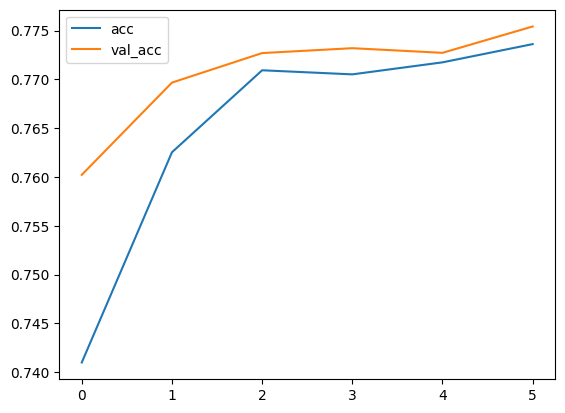

In [27]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

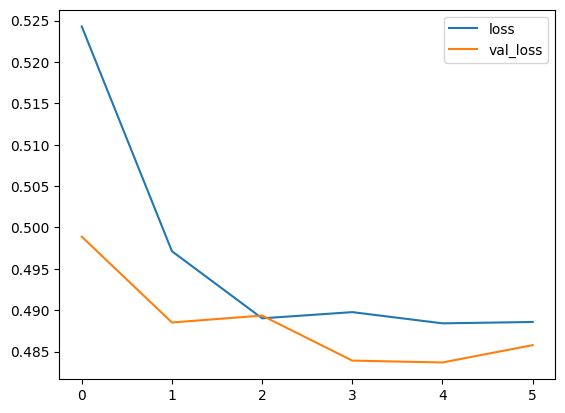

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [29]:
def predict_sentiment(text):
    test_df = pd.DataFrame({'text':[text]*8})
    test_df['text'] = test_df['text'].apply(preprocess_text)
    test_sequence = tokenizer.texts_to_sequences(test_df['text'])
    test_pad = pad_sequences(test_sequence, maxlen=get_max(preprocessed_df))
    pred = model.predict(test_pad, batch_size=None)/8
    
    return 'Positive' if (pred > 0.5) else 'Negative', f'Score: {pred}'

In [30]:
predict_sentiment('I broke your leg! i\'m really sorry!')

2024-03-31 16:47:09.103940: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node sequential_1/dense_1/Cast/ReadVariableOp.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step


('Negative', 'Score: 0.013095587491989136')

In [31]:
predict_sentiment('I made you some coffee!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


('Positive', 'Score: 0.854781985282898')